# Log.

11.8.22 ju Cambio la función de fitness, voy a trabajar con los termómetros en vez de con el tablero.

el ajuste continuo de 35 variables frente al discreto de. El espacio combinatorio es muuucho mas pequeño. mult 1 a t longitudes.
3^35 = 5,00315451e16
2^144 = 2,230074519853062e43

Bajamos 27 ordenes de magnitud el tamaño del espacio de busqueda.

# Planteamiento

Tenemos una cuadricula de 12x12 en la que la que conocemos la ocupación de las columnas y de las filas, pero no la distribución de la ocupación.

El reto consiste en, dada una ocupación dada, encontrar la distribución en la matriz.

Existen restricciones. La superficie esta cubierta con termométros que hay que rellenar, y tiene que hacerse desde el bulbo hacia el final, sin dejar huecos.

Fill the thermometers with mercury, such that the numbers outside the grid indicate how many cells in each row and column are filled. Mercury always starts filling from the base (circular part) of a thermometer, towards the top.

Este es el escenario:

![puzzle 19](img/puzzle_19_small.png)

# V0: Sin termometros.

La versión cero resuelve el problema sin termometros, es decir, considera solamente la ocupacion y no el "rellenado", con lo que ofrecera soluciones que no se ajustan a las normas, pero permitira tener un resolvedor en el que poner despues la restricciones.

*01* empiezo a usar PyGAD a ver si encuentra la solucion basica sin restricciones.
    Consigo que funcione perfecto, el truco fue en bajar la probabilidad de mutación, al principio trabajaba con mutaciones muy altas,  con lo que la convergencia se veia seriamente comprometida e iba a saltos. La baje, con 0.01 converge siempre a la solución exacta. 
    
*02* refactorizo la 01 antes de pasar a la versión con termómetros
    Demostrada la viabilidad, paso ahora a la version 1 en la que incluyo los temómetros.

# V1: Con termometros

en esta versión incluyo la existencia de los termometros. Esto va a cambiar, fundamentalmente, la función de fitness.  La condición es que se han de rellenar desde el bulbo inicial hasta el final, sin dejar huecos, como si fuera un tubo con fluido.


import numpy as np
import pandas as pd
import time
import pygad

In [1]:
import numpy as np
import pandas as pd
import time
import pygad

# tablero 12x12

In [343]:
#ctes
N_FILAS = 12 # es cuadrado, asi que uso solo una
target_col = np.array([7,5,7,1,7,3,4,4,7,7,7,4])
target_fil = np.array([6,7,6,1,4,3,6,7,6,7,7,3])
tablero = np.zeros(shape =(N_FILAS,N_FILAS))
# Codificamos los termómetros
# fila, columna, mov1,mov2,....mov n.
# movimientos: u: up, d: down, l:left, r:right
# La posición del bulbo está determinada por el par fila-columna, el recorrido del termometro por los movimientos.
t1 =  np.transpose( np.array([0,0,'d','d','d']))
t2 =  np.transpose( np.array([0,1,'r','r','r','r','d','d']))
t3 =  np.transpose( np.array([0,10,'l','l','d','d'])) 
t4 =  np.transpose( np.array([0,11,'d','l','d'])) 
t5 =  np.transpose( np.array([1,7,'u','l','d'])) 
t6 =  np.transpose( np.array([1,9,'d'])) 
t7 =  np.transpose( np.array([2,3,'l','l'])) 
t8 =  np.transpose( np.array([2,4,'u','l','l','l'])) 
t9 =  np.transpose( np.array([2,11,'d','d','d','d','d','l'])) 
t10 = np.transpose( np.array([3,2,'l','d','d'])) 
t11 = np.transpose( np.array([3,3,'r','r'])) 
t12 = np.transpose( np.array([3,9,'l','l','u','l'])) 
t13 = np.transpose( np.array([4,2,'r','r','r'])) 
t14 = np.transpose( np.array([4,9,'l','l','l','u'])) 
t15 = np.transpose( np.array([5,2,'r','r'])) 
t16 = np.transpose( np.array([5,5,'r','r','r','r','d','l'])) 
t17 = np.transpose( np.array([6,6,'r'])) 
t18 = np.transpose( np.array([6,10,'u','u','u'])) 
t19 = np.transpose( np.array([7,0,'u','u','u'])) 
t20 = np.transpose( np.array([7,6,'l','u','l','l','l','l'])) 
t21 = np.transpose( np.array([8,3,'r'])) 
t22 = np.transpose( np.array([8,5,'r','r','u','r','r'])) 
t23 = np.transpose( np.array([8,11,'d'])) 
t24 = np.transpose( np.array([9,7,'l','l','d','r','r'])) 
t25 = np.transpose( np.array([9,9,'r','u','l'])) 
t26 = np.transpose( np.array([10,0,'u','u'])) 
t27 = np.transpose( np.array([10,1,'u','u','u'])) 
t28 = np.transpose( np.array([10,2,'u','u','u','r','r'])) 
t29 = np.transpose( np.array([10,4,'u','l','d'])) 
t30 = np.transpose( np.array([10,8,'u','u'])) 
t31 = np.transpose( np.array([10,9,'r']))
t32 = np.transpose( np.array([11,4,'l','l','l','l']))
t33 = np.transpose( np.array([11,6,'l']))
t34 = np.transpose( np.array([11,7,'r','r']))
t35 = np.transpose( np.array([11,11,'u']))

termometros = pd.DataFrame([t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,
                  t12,t13,t14,t15,t16,t17,t18,t19,t20,
                  t21,t22,t23,t24,t25,t26,t27,t28,t29,
                  t30,t31,t32,t33,t34,t35])

In [305]:
#uso menos restricciones, añadi pocos termometos.
#empiezo por dos a ver.
termometros = pd.DataFrame([t1,t2,t3,t4,t5,t6,t7,t8,t9,t10
                           ,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20])
termometros

0   1  2     3     4     5     6     7
0   0   0  d     d     d  None  None  None
1   0   1  r     r     r     r     d     d
2   0  10  l     l     d     d  None  None
3   0  11  d     l     d  None  None  None
4   1   7  u     l     d  None  None  None
5   1   9  d  None  None  None  None  None
6   2   3  l     l  None  None  None  None
7   2   4  u     l     l     l  None  None
8   2  11  d     d     d     d     d     l
9   3   2  l     d     d  None  None  None
10  3   3  r     r  None  None  None  None
11  3   9  l     l     u     l  None  None
12  4   2  r     r     r  None  None  None
13  4   9  l     l     l     u  None  None
14  5   2  r     r  None  None  None  None
15  5   5  r     r     r     r     d     l
16  6   6  r  None  None  None  None  None
17  6  10  u     u     u  None  None  None
18  7   0  u     u     u  None  None  None
19  7   6  l     u     l     l     l     l

## tablero de prueba pequeño 4x4
Genero un tablero de prueba a ver si realmente es capaz de solucionarlo.

ocupación:


In [316]:
N_FILAS = 4 # es cuadrado, asi que uso solo una
target_col = np.array([3,2,1,2])
target_fil = np.array([3,3,1,1])
tablero = np.zeros(shape =(N_FILAS,N_FILAS))
t0 =  np.transpose( np.array([0,0,'r','r']))
t1 =  np.transpose( np.array([0,3,'d','d','d','l','l']))
t2 =  np.transpose( np.array([1,2,'l','l'])) 
t3 =  np.transpose( np.array([3,0,'u','r','r'])) 
termometros = pd.DataFrame([t0,t1,t2,t3])
termometros

0  1  2  3     4     5     6
0  0  0  r  r  None  None  None
1  0  3  d  d     d     l     l
2  1  2  l  l  None  None  None
3  3  0  u  r     r  None  None

# Aproximación Genética

sigo [este](https://blog.paperspace.com/genetic-algorithm-applications-using-pygad/) tutorial


He cargado el ga, la poblacion inicial, etc... no hay convergencia ni evolución, tengo que mirarlo en mas detalle a ver donde esta el error.

In [5]:
# Como entrada acepta un vector 1D, asi que hemos de linealizar y luego "tablerizar".
lineal = np.zeros(144)
def lin_to_tab(lin):
    return np.reshape(lin, [N_FILAS,N_FILAS])

def tab_to_lin(tab):
    return np.reshape(tab, [N_FILAS*N_FILAS])

In [354]:
# Trabajamos con el tablero
def init_population_tab(n_ind = 10):
    initial_population = np.empty(shape = (n_ind,N_FILAS*N_FILAS))
    for ind in range(n_ind):
        #init_population[ind,:]= np.random.randint(0,2,N_FILAS*N_FILAS)
         initial_population[ind,:]= np.zeros(N_FILAS*N_FILAS)
    return initial_population
#trabajamos con los termometros

def init_population_ter(n_ind = 10):
    """
    """
    initial_population = np.empty(shape = (n_ind,len(termometros)))
    for ind in range(n_ind):
        #inicializa en todos los valore
        initial_population[ind,:] = np.random.rand(len(termometros))
        #inicializa en torno a la mitad.
        #initial_population[ind,:] = np.random.normal(0.5, scale= 0.05, size =None) 
    return initial_population
    

In [337]:
i_pop = init_population_ter(4)
i_pop

array([[0.49615614, 0.49615614, 0.49615614, 0.49615614],
       [0.46563319, 0.46563319, 0.46563319, 0.46563319],
       [0.50698008, 0.50698008, 0.50698008, 0.50698008],
       [0.62538026, 0.62538026, 0.62538026, 0.62538026]])

In [276]:

    
def ocupacion_tablero(temperaturas):
    tab = np.zeros(shape=(N_FILAS,N_FILAS))
    for t in range(len(temperaturas)):
      #  print('\n',' ')
        ter = termometros.iloc[t,:].to_list()
        
        ruta_termometro = list(filter(None,ter[2:]))
        
        n_segmentos_termometro = len(ruta_termometro)+1  
      #  print('n_segmentos: ',n_segmentos_termometro,'ruta: ', ruta_termometro)
        
        parte = 100/(n_segmentos_termometro) #+1 por la ampolla
        temp=temperaturas[t]*100
      #  print('parte: ', parte, ' temperatura', temp)
        fill_n_segmentos = round(temp/parte)
        
      #  print('a llenar: ',fill_n_segmentos)
        #corrdenada inicial
        count = 0
        f= int(ter[0])
        c= int(ter[1])
        if fill_n_segmentos >=1:
            count +=1
            tab[f,c]=1

            while count < fill_n_segmentos:
       #         print('llenando bulbo + ',count-1,' step: ',ruta_termometro[count-1])
                step = ruta_termometro[count-1]
                if step == 'l':
                    c -= 1
                elif step == 'r':
                    c += 1
                elif step == 'u':
                    f = f-1
                elif step == 'd':
                    f += 1      
                tab[f,c] = 1
                count +=1
    return tab

In [285]:
#Funciones de fitnes usando el tablero como solución.
def fitness_func_tab_ejes(sol, idx):
    tab = lin_to_tab(sol)
    ocu_col = np.sum(tab, axis= 0)
    ocu_fil = np.sum(tab, axis = 1)
    error = sum(abs(ocu_col - target_col))+ sum(abs(ocu_fil - target_fil))
    return 1000-error 

def fitness_func_tab_ejes_termometros(sol, idx):
    tab = lin_to_tab(sol)
    ocu_col = np.sum(tab, axis= 0)
    ocu_fil = np.sum(tab, axis = 1)
    #error 1 nos da el error de número de celdas ocupadas. cuanto menor mejor
    error_ocupacion = sum(abs(ocu_col - target_col))+ sum(abs(ocu_fil - target_fil))
    error_termometros = evaluar_termometros(termometros,sol)
    return 1000-(1*error_termometros)-error_ocupacion  

#función de fitness para usar solo termometros.
#Ahora los termometros están llenos por defectos, el valor de la solución es su porcentaje de 
#llenado y eso es lo que pasamos a casillas.
def fitness_func_ter(sol,ids):
    tab = ocupacion_tablero(sol)
    ocu_col = np.sum(tab, axis= 0)
    ocu_fil = np.sum(tab, axis = 1)
    error_ocupacion = sum(abs(ocu_col - target_col))+ sum(abs(ocu_fil - target_fil))
    return 1000-error_ocupacion

In [11]:
def evaluar_termometros(termometros,sol):
    error = 0
    solTab= lin_to_tab(sol)
    mult = 0
    for t in range(len(termometros)):
        mult +=1
        temp = termometros.iloc[t,:].to_list()
        tRoute = list(filter(None,temp))
        error += evaluar_integridad_termometro(tRoute,solTab)
    return error
    
def evaluar_integridad_termometro(ruta, tablero):
    f = int(ruta[0])
    c = int(ruta[1])
    termometroRoto = False;
    c_ant_filled = False
    if tablero[f,c]== 1:
        c_ant_filled = True
    for step in ruta[2:]:
        #movemos el paso
        if step == 'l':
            c -= 1
        elif step == 'r':
            c += 1
        elif step == 'u':
            f = f-1
        elif step == 'd':
            f += 1      
        #evaluamos
        if tablero[f,c] == 0:
            c_ant_filled = False
        elif tablero[f,c] == 1 and c_ant_filled == False:
            termometroRoto = True
        if termometroRoto == True:
            break
    if termometroRoto == True:
        return 5 ## tiene mucho peso cada uno roto. probamos con 1 tambien
    else:
        return 0

In [ ]:
"""#sss steady-state, rwsroulette , sus (for stochastic ), 
    rank (for rank selection), 
    random (for random selection), and 
    tournament (for tournament selection)"""
parent_selection_type = "sss"

"""single_point (for single-point crossover), 
two_points (for two points crossover), 
uniform (for uniform crossover),
scattered (for scattered crossover). 
defaults to single_point."""
crossover_type = "single_point"

""""random (for random mutation), 
    swap (for swap mutation), 
    inversion (for inversion mutation), 
    scramble (for scramble mutation), and 
    adaptive (for adaptive mutation)."""
mutation_type = "random"



 round:  1
elapsed time:  288.5221161842346
best sol [0.77542057 0.24796459 0.96346179 0.92653317 0.33239017 0.97690502
 0.14025028 0.33239017 0.20035317 0.10093443 0.08966923 0.12673132
 0.10093443 0.20035317 0.46390225 0.12673132 0.65339267 0.97690502
 0.26672508 0.97690502 0.2129816  0.65106515 0.12673132 0.3769202
 0.12673132 0.96346179 0.65339267 0.62817588 0.58017268 0.80913238
 0.3769202  0.14025028 0.11641818 0.57897307 0.24283752]
fitness:  14.0


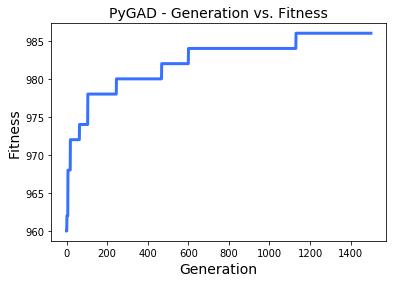

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 1 6 4 4 5 6 7 7 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 6 2 2 3 7 5 6 8 6 3]


 round:  2
elapsed time:  278.1649968624115
best sol [0.48010627 0.13573868 0.75467582 0.9349843  0.08903778 0.40984915
 0.99547519 0.36677526 0.08903778 0.08903778 0.16508547 0.40647825
 0.13325951 0.54969538 0.48464762 0.08903778 0.29889669 0.83184954
 0.54969538 0.62325781 0.83184954 0.08903778 0.29889669 0.16001229
 0.54969538 0.62325781 0.27691987 0.99547519 0.42667765 0.96204173
 0.74173899 0.16001229 0.49522296 0.17274972 0.08903778]
fitness:  16.0


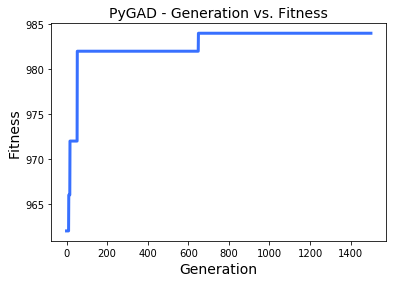

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 3 7 3 8 4 3 3 7 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 6 2 5 3 5 6 6 7 6 3]


 round:  3
elapsed time:  284.8989677429199
best sol [0.78945449 0.18795312 0.98447526 0.38247515 0.05731897 0.2740852
 0.81614424 0.60308653 0.05731897 0.05004866 0.047719   0.23510011
 0.51434066 0.24569533 0.2740852  0.047719   0.65480134 0.73731264
 0.64155208 0.39127648 0.09068664 0.9894202  0.39127648 0.27765515
 0.2121451  0.39127648 0.92873209 0.2740852  0.53866764 0.88934437
 0.96799453 0.2121451  0.11302907 0.35937547 0.27765515]
fitness:  12.0


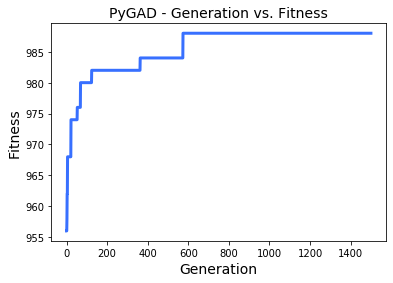

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 5 3 5 3 4 4 7 7 5 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 5 1 4 3 4 7 6 7 7 3]


 round:  4
elapsed time:  280.63223123550415
best sol [0.90856288 0.286677   0.8662665  0.98222662 0.11116231 0.89675833
 0.48258168 0.52719191 0.01647685 0.24027971 0.06403092 0.83627537
 0.10981315 0.55540314 0.60860709 0.00263688 0.42073579 0.55903083
 0.21921843 0.65100211 0.10981315 0.24752254 0.63146885 0.37965035
 0.61228017 0.14245803 0.91090692 0.94728771 0.60860709 0.48258168
 0.87662766 0.23891411 0.55540314 0.11852484 0.89369279]
fitness:  18.0


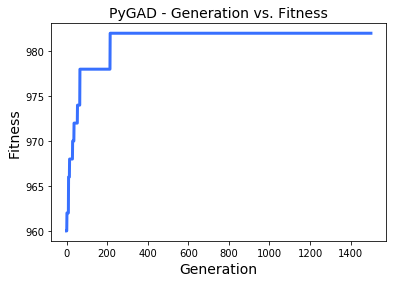

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [5 5 7 5 7 3 4 4 5 7 7 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 6 5 3 3 5 7 4 7 7 3]


 round:  5
elapsed time:  274.0758740901947
best sol [0.8193132  0.13903059 0.7392105  0.89893377 0.13903059 0.89893377
 0.31499992 0.43285524 0.13800987 0.20996885 0.07732165 0.13800987
 0.28386973 0.49587406 0.13800987 0.45002566 0.46920636 0.28386973
 0.31499992 0.89893377 0.13903059 0.29790964 0.46920636 0.20996885
 0.52111966 0.9051246  0.94911251 0.7392105  0.35897659 0.9051246
 0.88686576 0.13800987 0.45002566 0.35897659 0.06190202]
fitness:  12.0


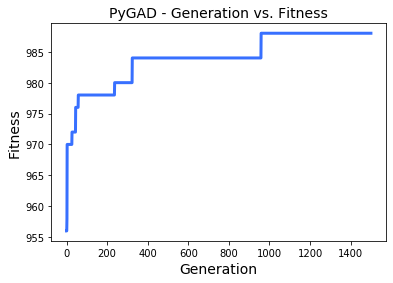

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 2 5 4 5 4 6 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 3 3 6 5 7 7 7 3]


 round:  6
elapsed time:  270.5746660232544
best sol [0.93570527 0.26421024 0.90918411 0.92561349 0.09796337 0.98947669
 0.00555502 0.33623075 0.17191305 0.09796337 0.15832566 0.26961074
 0.25723916 0.31139697 0.18730139 0.17586098 0.35235041 0.90918411
 0.25723916 0.88182695 0.17586098 0.84285993 0.6073653  0.35235041
 0.17191305 0.88182695 0.68812249 0.09796337 0.81982304 0.24420571
 0.73163202 0.11448768 0.04233467 0.59033574 0.17498077]
fitness:  14.0


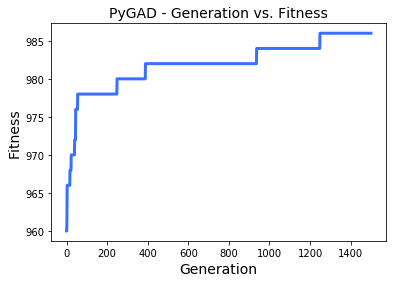

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 4 5 2 6 4 4 4 7 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 6 6 3 4 3 6 5 6 7 6 3]


 round:  7
elapsed time:  267.17266607284546
best sol [0.73843446 0.15183436 0.73369178 0.93077633 0.22872054 0.89726077
 0.35790072 0.41540632 0.15707879 0.63113433 0.15155325 0.06633999
 0.06633999 0.56423956 0.43830679 0.24079277 0.2452269  0.19614967
 0.9388226  0.51141814 0.89726077 0.9388226  0.23082548 0.17916561
 0.80898666 0.2452269  0.40829555 0.73369178 0.38670651 0.89726077
 0.8469329  0.06293968 0.40829555 0.18111884 0.52839489]
fitness:  14.0


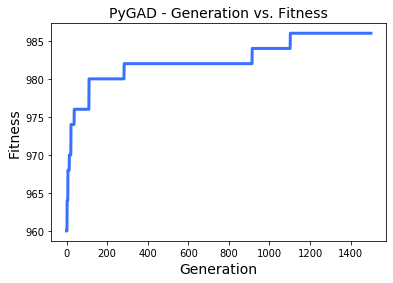

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 5 6 2 6 4 4 6 7 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 5 4 4 7 8 7 7 3]


 round:  8
elapsed time:  266.37380385398865
best sol [0.86229454 0.08086775 0.99523903 0.79501118 0.14966734 0.79843152
 0.47849855 0.45505698 0.18323459 0.14966734 0.0844158  0.14966734
 0.33961728 0.81930526 0.53213502 0.11960416 0.79501118 0.14301363
 0.14966734 0.23487302 0.14966734 0.33961728 0.0844158  0.11960416
 0.88606779 0.81930526 0.76035046 0.98891272 0.54260488 0.21140775
 0.79501118 0.18323459 0.14301363 0.71032064 0.05729978]
fitness:  16.0


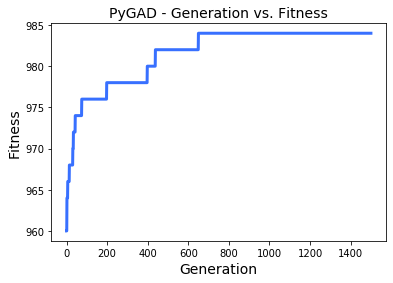

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 4 7 3 6 3 4 5 6 8 6 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 5 3 3 6 6 7 7 3]


 round:  9
elapsed time:  273.34924697875977
best sol [0.73826497 0.1165696  0.97911929 0.69817446 0.00918088 0.26460249
 0.92924722 0.47091885 0.07580774 0.09063023 0.02709544 0.19398466
 0.28031178 0.38029021 0.40692025 0.04430878 0.69817446 0.75979375
 0.79125721 0.81565199 0.75979375 0.93002263 0.47091885 0.26379943
 0.14943225 0.33322135 0.92194891 0.28031178 0.18730624 0.69817446
 0.38029021 0.24694196 0.24694196 0.53222072 0.24694196]
fitness:  14.0


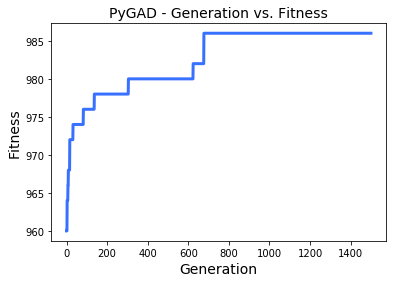

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 6 6 3 6 3 4 4 8 7 5 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 7 1 4 3 7 7 7 6 6 3]


 round:  10
elapsed time:  281.754732131958
best sol [0.73545093 0.05164484 0.94066379 0.79286834 0.46480443 0.94066379
 0.41583596 0.46480443 0.10032493 0.15422137 0.13432683 0.41583596
 0.24294501 0.41583596 0.38193842 0.34202058 0.63198225 0.68279571
 0.47526564 0.65255487 0.21822891 0.2004255  0.34202058 0.38193842
 0.45994919 0.68710375 0.9470208  0.9470208  0.38193842 0.54816141
 0.75305883 0.29128935 0.05164484 0.46480443 0.12304698]
fitness:  12.0


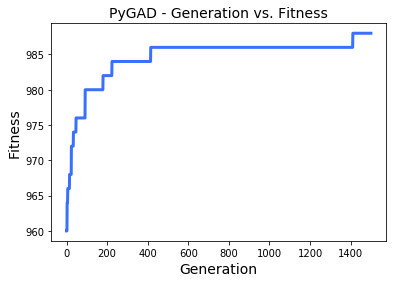

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 7 3 7 4 4 4 7 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 3 4 4 6 7 4 9 7 2]


 round:  11
elapsed time:  277.57326197624207
best sol [0.63212659 0.16687058 0.73166915 0.85925331 0.19504905 0.37625792
 0.99564968 0.48685707 0.15398885 0.29591506 0.15398885 0.11858629
 0.14088624 0.62447864 0.13453674 0.28312042 0.29591506 0.634187
 0.26599087 0.9743664  0.00451023 0.37625792 0.34533318 0.11858629
 0.11858629 0.72939447 0.62447864 0.9743664  0.56092895 0.87979817
 0.95952989 0.19504905 0.07643012 0.71508267 0.12556934]
fitness:  14.0


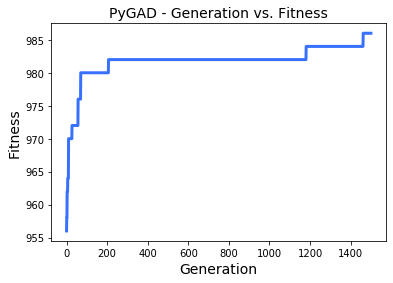

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 8 3 7 4 4 4 7 5 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 5 3 7 6 5 6 7 3]


 round:  12
elapsed time:  275.41439414024353
best sol [0.66181449 0.16829019 0.92316383 0.94407165 0.0051732  0.93893048
 0.40987726 0.33718734 0.0689109  0.92141962 0.03347607 0.0689109
 0.1381388  0.18191499 0.31513831 0.0422081  0.40987726 0.56302688
 0.45417462 0.71246377 0.56087461 0.93893048 0.5983416  0.18191499
 0.60649244 0.78600822 0.23834849 0.66181449 0.53330392 0.95451064
 0.65338043 0.28148626 0.1807232  0.40535568 0.47290799]
fitness:  10.0


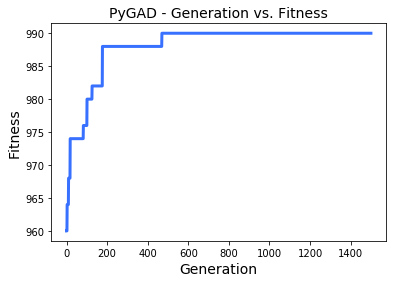

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 3 6 3 3 4 7 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 6 2 3 3 6 7 7 7 6 3]


 round:  13
elapsed time:  277.92970085144043
best sol [0.65663586 0.07324984 0.97132008 0.90728924 0.07324984 0.62097136
 0.23483873 0.51463631 0.07164017 0.10027388 0.12709481 0.12709481
 0.14507037 0.51463631 0.2372458  0.06479065 0.879177   0.42037417
 0.95076407 0.51463631 0.51463631 0.67574472 0.50319644 0.10027388
 0.879177   0.2372458  0.61519665 0.67574472 0.3802308  0.95076407
 0.87464437 0.2372458  0.37899198 0.00914018 0.1250746 ]
fitness:  16.0


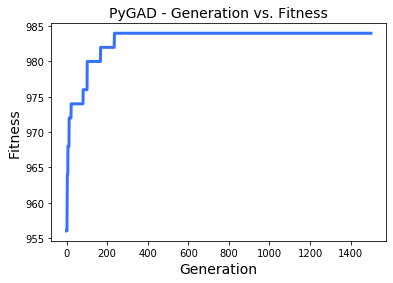

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 3 6 3 6 3 4 5 7 7 8 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 5 3 6 5 9 7 7 2]


 round:  14
elapsed time:  289.2235310077667
best sol [0.6317569  0.18900878 0.81952764 0.92347521 0.33857016 0.28478417
 0.75857659 0.32919695 0.12466475 0.09116977 0.12466475 0.16662249
 0.15097394 0.87077142 0.23194507 0.43808317 0.92347521 0.33857016
 0.39807056 0.43808317 0.39573078 0.23194507 0.23065806 0.0389008
 0.75857659 0.32919695 0.75857659 0.97770544 0.39807056 0.89806336
 0.97770544 0.28478417 0.28478417 0.03318889 0.2976877 ]
fitness:  14.0


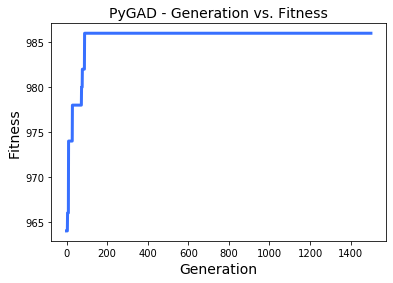

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 4 7 3 6 4 5 4 6 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 5 4 5 6 6 6 7 3]


 round:  15
elapsed time:  2214.49671626091
best sol [0.45798254 0.15413065 0.91054136 0.99412049 0.17702707 0.81986039
 0.21841139 0.37327378 0.13565176 0.17702707 0.17702707 0.4620993
 0.07755627 0.69242817 0.37991891 0.22031406 0.31381011 0.35718372
 0.9620318  0.81986039 0.49067346 0.21841139 0.17702707 0.31381011
 0.36693409 0.3425867  0.84132179 0.93325603 0.59429075 0.99942154
 0.80906582 0.29819374 0.17702707 0.49067346 0.41945578]
fitness:  16.0


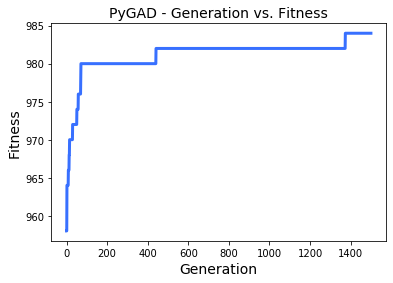

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 7 5 7 4 4 4 8 7 5 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 4 4 4 7 6 5 7 7 3]


 round:  16
elapsed time:  2342.352647781372
best sol [0.73034516 0.17948336 0.9421358  0.40686993 0.17948336 0.73034516
 0.68422995 0.68422995 0.01115362 0.01115362 0.42544825 0.74281875
 0.18836661 0.40686993 0.12295464 0.12295464 0.40686993 0.81629479
 0.79096256 0.81629479 0.19689395 0.26899049 0.89699267 0.19689395
 0.40686993 0.39343414 0.90199227 0.93978105 0.15777952 0.60045122
 0.97949468 0.10366105 0.48553738 0.43672041 0.00192042]
fitness:  14.0


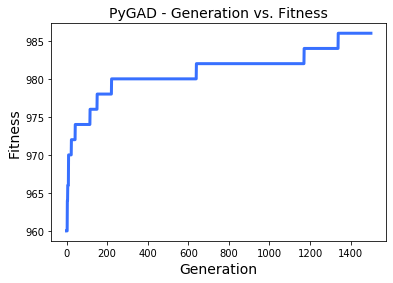

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 5 6 4 4 5 7 6 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 4 4 3 7 7 5 7 7 3]


 round:  17
elapsed time:  5149.2094893455505
best sol [0.64761644 0.08190399 0.54467893 0.99628997 0.22105162 0.79468753
 0.014643   0.3947177  0.14836742 0.59241664 0.03195299 0.15134941
 0.25930508 0.79468753 0.33284338 0.12285751 0.59241664 0.14127757
 0.79468753 0.63019433 0.014643   0.31163844 0.18986515 0.25930508
 0.64322107 0.18986515 0.96112311 0.97225264 0.59241664 0.89827457
 0.99628997 0.15134941 0.14495663 0.75336953 0.7268976 ]
fitness:  12.0


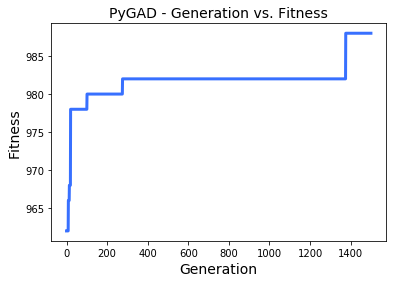

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 6 7 1 7 4 5 4 6 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 5 3 5 3 5 7 6 8 7 4]


 round:  18
elapsed time:  2419.3296930789948
best sol [0.66577053 0.1857153  0.95549511 0.99000369 0.18554515 0.86314149
 0.63514308 0.42245993 0.00658568 0.00658568 0.12212176 0.24651025
 0.14519658 0.41128115 0.36137694 0.06306506 0.28740472 0.53730965
 0.63514308 0.63514308 0.48949615 0.48949615 0.83630678 0.20100229
 0.49850278 0.66473023 0.89774196 0.97029128 0.50439317 0.33840375
 0.75545955 0.75545955 0.33840375 0.03364513 0.03478951]
fitness:  16.0


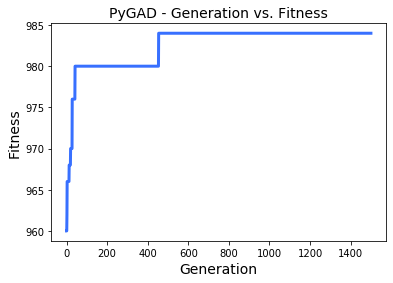

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 6 8 4 7 3 4 3 5 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 7 1 3 3 5 7 7 8 7 5]


 round:  19
elapsed time:  284.89630103111267
best sol [0.78503652 0.2322184  0.96543766 0.76483733 0.35900283 0.83297582
 0.14783374 0.42468434 0.11131284 0.11131284 0.03255565 0.12467344
 0.3180437  0.78828225 0.31097037 0.31144526 0.58913949 0.22502961
 0.67252407 0.51871249 0.22502961 0.16006785 0.18547533 0.25002307
 0.55318578 0.48174571 0.94659421 0.94659421 0.25002307 0.59843862
 0.96543766 0.28917941 0.46511185 0.22683674 0.20330398]
fitness:  16.0


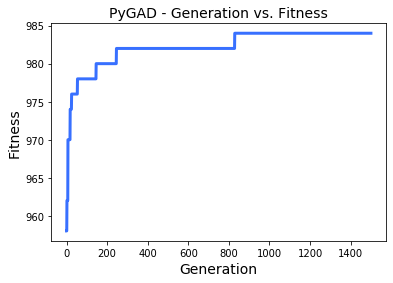

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 1 6 4 6 4 6 7 5 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 5 1 5 4 5 7 3 7 7 3]


 round:  20
elapsed time:  295.6728389263153
best sol [0.18774391 0.01132136 0.92835925 0.41562713 0.92403435 0.41562713
 0.92403435 0.32877844 0.08922336 0.16438558 0.08922336 0.49263841
 0.16438558 0.31342258 0.02398228 0.19545502 0.98803645 0.47349492
 0.92403435 0.67507479 0.95496836 0.1409398  0.15231491 0.190078
 0.73882164 0.61154223 0.95496836 0.92835925 0.59784864 0.26640772
 0.87774963 0.22349745 0.28260785 0.05027852 0.47349492]
fitness:  14.0


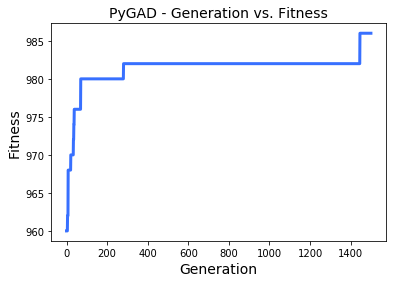

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 4 8 4 5 4 6 6 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 6 6 3 4 3 7 7 6 7 7 3]


 round:  21
elapsed time:  293.74778604507446
best sol [0.44376655 0.16706768 0.96363776 0.84440005 0.30673377 0.8343468
 0.96363776 0.39597865 0.13589314 0.04534147 0.02646175 0.27472708
 0.44376655 0.39688945 0.44376655 0.07516628 0.40348418 0.75753912
 0.57670068 0.51095754 0.44376655 0.27472708 0.38820178 0.30266359
 0.201237   0.38161286 0.71452264 0.87798642 0.44149668 0.94968842
 0.77151688 0.27768224 0.74962595 0.21422795 0.13347518]
fitness:  16.0


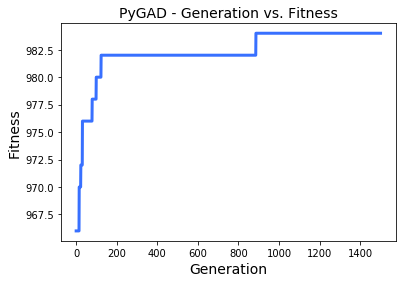

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [5 5 7 4 6 4 5 3 7 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 7 1 5 3 5 5 7 7 7 3]


 round:  22
elapsed time:  284.93244910240173
best sol [0.7101678  0.14257224 0.91847593 0.82517993 0.31592399 0.98789012
 0.8244922  0.34912093 0.01354004 0.9230085  0.01354004 0.05913262
 0.09941416 0.37741582 0.12314866 0.05913262 0.8244922  0.70129743
 0.03664381 0.93236467 0.09941416 0.3875998  0.72453258 0.37741582
 0.3875998  0.92094674 0.23328204 0.9230085  0.40782033 0.3875998
 0.93236467 0.14138958 0.09941416 0.84261366 0.40782033]
fitness:  14.0


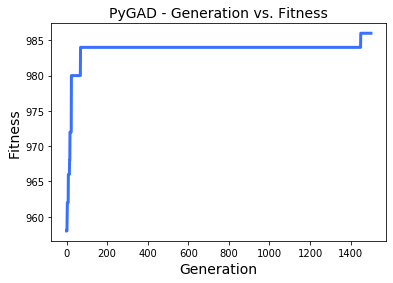

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 6 7 3 7 3 4 4 6 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 4 2 8 5 5 7 7 5]


 round:  23
elapsed time:  288.77409291267395
best sol [7.64170185e-01 1.68371806e-01 9.57729297e-01 9.98579309e-01
 2.72272307e-01 9.24468633e-01 4.37196478e-04 4.00944132e-01
 1.53707475e-01 1.67532167e-01 3.34001356e-01 5.39390609e-01
 3.75436763e-01 3.26154763e-01 1.17589672e-01 9.55499329e-02
 1.64441476e-01 4.00944132e-01 9.57729297e-01 6.46844530e-01
 1.31925270e-01 3.34001356e-01 4.51809789e-01 4.87179849e-01
 1.27038933e-01 1.53707475e-01 9.57729297e-01 9.24468633e-01
 4.87179849e-01 3.81736069e-01 8.64143309e-01 4.56201179e-02
 2.65009939e-01 6.72414418e-01 7.80763899e-02]
fitness:  16.0


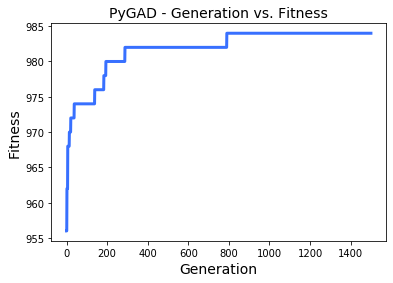

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 6 4 6 5 4 4 7 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 5 5 3 5 7 5 7 6 3]


 round:  24
elapsed time:  290.7678050994873
best sol [0.77132771 0.17937223 0.95693707 0.69463375 0.15290722 0.46560261
 0.52073765 0.46560261 0.20472605 0.13874971 0.06553934 0.06553934
 0.39727284 0.20472605 0.10816333 0.13215443 0.52451028 0.57219942
 0.86348264 0.77977196 0.17937223 0.93339255 0.17937223 0.20472605
 0.84091896 0.15290722 0.93339255 0.49830789 0.46560261 0.17937223
 0.80613484 0.15290722 0.52451028 0.15290722 0.57219942]
fitness:  12.0


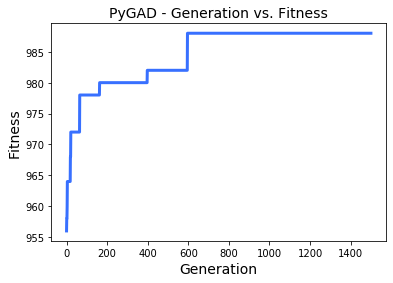

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 6 3 6 4 4 4 5 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 3 3 6 7 6 6 6 3]


 round:  25
elapsed time:  277.84282207489014
best sol [0.73597501 0.20033031 0.94373548 0.94373548 0.29199596 0.48574978
 0.09169083 0.40473008 0.2099485  0.35402669 0.02445606 0.47685495
 0.37012599 0.32111631 0.40473008 0.08790652 0.47685495 0.7670778
 0.65879809 0.4518829  0.49609035 0.1473048  0.25315824 0.39858593
 0.32111631 0.28988035 0.65879809 0.98744143 0.51026526 0.94450096
 0.7670778  0.25315824 0.51026526 0.30529799 0.18791596]
fitness:  14.0


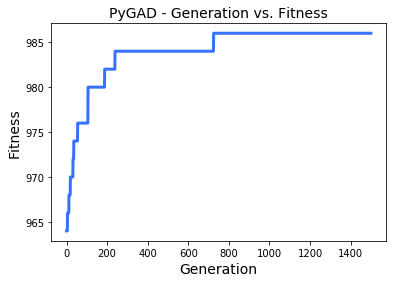

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 7 2 6 4 4 3 8 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 5 3 4 4 4 6 6 7 7 3]


 round:  26
elapsed time:  276.65933299064636
best sol [0.67235598 0.07862113 0.94745357 0.88742732 0.21377113 0.43159267
 0.31200014 0.43159267 0.14165452 0.26490097 0.02218947 0.20651618
 0.39798765 0.6459427  0.22516254 0.11942965 0.43159267 0.27371905
 0.38596331 0.31200014 0.6459427  0.78738848 0.22473254 0.06824706
 0.88742732 0.72936826 0.39798765 0.6459427  0.43159267 0.77748617
 0.84182762 0.22473254 0.3102892  0.13743426 0.60921845]
fitness:  14.0


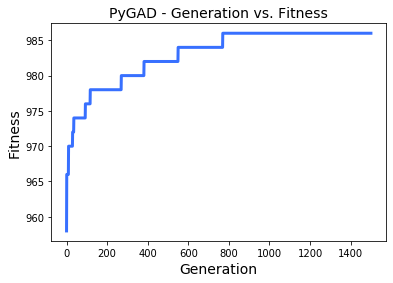

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 3 7 3 5 3 4 4 7 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 5 2 3 6 7 7 7 3]


 round:  27
elapsed time:  287.5836238861084
best sol [0.66594699 0.17696236 0.95568836 0.96511992 0.3108428  0.80223808
 0.01459007 0.41692127 0.14052578 0.27450002 0.14052578 0.14052578
 0.14052578 0.80223808 0.66839971 0.16065709 0.02650814 0.71996523
 0.58778504 0.57190079 0.18693604 0.99625274 0.0964051  0.02293005
 0.16065709 0.66839971 0.52257298 0.64608949 0.85677922 0.92978073
 0.85677922 0.26282293 0.64608949 0.14052578 0.52257298]
fitness:  14.0


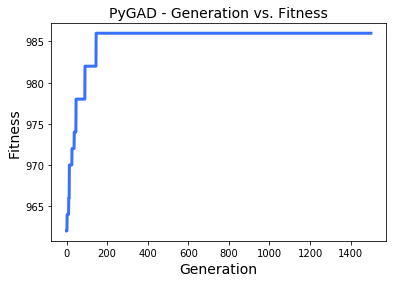

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 3 7 2 6 4 4 4 8 8 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 6 4 4 7 5 7 7 3]


 round:  28
elapsed time:  292.13285398483276
best sol [0.71661997 0.25450664 0.91897533 0.09491492 0.26077152 0.79025784
 0.19622146 0.73724089 0.07746287 0.0799905  0.15402414 0.19622146
 0.01383895 0.88289244 0.40024868 0.07319266 0.53874003 0.72118414
 0.15402414 0.90380826 0.82235813 0.75316921 0.16934563 0.07319266
 0.72118414 0.38555746 0.53736426 0.38555746 0.55880832 0.88488295
 0.88289244 0.26311    0.49985452 0.15402414 0.38555746]
fitness:  18.0


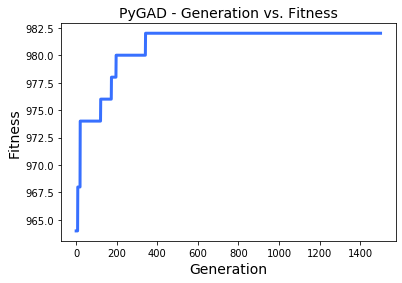

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [5 3 6 4 7 4 5 4 8 7 7 2]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 5 3 6 5 7 6 7 3]


 round:  29
elapsed time:  284.24848198890686
best sol [0.72908129 0.12155231 0.79789054 0.79226242 0.15380931 0.79346272
 0.62039642 0.48123236 0.15106113 0.12155231 0.06752943 0.15603117
 0.27320054 0.44076971 0.92212774 0.01947092 0.49020404 0.44076971
 0.60360435 0.53593211 0.0316212  0.63245955 0.41049823 0.06752943
 0.62039642 0.80553499 0.99319351 0.34939166 0.40311181 0.57311722
 0.75045893 0.21281834 0.06752943 0.50506128 0.21281834]
fitness:  12.0


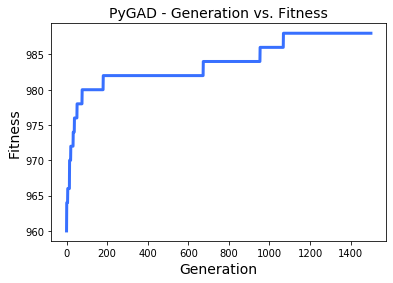

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 5 2 7 3 3 4 6 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 3 4 5 5 5 7 7 3]


 round:  30
elapsed time:  280.11608505249023
best sol [0.86804222 0.26813621 0.93857983 0.8867568  0.36690837 0.88673477
 0.04461606 0.34671871 0.14775191 0.07829571 0.07829571 0.30848742
 0.39093816 0.25285292 0.14775191 0.30868787 0.27190814 0.86804222
 0.88673477 0.7776887  0.41201165 0.88673477 0.14775191 0.24056448
 0.5575144  0.14775191 0.93857983 0.49277584 0.48471065 0.7776887
 0.86804222 0.17258973 0.19736282 0.4098558  0.6581811 ]
fitness:  14.0


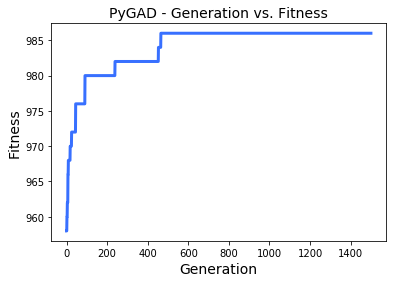

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 5 3 6 4 4 5 7 7 8 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 6 2 5 4 6 6 6 7 6 3]


 round:  31
elapsed time:  281.032644033432
best sol [0.48547183 0.18318039 0.78136982 0.99815112 0.30938562 0.78136982
 0.653478   0.42802684 0.00677994 0.01893875 0.01688735 0.42802684
 0.00677994 0.56956069 0.30938562 0.0373132  0.4046402  0.67865123
 0.95410558 0.84394001 0.07632966 0.67865123 0.46954273 0.01688735
 0.95410558 0.63550343 0.68027389 0.99336801 0.67865123 0.2776062
 0.56956069 0.26907068 0.56956069 0.0373132  0.48080667]
fitness:  16.0


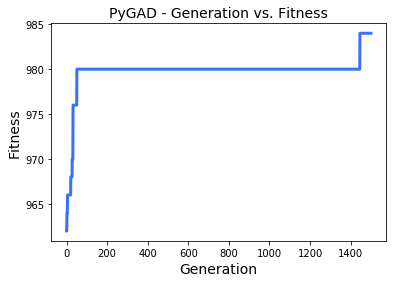

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 4 7 4 7 3 4 4 5 8 8 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 5 2 5 3 7 7 8 7 6 3]


 round:  32
elapsed time:  282.0569689273834
best sol [0.70931609 0.02126504 0.87948279 0.85646676 0.08209329 0.69093207
 0.91205097 0.64776264 0.13990335 0.02126504 0.02126504 0.1533289
 0.1778954  0.69093207 0.17362102 0.1533289  0.91205097 0.86205837
 0.13990335 0.64776264 0.17912542 0.87948279 0.48890149 0.38538341
 0.53559251 0.64776264 0.91205097 0.91802409 0.17912542 0.53559251
 0.91205097 0.13990335 0.13990335 0.748683   0.01231456]
fitness:  14.0


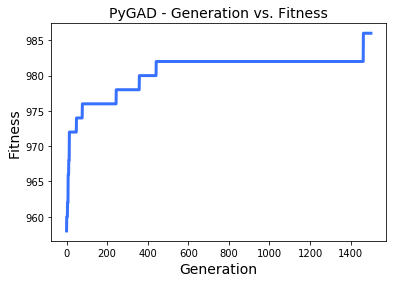

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 7 4 6 4 4 6 7 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [5 7 6 1 5 3 6 9 6 8 7 3]


 round:  33
elapsed time:  281.335205078125
best sol [0.95344283 0.03885723 0.71046455 0.90987659 0.51420385 0.28164808
 0.81788586 0.43340625 0.08904863 0.08904863 0.16541077 0.04646795
 0.16541077 0.46937862 0.38599487 0.24235009 0.99664064 0.71029683
 0.33081387 0.63289648 0.04646795 0.4099004  0.7338471  0.16541077
 0.29500988 0.65820808 0.48848825 0.95736946 0.4099004  0.87353557
 0.99664064 0.2717509  0.11574263 0.32538324 0.16541077]
fitness:  14.0


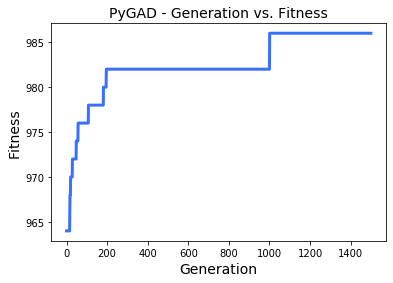

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 2 7 2 7 4 4 5 6 5 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 4 4 5 6 5 7 7 2]


 round:  34
elapsed time:  280.1258120536804
best sol [0.74357945 0.1217487  0.74357945 0.91339057 0.10205464 0.85071107
 0.4054368  0.37448951 0.17289757 0.19458013 0.1105833  0.6360147
 0.20162772 0.65172312 0.21447504 0.20162772 0.67289547 0.23583701
 0.4054368  0.56511218 0.17906819 0.37448951 0.11653725 0.23800868
 0.82205961 0.48186232 0.92108454 0.81689138 0.54020246 0.93342405
 0.76777239 0.05248898 0.17021675 0.65172312 0.26888718]
fitness:  14.0


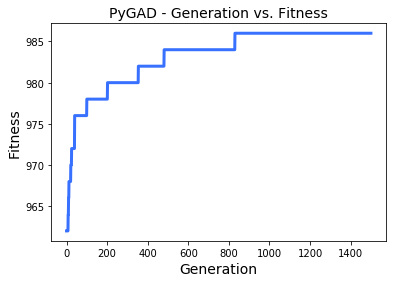

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 7 2 5 4 3 4 8 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 6 4 4 2 5 6 6 7 7 3]


 round:  35
elapsed time:  281.74878215789795
best sol [0.80233969 0.10120076 0.758633   0.79868199 0.16409602 0.87979496
 0.79868199 0.44473926 0.12676532 0.10418859 0.04060557 0.64174649
 0.28657926 0.46856717 0.41284671 0.36635214 0.87979496 0.68160978
 0.46856717 0.32900839 0.79868199 0.36635214 0.16409602 0.101175
 0.5780817  0.29383136 0.97049473 0.69317155 0.46856717 0.53482972
 0.87979496 0.2511251  0.0565968  0.64760696 0.06332487]
fitness:  14.0


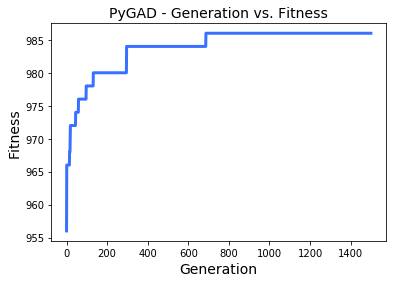

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 7 2 6 3 4 6 7 7 7 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 3 4 5 4 5 6 7 7 3]


 round:  36
elapsed time:  278.90030121803284
best sol [0.95106578 0.03328219 0.90836401 0.23201834 0.5240929  0.89890768
 0.19028657 0.78812192 0.19258902 0.45434049 0.06282401 0.07533806
 0.28098853 0.48862794 0.07841344 0.28098853 0.12778839 0.84469346
 0.5717889  0.45434049 0.23096228 0.96579095 0.78812192 0.07533806
 0.44084476 0.19028657 0.99515588 0.12778839 0.68030571 0.78923056
 0.00666395 0.19258902 0.56367258 0.12778839 0.76452141]
fitness:  20.0


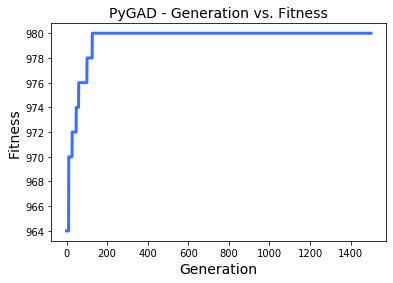

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 4 3 5 4 4 4 7 6 5 6]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 3 4 3 3 7 5 7 6 3]


 round:  37
elapsed time:  278.0702052116394
best sol [0.6937927  0.29548277 0.96057702 0.88884409 0.23779918 0.45854881
 0.80955837 0.35328273 0.14605947 0.0565646  0.04262616 0.1302438
 0.31019073 0.69109626 0.0200719  0.21372272 0.62783728 0.59399618
 0.88884409 0.69109626 0.12620591 0.92272832 0.29947412 0.02282911
 0.69109626 0.71419838 0.79684691 0.69109626 0.82662719 0.80955837
 0.56335079 0.32322683 0.43624614 0.14943425 0.06676285]
fitness:  14.0


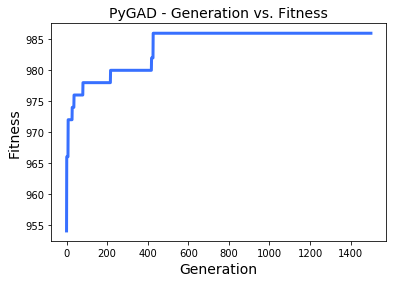

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [9 4 7 4 6 4 4 4 7 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 7 1 5 3 6 7 7 8 6 3]


 round:  38
elapsed time:  272.53618001937866
best sol [8.34510352e-01 2.65345616e-01 8.17780080e-01 7.99784531e-01
 3.32808305e-01 9.72537772e-01 7.99784531e-01 4.59817438e-01
 9.72899942e-02 6.65249555e-02 1.24174780e-01 1.51578522e-01
 1.51578522e-01 4.40169929e-01 5.70844278e-04 1.51578522e-01
 1.08048216e-01 6.54888504e-01 1.51578522e-01 9.62509921e-01
 2.37060286e-01 8.97625143e-01 4.57134433e-01 2.56875648e-01
 3.98015671e-01 7.45700322e-01 4.57134433e-01 5.36869216e-01
 3.98015671e-01 8.97625143e-01 9.62509921e-01 3.98015671e-01
 6.06332749e-01 5.70844278e-04 5.36869216e-01]
fitness:  14.0


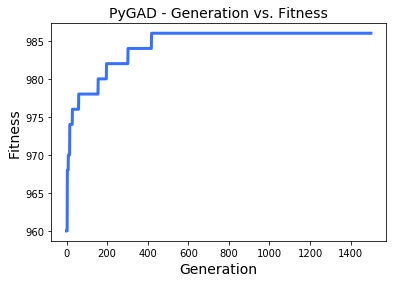

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 4 7 3 6 4 4 4 7 7 7 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 6 1 4 2 6 5 6 9 7 4]


 round:  39
elapsed time:  274.3912019729614
best sol [0.63564245 0.10854138 0.90859193 0.70435939 0.14836639 0.9926935
 0.15180642 0.70435939 0.13984133 0.02663738 0.02663738 0.20190416
 0.13984133 0.69837478 0.81406453 0.09115012 0.20190416 0.61961424
 0.61961424 0.81406453 0.13984133 0.31990872 0.02663738 0.20666094
 0.88798634 0.25108302 0.90859193 0.9926935  0.4846811  0.59865158
 0.94754632 0.22773408 0.29861128 0.09115012 0.47540447]
fitness:  14.0


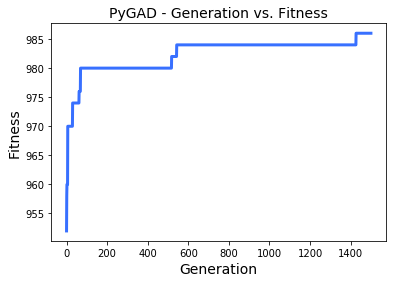

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 8 4 7 4 3 3 6 8 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 9 5 1 4 4 6 7 6 7 7 3]


 round:  40
elapsed time:  273.9073791503906
best sol [0.55858058 0.0726743  0.98379687 0.70255984 0.14342753 0.75065055
 0.86563274 0.34969773 0.23886901 0.06080917 0.02031913 0.34969773
 0.75065055 0.38166532 0.48563765 0.08456503 0.3443293  0.38473561
 0.17835039 0.88972785 0.08456503 0.51902682 0.17835039 0.38473561
 0.68682363 0.38473561 0.67630004 0.51902682 0.38473561 0.4450435
 0.75065055 0.19407516 0.12136573 0.75065055 0.05967273]
fitness:  14.0


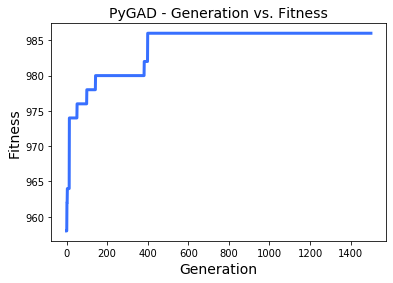

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [4 5 7 3 7 4 4 4 7 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 7 3 5 3 6 3 6 7 7 3]


 round:  41
elapsed time:  270.3165090084076
best sol [0.5735377  0.18954968 0.94652538 0.70965557 0.0419484  0.75275558
 0.05094568 0.38048071 0.18796973 0.22656243 0.14263379 0.05094568
 0.14404243 0.32997794 0.18954968 0.17326897 0.50449053 0.13661762
 0.93254086 0.17326897 0.18954968 0.89897714 0.19830571 0.18796973
 0.14404243 0.39123067 0.87045975 0.93254086 0.50449053 0.93254086
 0.76967286 0.14263379 0.13661762 0.34096194 0.51873998]
fitness:  16.0


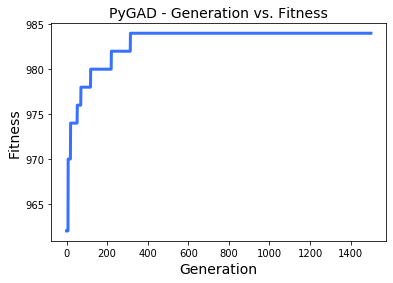

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 7 1 6 2 3 4 8 6 4 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 4 1 4 3 3 7 6 6 7 3]


 round:  42
elapsed time:  271.02243089675903
best sol [0.97152515 0.13266358 0.95258519 0.68188381 0.2366352  0.95063122
 0.12736932 0.46384062 0.16144104 0.07186032 0.16144104 0.46384062
 0.20169627 0.20169627 0.44758213 0.07186032 0.41736241 0.07186032
 0.74145585 0.88301803 0.17381324 0.41736241 0.17381324 0.20169627
 0.74145585 0.35875218 0.91093437 0.90889068 0.41906191 0.64376244
 0.7610155  0.18090425 0.41736241 0.18558806 0.20147449]
fitness:  14.0


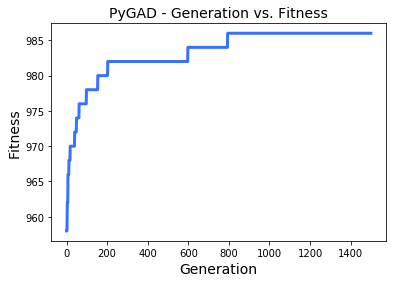

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 5 7 2 6 4 4 4 6 7 5 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 5 3 2 3 6 6 6 7 7 3]


 round:  43
elapsed time:  271.79127192497253
best sol [0.67624578 0.09791097 0.98331693 0.52737008 0.01245651 0.77469779
 0.06315669 0.82195955 0.16490955 0.82195955 0.07569845 0.26080164
 0.06315669 0.35144994 0.45842242 0.06315669 0.94522572 0.60849365
 0.68291908 0.59749351 0.05717506 0.95810646 0.35144994 0.26080164
 0.83307535 0.71993429 0.83307535 0.60849365 0.42086009 0.60641273
 0.9661672  0.06315669 0.71520658 0.19963943 0.46902525]
fitness:  16.0


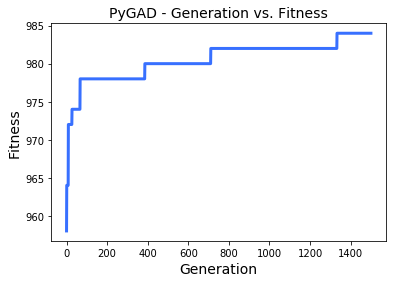

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 6 7 1 5 3 5 5 7 8 6 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 5 3 3 3 6 7 7 9 7 3]


 round:  44
elapsed time:  271.8183739185333
best sol [0.76769983 0.33074338 0.78643633 0.98648773 0.28229658 0.7898661
 0.28525359 0.43985216 0.09043265 0.35121921 0.09043265 0.1611472
 0.04348712 0.32457136 0.43985216 0.31711773 0.17826566 0.86268872
 0.35121921 0.95941441 0.91190613 0.17826566 0.72160321 0.25988655
 0.17826566 0.72160321 0.86227308 0.31711773 0.6156498  0.91190613
 0.91190613 0.23592831 0.69800367 0.32457136 0.41479969]
fitness:  18.0


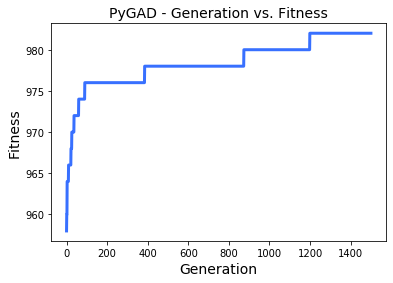

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 6 3 7 4 4 3 6 7 7 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 6 2 3 4 6 3 6 8 7 4]


 round:  45
elapsed time:  271.4883167743683
best sol [0.66443466 0.12385963 0.70618055 0.90287964 0.26832146 0.39490614
 0.79631384 0.48768727 0.15464205 0.70383229 0.15999025 0.15464205
 0.23240044 0.47488642 0.12385963 0.15464205 0.24569922 0.72621468
 0.79631384 0.66582524 0.86797318 0.48768727 0.00363432 0.25453415
 0.15464205 0.39490614 0.58086048 0.95381554 0.39490614 0.48768727
 0.79631384 0.08750878 0.58086048 0.70383229 0.23212454]
fitness:  14.0


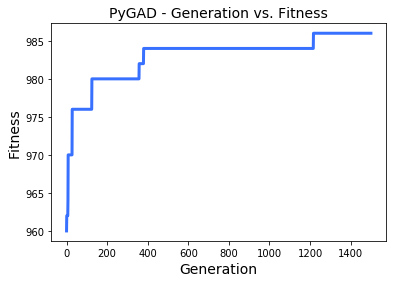

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 4 7 4 4 4 5 6 7 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 3 5 3 5 6 6 6 7 3]


 round:  46
elapsed time:  276.51766705513
best sol [0.41654392 0.23658882 0.94136861 0.04719719 0.22906863 0.91691178
 0.39977774 0.60120543 0.38440906 0.0870289  0.06716482 0.2368097
 0.84655738 0.07870018 0.4192896  0.24297804 0.38440906 0.67702229
 0.73918766 0.52513543 0.24891423 0.94323988 0.50365195 0.04766926
 0.64338394 0.24297804 0.50365195 0.70712593 0.23658882 0.70712593
 0.85636881 0.08713051 0.09224626 0.52513543 0.38866982]
fitness:  18.0


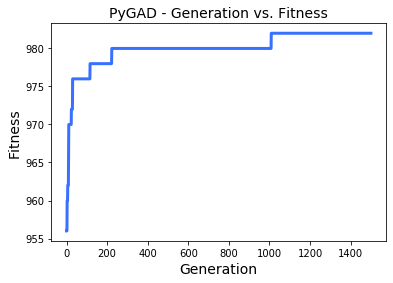

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 3 7 3 5 4 4 4 7 7 7 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 5 2 5 5 5 7 6 5 7 3]


 round:  47
elapsed time:  284.201367855072
best sol [0.8453873  0.08031079 0.95709787 0.96059026 0.17064671 0.99008227
 0.08281863 0.48382427 0.16182517 0.16182517 0.09490952 0.06192856
 0.14661708 0.41808261 0.30091976 0.16321422 0.51597671 0.85809347
 0.41808261 0.64099237 0.41808261 0.41808261 0.16182517 0.19946095
 0.14661708 0.61933086 0.81301873 0.51597671 0.48382427 0.51597671
 0.87487146 0.14537765 0.43472226 0.16321422 0.13043691]
fitness:  14.0


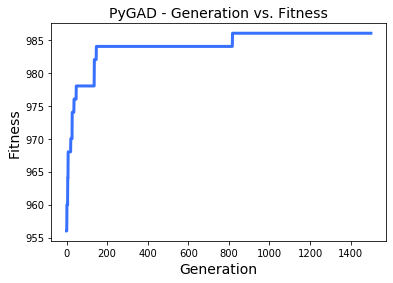

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 6 1 6 4 4 3 6 6 7 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 4 3 5 3 6 7 7 2]


 round:  48
elapsed time:  279.71370697021484
best sol [0.95876845 0.20080689 0.98381791 0.97277068 0.31771198 0.8031406
 0.45231842 0.15071139 0.18692918 0.62487373 0.06267002 0.12052595
 0.13726365 0.52246916 0.27293833 0.12052595 0.31080282 0.62487373
 0.52246916 0.62939012 0.95147649 0.30539568 0.62487373 0.0837513
 0.58463073 0.31080282 0.81046237 0.81303076 0.62487373 0.60622215
 0.97742576 0.09609238 0.60700226 0.58315426 0.11019326]
fitness:  14.0


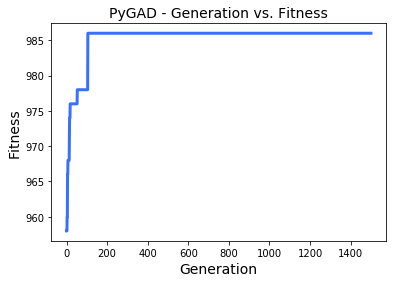

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 3 5 4 4 4 7 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 7 4 4 3 5 5 7 7 7 3]


 round:  49
elapsed time:  272.3363151550293
best sol [0.62530413 0.31053035 0.95988688 0.79173609 0.34921604 0.77438515
 0.28188749 0.48354988 0.14552174 0.73878314 0.02301129 0.17041735
 0.35461288 0.48354988 0.13276222 0.27500122 0.66114147 0.48354988
 0.73938946 0.51827462 0.14552174 0.51827462 0.43129503 0.51827462
 0.77563309 0.35461288 0.51827462 0.95988688 0.28188749 0.21130339
 0.66114147 0.43129503 0.17069931 0.73938946 0.14844827]
fitness:  16.0


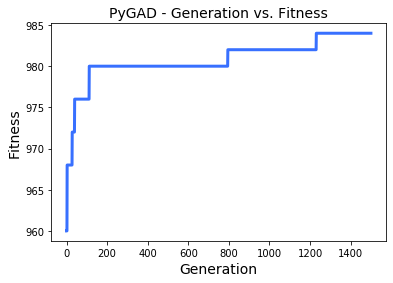

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 3 6 5 5 4 6 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 6 3 4 4 5 6 6 7 6 4]


 round:  50
elapsed time:  273.47421407699585
best sol [0.77821805 0.1598182  0.99827007 0.99827007 0.28411745 0.81909768
 0.02996681 0.24938399 0.14812778 0.19885915 0.1598182  0.15344756
 0.19936381 0.488514   0.76615519 0.02996681 0.46421743 0.1598182
 0.94739233 0.5102989  0.42502867 0.42502867 0.1600282  0.15344756
 0.7667625  0.488514   0.7667625  0.94739233 0.42502867 0.5102989
 0.98471567 0.08990857 0.42502867 0.65319747 0.15069369]
fitness:  12.0


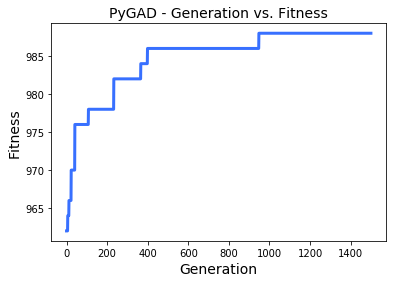

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 4 7 3 5 3 4 4 7 7 7 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 6 2 4 3 5 6 7 7 7 3]


 round:  51
elapsed time:  271.1393451690674
best sol [0.97680823 0.18798761 0.77176897 0.99570248 0.14509565 0.58079543
 0.85080996 0.4055116  0.02399982 0.09101303 0.09565515 0.23346179
 0.14509238 0.55118754 0.92858899 0.02650281 0.02399982 0.45549484
 0.3107919  0.93856866 0.28588723 0.95958086 0.45549484 0.09565515
 0.55118754 0.55118754 0.45205984 0.5818902  0.58627036 0.19037203
 0.09101303 0.45549484 0.09565515 0.16236087 0.5818902 ]
fitness:  16.0


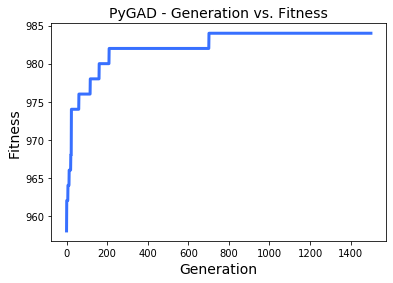

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 5 7 3 2 5 5 6 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 4 4 6 6 6 7 5 3]


 round:  52
elapsed time:  269.5120530128479
best sol [0.50723656 0.21402082 0.94325605 0.8470918  0.13819924 0.45402059
 0.84943239 0.35504362 0.12492895 0.16562431 0.13819924 0.02536775
 0.43088359 0.43088359 0.49680368 0.13819924 0.53390689 0.43088359
 0.46176185 0.9610823  0.16562431 0.98266729 0.04561536 0.12492895
 0.69405192 0.50693936 0.37831216 0.4563351  0.35504362 0.64086903
 0.96926046 0.21971034 0.02536775 0.0564712  0.42464834]
fitness:  14.0


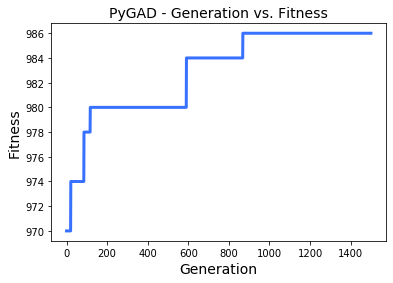

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 8 3 5 4 3 4 7 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 4 3 8 6 5 7 7 2]


 round:  53
elapsed time:  270.129163980484
best sol [0.76631937 0.1300084  0.72249738 0.89233511 0.20346726 0.65869593
 0.73441272 0.36591604 0.13961409 0.15849904 0.16185816 0.05291734
 0.80113985 0.32527797 0.16757267 0.76631937 0.72249738 0.13961409
 0.47385308 0.63267321 0.09214772 0.56037917 0.72249738 0.05291734
 0.47385308 0.72249738 0.97389811 0.97389811 0.36591604 0.39464237
 0.80113985 0.16757267 0.05291734 0.56037917 0.05291734]
fitness:  14.0


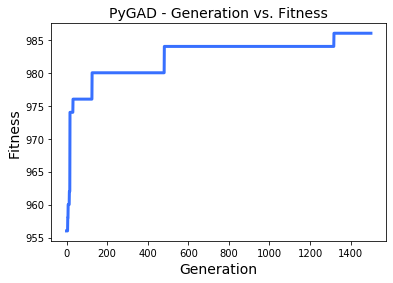

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 8 3 7 4 4 4 6 6 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 5 6 5 7 6 5 7 3]


 round:  54
elapsed time:  269.9220497608185
best sol [0.82854969 0.0810238  0.98191145 0.86024726 0.20969367 0.90141158
 0.61568565 0.30314402 0.06308619 0.19469931 0.1016501  0.28158286
 0.00549999 0.89787698 0.06683107 0.1016501  0.28338333 0.90141158
 0.28158286 0.46814324 0.06683107 0.27017235 0.73975458 0.12998595
 0.18031217 0.71786159 0.93837855 0.59534809 0.59441142 0.99277179
 0.93837855 0.27017235 0.19469931 0.44445789 0.46814324]
fitness:  14.0


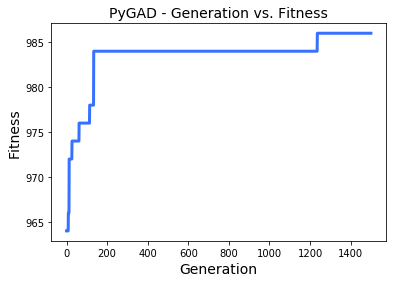

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 6 1 5 4 4 4 7 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 3 5 2 3 5 6 7 7 3]


 round:  55
elapsed time:  270.50524520874023
best sol [0.97080264 0.12991682 0.9157009  0.69346973 0.28833885 0.47990681
 0.67175192 0.43509368 0.15998223 0.15998223 0.16344914 0.16097323
 0.16344914 0.70805008 0.02591737 0.13408447 0.39953657 0.49887348
 0.72257873 0.72257873 0.13169302 0.16344914 0.40350755 0.49887348
 0.81491775 0.28833885 0.99911686 0.94060201 0.38879434 0.67175192
 0.81491775 0.16344914 0.16097323 0.94060201 0.07500316]
fitness:  12.0


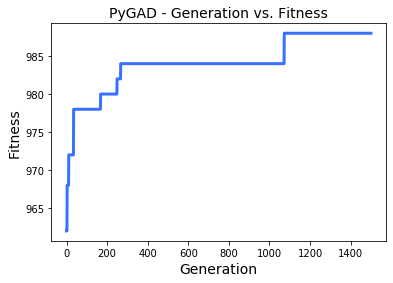

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 5 7 3 7 5 4 4 7 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 3 5 3 6 7 5 9 7 4]


 round:  56
elapsed time:  274.9346308708191
best sol [0.79519072 0.24497507 0.94079262 0.95877895 0.27118132 0.87848318
 0.00652816 0.31111243 0.00521576 0.03794399 0.46670151 0.14971622
 0.74089148 0.13043384 0.4264843  0.31111243 0.27118132 0.27118132
 0.31111243 0.85742964 0.03794399 0.87848318 0.25241335 0.14971622
 0.4350861  0.94079262 0.94079262 0.94079262 0.4350861  0.74089148
 0.75771062 0.00209728 0.05275424 0.5666173  0.69605767]
fitness:  14.0


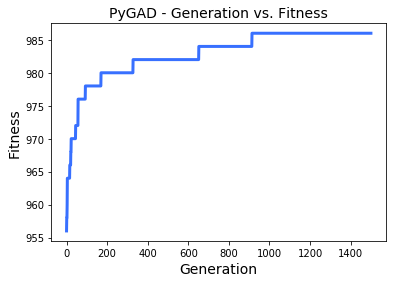

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 8 4 7 4 4 5 7 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 5 2 4 3 6 9 7 8 7 3]


 round:  57
elapsed time:  273.01707005500793
best sol [0.72777332 0.21709929 0.98042425 0.8446769  0.33325525 0.30210285
 0.65509955 0.47542405 0.11343061 0.09169711 0.09169711 0.32003027
 0.33325525 0.39925531 0.49575034 0.30210285 0.68485448 0.39925531
 0.49158056 0.63899684 0.8446769  0.21352472 0.16540846 0.39389272
 0.93964704 0.39379225 0.98311416 0.93964704 0.34957988 0.49158056
 0.98042425 0.39925531 0.16540846 0.34957988 0.09169711]
fitness:  16.0


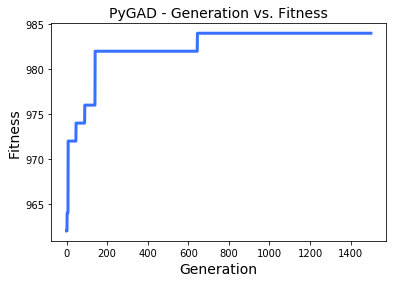

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 8 4 7 4 4 3 6 7 7 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 6 2 3 4 5 7 7 6 7 3]


 round:  58
elapsed time:  270.889297246933
best sol [0.8660215  0.10923738 0.73495586 0.9759443  0.00272014 0.47837942
 0.70554375 0.3570199  0.1698707  0.03083512 0.9759443  0.05849337
 0.16338388 0.57852768 0.36979416 0.06601928 0.05849337 0.15188325
 0.82386621 0.51322783 0.13660614 0.86818675 0.39729698 0.35944378
 0.22414089 0.36979416 0.9759443  0.70554375 0.40945841 0.86243389
 0.850466   0.29303931 0.49978503 0.16174738 0.73780855]
fitness:  14.0


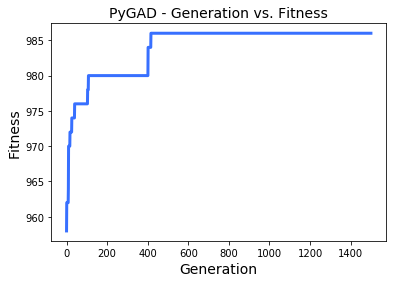

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 2 7 4 4 4 7 5 5 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 6 3 4 2 4 7 7 7 7 3]


 round:  59
elapsed time:  273.29959297180176
best sol [0.73770805 0.31697222 0.94621701 0.81225694 0.07324483 0.62141775
 0.86633892 0.42070794 0.1973092  0.02275475 0.77127996 0.05318768
 0.1973092  0.62022123 0.25229699 0.06391064 0.32662528 0.62022123
 0.73770805 0.69242667 0.32367944 0.94621701 0.11227867 0.30794958
 0.76390473 0.28056298 0.65504884 0.30794958 0.37810218 0.37810218
 0.16483    0.19526704 0.1110948  0.468152   0.7439439 ]
fitness:  16.0


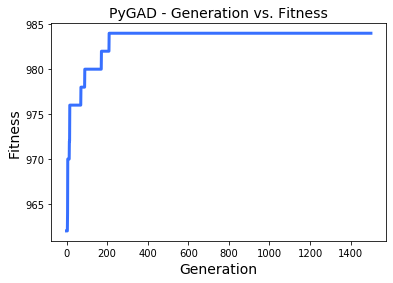

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 6 4 7 3 4 5 6 5 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 6 7 2 4 3 6 6 6 7 5 3]


 round:  60
elapsed time:  271.58975291252136
best sol [0.38886206 0.19922491 0.96429684 0.96791488 0.29200112 0.66473955
 0.75724311 0.42683614 0.21084116 0.30995493 0.75724311 0.06853749
 0.45697256 0.39381449 0.06853749 0.96429684 0.93480513 0.43691052
 0.39381449 0.15209869 0.21084116 0.10887935 0.6013798  0.06853749
 0.42683614 0.86242178 0.96429684 0.96429684 0.58899493 0.43691052
 0.86242178 0.21084116 0.45697256 0.1439652  0.6013798 ]
fitness:  14.0


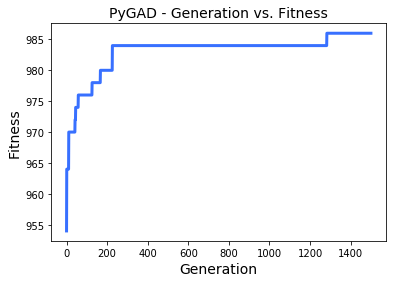

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 4 7 2 4 3 7 7 7 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 3 4 6 6 6 5 6 7 3]


 round:  61
elapsed time:  270.4917838573456
best sol [0.93440329 0.22869208 0.91745839 0.89756342 0.12489037 0.76021462
 0.12489037 0.71209907 0.16675662 0.11135852 0.16164267 0.14397224
 0.00609872 0.66835176 0.18562849 0.09069335 0.53539777 0.8462079
 0.41520892 0.58522784 0.21767002 0.54902742 0.08190577 0.41520892
 0.8462079  0.47516144 0.99196153 0.69898503 0.54904383 0.44436414
 0.39498238 0.15671306 0.11135852 0.56296644 0.18562849]
fitness:  12.0


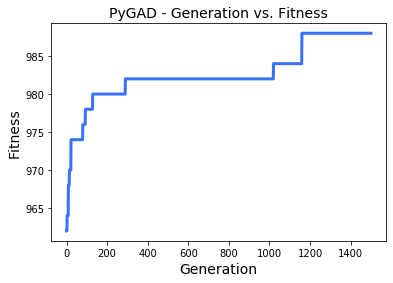

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 1 6 4 4 4 6 7 8 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 8 6 2 4 3 5 5 6 7 6 3]


 round:  62
elapsed time:  270.3635039329529
best sol [0.66894298 0.26411744 0.94323446 0.74077096 0.28237909 0.7664112
 0.22626701 0.36541266 0.26321346 0.80394608 0.00623388 0.01099186
 0.32223583 0.33948668 0.01952724 0.00267669 0.87905539 0.63142675
 0.12965117 0.57065843 0.36341604 0.97931359 0.19137669 0.01952724
 0.41245115 0.19137669 0.59570325 0.59570325 0.66894298 0.59570325
 0.8635644  0.26494405 0.44988903 0.00623388 0.41245115]
fitness:  14.0


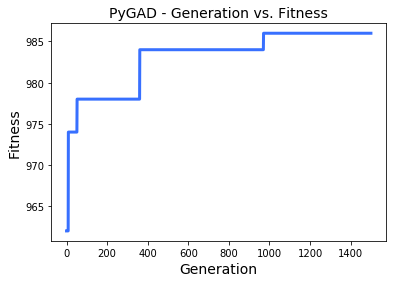

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [5 5 7 3 6 3 4 4 7 7 7 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 6 3 5 1 5 7 5 7 7 3]


 round:  63
elapsed time:  277.5780837535858
best sol [0.46763215 0.14513452 0.87725632 0.99125682 0.25479235 0.78753557
 0.96940861 0.4834837  0.47436515 0.14513452 0.06703804 0.02323618
 0.25479235 0.1135531  0.13434625 0.14513452 0.96864815 0.46916781
 0.94476695 0.49485941 0.23188499 0.2717374  0.0306116  0.23188499
 0.77983643 0.34273979 0.84153192 0.96940861 0.50173198 0.96864815
 0.84153192 0.28138918 0.02323618 0.54553083 0.17697985]
fitness:  12.0


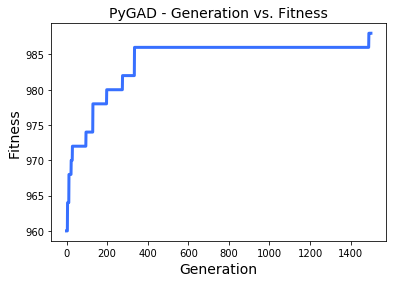

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 2 6 4 3 4 6 6 8 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 7 2 4 3 5 6 6 7 7 3]


 round:  64
elapsed time:  270.41602182388306
best sol [0.82675427 0.10866469 0.91555318 0.94809177 0.13109109 0.63391768
 0.27177391 0.35707498 0.14509407 0.23898663 0.11845276 0.2293166
 0.32047925 0.60037814 0.09050607 0.35707498 0.27177391 0.14509407
 0.17408842 0.51819878 0.10714588 0.55451153 0.35830981 0.10714588
 0.51819878 0.60037814 0.90037056 0.95716025 0.42119732 0.69923372
 0.75524234 0.05481314 0.22419324 0.86125443 0.2293166 ]
fitness:  12.0


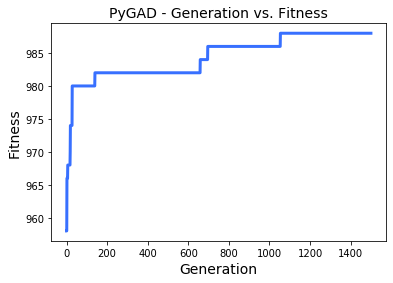

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 6 2 6 4 4 5 7 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 4 2 4 7 6 8 7 3]


 round:  65
elapsed time:  270.7417850494385
best sol [0.78009199 0.19232555 0.7907431  0.8822234  0.15139164 0.78237405
 0.60588153 0.33931796 0.15139164 0.06513365 0.12838739 0.49682575
 0.281846   0.63086612 0.4693529  0.01768103 0.46410304 0.59554185
 0.52749128 0.58920192 0.35895124 0.3113679  0.58920192 0.27596336
 0.78237405 0.75982431 0.83078316 0.83013892 0.01768103 0.32565353
 0.92700805 0.15139164 0.19782985 0.63086612 0.01023453]
fitness:  16.0


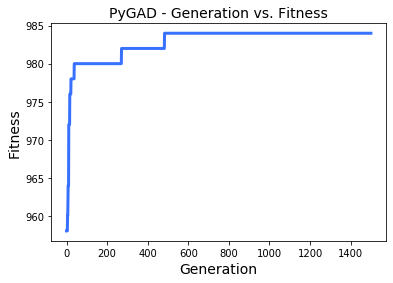

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 7 3 4 3 4 4 6 7 8 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 7 2 4 2 5 5 7 7 6 3]


 round:  66
elapsed time:  270.6810688972473
best sol [0.7581783  0.16162242 0.95033634 0.90439478 0.15326626 0.3887577
 0.16315818 0.36876943 0.15326626 0.2900016  0.15326626 0.70361168
 0.43132706 0.3887577  0.23082154 0.15326626 0.36876943 0.23082154
 0.2900016  0.34450306 0.15326626 0.30428911 0.61893792 0.23082154
 0.30428911 0.93495085 0.90439478 0.9224381  0.56976321 0.67491529
 0.99380982 0.2900016  0.56976321 0.1580145  0.71922741]
fitness:  14.0


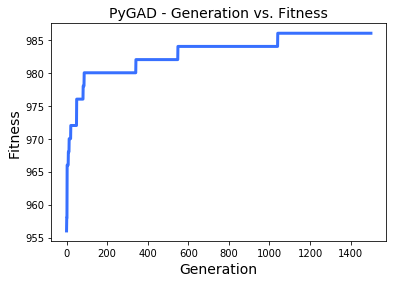

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 2 6 3 4 4 7 6 5 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 4 4 2 2 7 6 7 7 3]


 round:  67
elapsed time:  270.21009492874146
best sol [0.42679064 0.10107503 0.80456322 0.90216389 0.09578893 0.75867092
 0.47385584 0.88383004 0.15660992 0.07302443 0.08334742 0.29729512
 0.14544369 0.50390578 0.33202762 0.01070956 0.87269879 0.471649
 0.6314605  0.33202762 0.08334742 0.40600344 0.08334742 0.15660992
 0.41108021 0.19006208 0.99579213 0.94944125 0.40600344 0.93868035
 0.44238774 0.20419871 0.20182983 0.77495832 0.17997151]
fitness:  14.0


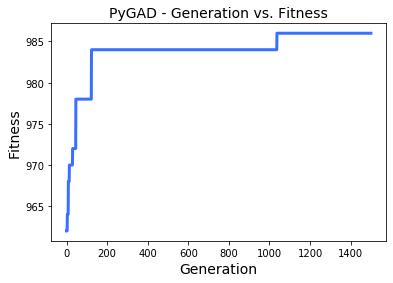

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 7 3 6 2 3 4 7 7 6 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 8 5 1 4 3 4 7 5 7 6 3]


 round:  68
elapsed time:  270.03803300857544
best sol [0.80722241 0.01578006 0.71268688 0.64404172 0.08153506 0.80518006
 0.79435612 0.47057019 0.20361545 0.88756425 0.01169144 0.16920885
 0.06463464 0.33027182 0.3252145  0.01578006 0.26597463 0.8432937
 0.15603269 0.87315348 0.06574582 0.74617091 0.39699058 0.37418792
 0.06574582 0.60312487 0.22438746 0.95251499 0.95251499 0.66227887
 0.87315348 0.28835924 0.15603269 0.79435612 0.06574582]
fitness:  16.0


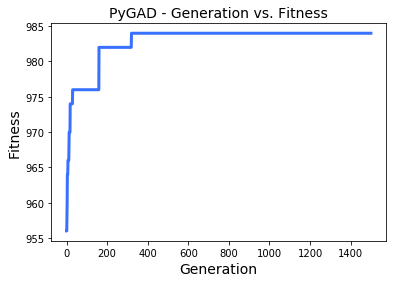

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 4 8 5 7 3 4 4 6 6 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [5 6 6 3 4 3 6 7 5 7 8 3]


 round:  69
elapsed time:  269.4699127674103
best sol [0.75326634 0.07170424 0.95523695 0.76246881 0.17929407 0.97772064
 0.34106179 0.42393741 0.13646207 0.08662449 0.13646207 0.00839993
 0.17717847 0.37177538 0.24793496 0.16971288 0.26889546 0.99121197
 0.7632178  0.11542714 0.07170424 0.82965489 0.27966572 0.50066898
 0.37177538 0.57671893 0.65227501 0.99121197 0.42393741 0.68204973
 0.8571172  0.10290754 0.10486609 0.61483435 0.23879622]
fitness:  14.0


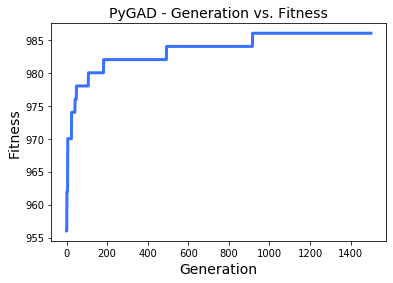

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 4 6 2 6 3 4 5 8 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 4 4 3 7 6 9 7 3]


 round:  70
elapsed time:  270.7174742221832
best sol [0.77072124 0.20059331 0.73754442 0.92362577 0.30937154 0.86014568
 0.41605391 0.53202154 0.107767   0.33041234 0.10064134 0.11887789
 0.33041234 0.57860367 0.45445694 0.04035187 0.41605391 0.33041234
 0.62544916 0.33582107 0.11887789 0.40491069 0.15708336 0.41605391
 0.55465104 0.35368808 0.95633704 0.92573418 0.21105952 0.95610427
 0.95610427 0.107767   0.11887789 0.53202154 0.21647407]
fitness:  14.0


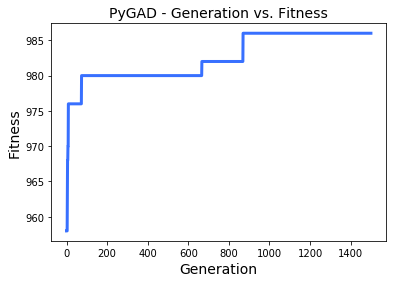

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 3 5 2 4 4 7 7 6 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 8 6 2 4 2 3 7 5 7 7 3]


 round:  71
elapsed time:  271.40208172798157
best sol [0.4793496  0.09514266 0.84316085 0.94691616 0.30319704 0.89677346
 0.60675708 0.31021228 0.18156306 0.0991578  0.0687895  0.31021228
 0.27284889 0.39760493 0.09068579 0.25125564 0.18156306 0.72977525
 0.85724422 0.89677346 0.18156306 0.94691616 0.4793496  0.18156306
 0.80019104 0.76051952 0.95764998 0.49870769 0.29195529 0.29195529
 0.72977525 0.19020166 0.44471886 0.18156306 0.21283224]
fitness:  14.0


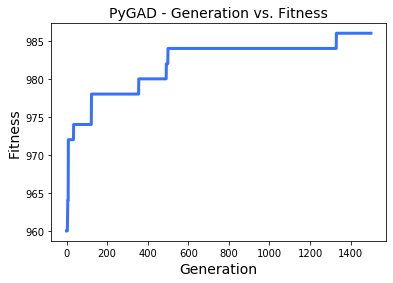

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 6 2 5 4 4 5 6 8 8 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 4 4 6 7 7 6 6 3]


 round:  72
elapsed time:  271.00483775138855
best sol [0.54860613 0.20435119 0.81960735 0.89546253 0.22977438 0.45344189
 0.89546253 0.45150192 0.22977438 0.12103106 0.12103106 0.0955478
 0.20435119 0.41976626 0.0955478  0.0955478  0.22977438 0.75150679
 0.42836126 0.84611606 0.11139699 0.89546253 0.12103106 0.41141117
 0.72924998 0.7425077  0.45150192 0.72924998 0.62157516 0.41976626
 0.33117863 0.20435119 0.42836126 0.26264648 0.17770193]
fitness:  16.0


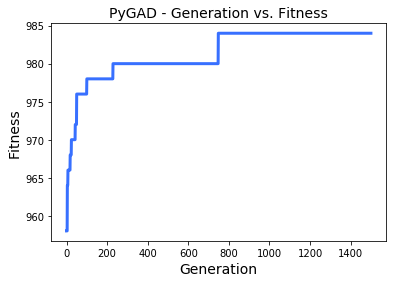

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 4 7 2 6 4 4 5 5 5 8 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 4 2 6 6 5 8 6 3]


 round:  73
elapsed time:  270.3485128879547
best sol [0.77830106 0.12506908 0.95346715 0.18873738 0.35414432 0.81167812
 0.6620417  0.34543514 0.03355194 0.18658913 0.12506908 0.35414432
 0.35414432 0.86792898 0.10837115 0.0494147  0.6959466  0.85090596
 0.92987882 0.62111502 0.13252714 0.34541709 0.45729196 0.52749507
 0.81321789 0.11675756 0.6959466  0.92987882 0.52749507 0.27895235
 0.97339746 0.13252714 0.09402482 0.46188843 0.83896511]
fitness:  16.0


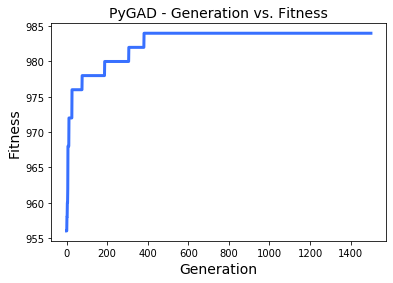

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 7 2 7 4 5 4 6 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 5 6 3 7 2 5 6 6 8 7 3]


 round:  74
elapsed time:  270.2569601535797
best sol [0.53472959 0.16593777 0.88069822 0.94201237 0.04960374 0.79616919
 0.13471309 0.51225564 0.20623189 0.06759677 0.14467043 0.38863377
 0.00318153 0.86064736 0.47886533 0.16855934 0.60583392 0.58859697
 0.81890394 0.40459327 0.17814418 0.88400927 0.13384272 0.1974107
 0.93059765 0.22655684 0.88400927 0.58859697 0.58859697 0.82436997
 0.37761191 0.20291408 0.17814418 0.32512543 0.93059765]
fitness:  16.0


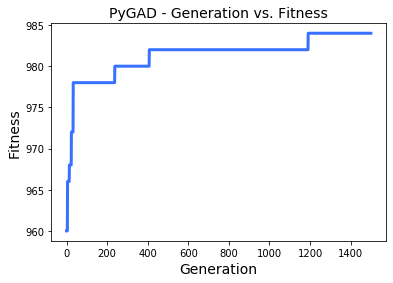

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 5 1 5 4 4 5 7 8 7 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 4 2 4 4 4 7 7 7 7 3]


 round:  75
elapsed time:  270.84544825553894
best sol [0.64723931 0.21918635 0.842309   0.73885549 0.17848374 0.87085739
 0.73885549 0.36570585 0.01975292 0.22843209 0.04980689 0.3801134
 0.12431998 0.61236321 0.3801134  0.30480369 0.45177589 0.61847727
 0.57642108 0.57642108 0.16450445 0.04980689 0.61236321 0.11672789
 0.3801134  0.57642108 0.98638731 0.96071855 0.61236321 0.9004472
 0.45808411 0.23374219 0.60284624 0.04094348 0.28275153]
fitness:  16.0


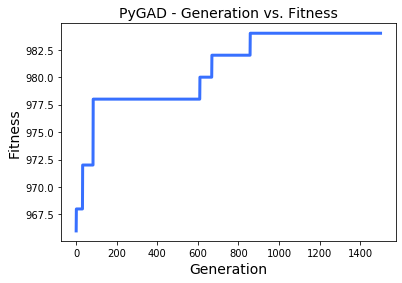

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 8 2 7 3 4 3 7 7 5 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 5 3 3 4 5 7 4 8 6 3]


 round:  76
elapsed time:  268.9751501083374
best sol [0.79104695 0.15280876 0.97936836 0.98788034 0.36995568 0.31600936
 0.57186364 0.39211148 0.05597257 0.13409761 0.14376326 0.0217756
 0.19608062 0.54806685 0.05597257 0.58978108 0.39211148 0.54806685
 0.222609   0.78109919 0.22745982 0.54806685 0.05597257 0.03895364
 0.22562046 0.72205221 0.92622247 0.7209108  0.58238263 0.97292273
 0.97936836 0.17322546 0.10887962 0.01968424 0.34769708]
fitness:  16.0


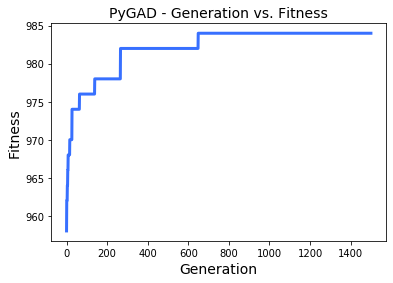

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 7 2 6 4 4 4 8 5 6 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 4 5 5 5 6 6 7 2]


 round:  77
elapsed time:  270.3381190299988
best sol [0.686957   0.09743267 0.92810962 0.78379584 0.12296129 0.27470584
 0.94343075 0.37251797 0.16184614 0.09743267 0.12941239 0.37251797
 0.27725117 0.48038695 0.27470584 0.25646852 0.52557455 0.19566316
 0.38733075 0.78259571 0.96593903 0.96089983 0.38733075 0.10418594
 0.46145476 0.53414438 0.27725117 0.64264441 0.8635684  0.19566316
 0.94698319 0.14265111 0.8635684  0.04143241 0.04143241]
fitness:  16.0


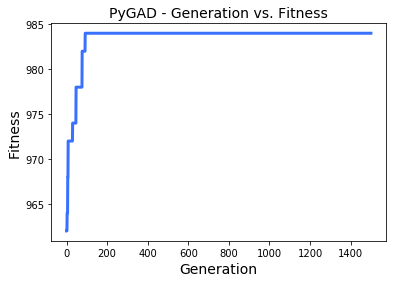

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 3 7 4 7 5 5 3 7 7 5 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 7 2 3 3 6 7 7 7 7 3]


 round:  78
elapsed time:  270.1023459434509
best sol [0.74652759 0.12144474 0.95210712 0.90580632 0.22278916 0.98521879
 0.22278916 0.43769181 0.03836238 0.71351361 0.15712074 0.03836238
 0.22278916 0.49560752 0.41391514 0.03836238 0.29684186 0.46659375
 0.21467481 0.57403374 0.22278916 0.95083753 0.3024142  0.41391514
 0.77922063 0.96387491 0.24755678 0.65511116 0.37609968 0.54259717
 0.71351361 0.39656302 0.11248372 0.49560752 0.49760659]
fitness:  12.0


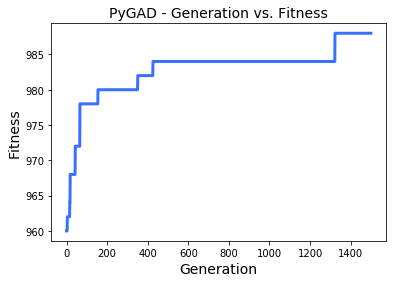

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 7 2 6 3 4 5 7 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 4 2 4 7 7 8 6 4]


 round:  79
elapsed time:  269.85722279548645
best sol [0.844205   0.0047555  0.92840872 0.78830566 0.56761358 0.34737493
 0.64943355 0.39630721 0.15562053 0.15562053 0.52819129 0.07192841
 0.07192841 0.42456077 0.34369426 0.15562053 0.97160509 0.38412486
 0.52819129 0.7699942  0.24135736 0.06733001 0.36556237 0.39630721
 0.97160509 0.34737493 0.88111443 0.97275447 0.44043625 0.42456077
 0.97275447 0.04468478 0.20849273 0.98325703 0.0835391 ]
fitness:  14.0


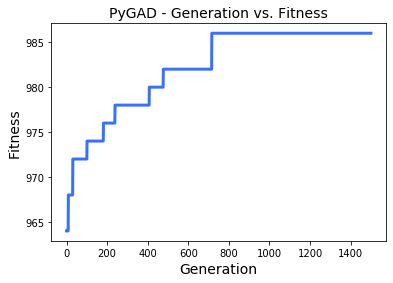

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 4 7 4 7 3 3 5 6 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 3 2 3 7 7 5 7 7 3]


 round:  80
elapsed time:  268.406711101532
best sol [0.46023061 0.08444757 0.92988481 0.96224772 0.27083704 0.96224772
 0.67060361 0.45025856 0.07715316 0.1083647  0.6029515  0.15009341
 0.62148668 0.47765101 0.11033322 0.35707128 0.93807677 0.45025856
 0.69733733 0.53323011 0.02943271 0.92988481 0.09127975 0.07715316
 0.72890692 0.79612036 0.79612036 0.62071346 0.62148668 0.53209465
 0.84453508 0.2091353  0.34193443 0.17225748 0.14141197]
fitness:  14.0


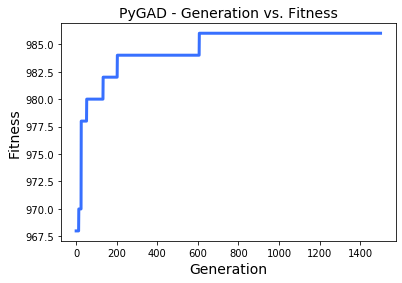

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 6 3 7 4 5 5 7 8 8 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 7 3 4 4 6 7 6 7 7 3]


 round:  81
elapsed time:  270.4355571269989
best sol [0.86575832 0.15145098 0.93133158 0.51232824 0.19944396 0.42207699
 0.81565481 0.43454142 0.14360591 0.33858555 0.08333194 0.19944396
 0.37342604 0.42207699 0.05754658 0.03843647 0.81565481 0.32903553
 0.32903553 0.59526793 0.14360591 0.96088801 0.14360591 0.0204559
 0.81565481 0.59526793 0.96088801 0.62157263 0.59526793 0.67960417
 0.90917174 0.21522531 0.49978973 0.0204559  0.59956858]
fitness:  12.0


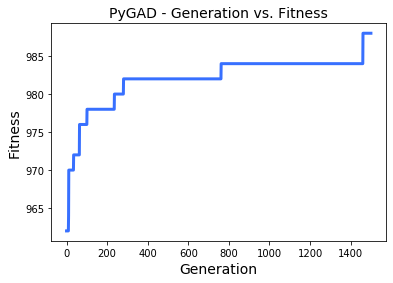

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 7 1 6 3 4 4 7 7 5 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 6 2 3 0 5 8 6 7 7 3]


 round:  82
elapsed time:  270.3131272792816
best sol [0.64016294 0.02140617 0.94039084 0.94039084 0.49482528 0.94039084
 0.13438591 0.38115329 0.1416873  0.23146051 0.15483401 0.00285564
 0.15483401 0.60967814 0.38115329 0.24856849 0.15483401 0.15483401
 0.78163191 0.98629997 0.78163191 0.98629997 0.49482528 0.24856849
 0.50270415 0.78163191 0.4780452  0.57216106 0.41045999 0.50270415
 0.77686322 0.28610279 0.42663825 0.49081336 0.13533177]
fitness:  14.0


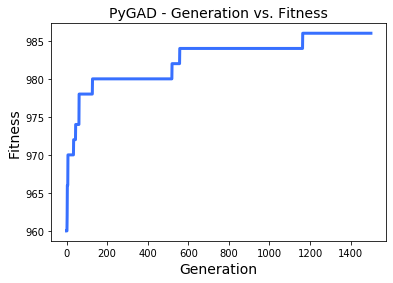

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 3 7 2 7 4 4 7 7 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 4 4 7 6 7 8 7 3]


 round:  83
elapsed time:  270.48297810554504
best sol [0.867802   0.15114143 0.72319415 0.45054665 0.32762014 0.79109018
 0.79763098 0.44931741 0.1919468  0.30138129 0.00834675 0.14254307
 0.79763098 0.06671032 0.06746246 0.00834675 0.42333879 0.95732746
 0.82702034 0.67979221 0.24383283 0.42333879 0.00834675 0.06746246
 0.79109018 0.24383283 0.95732746 0.69727847 0.69727847 0.73649767
 0.73649767 0.12564228 0.06746246 0.00834675 0.47319795]
fitness:  18.0


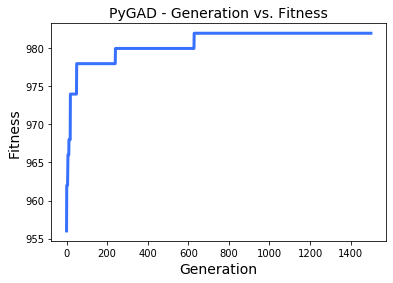

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 4 7 3 3 2 4 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 6 3 4 2 6 5 6 7 6 2]


 round:  84
elapsed time:  270.0248119831085
best sol [0.86383059 0.12708649 0.91360789 0.89712404 0.24355171 0.79519072
 0.0433957  0.4323169  0.16659718 0.02187628 0.1323266  0.1323266
 0.15813271 0.8763451  0.74119613 0.02187628 0.84695923 0.79597845
 0.21364989 0.79519072 0.16659718 0.69113369 0.45445981 0.16659718
 0.15813271 0.79597845 0.78852526 0.9278222  0.4908408  0.55028743
 0.8763451  0.1323266  0.05253004 0.63573478 0.15187897]
fitness:  10.0


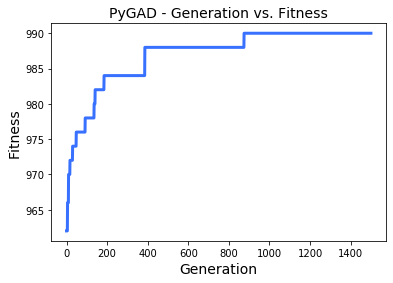

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 4 7 3 7 3 4 7 7 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 6 3 7 7 6 7 7 3]


 round:  85
elapsed time:  271.0640649795532
best sol [0.14808508 0.08627396 0.90140574 0.92679579 0.22904024 0.96073073
 0.14149474 0.37977267 0.16461397 0.09503901 0.13470146 0.16461397
 0.25434395 0.89821945 0.37948174 0.14149474 0.14149474 0.48588823
 0.89170102 0.86480985 0.13187946 0.48588823 0.26379925 0.17403765
 0.19395253 0.63726395 0.89170102 0.94470754 0.5670225  0.5670225
 0.89170102 0.19764304 0.60402192 0.36576855 0.03263592]
fitness:  10.0


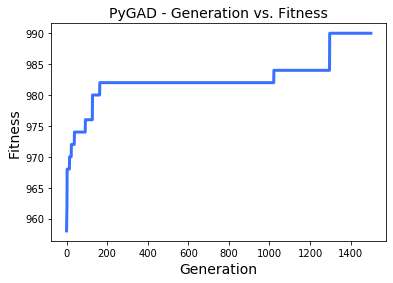

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 2 7 4 4 5 6 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 5 1 6 4 6 7 6 7 7 3]


 round:  86
elapsed time:  270.2957088947296
best sol [0.48954368 0.12312002 0.95588668 0.6877765  0.17590175 0.37327069
 0.86418003 0.41667986 0.21243278 0.30206979 0.13269332 0.17590175
 0.07016393 0.69241234 0.17590175 0.07016393 0.30206979 0.48222615
 0.94472474 0.66404983 0.17253064 0.82070312 0.13269332 0.13269332
 0.66315621 0.66404983 0.66404983 0.58447009 0.91329179 0.30935208
 0.66315621 0.22035128 0.12002853 0.66404983 0.223049  ]
fitness:  14.0


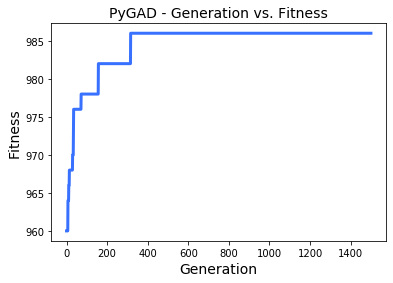

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 5 7 4 6 3 3 6 7 6 6 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 4 3 6 6 6 8 7 3]


 round:  87
elapsed time:  269.1743280887604
best sol [0.71297797 0.17559691 0.96171702 0.05216846 0.52781157 0.89480351
 0.14983372 0.77798462 0.20057331 0.04944153 0.12554749 0.08357578
 0.08079377 0.92599449 0.2262403  0.16928821 0.08079377 0.40941987
 0.56782593 0.79328494 0.69548209 0.2262403  0.5346146  0.05216846
 0.92599449 0.24928658 0.92599449 0.79328494 0.40723605 0.65712516
 0.94653156 0.10378811 0.30987795 0.73740098 0.01135169]
fitness:  14.0


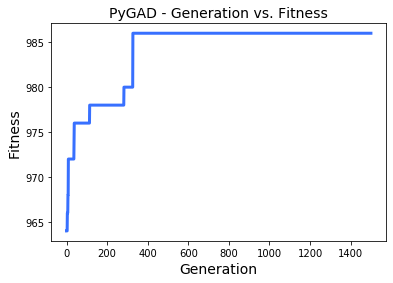

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 7 4 6 4 4 4 7 7 6 2]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 5 1 4 3 6 6 7 6 7 4]


 round:  88
elapsed time:  270.23546385765076
best sol [0.57233838 0.0697392  0.98240091 0.62965824 0.0819031  0.6887088
 0.98240091 0.6887088  0.10513797 0.86958766 0.10513797 0.33124035
 0.33124035 0.15490151 0.12867621 0.33124035 0.37964209 0.70220915
 0.84656435 0.57083788 0.08767716 0.46260151 0.288559   0.12332129
 0.98240091 0.33534985 0.48787144 0.98240091 0.48787144 0.42319428
 0.79567973 0.288559   0.05540957 0.17530479 0.71910788]
fitness:  18.0


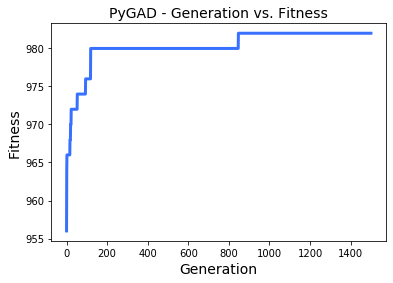

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 7 3 7 4 4 3 5 7 8 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [5 7 6 4 4 4 5 6 7 6 7 3]


 round:  89
elapsed time:  269.724178314209
best sol [0.79379476 0.21395594 0.7152404  0.89836534 0.0453777  0.50083887
 0.7435442  0.44903144 0.17196455 0.12779672 0.12779672 0.58120439
 0.26120782 0.35000923 0.21114316 0.01353755 0.84879764 0.44903144
 0.86255834 0.62043211 0.16589862 0.44903144 0.7435442  0.33444525
 0.37251642 0.28352593 0.78708495 0.93276825 0.52639091 0.85029109
 0.78708495 0.21502465 0.04933767 0.82148238 0.02494534]
fitness:  14.0


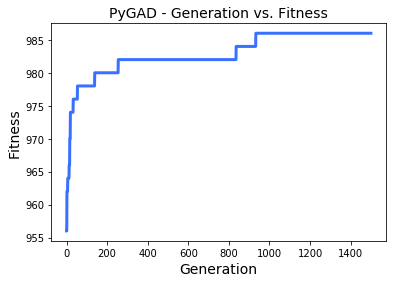

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 8 2 7 3 4 5 8 6 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 6 4 3 3 6 6 7 7 7 3]


 round:  90
elapsed time:  270.0533571243286
best sol [0.43653468 0.16777079 0.96698059 0.99623291 0.09316964 0.83961933
 0.03915535 0.43653468 0.09316964 0.03765061 0.09316964 0.24569619
 0.88819419 0.03915535 0.24569619 0.05573889 0.677765   0.21867552
 0.63092937 0.68834385 0.21863499 0.63092937 0.68834385 0.09316964
 0.68834385 0.63092937 0.68646006 0.63092937 0.53516771 0.63092937
 0.77019439 0.42433724 0.21867552 0.42433724 0.02507928]
fitness:  16.0


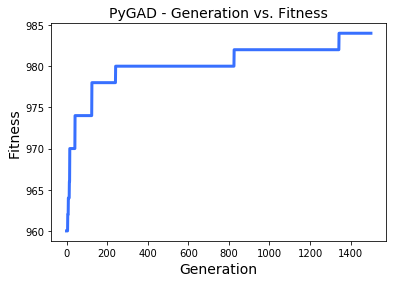

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 6 3 7 4 3 4 5 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 5 1 4 2 6 5 7 8 7 3]


 round:  91
elapsed time:  268.3693037033081
best sol [0.48314778 0.22159003 0.80330762 0.87207281 0.26387646 0.48314778
 0.97964984 0.47274667 0.08385425 0.33780698 0.05314602 0.19745216
 0.472469   0.33074679 0.07317835 0.21514239 0.38716742 0.46884302
 0.33074679 0.71761244 0.21514239 0.96508014 0.22159003 0.21514239
 0.13909479 0.46884302 0.71761244 0.5069084  0.38635269 0.91111337
 0.90288591 0.21514239 0.46884302 0.35471449 0.46884302]
fitness:  18.0


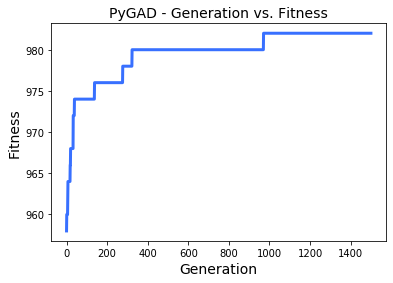

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [4 5 7 3 6 4 5 5 7 7 5 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 5 2 4 3 5 6 6 6 7 4]


 round:  92
elapsed time:  270.13255882263184
best sol [0.82476115 0.21393985 0.93005719 0.91956746 0.13286337 0.73378573
 0.18294822 0.31804899 0.18294822 0.37234118 0.13286337 0.12337488
 0.44837452 0.44837452 0.37234118 0.31044574 0.46966495 0.35801364
 0.52167096 0.52167096 0.32971309 0.32971309 0.37234118 0.31803247
 0.46966495 0.32971309 0.89085893 0.998124   0.3828416  0.31044574
 0.77177572 0.1610072  0.12337488 0.74138054 0.21056864]
fitness:  12.0


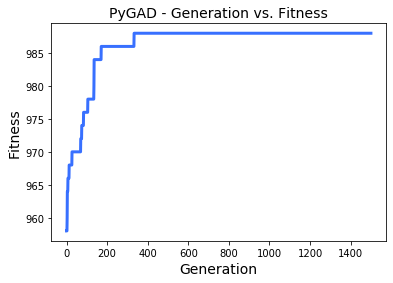

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 7 4 7 4 5 3 6 6 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 4 3 5 7 6 7 7 3]


 round:  93
elapsed time:  270.3178520202637
best sol [0.86632202 0.17930928 0.9627346  0.9627346  0.16686665 0.99001944
 0.12807875 0.31354011 0.10669534 0.00630188 0.02706258 0.14706665
 0.36489387 0.57076736 0.22533041 0.00630188 0.31354011 0.85662747
 0.44674661 0.55365488 0.55365488 0.20750455 0.36489387 0.12807875
 0.57076736 0.57076736 0.96349804 0.96349804 0.36489387 0.57076736
 0.85662747 0.20750455 0.11483007 0.50801222 0.70758968]
fitness:  12.0


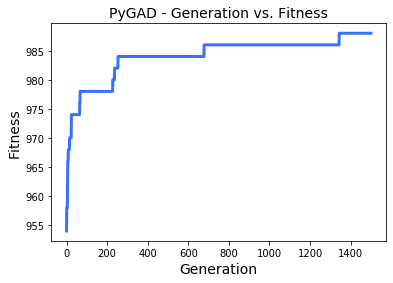

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 6 2 6 3 2 4 7 7 8 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 5 2 5 7 5 7 7 4]


 round:  94
elapsed time:  270.6693091392517
best sol [0.46902037 0.16371251 0.91257622 0.71779551 0.19476223 0.46902037
 0.91257622 0.45038331 0.16997659 0.1569681  0.17673078 0.38482133
 0.16371251 0.41433973 0.1569681  0.21055364 0.16302703 0.39637172
 0.78656205 0.97278962 0.41433973 0.84489393 0.12615036 0.12615036
 0.97266189 0.41433973 0.5728142  0.78656205 0.55240813 0.41433973
 0.91500446 0.1569681  0.39637172 0.16371251 0.31292191]
fitness:  16.0


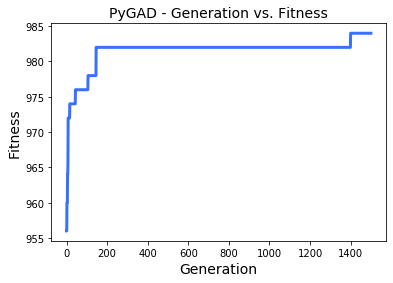

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 8 5 6 4 3 4 7 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 4 3 3 7 7 7 6 7 3]


 round:  95
elapsed time:  271.48617005348206
best sol [0.47604514 0.14632056 0.86405201 0.98807989 0.31215452 0.95089806
 0.71539127 0.33536052 0.15195791 0.00197697 0.11206463 0.11104367
 0.39341664 0.39341664 0.39341664 0.00989922 0.97229552 0.45273052
 0.86074078 0.55758204 0.00989922 0.63009471 0.39341664 0.1720017
 0.78391727 0.97229552 0.97229552 0.97229552 0.00989922 0.67913458
 0.7830345  0.2917528  0.5494161  0.5110844  0.24423448]
fitness:  14.0


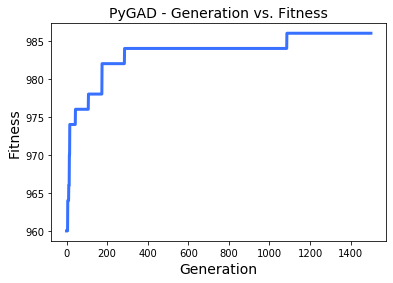

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 5 7 3 5 3 4 6 6 7 8 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 4 3 6 8 8 7 6 4]


 round:  96
elapsed time:  270.08777594566345
best sol [0.74363688 0.10579389 0.93800791 0.92708212 0.24961901 0.96743569
 0.10579389 0.35294657 0.05720864 0.05720864 0.18176945 0.35294657
 0.05720864 0.50382456 0.35294657 0.35294657 0.1900393  0.24792704
 0.58377177 0.81105834 0.27955383 0.35664363 0.24792704 0.35294657
 0.86978795 0.18176945 0.92708212 0.92708212 0.25238513 0.69719977
 0.91759731 0.24792704 0.24961901 0.05720864 0.29773154]
fitness:  14.0


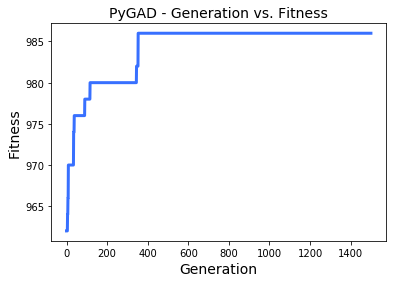

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 6 4 6 4 4 3 7 7 7 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 5 3 3 3 6 7 6 7 7 2]


 round:  97
elapsed time:  270.3973400592804
best sol [0.89204296 0.16963454 0.86800944 0.73417296 0.15164141 0.84550148
 0.78461255 0.41775845 0.09694934 0.22350846 0.01200576 0.09694934
 0.21112396 0.45350395 0.41775845 0.00377058 0.49204671 0.78461255
 0.22350846 0.96668891 0.01200576 0.84550148 0.16963454 0.22350846
 0.90682238 0.93629546 0.15164141 0.4242702  0.45350395 0.74522251
 0.93480026 0.21112396 0.26638833 0.00377058 0.74522251]
fitness:  14.0


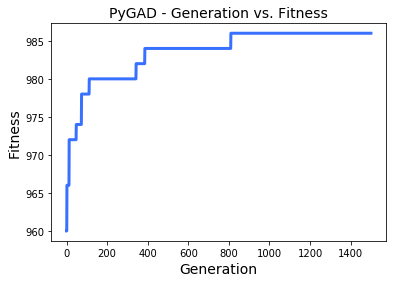

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 3 8 2 6 3 4 4 6 7 8 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 4 2 7 5 7 7 7 3]


 round:  98
elapsed time:  270.8907001018524
best sol [0.67599134 0.10120266 0.97770395 0.7363958  0.29652022 0.53864522
 0.18792936 0.3396866  0.10401129 0.3396866  0.19097391 0.18792936
 0.28261491 0.33771889 0.23043918 0.01327439 0.97770395 0.18792936
 0.25958263 0.53864522 0.04042001 0.25774493 0.27492508 0.19097391
 0.83562811 0.82826876 0.96133147 0.76602291 0.4142535  0.23043918
 0.77924281 0.23043918 0.5722367  0.29652022 0.02307168]
fitness:  16.0


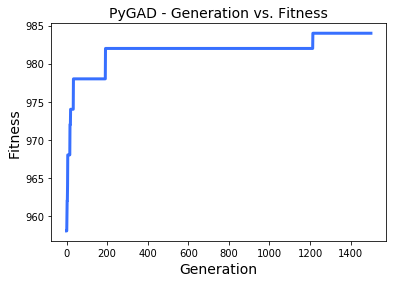

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 7 3 6 3 4 4 5 6 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 5 3 3 1 5 6 6 7 7 3]


 round:  99
elapsed time:  270.07411313056946
best sol [0.95339169 0.15704108 0.90499656 0.7054078  0.17070743 0.77439461
 0.22609559 0.48394122 0.15907072 0.28606243 0.01701129 0.36212249
 0.01701129 0.81532328 0.31154833 0.01701129 0.18643326 0.40167377
 0.42538378 0.81687526 0.90456492 0.40167377 0.01701129 0.03294602
 0.42538378 0.81532328 0.92445741 0.97486589 0.36250019 0.53688756
 0.82571254 0.22609559 0.01886491 0.3823839  0.40489532]
fitness:  12.0


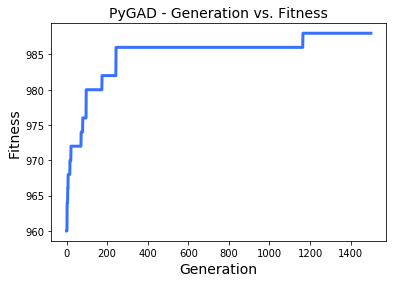

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 5 7 4 7 3 3 3 7 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 4 4 2 6 7 6 6 7 3]


 round:  100
elapsed time:  273.4567081928253
best sol [0.76914065 0.08647727 0.85735263 0.91531246 0.1564838  0.82716411
 0.82366686 0.48384855 0.09360101 0.01323227 0.37398851 0.3308775
 0.05118575 0.63729869 0.28059454 0.13300267 0.63436223 0.66851138
 0.08573787 0.66488514 0.15305497 0.74418666 0.26374447 0.05368648
 0.45169106 0.56616286 0.90873741 0.95322808 0.40217574 0.82366686
 0.82716411 0.29338571 0.76032653 0.01323227 0.06454183]
fitness:  14.0


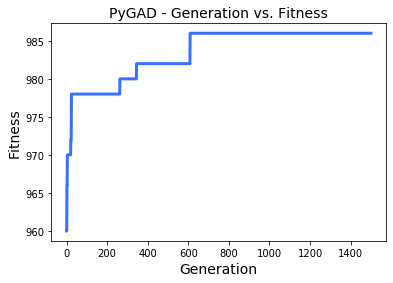

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [5 5 6 4 7 5 4 4 6 7 8 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 7 3 4 3 5 7 6 7 7 3]


 round:  101
elapsed time:  269.8218266963959
best sol [0.59185457 0.16416491 0.92993256 0.89277997 0.47051175 0.32906348
 0.59185457 0.60699625 0.14488914 0.05291817 0.10468728 0.30631624
 0.61115669 0.17790519 0.29217469 0.22565708 0.8877364  0.55043261
 0.59200429 0.59200429 0.14488914 0.02412222 0.32192843 0.31971483
 0.96617997 0.1720083  0.93477477 0.97952046 0.42942512 0.32746738
 0.91732659 0.22565708 0.05291817 0.22565708 0.25830992]
fitness:  16.0


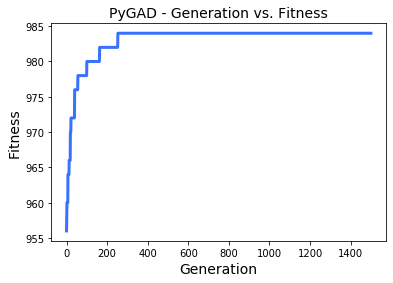

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [5 5 7 4 7 3 4 5 5 7 8 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 8 6 2 3 4 6 7 5 7 7 3]


 round:  102
elapsed time:  268.81887316703796
best sol [0.63765109 0.17653521 0.73178515 0.76817791 0.28166422 0.67494575
 0.93317606 0.35603344 0.24134818 0.05956338 0.05956338 0.07990357
 0.16288953 0.4169194  0.4169194  0.06025366 0.97315089 0.61793384
 0.61624967 0.57749692 0.16413528 0.95693354 0.16288953 0.16288953
 0.71261818 0.56046654 0.88352594 0.61624967 0.07990357 0.70048289
 0.90668803 0.07990357 0.54030934 0.57749692 0.05956338]
fitness:  12.0


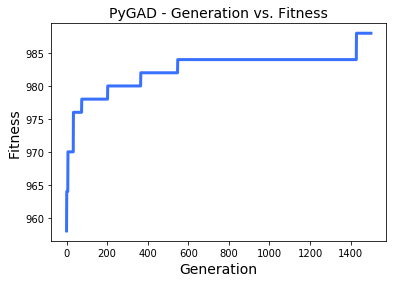

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 6 7 1 3 3 4 6 7 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 3 2 6 8 6 7 6 3]


 round:  103
elapsed time:  270.352089881897
best sol [0.62594605 0.09545159 0.78466459 0.80422734 0.24116597 0.7503019
 0.5663671  0.4678802  0.07220869 0.09545159 0.09545159 0.1302959
 0.30670942 0.42114397 0.31035099 0.12927283 0.7503019  0.46004817
 0.4678802  0.4678802  0.07220869 0.7503019  0.1794515  0.12927283
 0.4678802  0.18419882 0.74431042 0.7287063  0.83572836 0.94438559
 0.94438559 0.42114397 0.50668859 0.05772121 0.7287063 ]
fitness:  14.0


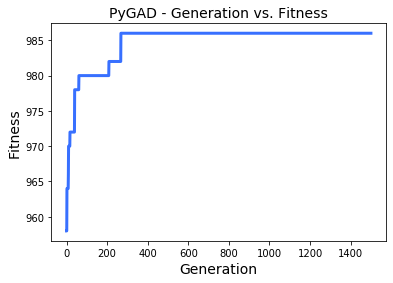

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 4 7 3 5 4 4 5 7 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 3 3 5 6 6 8 7 4]


 round:  104
elapsed time:  270.60315203666687
best sol [0.47623177 0.13105585 0.8897481  0.8897481  0.20416702 0.8897481
 0.65168048 0.33332011 0.15453386 0.23855729 0.14420087 0.10693934
 0.19965158 0.10693934 0.33332011 0.39466586 0.38116246 0.38116246
 0.38116246 0.75954501 0.15453386 0.05508367 0.54286978 0.16237252
 0.68353189 0.85286037 0.92082668 0.9906103  0.42690179 0.92082668
 0.96456802 0.13419757 0.10693934 0.72758143 0.10921082]
fitness:  12.0


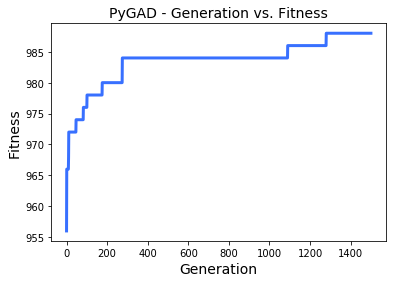

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 8 3 7 3 3 4 6 7 8 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 2 5 6 7 6 8 7 3]


 round:  105
elapsed time:  270.39309906959534
best sol [0.54814824 0.29067544 0.91594916 0.99096847 0.30390449 0.97542354
 0.06786708 0.49384763 0.41726918 0.31396035 0.05466661 0.06786708
 0.05466661 0.6825298  0.33533594 0.28897778 0.30089679 0.34329984
 0.42409271 0.99829507 0.12423061 0.93868318 0.06786708 0.00891688
 0.6825298  0.98306074 0.58930452 0.59911163 0.5783099  0.70076575
 0.39870751 0.11615217 0.06786708 0.05466661 0.26301901]
fitness:  14.0


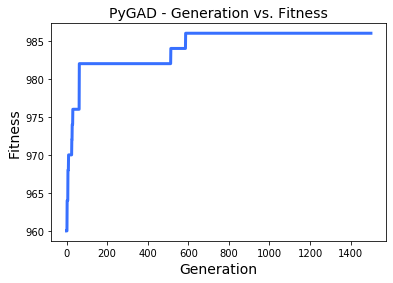

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 8 1 6 4 4 4 7 7 6 6]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 5 2 4 3 8 7 6 7 6 2]


 round:  106
elapsed time:  271.50220489501953
best sol [0.781506   0.27639597 0.70430912 0.95992614 0.26577132 0.97890636
 0.9322856  0.35739357 0.0136586  0.02818946 0.14310138 0.15650491
 0.86269796 0.30107212 0.58231035 0.01691648 0.38698826 0.82699255
 0.56212879 0.53092072 0.0136586  0.85962178 0.22192587 0.15844898
 0.82699255 0.49602608 0.86269796 0.82699255 0.56212879 0.73806069
 0.73256232 0.15844898 0.30107212 0.86269796 0.86269796]
fitness:  16.0


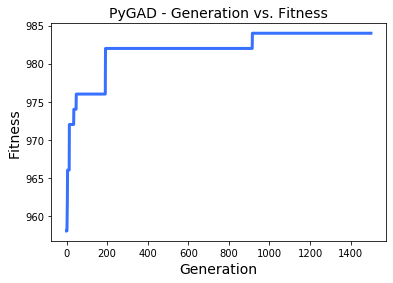

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 8 4 7 3 4 5 7 8 8 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 7 1 6 3 5 7 6 7 7 6]


 round:  107
elapsed time:  270.3505029678345
best sol [0.65449186 0.10879729 0.99164037 0.69245267 0.35601218 0.99164037
 0.82022109 0.43700732 0.03419889 0.07693156 0.18119569 0.18119569
 0.30983353 0.09981575 0.28919369 0.22507617 0.82022109 0.29984573
 0.53005756 0.51309817 0.15239818 0.21416577 0.37070769 0.31595094
 0.96879085 0.27585299 0.96988068 0.95589863 0.50803941 0.35601218
 0.89027096 0.30983353 0.14986863 0.50803941 0.24619286]
fitness:  14.0


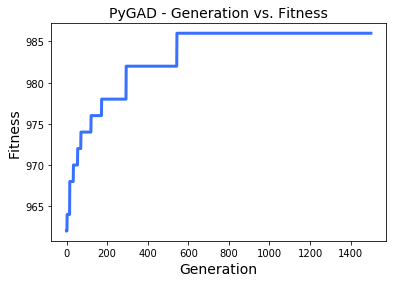

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 7 4 7 4 4 4 5 7 6 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 1 3 6 7 6 7 7 4]


 round:  108
elapsed time:  271.7214689254761
best sol [6.42523445e-01 1.31088115e-01 9.75582159e-01 7.26670489e-01
 8.36737796e-01 5.35487096e-01 6.42818819e-01 3.78200159e-01
 1.49435694e-01 7.63070656e-05 6.44232021e-01 9.31331537e-02
 7.08134009e-01 1.31088115e-01 2.20840398e-01 8.36737796e-01
 2.54086103e-01 2.31242798e-01 4.85976172e-01 5.35487096e-01
 2.31242798e-01 8.18252472e-01 1.90298285e-01 7.63070656e-05
 8.36737796e-01 6.53844300e-01 9.57983948e-01 7.85237695e-01
 5.69716978e-01 8.18252472e-01 8.36737796e-01 6.35818485e-02
 9.57983948e-01 1.25420709e-01 7.44834293e-01]
fitness:  16.0


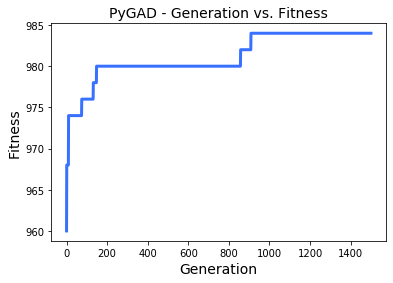

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 4 7 5 6 5 7 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [8 7 6 2 4 6 6 8 6 7 7 3]


 round:  109
elapsed time:  271.2180299758911
best sol [0.82775531 0.15976206 0.96800172 0.99887476 0.16023853 0.29237427
 0.07815307 0.39199225 0.13383706 0.07815307 0.07815307 0.29237427
 0.1826467  0.42136514 0.26803541 0.3522323  0.39199225 0.79522739
 0.60002562 0.76327771 0.24336905 0.79522739 0.60049101 0.45995663
 0.26803541 0.61444493 0.77870601 0.45995663 0.13109075 0.45995663
 0.79522739 0.17233204 0.00340182 0.79522739 0.17233204]
fitness:  14.0


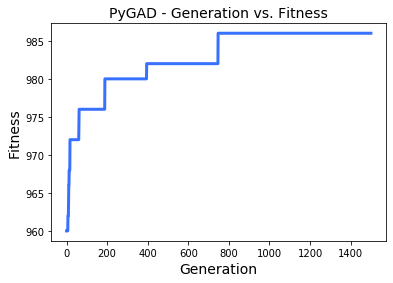

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 5 1 5 5 5 5 7 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 5 1 4 4 6 5 6 7 7 3]


 round:  110
elapsed time:  271.0895519256592
best sol [0.80101433 0.13858065 0.97844352 0.8389589  0.13142691 0.38621993
 0.8389589  0.31719965 0.04822148 0.1147603  0.07054427 0.20679815
 0.23974895 0.33259359 0.07054427 0.32938166 0.74656441 0.07485073
 0.74656441 0.8844974  0.47729741 0.68568675 0.61876748 0.31719965
 0.67791216 0.10655799 0.8844974  0.94235444 0.4353162  0.81920995
 0.81920995 0.10655799 0.01703883 0.4353162  0.75982642]
fitness:  18.0


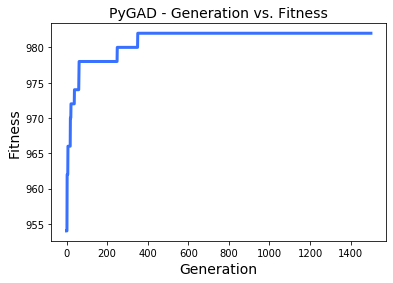

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 6 7 4 7 4 5 5 6 6 5 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 3 3 6 8 8 8 7 3]


 round:  111
elapsed time:  271.6883668899536
best sol [0.72362802 0.20020223 0.92850566 0.68642235 0.17357028 0.62255461
 0.81674026 0.43983352 0.2023084  0.0812164  0.14480283 0.53738629
 0.58265091 0.07275687 0.2023084  0.13459205 0.91153033 0.2023084
 0.44066662 0.62255461 0.21387862 0.81674026 0.43225521 0.07275687
 0.91153033 0.52039101 0.9916137  0.60026129 0.53738629 0.62255461
 0.95377127 0.02206088 0.52292882 0.39388945 0.67455   ]
fitness:  16.0


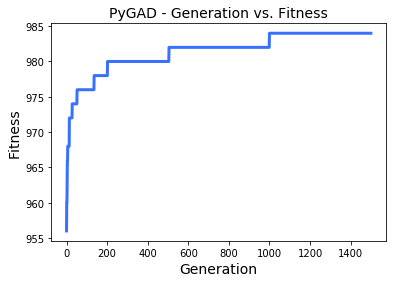

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 2 5 4 4 6 7 6 6 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 3 2 2 6 7 8 7 7 3]


 round:  112
elapsed time:  269.8688659667969
best sol [0.65106742 0.09915182 0.90704963 0.88259795 0.35154819 0.47514615
 0.57802003 0.47514615 0.11842895 0.71307048 0.05475203 0.47514615
 0.86717739 0.07813487 0.01314094 0.07813487 0.58819717 0.22844055
 0.68801745 0.63307954 0.05392753 0.47514615 0.62597564 0.11842895
 0.68471002 0.38221498 0.58819717 0.88530868 0.41221831 0.68471002
 0.88530868 0.07813487 0.05475203 0.90704963 0.14570266]
fitness:  14.0


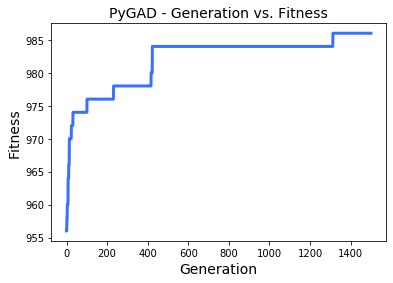

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 3 6 4 3 4 7 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 7 4 4 2 5 5 6 7 7 3]


 round:  113
elapsed time:  269.51715993881226
best sol [0.71933893 0.25800044 0.8325964  0.7551841  0.2516074  0.8325964
 0.18003228 0.35025103 0.2516074  0.25023784 0.05006914 0.24144994
 0.2516074  0.25023784 0.19179837 0.18003228 0.80807001 0.72949182
 0.59978635 0.52291235 0.89493376 0.25023784 0.02410835 0.05006914
 0.4002079  0.80807001 0.89766492 0.72949182 0.53467574 0.87299797
 0.89493376 0.19990283 0.02410835 0.69725973 0.00744018]
fitness:  14.0


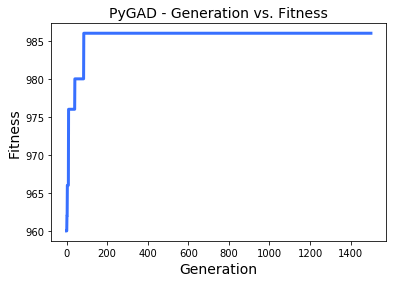

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 8 2 7 4 3 3 6 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 5 3 3 3 6 5 7 7 7 3]


 round:  114
elapsed time:  270.28626799583435
best sol [0.8334449  0.18315015 0.94750265 0.82962722 0.05522091 0.7756879
 0.04319038 0.45907865 0.07952424 0.27358623 0.0683163  0.07711086
 0.3285505  0.3285505  0.4675326  0.0683163  0.78799902 0.79466203
 0.85909154 0.31454473 0.13202963 0.62296801 0.64922077 0.22070979
 0.47046814 0.47046814 0.93398609 0.63501484 0.7756879  0.31454473
 0.84989838 0.1757561  0.22070979 0.30019472 0.4675326 ]
fitness:  14.0


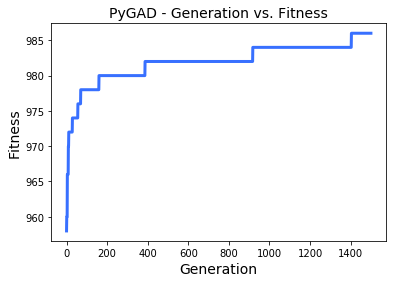

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 1 5 2 3 5 5 6 7 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 5 1 4 3 4 6 6 7 7 3]


 round:  115
elapsed time:  270.8394229412079
best sol [0.83303382 0.06022246 0.803768   0.96686856 0.18285162 0.25646465
 0.91935787 0.39049593 0.07903529 0.39049593 0.06542356 0.27882978
 0.19400411 0.37735816 0.17691711 0.06542356 0.47890704 0.78789227
 0.87340454 0.52210229 0.57209237 0.95171565 0.70786617 0.39049593
 0.46711965 0.49235225 0.97481728 0.50321691 0.39049593 0.72634731
 0.70786617 0.05618542 0.18660711 0.97481728 0.18660711]
fitness:  14.0


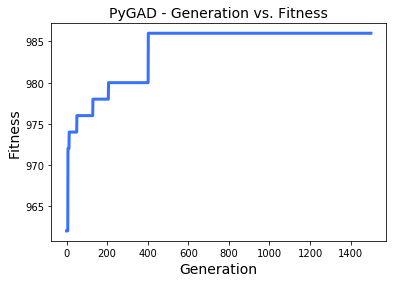

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 6 7 2 5 3 4 5 7 8 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [5 7 7 3 4 3 5 7 7 8 6 3]


 round:  116
elapsed time:  270.2224380970001
best sol [0.82263167 0.23678212 0.95263701 0.94491804 0.1268764  0.76639631
 0.12292284 0.17664549 0.15239178 0.02713444 0.14133212 0.15239178
 0.28256591 0.4863711  0.70769961 0.12292284 0.33839441 0.17664549
 0.73207011 0.64802374 0.16890793 0.30461684 0.31521872 0.08701705
 0.48165388 0.17664549 0.94167902 0.92188372 0.3777996  0.93934272
 0.58862312 0.16890793 0.27215856 0.33388865 0.14422552]
fitness:  12.0


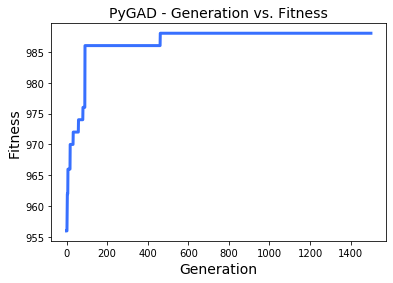

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 3 6 4 4 3 7 7 5 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 6 6 1 3 4 6 7 6 7 6 3]


 round:  117
elapsed time:  271.47379899024963
best sol [0.79320441 0.21172335 0.73185182 0.84484089 0.15990826 0.71618766
 0.89340321 0.3888914  0.18567357 0.37126879 0.15990826 0.49685687
 0.34558476 0.58349807 0.37126879 0.1596956  0.47310516 0.73634414
 0.49685687 0.34558476 0.9605966  0.18567357 0.25076106 0.1596956
 0.49685687 0.71618766 0.18567357 0.92630651 0.3888914  0.71618766
 0.89340321 0.14142503 0.47310516 0.73634414 0.09433284]
fitness:  16.0


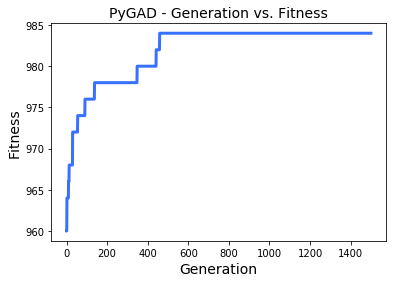

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 3 8 3 7 3 3 4 7 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 3 5 3 3 6 5 7 7 4]


 round:  118
elapsed time:  272.2856659889221
best sol [0.69851983 0.16545143 0.80212196 0.96248331 0.31098695 0.95704736
 0.01280943 0.46569733 0.13330352 0.40909123 0.13634715 0.40368274
 0.83538227 0.40368274 0.40909123 0.29199001 0.86749662 0.40368274
 0.20688569 0.39927244 0.15441049 0.02194953 0.31098695 0.35649635
 0.15441049 0.96248331 0.7730997  0.97451203 0.35649635 0.83538227
 0.97451203 0.21200003 0.21200003 0.518915   0.02194953]
fitness:  14.0


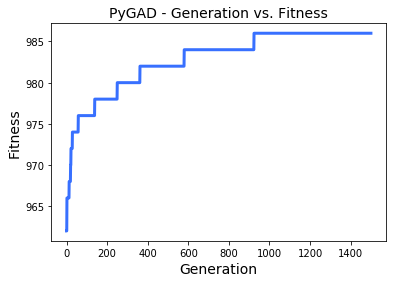

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 2 6 3 4 4 8 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 5 4 5 4 4 6 5 7 7 3]


 round:  119
elapsed time:  271.1823170185089
best sol [0.43679189 0.19485317 0.89798434 0.94060498 0.20424911 0.99469664
 0.62351438 0.49573827 0.18188301 0.23883477 0.10391598 0.16491839
 0.61155275 0.35561979 0.13251097 0.57699352 0.267139   0.38512131
 0.37753268 0.60888579 0.49573827 0.35685557 0.23883477 0.267139
 0.35685557 0.37753268 0.94060498 0.94060498 0.62351438 0.94060498
 0.87163962 0.13251097 0.06109352 0.57699352 0.06109352]
fitness:  14.0


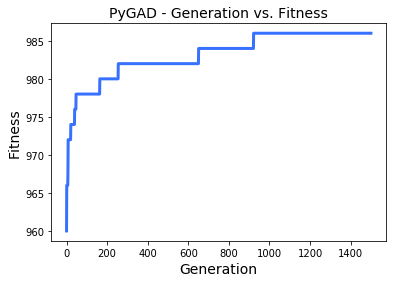

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [5 5 7 4 7 4 5 4 8 7 6 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 4 5 5 7 6 7 7 3]


 round:  120
elapsed time:  270.3394649028778
best sol [0.96073279 0.07277142 0.92026106 0.90669922 0.33924745 0.47543938
 0.40007335 0.46749804 0.10077379 0.27728515 0.14101792 0.45484608
 0.27728515 0.41489621 0.13409795 0.41489621 0.15430545 0.78286199
 0.41489621 0.85462883 0.85031345 0.22025702 0.92272765 0.27728515
 0.27728515 0.47543938 0.8775287  0.50138787 0.15430545 0.18793175
 0.90669922 0.10324982 0.40007335 0.35908006 0.08856947]
fitness:  16.0


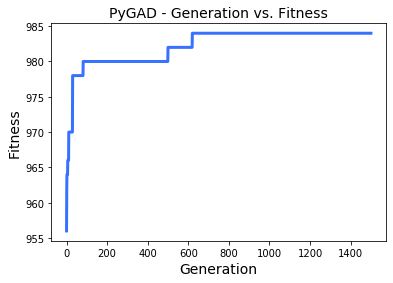

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 6 3 6 4 4 4 6 6 7 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 4 4 4 6 4 6 6 7 3]


 round:  121
elapsed time:  270.0895712375641
best sol [0.679794   0.10218928 0.96941577 0.65997957 0.0756045  0.97346974
 0.679794   0.69872915 0.15672192 0.33797957 0.11930521 0.11930521
 0.24139279 0.32200266 0.36952745 0.08829789 0.39910644 0.81831765
 0.16716491 0.98227521 0.95427912 0.98421941 0.11930521 0.11190039
 0.75409308 0.89552017 0.45025785 0.33797957 0.12207072 0.65997957
 0.65997957 0.2777518  0.11190039 0.21937913 0.40253855]
fitness:  16.0


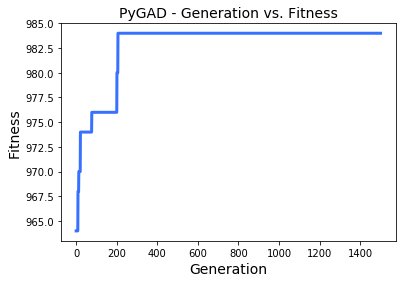

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 7 4 5 4 3 4 7 8 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 7 2 4 3 7 6 7 7 5 3]


 round:  122
elapsed time:  271.6318712234497
best sol [0.79163855 0.07899362 0.90273171 0.94944266 0.26489379 0.7871614
 0.01320286 0.45342502 0.14362601 0.61220398 0.14362601 0.39811959
 0.78542482 0.18703857 0.15334565 0.3032761  0.71503539 0.23795619
 0.65451868 0.77367422 0.18703857 0.18703857 0.23795619 0.15334565
 0.71503539 0.68140659 0.7871614  0.93068968 0.26489379 0.93068968
 0.94944266 0.14362601 0.14362601 0.34306768 0.45342502]
fitness:  12.0


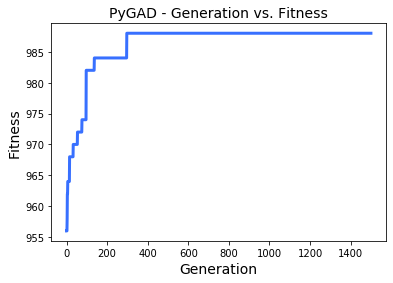

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 5 6 3 7 4 3 3 7 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 4 4 3 6 6 5 7 7 3]


 round:  123
elapsed time:  270.6369171142578
best sol [0.51141536 0.1101769  0.51426603 0.98514218 0.04724166 0.52845577
 0.7136385  0.76502494 0.11349804 0.18122014 0.12138587 0.04631447
 0.0013504  0.82307021 0.04631447 0.09019296 0.51426603 0.82307021
 0.93237466 0.75454685 0.86011174 0.93237466 0.7136385  0.1617072
 0.34701243 0.93237466 0.7143936  0.7198112  0.38583402 0.86011174
 0.86011174 0.19993062 0.18122014 0.60215152 0.0226752 ]
fitness:  16.0


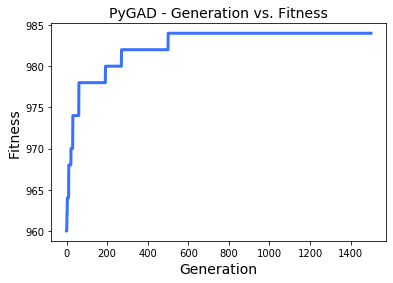

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [9 4 7 4 7 4 4 5 7 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [ 6  7  5  1  6  3  6  7 10  7  7  3]


 round:  124
elapsed time:  268.6880130767822
best sol [0.31775602 0.16586384 0.83174247 0.92668462 0.34760191 0.92668462
 0.59114971 0.31758941 0.08866047 0.19616223 0.08866047 0.23462626
 0.04604469 0.72219391 0.38375167 0.19616223 0.31669839 0.3456177
 0.8746148  0.56530082 0.82574983 0.08866047 0.29681572 0.21099102
 0.53391109 0.71811935 0.92442961 0.97774153 0.53391109 0.92668462
 0.85762158 0.14246366 0.53391109 0.17709691 0.05324821]
fitness:  12.0


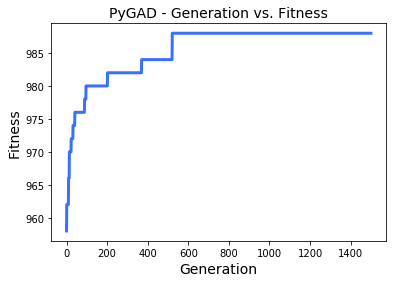

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 7 3 8 4 4 4 6 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 6 2 4 3 5 7 7 8 7 3]


 round:  125
elapsed time:  271.2078011035919
best sol [0.66572965 0.33773616 0.94296202 0.9263068  0.11548715 0.89459324
 0.1422139  0.67796277 0.13703159 0.34481205 0.14391128 0.2968645
 0.69739137 0.01307053 0.67796277 0.14391128 0.9270164  0.2968645
 0.9270164  0.33351113 0.17898808 0.9270164  0.44549577 0.30711046
 0.70324222 0.17898808 0.54276033 0.44549577 0.59940074 0.66572965
 0.69739137 0.24870833 0.0135442  0.54276033 0.01307053]
fitness:  16.0


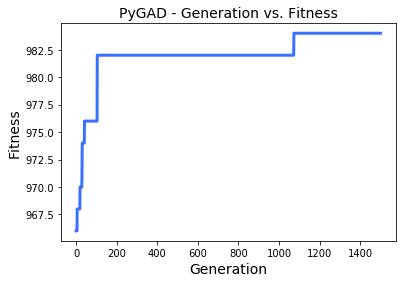

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 3 7 3 6 3 4 5 7 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 6 2 4 4 4 6 6 8 6 3]


 round:  126
elapsed time:  271.1699011325836
best sol [0.7957042  0.17915314 0.90192654 0.91439356 0.19593595 0.7957042
 0.0858741  0.42688018 0.13791614 0.12412025 0.05682131 0.17915314
 0.84118667 0.39729627 0.31168119 0.31168119 0.90192654 0.31168119
 0.46556172 0.31168119 0.31168119 0.31168119 0.49988656 0.13502534
 0.75531612 0.54149939 0.9344708  0.94397476 0.59901472 0.2054946
 0.77221113 0.11801056 0.69106909 0.75531612 0.19593595]
fitness:  10.0


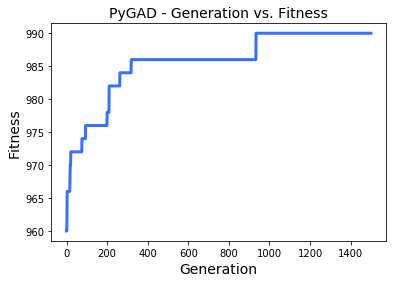

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 6 3 7 3 5 4 6 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 5 3 4 7 7 7 7 4]


 round:  127
elapsed time:  271.09717416763306
best sol [0.85954634 0.04361458 0.93253209 0.93075809 0.03857893 0.80597787
 0.11568069 0.30621589 0.0850458  0.73584243 0.47312442 0.34941732
 0.16401573 0.16401573 0.19533081 0.34941732 0.18013123 0.69851043
 0.27536832 0.98365271 0.02545642 0.92013383 0.19533081 0.23993197
 0.097664   0.97484083 0.52245052 0.69853832 0.69853832 0.63583305
 0.87473298 0.16401573 0.19533081 0.4907982  0.47312442]
fitness:  14.0


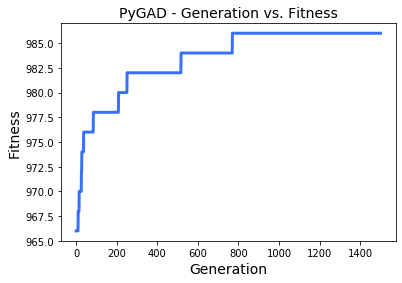

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 8 3 6 4 3 4 7 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [5 6 6 5 4 4 6 7 5 7 7 3]


 round:  128
elapsed time:  270.9212086200714
best sol [0.82067714 0.15305477 0.94353348 0.94462236 0.26608115 0.95160309
 0.15305477 0.43975587 0.15305477 0.26615359 0.15305477 0.1886114
 0.05513182 0.37987507 0.28050876 0.05513182 0.80131191 0.26615359
 0.96405796 0.26615359 0.21864092 0.1886114  0.13903188 0.26615359
 0.66658854 0.26615359 0.96405796 0.99886908 0.43804245 0.87042602
 0.96840289 0.26615359 0.43975587 0.1886114  0.05513182]
fitness:  12.0


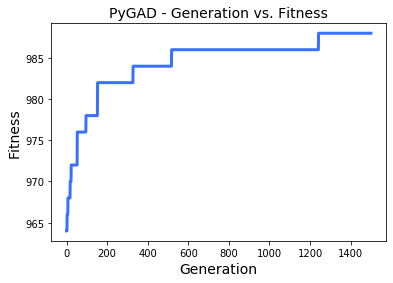

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 5 6 1 6 2 4 4 7 7 7 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 3 2 4 7 5 8 7 3]


 round:  129
elapsed time:  271.8431348800659
best sol [0.83626046 0.08968008 0.72064756 0.89027398 0.10376126 0.45372089
 0.90523271 0.61914092 0.07790319 0.06918809 0.09731125 0.46215561
 0.19458665 0.73385516 0.44479468 0.21145019 0.38411255 0.61914092
 0.38411255 0.64882017 0.13400342 0.45372089 0.21021867 0.09731125
 0.96417328 0.71617811 0.37458902 0.96417328 0.45443825 0.64966306
 0.76882081 0.19458665 0.19458665 0.73385516 0.15584377]
fitness:  12.0


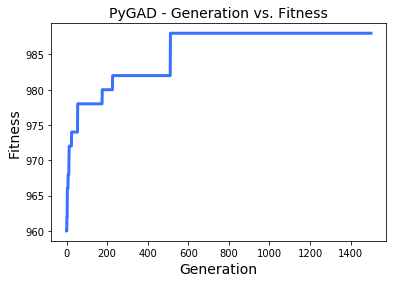

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 3 7 4 7 4 4 4 7 7 8 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 7 2 5 3 6 6 6 7 7 3]


 round:  130
elapsed time:  270.53231596946716
best sol [0.4220986  0.17888997 0.84043023 0.96382298 0.01909631 0.95378827
 0.84043023 0.54697377 0.03622544 0.02775199 0.12968018 0.25890707
 0.12968018 0.49235017 0.12968018 0.17888997 0.87658675 0.49235017
 0.89233026 0.54697377 0.18335768 0.80109184 0.89233026 0.17888997
 0.54697377 0.4220986  0.84043023 0.95378827 0.45345777 0.8877368
 0.17888997 0.12968018 0.49235017 0.1505507  0.72609267]
fitness:  12.0


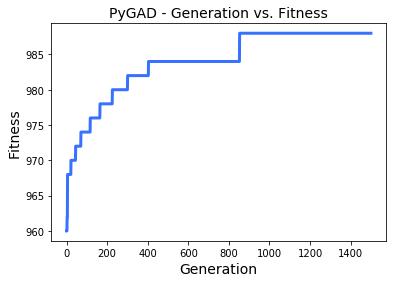

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 6 3 7 4 4 4 7 6 6 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 4 3 6 8 7 8 5 3]


 round:  131
elapsed time:  271.0275399684906
best sol [0.86160697 0.16973698 0.90377614 0.66579843 0.33627131 0.78155482
 0.02595496 0.33627131 0.08691557 0.08691557 0.79831745 0.19389629
 0.79831745 0.29625584 0.40318774 0.08691557 0.65705223 0.38188982
 0.56547397 0.31143027 0.07008404 0.78155482 0.60807404 0.06932526
 0.76353196 0.57077131 0.87930599 0.66579843 0.51015202 0.21389827
 0.65705223 0.28240891 0.2507487  0.43278976 0.03362231]
fitness:  14.0


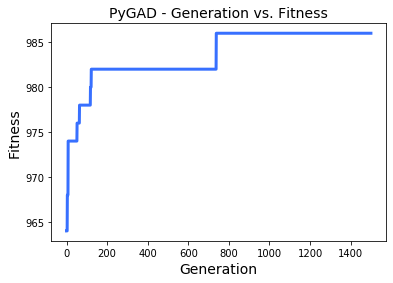

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 6 2 7 3 4 4 5 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 5 3 4 3 3 7 7 6 6 3]


 round:  132
elapsed time:  270.45223593711853
best sol [0.84503787 0.0575925  0.8999288  0.94503184 0.45463855 0.94503184
 0.24971071 0.38572448 0.20442198 0.91414456 0.0465576  0.01511044
 0.36255449 0.36255449 0.38572448 0.02266431 0.41302555 0.42566561
 0.45463855 0.55341249 0.93485361 0.32496134 0.17180154 0.27998953
 0.22680261 0.93485361 0.02266431 0.71085644 0.38572448 0.84503787
 0.41302555 0.26261333 0.17180154 0.71085644 0.03093981]
fitness:  16.0


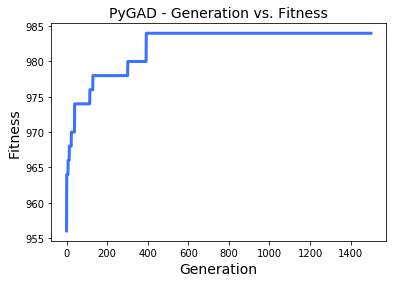

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 3 7 2 7 3 4 4 7 6 5 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 4 3 5 4 7 7 5 3]


 round:  133
elapsed time:  270.4172067642212
best sol [0.2923284  0.10743857 0.83247417 0.7015233  0.27082863 0.88700629
 0.83763928 0.41169018 0.11112399 0.10743857 0.52319775 0.09298834
 0.20681413 0.59410897 0.13308126 0.11823529 0.38298996 0.40020525
 0.7015233  0.88700629 0.17439562 0.38298996 0.11823529 0.20681413
 0.63281738 0.2549387  0.56542819 0.66277679 0.51047121 0.94091815
 0.83247417 0.1135488  0.16024456 0.20681413 0.56542819]
fitness:  16.0


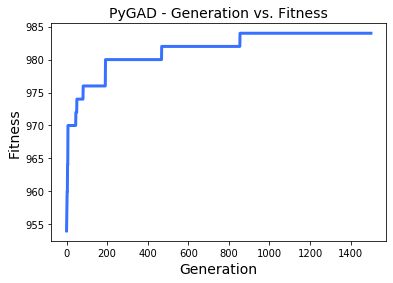

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [5 4 7 3 7 4 3 4 6 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 6 2 4 3 7 4 5 7 7 3]


 round:  134
elapsed time:  269.89095091819763
best sol [0.64800989 0.20246696 0.87064563 0.86142512 0.09796217 0.13549991
 0.86142512 0.86339188 0.09796217 0.04938333 0.09655917 0.09796217
 0.11663199 0.86142512 0.09796217 0.09796217 0.4217439  0.87064563
 0.86339188 0.86339188 0.09796217 0.82062227 0.78414043 0.09655917
 0.19897426 0.19897426 0.86142512 0.65922362 0.57257685 0.68376433
 0.83601809 0.18874987 0.09796217 0.81764856 0.0352546 ]
fitness:  14.0


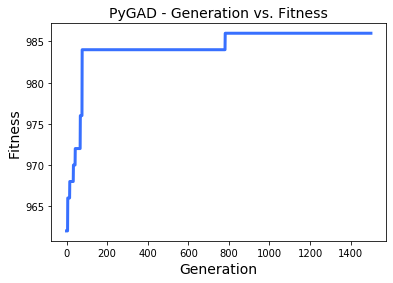

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 3 6 4 4 5 7 4 6 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 0 5 3 7 6 6 7 7 3]


 round:  135
elapsed time:  269.4157748222351
best sol [0.76474847 0.00782004 0.9165681  0.96787548 0.40984908 0.59583638
 0.17936056 0.30344548 0.09138567 0.25254202 0.16321221 0.46227078
 0.23556466 0.24067475 0.40984908 0.23103651 0.38598691 0.24067475
 0.22610687 0.78832787 0.22857402 0.22923895 0.22610687 0.00782004
 0.78628044 0.85585584 0.89719469 0.96349376 0.39045451 0.9938267
 0.9332425  0.22923895 0.54702114 0.23882117 0.08128343]
fitness:  12.0


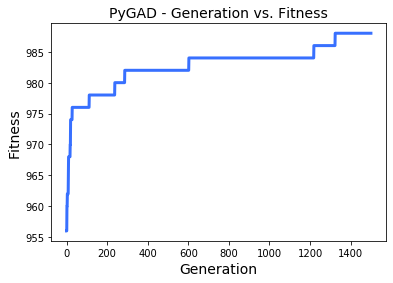

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 8 3 7 4 4 3 7 6 7 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 3 2 3 6 7 6 7 7 3]


 round:  136
elapsed time:  273.49223613739014
best sol [0.85887074 0.25889672 0.95876837 0.89271018 0.25945881 0.39190442
 0.16335673 0.70427764 0.08521095 0.17259437 0.02123269 0.26390948
 0.16335673 0.60711576 0.30642042 0.33441433 0.38173403 0.35040844
 0.59076279 0.70427764 0.02099843 0.38173403 0.61448643 0.22661449
 0.93221974 0.47512849 0.98086905 0.87278753 0.61448643 0.59076279
 0.8335711  0.13667194 0.17259437 0.76348406 0.17259437]
fitness:  14.0


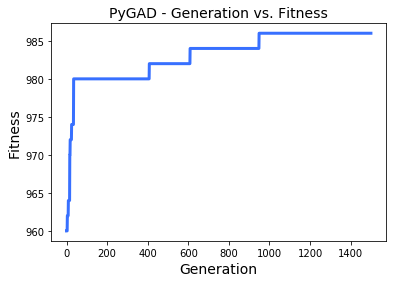

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 9 3 6 4 4 4 7 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 9 5 2 4 3 6 6 7 7 7 3]


 round:  137
elapsed time:  271.91372179985046
best sol [0.77139078 0.16598596 0.74201517 0.62646706 0.18810355 0.27216289
 0.98725453 0.37893061 0.10022786 0.34224541 0.1077504  0.26702225
 0.35630419 0.7762344  0.1361141  0.26702225 0.35646846 0.5190765
 0.7762344  0.7762344  0.05517071 0.5190765  0.60639603 0.20663109
 0.90846524 0.66602507 0.5190765  0.8796068  0.61970983 0.69956414
 0.89132717 0.13516454 0.17673788 0.65452497 0.14482105]
fitness:  16.0


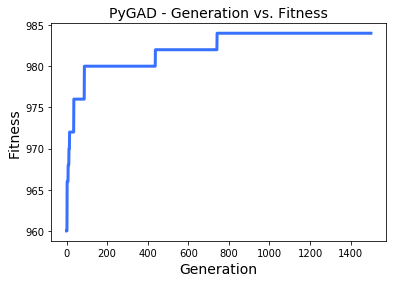

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 4 7 3 6 4 5 5 6 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 5 4 6 5 7 8 7 3]


 round:  138
elapsed time:  270.97293996810913
best sol [0.88753463 0.11222947 0.70485238 0.43507537 0.12751155 0.48711734
 0.96876181 0.88619189 0.14981771 0.00309506 0.44177343 0.06998523
 0.18158021 0.52477255 0.14981771 0.7545844  0.50440397 0.15833538
 0.39430004 0.50440397 0.16084643 0.15833538 0.30046276 0.20609131
 0.90979532 0.30046276 0.96876181 0.97981165 0.52477255 0.50440397
 0.77476386 0.25869749 0.41865851 0.09869841 0.71749738]
fitness:  14.0


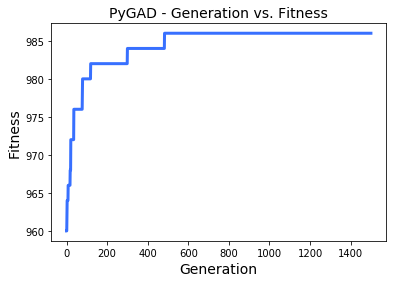

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 6 7 4 7 4 4 4 6 7 5 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 8 6 2 4 5 5 7 6 7 7 3]


 round:  139
elapsed time:  271.4790840148926
best sol [0.84122957 0.10049181 0.94723178 0.67102602 0.13020152 0.70087277
 0.56253303 0.30002019 0.12703925 0.12621135 0.12703925 0.13020152
 0.28273114 0.40188559 0.62866125 0.03930383 0.12621135 0.8256002
 0.62866125 0.84122957 0.13020152 0.7054187  0.12703925 0.29691569
 0.70087277 0.44228247 0.89673458 0.97854602 0.48900878 0.96195792
 0.41557256 0.28890594 0.41557256 0.13020152 0.12621135]
fitness:  14.0


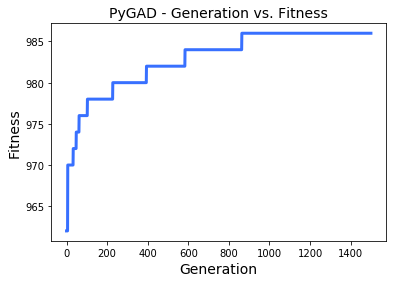

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 9 4 7 3 4 4 7 6 7 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 4 4 6 8 7 8 6 2]


 round:  140
elapsed time:  270.1653070449829
best sol [0.81198633 0.2336214  0.80046049 0.96436228 0.27438732 0.98204572
 0.33615105 0.48859153 0.14573845 0.11928974 0.14444874 0.14573845
 0.27489998 0.58243078 0.24417866 0.34964015 0.52406821 0.14573845
 0.55021752 0.69334749 0.55398956 0.00952404 0.32187498 0.16256836
 0.81198633 0.41754723 0.81198633 0.98519665 0.57954643 0.54764078
 0.98519665 0.0549198  0.48859153 0.54764078 0.63592026]
fitness:  12.0


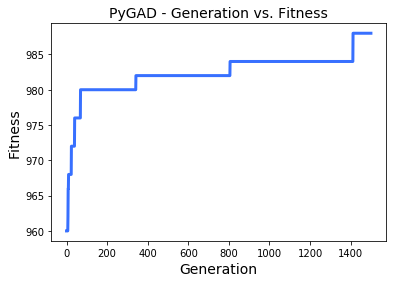

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 4 7 4 6 3 4 4 6 7 7 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 6 1 4 3 6 6 5 7 7 4]


 round:  141
elapsed time:  271.15217995643616
best sol [0.7363904  0.0110592  0.79487316 0.89273858 0.53386392 0.3567985
 0.89273858 0.3567985  0.07030443 0.10413937 0.10413937 0.07030443
 0.56375314 0.56375314 0.6893656  0.0110592  0.53386392 0.28439075
 0.68435087 0.50577134 0.0110592  0.40339337 0.13351684 0.40164766
 0.6893656  0.3567985  0.92485251 0.92121489 0.36032307 0.91188421
 0.81881457 0.28195298 0.69056806 0.04378107 0.35583156]
fitness:  12.0


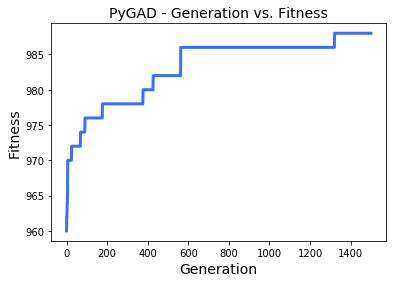

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 4 6 3 5 4 6 5 7 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 0 5 3 5 7 6 7 7 3]


 round:  142
elapsed time:  271.2069396972656
best sol [0.68085317 0.11718415 0.76748855 0.42202563 0.11718415 0.93064469
 0.61762789 0.46723105 0.10930352 0.16208791 0.13674906 0.10930352
 0.47829153 0.42202563 0.10930352 0.42202563 0.93064469 0.71449523
 0.42202563 0.76748855 0.47829153 0.47423917 0.16208791 0.16208791
 0.73051596 0.76920183 0.99086046 0.99086046 0.46524911 0.47423917
 0.80702755 0.29357914 0.04574869 0.66484081 0.04061132]
fitness:  16.0


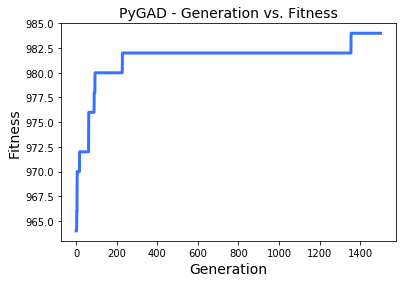

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 5 7 4 4 5 5 7 7 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 5 6 2 5 4 7 7 7 7 7 3]


 round:  143
elapsed time:  271.86693811416626
best sol [0.79497633 0.07096699 0.884961   0.70126132 0.11807357 0.96314519
 0.85057102 0.5513282  0.13330952 0.07096699 0.12217418 0.31577653
 0.34578224 0.34761304 0.63544534 0.2001996  0.60855737 0.5513282
 0.5513282  0.72765928 0.13330952 0.85057102 0.58212958 0.41664547
 0.36458601 0.52397158 0.85773339 0.66982044 0.43765423 0.2001996
 0.5513282  0.13083732 0.14275898 0.66982044 0.12425941]
fitness:  16.0


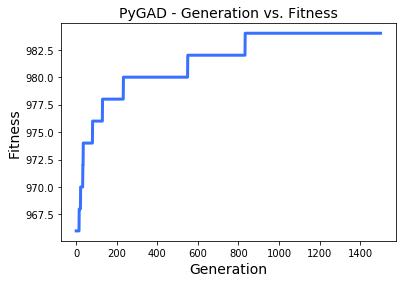

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 7 4 6 4 4 4 7 7 4 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [5 7 7 2 3 4 6 6 6 7 6 3]


 round:  144
elapsed time:  270.46938395500183
best sol [0.86796015 0.09826978 0.7279953  0.87548592 0.16190534 0.98441458
 0.31527101 0.5070326  0.20299103 0.09397755 0.08987644 0.4572994
 0.183655   0.4852396  0.35485291 0.35485291 0.78198231 0.75492193
 0.42774915 0.36743895 0.24877194 0.18041632 0.20299103 0.36743895
 0.23131316 0.5070326  0.98157899 0.98132603 0.35485291 0.51672221
 0.98441458 0.14597306 0.20299103 0.51672221 0.18041632]
fitness:  14.0


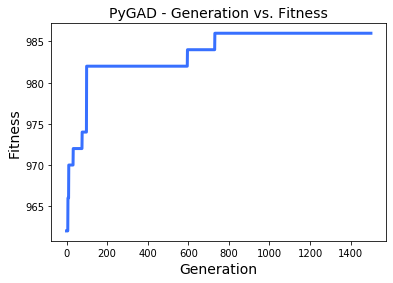

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 6 3 5 4 4 4 7 7 7 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 8 6 2 4 4 5 7 3 7 7 3]


 round:  145
elapsed time:  271.4958710670471
best sol [0.56741012 0.10156216 0.96030726 0.84106419 0.12725678 0.94561268
 0.84106419 0.16939959 0.0240792  0.14814525 0.0240792  0.08820963
 0.34961979 0.34961979 0.14814525 0.33789578 0.94561268 0.49611125
 0.88010738 0.54002573 0.6208597  0.04093078 0.51824218 0.14814525
 0.81867891 0.23564988 0.81867891 0.99379933 0.49611125 0.92724156
 0.88010738 0.23121882 0.54002573 0.12725678 0.6208597 ]
fitness:  8.0


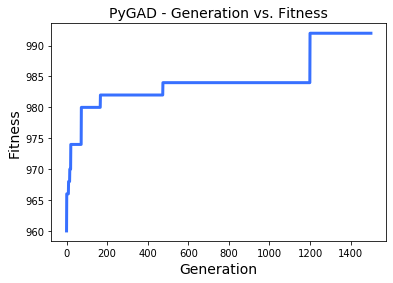

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 3 6 3 4 3 7 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 6 1 4 4 6 6 6 7 7 3]


 round:  146
elapsed time:  268.3680157661438
best sol [0.77089388 0.25282674 0.92776092 0.74846729 0.20145512 0.98660938
 0.09772879 0.0477428  0.06087906 0.11312094 0.41318864 0.25282674
 0.6643051  0.0477428  0.26082105 0.08003026 0.41318864 0.66902609
 0.64376308 0.64376308 0.23376519 0.63699879 0.22588249 0.23376519
 0.9257035  0.47395557 0.98660938 0.93504464 0.55502677 0.86939723
 0.32533688 0.11845629 0.41318864 0.09772879 0.8804773 ]
fitness:  16.0


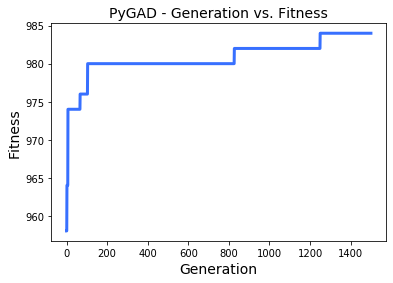

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 4 6 4 4 4 6 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 6 3 2 4 4 6 8 8 7 7 3]


 round:  147
elapsed time:  271.4834508895874
best sol [0.38749035 0.09901885 0.93690499 0.87804871 0.33143645 0.87804871
 0.33143645 0.35507178 0.2455211  0.83328451 0.07724554 0.07724554
 0.2455211  0.2455211  0.33143645 0.34606461 0.87816668 0.21560328
 0.87816668 0.07724554 0.34606461 0.09609794 0.1443437  0.49189183
 0.99565679 0.49189183 0.2455211  0.59713148 0.35866501 0.99565679
 0.87816668 0.21560328 0.2455211  0.65085758 0.24569284]
fitness:  14.0


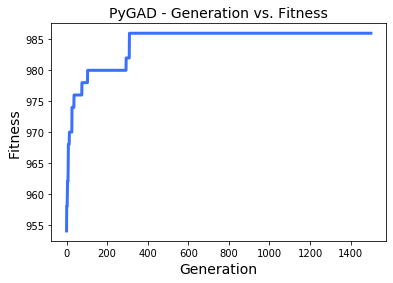

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 7 2 4 3 4 4 7 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 3 4 4 4 3 6 7 7 3]


 round:  148
elapsed time:  272.2674648761749
best sol [0.80260311 0.1185142  0.96566973 0.97668024 0.29253448 0.79128057
 0.54091015 0.44280666 0.18323359 0.10974824 0.07394528 0.0357579
 0.48645891 0.34714971 0.7673194  0.20889316 0.76739213 0.39222024
 0.44280666 0.73936613 0.04948328 0.97973438 0.23726561 0.17906607
 0.51626439 0.94174411 0.70691824 0.63223004 0.37662276 0.39222024
 0.99137161 0.13919855 0.05119696 0.79128057 0.51626439]
fitness:  16.0


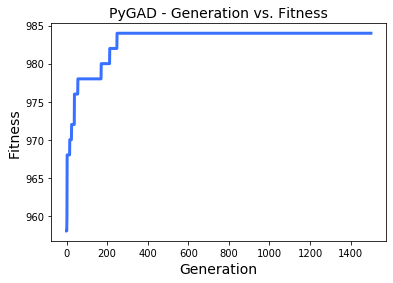

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 4 7 4 6 4 3 6 7 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 8 0 4 4 7 7 6 7 7 4]


 round:  149
elapsed time:  270.6179208755493
best sol [0.53144192 0.13874204 0.83903306 0.9646995  0.23421126 0.90160247
 0.66547043 0.39772333 0.19417797 0.15263166 0.13207229 0.49706398
 0.17563949 0.49241053 0.14963655 0.26134548 0.90284047 0.13207229
 0.99079995 0.54446315 0.8838131  0.06469681 0.18187862 0.13207229
 0.86832312 0.49958831 0.44004081 0.95527319 0.18160217 0.87649388
 0.95527319 0.23421126 0.05058677 0.39772333 0.46760496]
fitness:  10.0


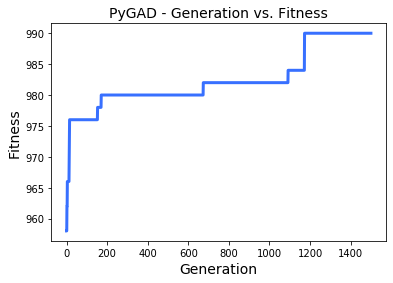

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 3 7 3 7 3 3 4 7 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 3 4 3 6 6 5 6 7 3]


 round:  150
elapsed time:  271.61015820503235
best sol [0.70785583 0.00856183 0.92788812 0.76759537 0.76677005 0.76759537
 0.2777212  0.39782826 0.21416903 0.66504234 0.15425367 0.04958844
 0.28737106 0.39782826 0.40050974 0.04958844 0.15425367 0.38368511
 0.67215546 0.66504234 0.14654176 0.95917966 0.40050974 0.65771064
 0.50299266 0.39782826 0.95917966 0.67215546 0.61366587 0.40050974
 0.95917966 0.16670103 0.18925732 0.00804813 0.28737106]
fitness:  16.0


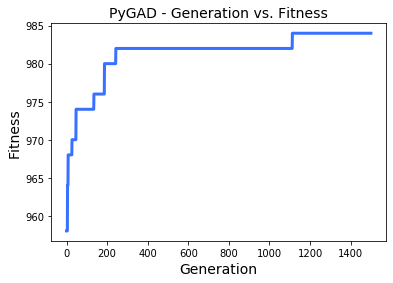

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 6 7 2 6 5 4 5 6 7 6 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 6 2 4 3 5 8 6 8 8 2]


 round:  151
elapsed time:  271.7517831325531
best sol [0.74727216 0.3128248  0.98271098 0.10144211 0.16959461 0.49318912
 0.84926816 0.63188324 0.01361668 0.02213133 0.73963401 0.22633191
 0.10427939 0.89081623 0.13393292 0.34777468 0.36533279 0.54350589
 0.32749968 0.84926816 0.01361668 0.92353354 0.54350589 0.18409925
 0.84926816 0.73963401 0.74570847 0.66468979 0.42199311 0.17756688
 0.98209431 0.18409925 0.14668394 0.24056932 0.54350589]
fitness:  16.0


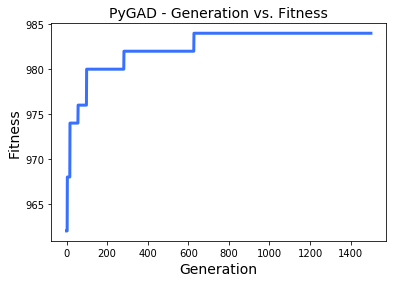

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 7 4 7 4 5 6 6 7 6 2]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 6 3 4 3 6 7 7 7 7 3]


 round:  152
elapsed time:  271.24191308021545
best sol [0.84704396 0.21182164 0.98767161 0.78315846 0.02776288 0.26762355
 0.49612927 0.54693858 0.17668611 0.17668611 0.15054019 0.82446255
 0.82446255 0.13461131 0.17668611 0.04761261 0.78315846 0.15054019
 0.84441689 0.5646047  0.82446255 0.29317612 0.21182164 0.04761261
 0.82446255 0.26762355 0.99826785 0.33835481 0.8014951  0.63367635
 0.82446255 0.00974517 0.03062429 0.56596208 0.60626938]
fitness:  16.0


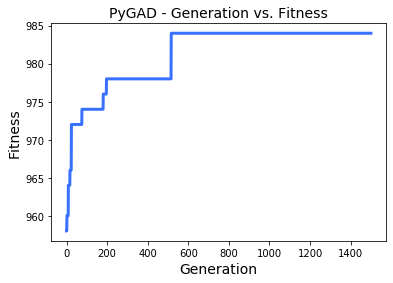

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 5 5 7 3 3 4 7 6 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 4 4 2 6 4 6 7 7 3]


 round:  153
elapsed time:  271.1337580680847
best sol [0.81833615 0.20605474 0.82284209 0.87736355 0.08821419 0.77361165
 0.03066708 0.61324874 0.49910771 0.06006574 0.2796246  0.2796246
 0.1261607  0.38410045 0.17635896 0.46401351 0.87217504 0.36339223
 0.50869494 0.77490013 0.08821419 0.66287205 0.02788911 0.03066708
 0.78571596 0.82284209 0.90969616 0.90857797 0.40559829 0.65336982
 0.78571596 0.17635896 0.08821419 0.77361165 0.11026742]
fitness:  14.0


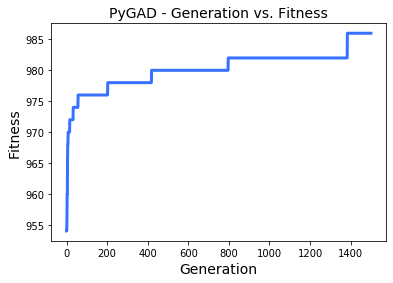

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 6 4 6 4 4 5 6 7 7 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 5 3 4 4 7 7 6 7 7 3]


 round:  154
elapsed time:  271.06663179397583
best sol [0.6992461  0.17943236 0.91859924 0.74832107 0.36778994 0.27860515
 0.68019678 0.64025283 0.1832434  0.13801894 0.14464767 0.07052724
 0.64701177 0.24433347 0.11749201 0.34932099 0.33259489 0.48533916
 0.52810854 0.59195468 0.44451893 0.13700116 0.21820766 0.17943236
 0.91859924 0.27892977 0.91390843 0.99112886 0.52810854 0.52282108
 0.77128626 0.04540532 0.08788006 0.77128626 0.45879564]
fitness:  12.0


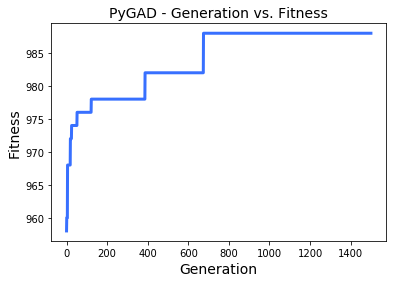

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 7 5 7 4 3 3 6 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 8 6 1 4 3 5 7 6 7 7 3]


 round:  155
elapsed time:  271.12419509887695
best sol [0.76969848 0.33124482 0.79310038 0.09681726 0.21338935 0.03446411
 0.83373125 0.35503891 0.26337204 0.26337204 0.09681726 0.09681726
 0.75508295 0.29105059 0.00196681 0.33124482 0.52246125 0.6011056
 0.52246125 0.77189458 0.09681726 0.958037   0.16314391 0.09681726
 0.83373125 0.79310038 0.68110119 0.20670367 0.56595778 0.7518481
 0.85647178 0.64378683 0.15273905 0.16314391 0.20670367]
fitness:  18.0


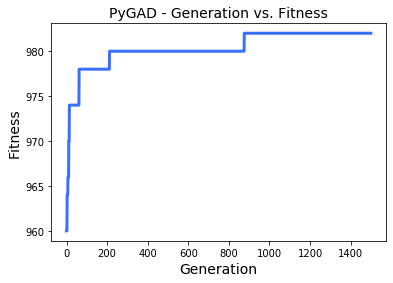

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 6 4 7 4 4 4 5 5 6 2]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 4 6 2 4 3 6 6 5 7 7 3]


 round:  156
elapsed time:  271.1734869480133
best sol [0.79484027 0.13304106 0.97774386 0.98477104 0.28875027 0.92328324
 0.55806117 0.36957587 0.19624575 0.24647905 0.13304106 0.13304106
 0.28875027 0.4782841  0.28875027 0.013286   0.4782841  0.82391292
 0.72723966 0.28875027 0.98477104 0.24647905 0.48112677 0.43237435
 0.4005201  0.43237435 0.98477104 0.49965167 0.22495798 0.49922718
 0.48112677 0.23276643 0.05138677 0.48112677 0.08053104]
fitness:  18.0


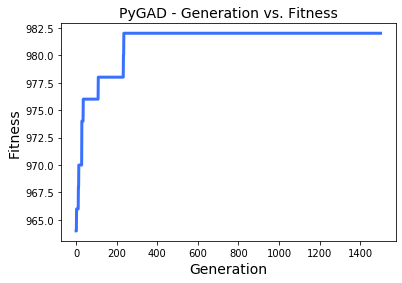

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 2 5 3 3 3 5 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 8 2 4 3 3 4 6 7 6 2]


 round:  157
elapsed time:  269.0583248138428
best sol [0.81684915 0.28265283 0.90582061 0.88150486 0.28265283 0.44277448
 0.68820674 0.457393   0.08774047 0.07223726 0.29799103 0.28265283
 0.22071115 0.61305091 0.07062975 0.01183376 0.61305091 0.52763621
 0.78810044 0.39748367 0.84577007 0.22071115 0.22071115 0.29799103
 0.22071115 0.44516018 0.95144403 0.77174237 0.42741432 0.92259129
 0.76617788 0.17345601 0.48606886 0.28265283 0.11799985]
fitness:  14.0


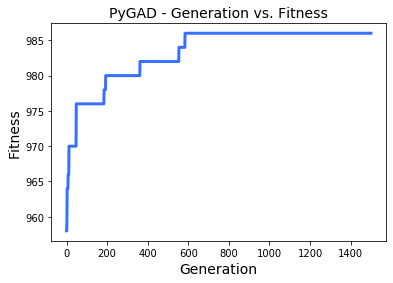

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 4 6 3 4 4 7 6 6 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 7 2 4 2 4 6 6 7 7 3]


 round:  158
elapsed time:  270.1239490509033
best sol [0.74878541 0.26040121 0.94032679 0.94032679 0.14035929 0.26040121
 0.25477672 0.43365488 0.09397483 0.35477104 0.12557353 0.08003076
 0.21270497 0.14885988 0.6621198  0.0310891  0.35753614 0.93522346
 0.49206677 0.74878541 0.21270497 0.98512825 0.25477672 0.05392739
 0.17882042 0.81439214 0.93415317 0.65594981 0.60286081 0.76990165
 0.93510036 0.21000218 0.17882042 0.70587028 0.24691274]
fitness:  12.0


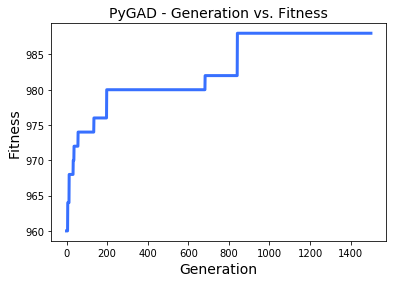

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 8 3 6 3 3 4 7 6 8 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 6 2 3 3 6 8 6 6 7 3]


 round:  159
elapsed time:  270.7965638637543
best sol [0.7933791  0.12507861 0.8222091  0.78044722 0.20180648 0.85101749
 0.94372956 0.32464821 0.02782037 0.11017799 0.12507861 0.17301859
 0.70818965 0.27276531 0.5924204  0.1323619  0.27276531 0.5412836
 0.37728899 0.7276334  0.67024868 0.67024868 0.94372956 0.1323619
 0.37728899 0.73095902 0.27276531 0.94372956 0.1323619  0.70818965
 0.98744299 0.2175328  0.1323619  0.73095902 0.24346653]
fitness:  14.0


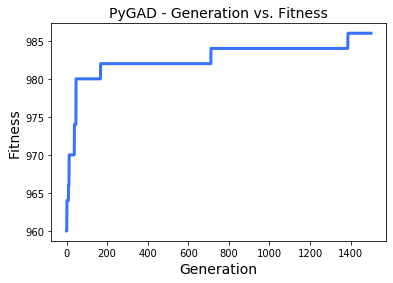

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 3 7 6 7 4 3 5 5 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 4 4 6 7 6 7 7 3]


 round:  160
elapsed time:  271.51543402671814
best sol [0.6767553  0.08029734 0.86914514 0.94708501 0.10618714 0.52624436
 0.33083175 0.52624436 0.2176236  0.39935437 0.10618714 0.21927286
 0.21927286 0.65080138 0.19084141 0.58377384 0.65080138 0.24358604
 0.72629797 0.52514156 0.05736854 0.28500828 0.21927286 0.09005539
 0.7248103  0.65080138 0.72629797 0.96309208 0.16659478 0.65080138
 0.86914514 0.21927286 0.21842176 0.79576223 0.21927286]
fitness:  16.0


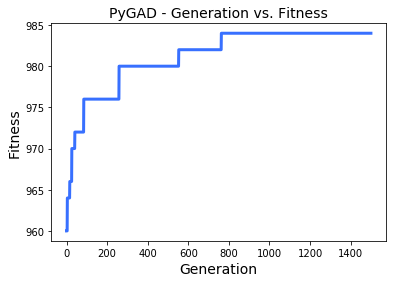

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 5 7 3 6 4 4 4 7 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 5 4 4 6 5 6 5 7 7 3]


 round:  161
elapsed time:  271.33816480636597
best sol [0.63308557 0.08078874 0.96552538 0.47535711 0.01761511 0.47535711
 0.63308557 0.88573446 0.12611467 0.06028999 0.05168995 0.08078874
 0.08078874 0.92756644 0.21034858 0.21031067 0.8413739  0.62775094
 0.67961558 0.26051526 0.26051526 0.21034858 0.28894147 0.13993719
 0.92157942 0.92756644 0.87738548 0.92756644 0.3144817  0.62775094
 0.92756644 0.21034858 0.06028999 0.62775094 0.08440277]
fitness:  14.0


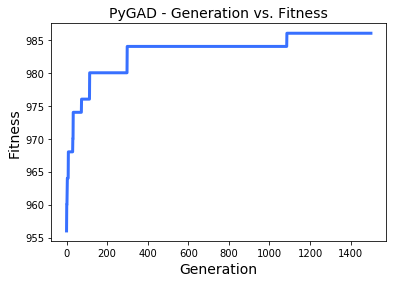

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [9 5 7 4 5 3 4 4 7 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 5 4 4 7 8 7 7 3]


 round:  162
elapsed time:  272.05327320098877
best sol [0.60436003 0.0786049  0.99397042 0.89561573 0.26246501 0.91327201
 0.4289081  0.30356001 0.13849439 0.05080412 0.13849439 0.25286885
 0.37326683 0.37326683 0.23061077 0.05080412 0.39060583 0.68107652
 0.42121263 0.81449899 0.41124694 0.91327201 0.41124694 0.41124694
 0.85924321 0.37326683 0.62780791 0.85924321 0.22404406 0.51067571
 0.41124694 0.16799832 0.2507952  0.05366023 0.88654912]
fitness:  16.0


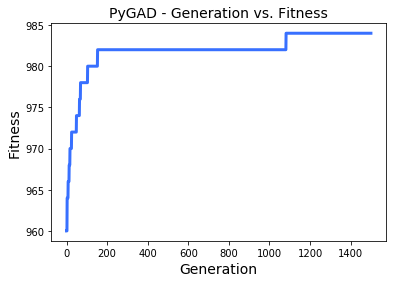

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [5 4 7 4 5 3 5 4 7 7 8 6]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 4 2 7 7 8 7 7 3]


 round:  163
elapsed time:  272.12017011642456
best sol [0.70760155 0.093642   0.93577713 0.88318148 0.11954183 0.9020268
 0.70760155 0.65049128 0.04861188 0.12270993 0.12270993 0.093642
 0.12010277 0.46306773 0.43338342 0.34316047 0.0235063  0.23179236
 0.46306773 0.88318148 0.12270993 0.68848199 0.34316047 0.12270993
 0.43338342 0.65049128 0.9020268  0.97469255 0.25553298 0.56641868
 0.88318148 0.12270993 0.08109759 0.28557403 0.47192378]
fitness:  14.0


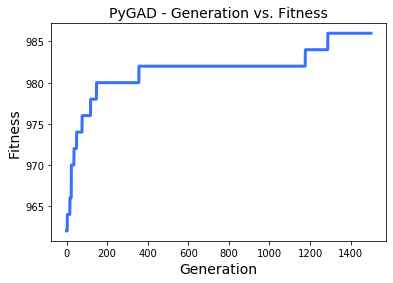

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 4 6 4 3 4 6 6 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 7 0 2 3 6 8 6 7 7 3]


 round:  164
elapsed time:  271.4861841201782
best sol [0.49609586 0.02488911 0.8994216  0.7086165  0.59726615 0.94982446
 0.90611549 0.32722948 0.14128078 0.2251018  0.1194663  0.26871325
 0.12440986 0.32921855 0.12440986 0.12440986 0.37716395 0.64551873
 0.7086165  0.2251018  0.12440986 0.11009799 0.2251018  0.28757568
 0.82446892 0.11009799 0.99608537 0.99642572 0.32722948 0.8994216
 0.6991851  0.11815209 0.10636779 0.7086165  0.07263932]
fitness:  16.0


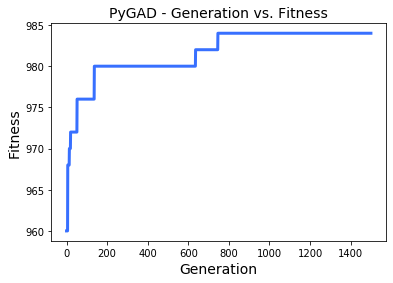

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [5 5 6 2 5 3 3 4 7 7 7 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 3 3 3 7 5 7 5 3]


 round:  165
elapsed time:  273.6501920223236
best sol [8.60296106e-01 2.63220563e-01 9.92932384e-01 9.92932384e-01
 2.63220563e-01 7.34296279e-01 2.13723207e-01 3.13097667e-01
 2.63220563e-01 9.65218807e-02 9.75713253e-02 1.10880513e-02
 2.35291358e-01 3.13097667e-01 6.39215835e-04 6.39215835e-04
 6.12390299e-01 4.36139941e-01 9.64259653e-01 9.55109693e-01
 2.34654364e-01 7.34296279e-01 1.55893344e-01 1.10880513e-02
 4.16031773e-01 1.15353609e-01 6.92653933e-01 8.61514160e-01
 9.92932384e-01 8.25665597e-01 9.92932384e-01 1.34728726e-01
 2.34654364e-01 8.25665597e-01 6.39215835e-04]
fitness:  14.0


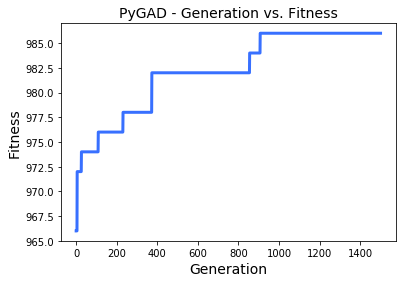

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 5 6 3 3 4 7 5 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 6 1 4 2 8 6 5 7 7 3]


 round:  166
elapsed time:  272.4318709373474
best sol [0.80366005 0.13443912 0.90417418 0.96905318 0.30524727 0.90417418
 0.05249412 0.43488797 0.14905319 0.29523282 0.07946628 0.19838612
 0.33137488 0.47811313 0.38808228 0.13443912 0.31081293 0.87407457
 0.38350917 0.82085977 0.82085977 0.82085977 0.14198224 0.38633504
 0.38808228 0.38350917 0.56578655 0.56578655 0.23343829 0.74918439
 0.90417418 0.19413339 0.22062993 0.14905319 0.73094134]
fitness:  12.0


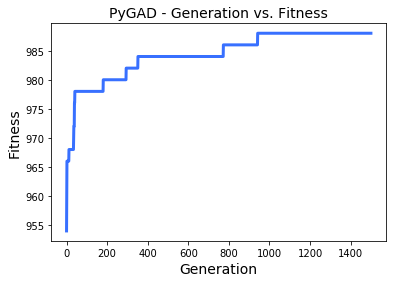

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 3 7 2 6 4 4 4 7 7 8 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 4 3 7 5 6 7 7 2]


 round:  167
elapsed time:  270.67880868911743
best sol [0.45039318 0.07359361 0.95115659 0.90250681 0.3233429  0.99159719
 0.4450552  0.10033514 0.10399401 0.14818333 0.4450552  0.12050786
 0.3233429  0.70605136 0.58823636 0.01342013 0.4450552  0.46118016
 0.45918803 0.67151655 0.02670929 0.25112398 0.25112398 0.12050786
 0.68326401 0.73383851 0.86954129 0.95115659 0.12562336 0.67151655
 0.72689868 0.18807493 0.2469913  0.17085366 0.17872186]
fitness:  16.0


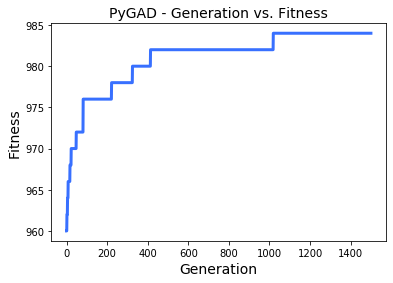

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 4 7 5 5 3 4 4 6 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 6 3 5 3 6 6 6 7 6 2]


 round:  168
elapsed time:  269.70090532302856
best sol [0.37589156 0.00367553 0.96604224 0.69528137 0.24620453 0.96604224
 0.88853901 0.49669301 0.03019445 0.04744708 0.15367232 0.23175135
 0.75198097 0.15367232 0.18758006 0.23175135 0.24620453 0.76159429
 0.66156179 0.59878163 0.15367232 0.79562915 0.62962682 0.10703087
 0.79562915 0.81297443 0.79562915 0.76159429 0.4477689  0.68843315
 0.80492752 0.25296227 0.13011077 0.62962682 0.24620453]
fitness:  16.0


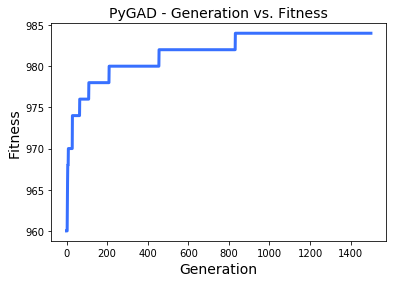

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 7 3 7 4 3 5 7 7 8 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [5 7 6 1 5 5 4 7 7 8 7 3]


 round:  169
elapsed time:  270.75354409217834
best sol [0.84401742 0.12157928 0.91573368 0.99174726 0.35781795 0.95296274
 0.08272156 0.35280504 0.28818616 0.28818616 0.04237905 0.14879407
 0.33016459 0.61110169 0.28818616 0.12466561 0.40862585 0.85437441
 0.40862585 0.26381602 0.26381602 0.8236469  0.04237905 0.33016459
 0.22782547 0.99174726 0.99560045 0.61110169 0.40862585 0.58043887
 0.99560045 0.28848778 0.1325392  0.28848778 0.44605611]
fitness:  14.0


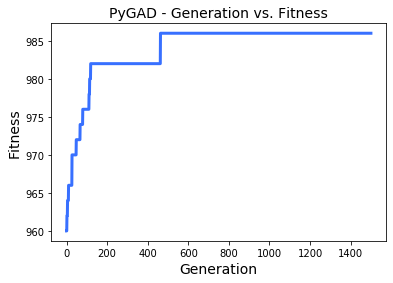

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 5 7 1 5 3 4 6 7 7 7 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 3 5 3 3 7 7 8 7 3]


 round:  170
elapsed time:  271.62504506111145
best sol [0.74642239 0.15428265 0.94709371 0.96958212 0.17585658 0.58038908
 0.32145936 0.43007645 0.15198591 0.17650374 0.12420077 0.12420077
 0.15428265 0.32145936 0.29169824 0.21317932 0.51449832 0.28277123
 0.39872476 0.32145936 0.12705694 0.46870162 0.15198591 0.28277123
 0.58038908 0.96197984 0.97938213 0.98800896 0.44048222 0.45616496
 0.85300779 0.25210124 0.21404585 0.58686727 0.62393873]
fitness:  14.0


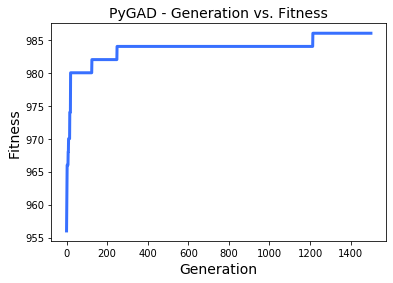

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 5 7 2 6 3 4 4 6 6 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 3 2 3 7 6 8 7 4]


 round:  171
elapsed time:  273.1033229827881
best sol [0.85390002 0.1720777  0.77423516 0.93351301 0.03402942 0.8457522
 0.52825739 0.62780478 0.23002076 0.93225687 0.02813721 0.02813721
 0.03402942 0.52825739 0.30616648 0.02813721 0.3017526  0.59999967
 0.57391373 0.74201287 0.22891743 0.68695962 0.3234444  0.16152478
 0.56666205 0.21541682 0.59999967 0.93351301 0.46202394 0.6731327
 0.94046425 0.26182721 0.22891743 0.76951516 0.23344751]
fitness:  14.0


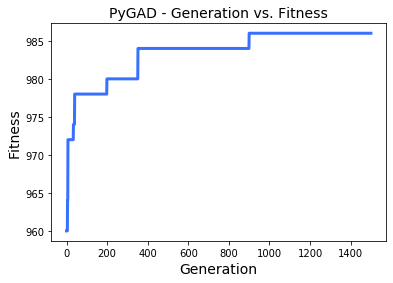

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 6 7 4 7 3 3 5 6 6 7 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 7 3 4 3 6 7 5 7 7 3]


 round:  172
elapsed time:  272.09929299354553
best sol [0.77171604 0.12920205 0.87427231 0.77171604 0.06659845 0.72383877
 0.75430474 0.77171604 0.05293741 0.12920205 0.05620349 0.75430474
 0.41655333 0.20007328 0.74468891 0.05620349 0.74468891 0.41655333
 0.74468891 0.77171604 0.10242138 0.9237664  0.20007328 0.20433268
 0.75430474 0.20007328 0.9237664  0.41655333 0.6067131  0.9237664
 0.78539164 0.20433268 0.05620349 0.38164751 0.63339003]
fitness:  16.0


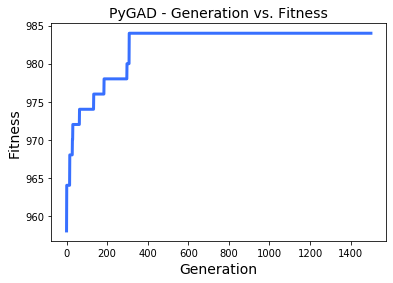

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 5 6 3 3 6 7 7 7 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 8 5 4 3 4 6 7 6 7 7 3]


 round:  173
elapsed time:  272.56435894966125
best sol [0.93538418 0.18418978 0.86722251 0.63307143 0.3037218  0.36519501
 0.9401576  0.47905443 0.0986734  0.09890667 0.09890667 0.3037218
 0.85415909 0.19745152 0.10140866 0.23207359 0.1713318  0.3153049
 0.76983266 0.50036154 0.10777156 0.72761814 0.5462497  0.02492623
 0.7722073  0.4150443  0.1713318  0.99583759 0.65938251 0.77412719
 0.99348011 0.08499039 0.12182885 0.87852633 0.22198144]
fitness:  16.0


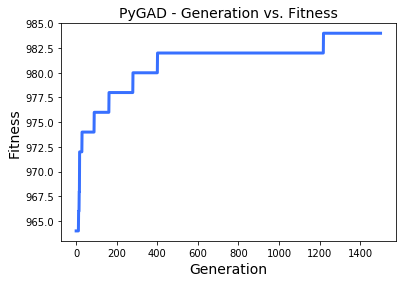

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 3 6 4 7 4 3 4 6 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 3 4 3 4 7 6 6 7 3]


 round:  174
elapsed time:  271.9839401245117
best sol [0.85507156 0.12724166 0.53501228 0.97323903 0.24717741 0.80993536
 0.07323878 0.53230425 0.18926347 0.60573728 0.04062723 0.07323878
 0.19044748 0.49334689 0.18926347 0.12724166 0.6576907  0.80993536
 0.45591291 0.60573728 0.19044748 0.94536016 0.58657538 0.36516043
 0.36516043 0.56796482 0.39677493 0.80993536 0.1817215  0.96470267
 0.94536016 0.19044748 0.24717741 0.6576907  0.23919219]
fitness:  10.0


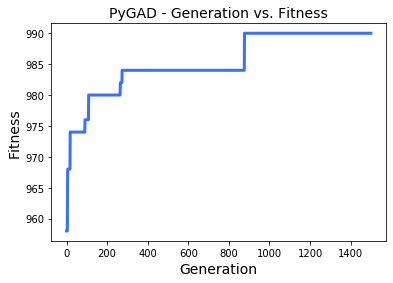

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 7 2 5 4 4 5 7 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 5 2 4 3 5 8 6 7 7 3]


 round:  175
elapsed time:  272.0383059978485
best sol [0.71802948 0.20917315 0.73508586 0.65941584 0.14846616 0.93696156
 0.19516678 0.19211368 0.40031379 0.28391629 0.14625829 0.2477086
 0.33364678 0.37726862 0.16671206 0.36169207 0.25064829 0.40901315
 0.40031379 0.73508586 0.16671206 0.16671206 0.40031379 0.25064829
 0.7516357  0.20445344 0.99564532 0.98151525 0.40870668 0.87813781
 0.7516357  0.1409215  0.14625829 0.53823047 0.056387  ]
fitness:  14.0


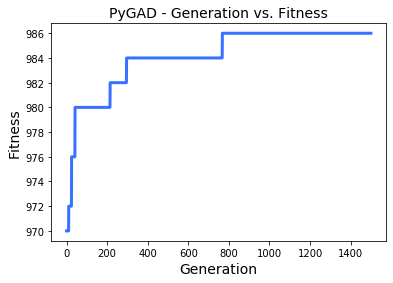

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 7 3 6 4 4 4 7 7 7 6]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 5 3 4 5 6 7 6 8 7 3]


 round:  176
elapsed time:  272.1714611053467
best sol [0.79821238 0.10314781 0.95685829 0.92792165 0.20271595 0.96528909
 0.15281102 0.14994946 0.10314781 0.11618335 0.04458166 0.10961575
 0.27668695 0.56844705 0.19917004 0.04458166 0.0093759  0.87935774
 0.77970672 0.86719173 0.43348948 0.77023766 0.64203894 0.88036417
 0.27654121 0.27668695 0.99135354 0.72048812 0.0093759  0.20271595
 0.48661975 0.44087217 0.56844705 0.0093759  0.17459608]
fitness:  16.0


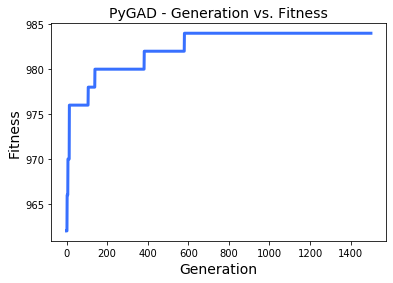

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 3 3 5 5 5 6 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 6 2 5 3 6 7 7 6 7 3]


 round:  177
elapsed time:  271.22780895233154
best sol [0.8518193  0.25957497 0.94632896 0.9568205  0.30957525 0.45781155
 0.09981044 0.39435252 0.22390199 0.09981044 0.06860684 0.45781155
 0.17254002 0.89235425 0.50218728 0.06860684 0.18354846 0.5308905
 0.69899803 0.53720083 0.22715343 0.98485479 0.43321268 0.14393331
 0.79090423 0.45781155 0.94632896 0.53720083 0.5308905  0.53720083
 0.79090423 0.27474942 0.55580919 0.00537946 0.12650219]
fitness:  16.0


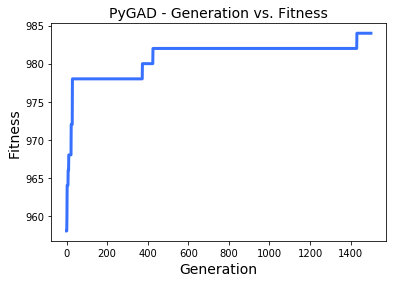

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 6 1 6 3 4 5 8 7 8 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 5 3 5 4 4 7 7 7 7 2]


 round:  178
elapsed time:  271.81816601753235
best sol [0.75514185 0.21511664 0.77131141 0.67724338 0.28146573 0.98740825
 0.6511896  0.49085439 0.10801541 0.03047767 0.10801541 0.1942625
 0.26170344 0.65333241 0.1244999  0.1624578  0.56793169 0.6451499
 0.1624578  0.1942625  0.10801541 0.56793169 0.22772925 0.07098425
 0.42655596 0.78310777 0.96376846 0.77639679 0.38420514 0.98740825
 0.96376846 0.1381801  0.18014737 0.77639679 0.13855726]
fitness:  16.0


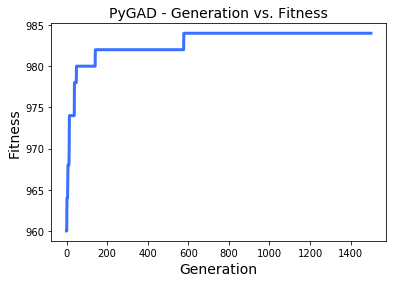

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 7 2 5 2 3 4 7 7 7 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 6 1 5 2 2 5 6 7 7 3]


 round:  179
elapsed time:  271.11482977867126
best sol [0.82650274 0.1489114  0.96486124 0.96486124 0.31105916 0.86633284
 0.16582585 0.48349486 0.08264767 0.08264767 0.01316795 0.23853775
 0.31105916 0.16171508 0.33258653 0.54258544 0.29107316 0.20921888
 0.86633284 0.72521922 0.98014512 0.23375051 0.39478437 0.31105916
 0.86633284 0.23853775 0.91873315 0.91873315 0.20434508 0.75530357
 0.81313299 0.11112729 0.39478437 0.23375051 0.2484045 ]
fitness:  12.0


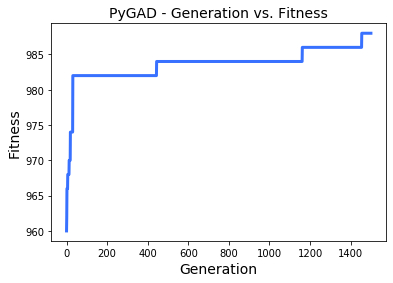

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 6 3 7 4 5 4 6 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 2 6 6 7 7 7 7 3]


 round:  180
elapsed time:  272.35817408561707
best sol [0.86662574 0.17250254 0.82700552 0.81809075 0.02190416 0.81809075
 0.89171793 0.44308039 0.0729123  0.25741213 0.1330382  0.02990855
 0.18111459 0.79095631 0.1330382  0.2147348  0.17365997 0.49730326
 0.48015869 0.84162667 0.08133216 0.62974163 0.71592705 0.03579448
 0.68419379 0.23637696 0.14907063 0.93571436 0.54614391 0.95678955
 0.85318935 0.09811954 0.16235963 0.87400843 0.13472615]
fitness:  14.0


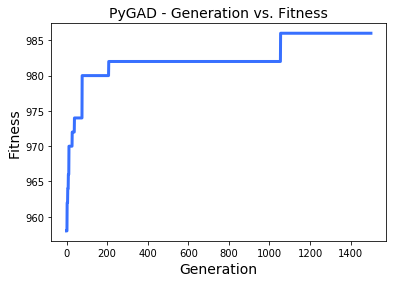

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 3 8 3 6 4 4 4 7 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 7 1 5 3 6 7 7 5 7 3]


 round:  181
elapsed time:  272.4833028316498
best sol [0.42330097 0.18805094 0.91723992 0.90054705 0.36729658 0.33731714
 0.68024736 0.44510329 0.18805094 0.10450942 0.10450942 0.09990495
 0.15915854 0.15915854 0.12683721 0.52387718 0.5075055  0.5075055
 0.64624553 0.74479589 0.12951383 0.44611121 0.00562407 0.15257987
 0.44611121 0.49762566 0.93779239 0.95778208 0.44611121 0.95778208
 0.87435499 0.10450942 0.5075055  0.12951383 0.64624553]
fitness:  14.0


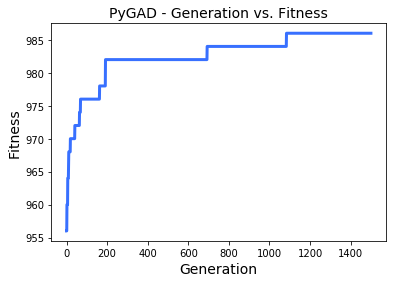

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 6 3 7 4 5 4 7 5 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 0 2 6 6 7 6 7 7 3]


 round:  182
elapsed time:  271.94298338890076
best sol [0.37650111 0.1359983  0.77895989 0.90065297 0.30796674 0.83367705
 0.7388262  0.34786691 0.10873212 0.30791602 0.04965233 0.07459347
 0.78684064 0.07459347 0.07459347 0.35000757 0.63799571 0.4273673
 0.85422167 0.76061366 0.06861476 0.85422167 0.7388262  0.14196187
 0.06861476 0.63799571 0.97306628 0.69845379 0.38444836 0.68737802
 0.94018583 0.30791602 0.17344243 0.40307333 0.04039512]
fitness:  14.0


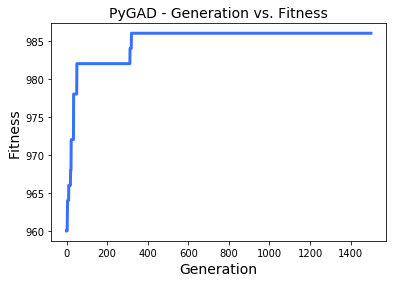

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 4 7 4 4 5 5 4 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 3 4 6 7 6 6 7 3]


 round:  183
elapsed time:  271.91998624801636
best sol [0.70352606 0.1991141  0.99924844 0.90550732 0.21134339 0.90550732
 0.16183369 0.45113022 0.14647923 0.14647923 0.15964937 0.07194461
 0.85041515 0.37695707 0.37695707 0.25613157 0.97701542 0.61044276
 0.15980718 0.73194272 0.66199546 0.99924844 0.31268472 0.26352514
 0.40671688 0.73194272 0.89500731 0.73194272 0.54066206 0.26352514
 0.76428166 0.15980718 0.04922998 0.60495522 0.73894204]
fitness:  14.0


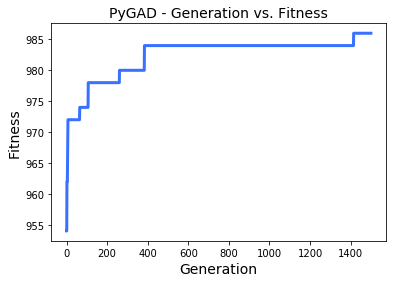

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 7 3 7 4 5 6 7 7 7 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 5 4 6 8 7 8 7 4]


 round:  184
elapsed time:  272.4861259460449
best sol [0.78804165 0.16974501 0.91948793 0.83616601 0.14742349 0.58783133
 0.89858705 0.33464667 0.01769364 0.24428279 0.09313749 0.09313749
 0.09313749 0.58936849 0.74917028 0.18752265 0.41619598 0.89858705
 0.53377893 0.58936849 0.89858705 0.96217699 0.22228732 0.18610876
 0.58936849 0.53377893 0.14966574 0.74917028 0.16974501 0.96217699
 0.43521306 0.22228732 0.37896603 0.14742349 0.99221537]
fitness:  14.0


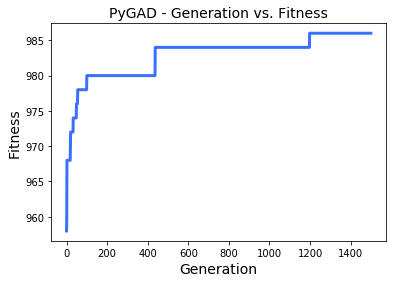

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 3 7 3 6 4 4 5 8 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 4 4 5 7 7 6 7 3]


 round:  185
elapsed time:  272.82527208328247
best sol [0.83145376 0.05966886 0.91395155 0.94439188 0.32488451 0.80826926
 0.05781229 0.35157166 0.11075039 0.36238821 0.07827764 0.13840437
 0.85274052 0.84833188 0.35157166 0.01967355 0.25604547 0.738782
 0.73796608 0.73796608 0.01190282 0.22287638 0.59462012 0.32488451
 0.01190282 0.738782   0.91631341 0.6731484  0.57259897 0.91395155
 0.91413695 0.25840684 0.03914629 0.57580882 0.01280674]
fitness:  14.0


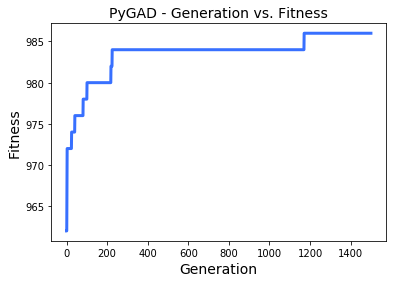

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 4 7 2 7 3 4 4 8 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [5 7 6 2 8 3 6 5 5 7 7 3]


 round:  186
elapsed time:  272.3258481025696
best sol [0.79260478 0.25738946 0.98130358 0.93543458 0.22849791 0.79260478
 0.12300136 0.52383745 0.05312801 0.12300136 0.13333359 0.17132962
 0.42072084 0.35716754 0.13333359 0.29492746 0.36142415 0.49367979
 0.17132962 0.68309115 0.17464669 0.17132962 0.52383745 0.12300136
 0.30064939 0.91456886 0.98713319 0.92063858 0.51992641 0.91456886
 0.91271567 0.13333359 0.25107581 0.32543285 0.22188374]
fitness:  12.0


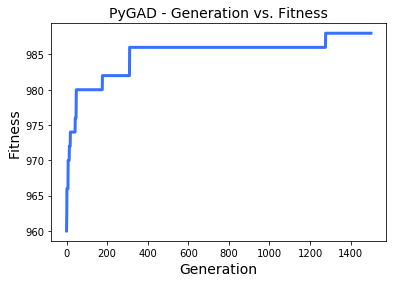

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 6 4 7 4 4 3 7 7 6 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 8 5 1 4 3 5 7 6 7 7 3]


 round:  187
elapsed time:  271.5306308269501
best sol [0.70052723 0.10362549 0.74295719 0.93952452 0.23335959 0.29889116
 0.73765449 0.4616014  0.10851157 0.08000787 0.03629214 0.29889116
 0.17180422 0.8388964  0.23442729 0.29987302 0.08000787 0.33648627
 0.8949378  0.68340977 0.90834841 0.07830685 0.14905141 0.3477289
 0.8949378  0.10851157 0.93952452 0.92699756 0.91731738 0.90834841
 0.92699756 0.10851157 0.14905141 0.23442729 0.4616014 ]
fitness:  14.0


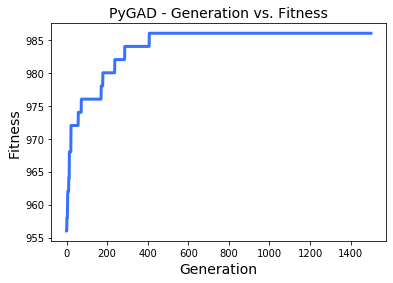

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 6 8 3 4 4 6 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 6 4 5 7 7 9 7 3]


 round:  188
elapsed time:  272.2820990085602
best sol [0.77807509 0.19847621 0.72728491 0.91510953 0.15356173 0.26953076
 0.72728491 0.12246451 0.29966606 0.19847621 0.15356173 0.12246451
 0.15356173 0.68960651 0.15356173 0.26953076 0.26953076 0.34832739
 0.72728491 0.72728491 0.15356173 0.15356173 0.20176463 0.26953076
 0.68100974 0.26953076 0.88424548 0.99769732 0.58456023 0.21956442
 0.81086809 0.18846085 0.17437024 0.84456828 0.20900652]
fitness:  12.0


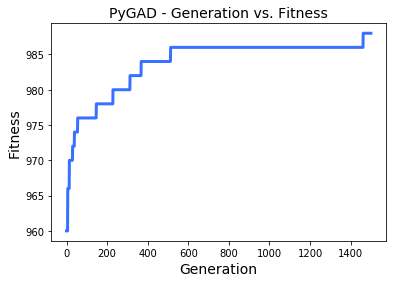

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 3 6 4 4 4 5 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 6 3 4 3 6 7 4 7 7 4]


 round:  189
elapsed time:  271.4259362220764
best sol [0.64282786 0.08592256 0.7969723  0.87022454 0.02531485 0.7969723
 0.73720182 0.41974577 0.20334792 0.28979219 0.16284245 0.07162068
 0.75770962 0.41974577 0.28979219 0.07162068 0.26473397 0.5998797
 0.28979219 0.7969723  0.16604498 0.75197978 0.45492961 0.56684656
 0.80105653 0.7969723  0.75770962 0.33637721 0.56005436 0.28979219
 0.75197978 0.26473397 0.02823452 0.75966496 0.11231128]
fitness:  14.0


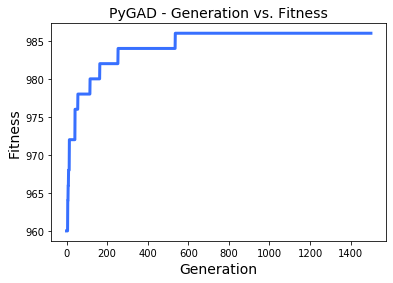

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 4 7 3 7 5 4 4 6 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 6 1 5 3 6 5 6 9 7 3]


 round:  190
elapsed time:  270.6382658481598
best sol [0.78604597 0.17048088 0.84696559 0.9450886  0.06173771 0.8857905
 0.16875259 0.33089397 0.16443839 0.36286089 0.06460705 0.06173771
 0.13607153 0.13607153 0.37308137 0.06173771 0.43491389 0.83727907
 0.60948219 0.83727907 0.24150641 0.81392329 0.40110035 0.10572148
 0.16443839 0.34040362 0.81392329 0.98942581 0.62492852 0.56547202
 0.91046035 0.23070137 0.74189001 0.51242726 0.58716535]
fitness:  16.0


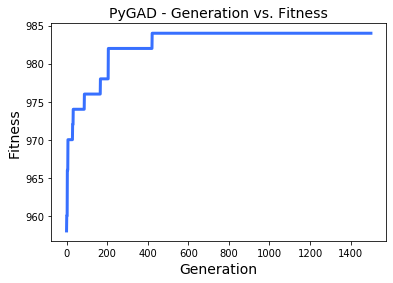

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 4 8 3 7 3 4 4 6 6 7 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 6 1 3 2 7 8 6 6 7 5]


 round:  191
elapsed time:  271.3161370754242
best sol [0.67920015 0.18333214 0.6315934  0.93572368 0.36496404 0.93171232
 0.55558723 0.3316686  0.0303082  0.15752908 0.19656123 0.20384868
 0.39295532 0.49365644 0.20384868 0.07202844 0.55558723 0.61895203
 0.41908638 0.55558723 0.03480563 0.55558723 0.16273379 0.39841415
 0.3316686  0.41908638 0.89614301 0.95315119 0.52816136 0.9885903
 0.89614301 0.20384868 0.20384868 0.28757866 0.36496404]
fitness:  14.0


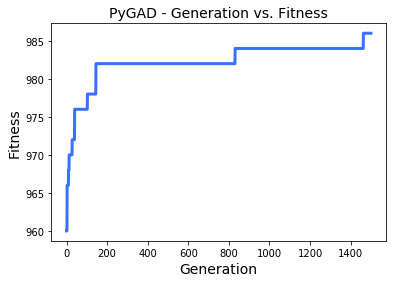

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 8 4 7 4 4 4 5 7 6 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 6 3 4 3 5 7 6 7 7 3]


 round:  192
elapsed time:  271.87667083740234
best sol [0.66133206 0.11867711 0.94255321 0.66506364 0.42125543 0.80916506
 0.743214   0.45384193 0.00621211 0.07585244 0.0414063  0.5091979
 0.23902009 0.49843812 0.04419964 0.21576764 0.42125543 0.75827049
 0.52456792 0.52456792 0.26438963 0.03602911 0.04419964 0.25348239
 0.55219668 0.52456792 0.93773825 0.99038926 0.21367476 0.41759915
 0.41759915 0.18184507 0.04419964 0.42761737 0.80916506]
fitness:  14.0


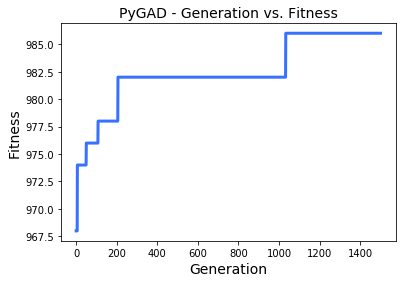

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 6 3 6 3 4 5 6 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 6 3 4 3 5 7 3 7 7 3]


 round:  193
elapsed time:  272.4081017971039
best sol [0.49475215 0.16247166 0.94986386 0.96017858 0.30362717 0.96017858
 0.37577321 0.38027851 0.08042755 0.15398926 0.15950728 0.18966491
 0.32268901 0.51235487 0.48830888 0.11915391 0.58628058 0.48830888
 0.58880434 0.58628058 0.96017858 0.97163892 0.24989932 0.11915391
 0.39961768 0.65540583 0.48830888 0.58880434 0.66353233 0.39961768
 0.86996587 0.14866921 0.51235487 0.11915391 0.25222186]
fitness:  12.0


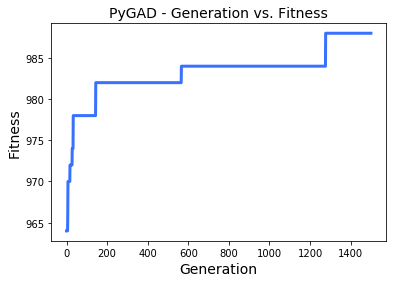

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 3 7 3 7 4 4 5 6 8 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 4 3 5 7 6 8 7 3]


 round:  194
elapsed time:  272.18590784072876
best sol [0.38509889 0.27592238 0.91233587 0.98707565 0.12079161 0.96190384
 0.04971363 0.29931318 0.07828728 0.16044009 0.14701309 0.12079161
 0.04971363 0.90699269 0.91233587 0.05000418 0.20835019 0.20835019
 0.20701188 0.83323094 0.18648013 0.91233587 0.05000418 0.06742829
 0.70156173 0.5600132  0.92392874 0.70156173 0.42083172 0.58807737
 0.38545775 0.20835019 0.60753996 0.42083172 0.58893401]
fitness:  16.0


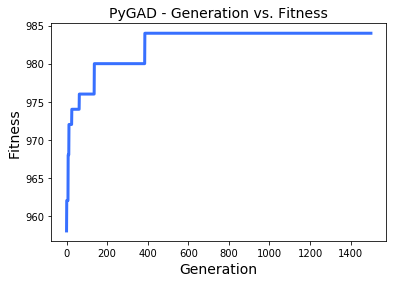

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [5 5 8 2 6 3 5 4 7 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 5 5 3 4 3 5 7 6 7 6 4]


 round:  195
elapsed time:  271.51190519332886
best sol [0.80740274 0.07741918 0.74377667 0.73738819 0.00936352 0.94787812
 0.72528387 0.50072024 0.18743259 0.09710792 0.05376865 0.45953076
 0.23995629 0.48919556 0.09690237 0.18743259 0.34000032 0.64554541
 0.77351189 0.51099844 0.18743259 0.69937473 0.62152822 0.29743724
 0.69937473 0.50072024 0.69937473 0.89647351 0.18743259 0.29743724
 0.94787812 0.21104786 0.12610648 0.51099844 0.21104786]
fitness:  14.0


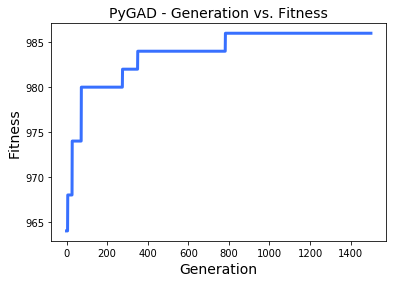

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 4 6 3 5 4 4 4 6 7 8 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 4 3 5 6 7 7 7 3]


 round:  196
elapsed time:  272.7181787490845
best sol [0.74225697 0.19031825 0.87213716 0.93469609 0.09165852 0.87287643
 0.39170435 0.18884521 0.19031825 0.86073944 0.15001229 0.40558278
 0.44853676 0.15001229 0.81041491 0.15167873 0.87287643 0.87287643
 0.56533326 0.51638153 0.15167873 0.86073944 0.44853676 0.15001229
 0.15167873 0.73550312 0.54747945 0.65100921 0.28928801 0.93469609
 0.90809127 0.2101175  0.49078035 0.32535113 0.15001229]
fitness:  16.0


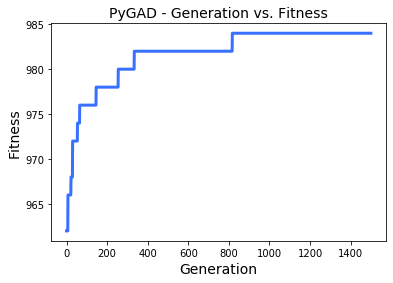

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 3 4 4 4 5 7 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 5 6 4 5 4 6 6 6 6 7 3]


 round:  197
elapsed time:  272.19644379615784
best sol [0.9114072  0.19423475 0.94900327 0.94900327 0.14169049 0.97619749
 0.19423475 0.44275217 0.21156251 0.23770167 0.13461032 0.17773108
 0.25784729 0.19423475 0.72314639 0.19423475 0.86920715 0.14169049
 0.9114072  0.54226196 0.00159181 0.25784729 0.25784729 0.19423475
 0.51519348 0.48721058 0.9743097  0.99330741 0.48721058 0.94425351
 0.82270909 0.16106239 0.25584138 0.31655367 0.00159181]
fitness:  12.0


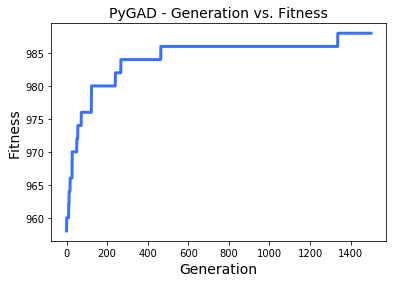

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [9 5 7 3 7 4 4 4 6 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 7 3 3 4 6 7 6 7 7 3]


 round:  198
elapsed time:  273.3838469982147
best sol [0.74023481 0.18689231 0.86896816 0.93415878 0.00902408 0.64743004
 0.64743004 0.65271664 0.19116474 0.52529836 0.02065838 0.38226607
 0.16955129 0.17635028 0.02065838 0.20177686 0.38226607 0.82459579
 0.96219153 0.66579551 0.00902408 0.96219153 0.33173782 0.22562791
 0.50905373 0.22832874 0.82459579 0.35766292 0.65271664 0.86896816
 0.63317077 0.18958477 0.35766292 0.22562791 0.06036248]
fitness:  14.0


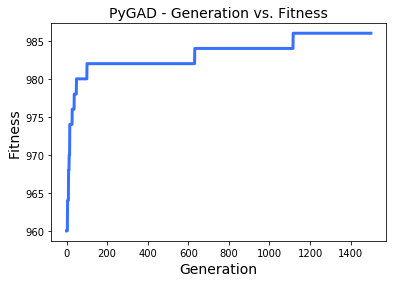

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 5 5 4 6 4 4 4 7 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 4 4 3 6 6 6 8 6 3]


 round:  199
elapsed time:  271.4346339702606
best sol [0.42092666 0.16301726 0.90427208 0.86113208 0.25299289 0.39954697
 0.98319468 0.42092666 0.16301726 0.07443102 0.16301726 0.12093488
 0.24601825 0.6407424  0.25299289 0.16301726 0.61902546 0.80283019
 0.6407424  0.42092666 0.16301726 0.98204812 0.66797871 0.08709347
 0.84671636 0.81619219 0.25299289 0.63636112 0.67438426 0.39954697
 0.5921579  0.12093488 0.26915014 0.66797871 0.16301726]
fitness:  14.0


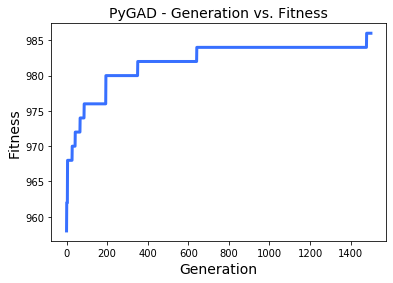

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 3 7 2 5 4 4 6 7 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 5 4 4 7 6 7 6 4]


 round:  200
elapsed time:  271.28853702545166
best sol [0.89962776 0.13917699 0.78462713 0.66203607 0.3394873  0.8454214
 0.12548064 0.44574025 0.12193635 0.41218142 0.16008822 0.49417828
 0.28689362 0.41218142 0.16008822 0.29751931 0.34198174 0.22809077
 0.58047711 0.83997519 0.59067098 0.20835757 0.44574025 0.35966088
 0.76085967 0.4452656  0.85932402 0.59067098 0.163161   0.52505436
 0.81037733 0.12548064 0.17611684 0.69953204 0.12940142]
fitness:  18.0


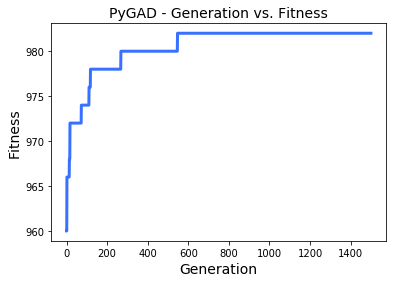

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 2 5 4 4 3 7 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 4 5 3 2 7 4 6 7 7 3]


 round:  201
elapsed time:  270.9425196647644
best sol [0.92373787 0.2763351  0.89483728 0.89483728 0.2763351  0.88268691
 0.80771041 0.48863262 0.00744171 0.00448417 0.00653112 0.10474277
 0.14891003 0.38956633 0.14891003 0.10474277 0.47093372 0.59091886
 0.46025243 0.25574198 0.82033423 0.82033423 0.47093372 0.1606291
 0.14891003 0.2763351  0.38956633 0.80771041 0.8087716  0.80771041
 0.57403883 0.27482192 0.65810585 0.10474277 0.96030085]
fitness:  18.0


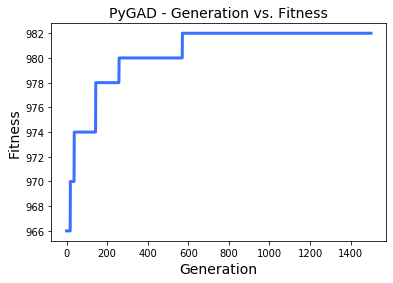

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 3 7 4 6 3 4 4 6 7 5 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 6 2 3 2 3 7 7 7 7 3]


 round:  202
elapsed time:  271.71149015426636
best sol [0.50264012 0.20377411 0.95095973 0.78534591 0.14282815 0.84578156
 0.99679101 0.35002993 0.10324475 0.22480976 0.00745983 0.05817149
 0.35002993 0.35002993 0.35002993 0.10324475 0.35002993 0.78534591
 0.50023836 0.7415024  0.24112965 0.99679101 0.12509869 0.342393
 0.99679101 0.78534591 0.50023836 0.99679101 0.24112965 0.35002993
 0.35002993 0.22480976 0.14282815 0.14053807 0.342393  ]
fitness:  14.0


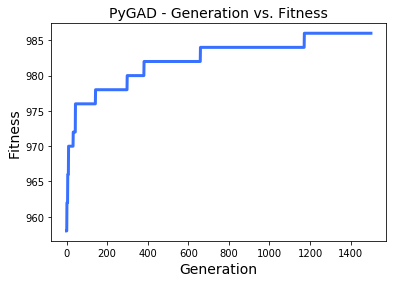

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 4 8 3 6 4 4 4 6 8 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 7 1 4 3 6 9 6 7 6 2]


 round:  203
elapsed time:  271.87227392196655
best sol [0.43360196 0.17429929 0.98675908 0.63689892 0.34682034 0.72180873
 0.92409531 0.39173531 0.0905125  0.02289527 0.02433928 0.22015133
 0.29835698 0.38146945 0.44839961 0.02401339 0.61733698 0.5955012
 0.92409531 0.85695677 0.39173531 0.81341966 0.22015133 0.29835698
 0.89609568 0.02433928 0.38592658 0.81341966 0.61733698 0.46140477
 0.85582797 0.01361173 0.63689892 0.36922433 0.25314644]
fitness:  14.0


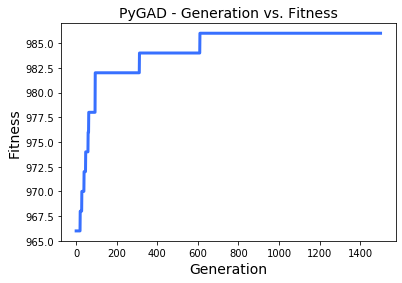

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 4 8 4 5 3 5 5 6 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 4 3 7 7 7 7 6 3]


 round:  204
elapsed time:  272.69233894348145
best sol [0.49387063 0.30591178 0.81720069 0.53442073 0.35751022 0.81720069
 0.94067918 0.5694233  0.07753133 0.12206671 0.29957786 0.07753133
 0.37025975 0.39499648 0.03584486 0.13120649 0.30791576 0.60659293
 0.94067918 0.65975463 0.12206671 0.65975463 0.62837825 0.07753133
 0.95326965 0.78348535 0.65975463 0.78348535 0.39499648 0.99587646
 0.5694233  0.08531308 0.65226091 0.65226091 0.08531308]
fitness:  16.0


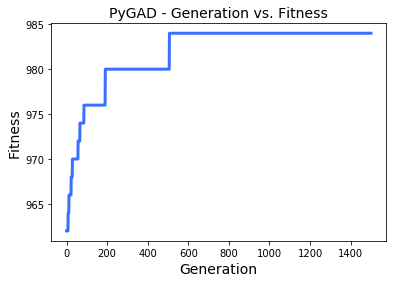

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 5 7 5 5 4 4 4 7 7 5 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 6 1 4 3 6 6 9 7 6 3]


 round:  205
elapsed time:  272.4026880264282
best sol [0.63717593 0.21001291 0.50155495 0.96848529 0.19702742 0.86211217
 0.12284546 0.61950603 0.18252646 0.36592954 0.05852371 0.11920218
 0.29366112 0.38498849 0.36592954 0.17376209 0.50155495 0.60935867
 0.50155495 0.61950603 0.11920218 0.95620953 0.04431441 0.17376209
 0.77564762 0.68468188 0.9377571  0.72414431 0.50155495 0.61950603
 0.26830051 0.05852371 0.40336179 0.61950603 0.36499652]
fitness:  14.0


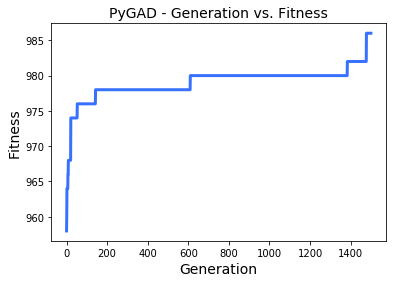

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 1 5 4 4 5 6 8 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 5 2 3 3 5 8 6 8 6 4]


 round:  206
elapsed time:  282.05853605270386
best sol [0.72134407 0.09300147 0.79824995 0.99128823 0.05588281 0.75633446
 0.23103291 0.33507995 0.14389074 0.23103291 0.14389074 0.32109332
 0.14389074 0.35593593 0.33507995 0.18119976 0.28219749 0.10443991
 0.79824995 0.8311641  0.10443991 0.74539332 0.79824995 0.0225167
 0.48634627 0.61030235 0.8775294  0.47631195 0.20483164 0.75476494
 0.826198   0.2692998  0.05588281 0.7668946  0.10443991]
fitness:  16.0


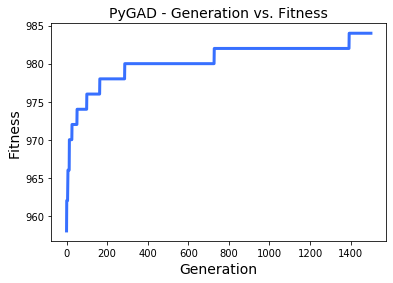

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 5 7 2 5 4 3 3 7 7 5 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 6 3 3 3 6 5 6 7 7 3]


 round:  207
elapsed time:  299.9446678161621
best sol [0.68726355 0.15728778 0.95624169 0.91183864 0.33867876 0.94638856
 0.1614762  0.33867876 0.20284595 0.15728778 0.03143617 0.30614438
 0.33724178 0.23573383 0.20284595 0.33867876 0.99329825 0.1573889
 0.47475497 0.57020783 0.02926161 0.15698239 0.33867876 0.15728778
 0.09064012 0.94804377 0.94638856 0.94638856 0.47606876 0.94638856
 0.94804377 0.10370572 0.82278638 0.47606876 0.23305743]
fitness:  12.0


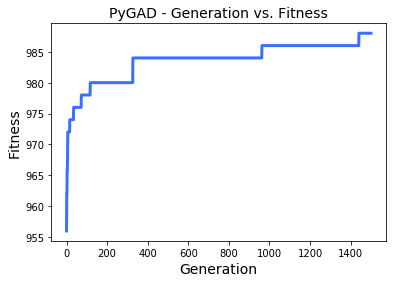

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 5 7 1 7 5 4 4 7 6 5 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 3 2 3 6 7 6 6 7 4]


 round:  208
elapsed time:  284.25532388687134
best sol [0.83686061 0.18652491 0.99845717 0.93948681 0.32261263 0.95112386
 0.24192593 0.37000213 0.05291784 0.05291784 0.02111972 0.13536098
 0.57247352 0.51883386 0.02291343 0.16106316 0.80340499 0.26489835
 0.29195877 0.71096055 0.19970337 0.37000213 0.24192593 0.19695156
 0.80340499 0.94407035 0.87521062 0.93948681 0.40537212 0.67624269
 0.65986956 0.16106316 0.47037978 0.11735332 0.98210047]
fitness:  12.0


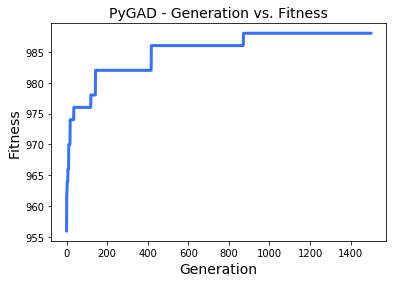

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 5 4 7 4 4 4 6 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 5 1 6 7 6 8 7 3]


 round:  209
elapsed time:  4360.95500087738
best sol [0.82834177 0.34230967 0.92524876 0.92099726 0.13449259 0.2744926
 0.06538286 0.33238409 0.13449259 0.10901931 0.10901931 0.45125057
 0.33238409 0.47545168 0.47545168 0.34266009 0.31075057 0.31075057
 0.47545168 0.31075057 0.2097238  0.13449259 0.06538286 0.31333927
 0.88157324 0.45672213 0.96298452 0.92099726 0.45125057 0.88157324
 0.92296027 0.32354003 0.19283934 0.31333927 0.11550156]
fitness:  14.0


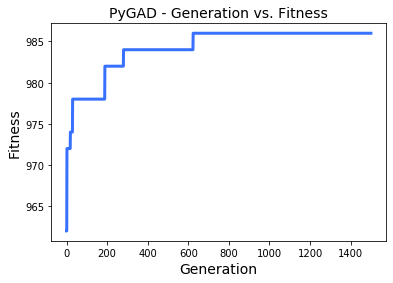

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 7 2 6 3 4 3 8 7 7 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 5 2 3 3 3 7 6 8 7 3]


 round:  210
elapsed time:  428.6333997249603
best sol [0.42132591 0.18482779 0.93228137 0.95460311 0.34392231 0.80308028
 0.12228388 0.347776   0.0906188  0.34333049 0.12228388 0.04179612
 0.16123111 0.16123111 0.44053571 0.24322937 0.71216095 0.347776
 0.95460311 0.61380879 0.08852461 0.99773125 0.71216095 0.12228388
 0.71216095 0.347776   0.95460311 0.71259988 0.44053571 0.71259988
 0.94006435 0.28867191 0.47620197 0.34333049 0.17645286]
fitness:  12.0


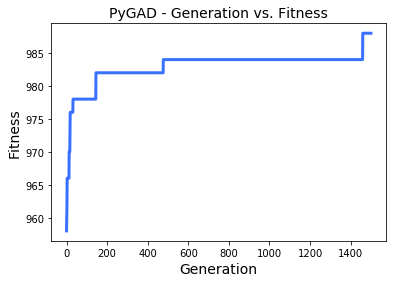

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 0 6 4 5 5 6 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 5 1 3 4 5 8 7 7 7 3]


 round:  211
elapsed time:  7644.023549079895
best sol [0.68199715 0.07361281 0.98474463 0.26368493 0.39015064 0.75331108
 0.33144224 0.26368493 0.60540872 0.34321967 0.0368082  0.23171394
 0.23171394 0.18520429 0.14705809 0.1907433  0.59876466 0.7704531
 0.75626587 0.54071687 0.23171394 0.54071687 0.23171394 0.14705809
 0.85635695 0.23171394 0.7182462  0.98474463 0.38051249 0.56400804
 0.78601087 0.75331108 0.07704973 0.01078095 0.0368082 ]
fitness:  18.0


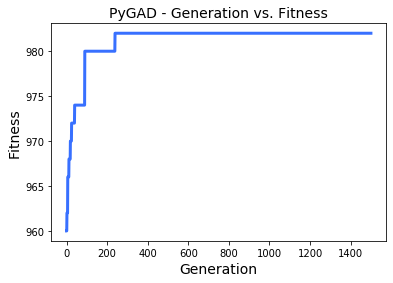

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 3 6 4 3 4 5 7 7 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 4 6 3 4 4 5 6 6 7 7 4]


 round:  212
elapsed time:  278.36989426612854
best sol [0.43353769 0.09141909 0.54048033 0.62990732 0.13812655 0.54545345
 0.9199181  0.63436536 0.35442271 0.03845938 0.03845938 0.03845938
 0.97783853 0.31850616 0.08663074 0.9199181  0.63436536 0.49728653
 0.57230231 0.59825263 0.02369771 0.33697387 0.23531494 0.13812655
 0.31850616 0.97783853 0.63436536 0.67053633 0.54545345 0.97783853
 0.95633991 0.2412153  0.00960375 0.75785186 0.00157097]
fitness:  16.0


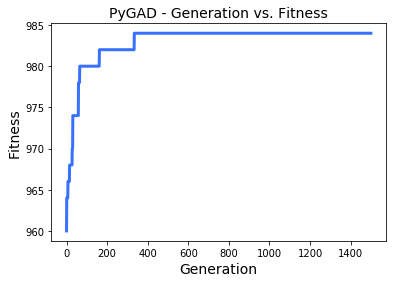

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 6 3 7 5 4 4 7 7 5 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 5 1 6 6 6 4 6 7 7 3]


 round:  213
elapsed time:  3262.159534931183
best sol [0.68223022 0.15022528 0.80840948 0.85715798 0.3595896  0.84471464
 0.85715798 0.32440535 0.10279441 0.04788177 0.19187577 0.19187577
 0.24067135 0.42033005 0.09908189 0.22360398 0.23122803 0.90348132
 0.37302633 0.90348132 0.09908189 0.82919702 0.68349199 0.47817177
 0.2587371  0.82919702 0.68349199 0.94580252 0.42505279 0.37302633
 0.82919702 0.22360398 0.20606075 0.78646074 0.05740121]
fitness:  14.0


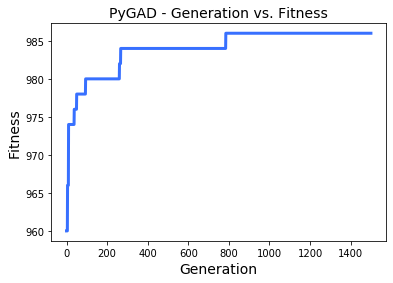

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 7 4 7 5 4 5 6 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 7 3 4 3 5 8 6 8 7 3]


 round:  214
elapsed time:  2309.389625787735
best sol [0.95023866 0.24240174 0.95193364 0.87517953 0.19639162 0.64047223
 0.89167505 0.37639375 0.02420201 0.08154553 0.06098291 0.34418059
 0.6497729  0.22993305 0.26374268 0.18438285 0.67343427 0.50152415
 0.94480417 0.56616511 0.22559984 0.94480417 0.91671936 0.22559984
 0.52310883 0.18438285 0.39303373 0.60602703 0.59964083 0.18438285
 0.91671936 0.18438285 0.59555175 0.22559984 0.15453363]
fitness:  16.0


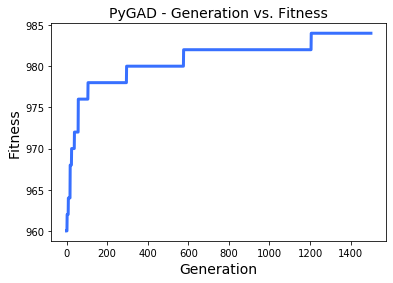

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [9 4 8 2 7 4 4 5 6 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 7 3 5 4 5 7 5 7 7 3]


 round:  215
elapsed time:  397.34089398384094
best sol [0.88655549 0.12878226 0.92596342 0.98246249 0.27878595 0.98246249
 0.68120592 0.30226685 0.0708278  0.11338362 0.13222862 0.20862109
 0.1952272  0.68120592 0.20862109 0.16531011 0.32129769 0.30345579
 0.60779892 0.30345579 0.20862109 0.54411187 0.49564353 0.20862109
 0.60779892 0.20862109 0.92596342 0.98246249 0.54411187 0.99944347
 0.99944347 0.13222862 0.41602665 0.1952272  0.17641247]
fitness:  12.0


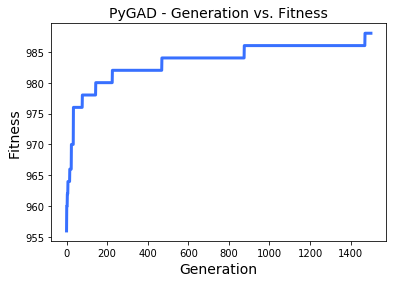

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 2 6 3 4 5 7 7 6 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 7 2 4 2 3 7 7 7 7 3]


 round:  216
elapsed time:  2279.331004858017
best sol [0.76979781 0.18857104 0.9449298  0.9449298  0.19565701 0.82974834
 0.23869132 0.3441315  0.19002361 0.06075436 0.06075436 0.30943933
 0.92712212 0.23869132 0.1630525  0.586563   0.71846193 0.49172826
 0.19002361 0.92712212 0.1774387  0.89236627 0.44767532 0.11591899
 0.49762721 0.95033    0.92712212 0.71131064 0.59137908 0.47611949
 0.83172727 0.35769336 0.14814159 0.19565701 0.10653094]
fitness:  14.0


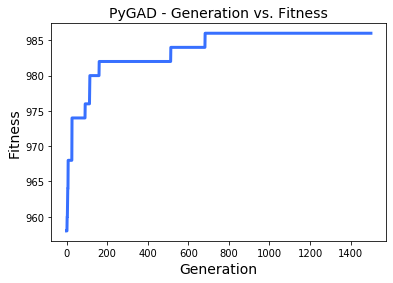

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 6 4 7 5 4 6 7 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 7 2 5 5 6 7 7 7 7 3]


 round:  217
elapsed time:  2326.8659048080444
best sol [0.59672181 0.08065828 0.97605159 0.9890215  0.3606846  0.67865943
 0.59860884 0.42417728 0.17928299 0.08015078 0.0788259  0.15338656
 0.23443743 0.36280659 0.3606846  0.20259699 0.67865943 0.93956183
 0.60920151 0.32141066 0.1255029  0.93956183 0.29619559 0.58526381
 0.08065828 0.89774834 0.93956183 0.71301029 0.29619559 0.68465838
 0.59860884 0.17928299 0.29619559 0.11031503 0.37522501]
fitness:  14.0


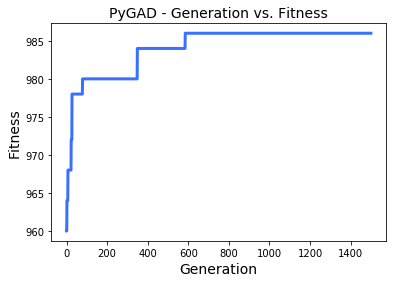

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 1 4 5 5 4 7 6 7 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 4 3 3 8 7 7 7 3]


 round:  218
elapsed time:  11248.95606303215
best sol [0.78349699 0.09367708 0.72428926 0.69004176 0.32072276 0.76520432
 0.03218257 0.36154215 0.15929748 0.30407244 0.03218257 0.25262805
 0.33846859 0.03218257 0.10154842 0.30407244 0.45806375 0.69452675
 0.63167581 0.9240134  0.69004176 0.27609812 0.69004176 0.15929748
 0.76520432 0.33846859 0.92224902 0.96007904 0.54648437 0.72428926
 0.96007904 0.10154842 0.13534359 0.6376529  0.00813564]
fitness:  16.0


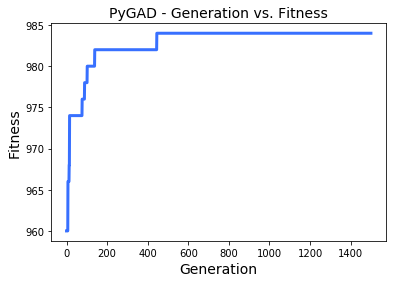

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 3 7 4 4 3 5 6 8 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 4 2 2 4 7 7 7 7 7 3]


 round:  219
elapsed time:  314.41439390182495
best sol [0.81175003 0.17741505 0.79567893 0.80200746 0.18490822 0.87023932
 0.66824172 0.42988891 0.09554074 0.12754567 0.09554074 0.19726607
 0.09554074 0.44546859 0.29959244 0.09082093 0.87023932 0.78464129
 0.49102538 0.12240391 0.234586   0.76086629 0.59397329 0.14592946
 0.55595098 0.55622499 0.91564452 0.91564452 0.29959244 0.76086629
 0.89167651 0.17046043 0.29959244 0.60489127 0.0180398 ]
fitness:  12.0


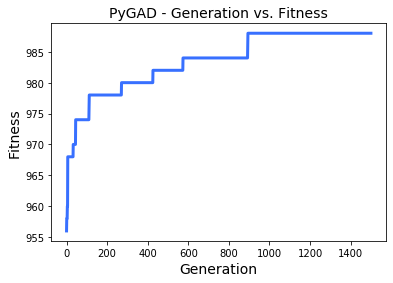

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 2 4 2 4 6 7 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 3 3 4 7 6 7 7 4]


 round:  220
elapsed time:  313.7327620983124
best sol [0.56819706 0.15272599 0.86736775 0.46295199 0.25488682 0.80064602
 0.84206766 0.46064251 0.08757722 0.33403982 0.06804849 0.06804849
 0.20786042 0.41122805 0.18229769 0.06804849 0.47156825 0.92316486
 0.64651086 0.68528039 0.08757722 0.80597737 0.37649472 0.37649472
 0.37633602 0.41122805 0.45852194 0.62810192 0.46064251 0.97341399
 0.66468616 0.49894319 0.20786042 0.08830229 0.66624497]
fitness:  14.0


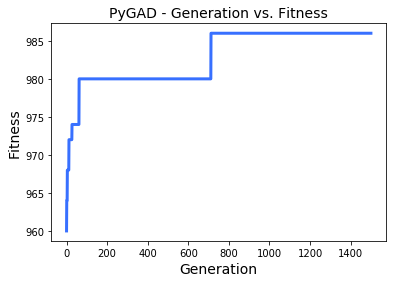

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 4 8 3 6 3 4 4 7 6 6 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 6 2 4 3 6 6 6 8 6 3]


 round:  221
elapsed time:  336.54222297668457
best sol [0.39627551 0.14526775 0.97230099 0.97230099 0.34592128 0.32668445
 0.32668445 0.32668445 0.08705219 0.3175841  0.14837336 0.17938578
 0.34592128 0.14814128 0.35317701 0.32969148 0.3175841  0.60890546
 0.64157254 0.69330091 0.0359841  0.93595455 0.60040049 0.32668445
 0.55751951 0.23293145 0.84437191 0.60890546 0.54771105 0.32668445
 0.94684404 0.18660688 0.17938578 0.54771105 0.11642049]
fitness:  14.0


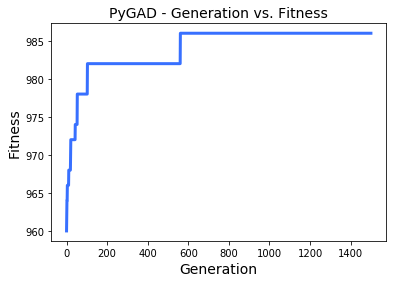

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 4 7 2 6 4 5 5 6 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 5 2 2 5 6 7 6 7 7 3]


 round:  222
elapsed time:  811.1823689937592
best sol [0.54772774 0.17833949 0.94488793 0.70860226 0.27475963 0.29295584
 0.84704654 0.17661154 0.10804662 0.05211784 0.14357704 0.17661154
 0.32792925 0.32792925 0.6640334  0.00422113 0.29560485 0.67001309
 0.51384428 0.67001309 0.17661154 0.76132744 0.94000597 0.1857443
 0.63071705 0.84704654 0.16136053 0.6640334  0.76132744 0.1857443
 0.32792925 0.24356118 0.70860226 0.67001309 0.17661154]
fitness:  16.0


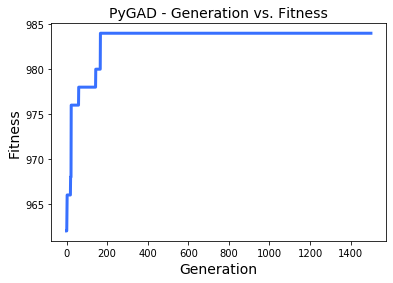

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 3 7 4 5 3 4 5 7 6 7 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 6 1 4 3 6 6 7 8 6 4]


 round:  223
elapsed time:  7102.795044898987
best sol [0.57990336 0.17731589 0.83221585 0.83824797 0.13402496 0.79561116
 0.25451208 0.41478491 0.13402496 0.77246582 0.12242982 0.00212977
 0.64527848 0.12242982 0.12781803 0.33208022 0.64527848 0.51189123
 0.39845027 0.72929448 0.18016262 0.77246582 0.12781803 0.01295619
 0.77246582 0.64527848 0.8728141  0.77246582 0.83824797 0.6919309
 0.98472292 0.21720497 0.13566045 0.24437267 0.43278219]
fitness:  16.0


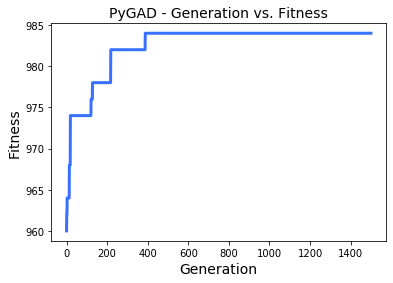

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 6 6 5 7 4 4 4 5 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 4 2 5 3 6 7 6 8 7 3]


 round:  224
elapsed time:  594.5107610225677
best sol [0.85349584 0.15511983 0.95027229 0.85806897 0.06669541 0.89382771
 0.27869307 0.39303421 0.19869509 0.10468939 0.1447888  0.27869307
 0.34210371 0.4626643  0.44001482 0.33281416 0.79681429 0.74232421
 0.1664043  0.85806897 0.54020949 0.6174746  0.22327522 0.20480544
 0.58704731 0.34210371 0.90558509 0.85806897 0.78904929 0.33281416
 0.78904929 0.18087849 0.46678651 0.08639641 0.3777255 ]
fitness:  14.0


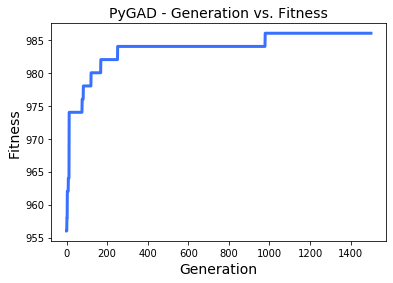

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [5 5 7 5 6 4 5 4 5 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 6 1 4 4 7 7 6 7 7 3]


 round:  225
elapsed time:  1524.7910752296448
best sol [0.91434865 0.16968713 0.95254366 0.93566306 0.10034113 0.37319932
 0.19126611 0.16968713 0.096608   0.19126611 0.0247739  0.19126611
 0.19126611 0.61451633 0.42866783 0.096608   0.87629759 0.56037273
 0.43004248 0.59314871 0.75921352 0.95254366 0.59314871 0.16447237
 0.56037273 0.19126611 0.87629759 0.56037273 0.42866783 0.87629759
 0.79673563 0.29996926 0.30892372 0.0540235  0.59314871]
fitness:  14.0


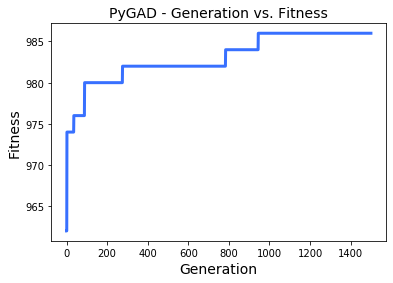

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 6 2 6 4 4 5 8 7 7 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 5 6 3 4 3 6 7 9 7 7 3]


 round:  226
elapsed time:  3758.9067420959473
best sol [0.85611761 0.08901008 0.81615637 0.78067315 0.35498086 0.97630548
 0.53713596 0.42586087 0.18799596 0.09458843 0.29443577 0.29628172
 0.21400164 0.61860061 0.98081564 0.31523572 0.42586087 0.21072382
 0.12888255 0.53713596 0.53713596 0.21072382 0.08585732 0.1574738
 0.7129209  0.77449932 0.98081564 0.98081564 0.60365469 0.61974398
 0.78067315 0.09458843 0.53180971 0.21072382 0.52430756]
fitness:  16.0


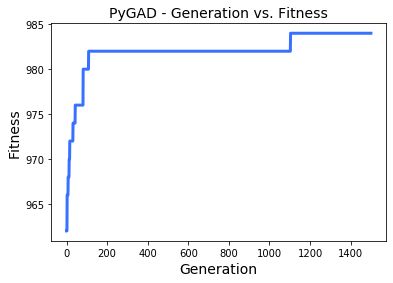

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 7 5 7 4 4 4 5 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 4 5 4 7 5 8 7 3]


 round:  227
elapsed time:  381.3774080276489
best sol [0.67927697 0.10500036 0.97315911 0.84459757 0.22077993 0.95399297
 0.24377615 0.37338469 0.1465535  0.0389777  0.1465535  0.73434938
 0.14824195 0.38259979 0.72096847 0.00640917 0.37315314 0.67192496
 0.54637777 0.60956929 0.0389777  0.73434938 0.64389362 0.04106526
 0.32972456 0.64389362 0.72096847 0.65074806 0.45706072 0.73434938
 0.97135474 0.38259979 0.37315314 0.1064931  0.18483714]
fitness:  14.0


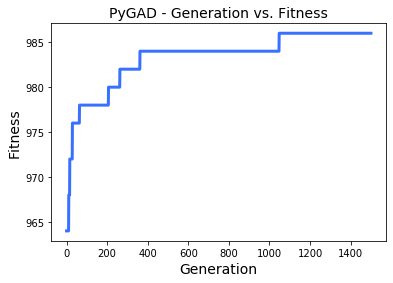

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 6 3 6 3 4 5 7 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 7 3 4 3 5 5 6 6 7 3]


 round:  228
elapsed time:  25075.037292957306
best sol [0.86878096 0.13933675 0.94473038 0.18106576 0.1332185  0.93495832
 0.37238848 0.46905997 0.07679316 0.49656474 0.00666475 0.18106576
 0.18106576 0.49656474 0.00666475 0.06054185 0.15233146 0.76654524
 0.49656474 0.80436493 0.18106576 0.80436493 0.11384469 0.26017532
 0.7321409  0.66211197 0.76654524 0.7225926  0.46905997 0.67221706
 0.80436493 0.11384469 0.41423722 0.08322071 0.66211197]
fitness:  12.0


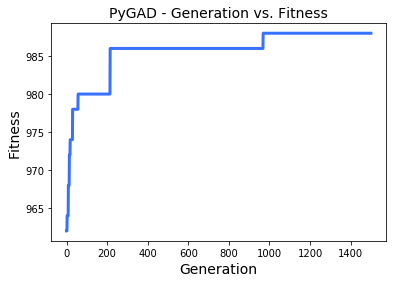

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 2 6 3 4 4 7 7 7 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 5 6 3 4 1 6 6 6 9 7 3]


 round:  229
elapsed time:  1524.9988491535187
best sol [0.62782335 0.14885987 0.96982081 0.93889979 0.44625138 0.96262065
 0.02652113 0.33514553 0.10401202 0.34013169 0.15934678 0.09756776
 0.13840248 0.3594818  0.3446783  0.23983173 0.33514553 0.45883528
 0.34013169 0.8798016  0.10401202 0.98002263 0.2961198  0.35871886
 0.33835985 0.86789235 0.80831497 0.26284757 0.48482722 0.35871886
 0.93889979 0.24488355 0.0719059  0.23983173 0.44004898]
fitness:  14.0


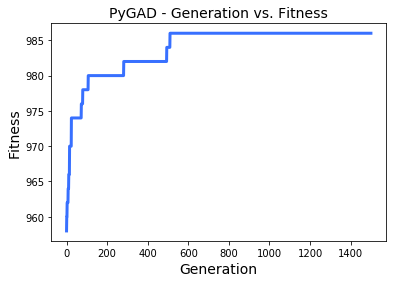

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 6 1 6 4 5 6 6 7 6 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 6 1 3 4 6 6 6 7 7 3]


 round:  230
elapsed time:  2593.6738831996918
best sol [0.73429759 0.30690234 0.7881184  0.99696042 0.10404049 0.95166137
 0.38819436 0.52545259 0.24461194 0.38529937 0.04133153 0.05411379
 0.00517186 0.38826361 0.21615702 0.1563913  0.65491527 0.48336263
 0.38826361 0.62013647 0.1249625  0.60464989 0.60464989 0.10404049
 0.94305422 0.76805761 0.60464989 0.92115284 0.52271838 0.56588787
 0.30130119 0.24128943 0.07346463 0.52545259 0.15613589]
fitness:  16.0


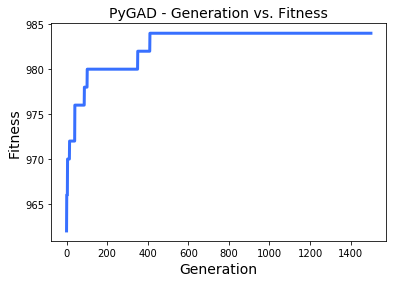

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 7 3 7 4 3 4 6 7 7 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 6 3 2 3 5 7 7 8 6 3]


 round:  231
elapsed time:  2287.394744873047
best sol [0.43210837 0.13181837 0.84542011 0.63554275 0.30468459 0.75973445
 0.86697595 0.3751372  0.12212242 0.00621734 0.60468851 0.2032166
 0.13973304 0.46671752 0.98909716 0.06544861 0.76464493 0.76464493
 0.66008247 0.60468851 0.08194778 0.75973445 0.460139   0.00621734
 0.73639336 0.79448577 0.60468851 0.75973445 0.78732383 0.5978166
 0.73285401 0.23336487 0.12212242 0.56213778 0.04998623]
fitness:  14.0


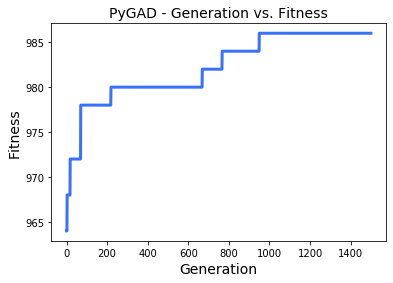

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 7 5 8 3 3 5 7 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 3 4 5 6 7 6 8 6 3]


 round:  232
elapsed time:  2411.9160509109497
best sol [0.09012698 0.54004362 0.98740821 0.98740821 0.27745352 0.93786693
 0.12998366 0.30878879 0.08880482 0.3215341  0.09012698 0.3215341
 0.12998366 0.12998366 0.08880482 0.30878879 0.93786693 0.12998366
 0.93786693 0.58410478 0.18166849 0.00820478 0.58410478 0.19448514
 0.98740821 0.95075381 0.78468924 0.95075381 0.3215341  0.58410478
 0.97624768 0.12998366 0.27745352 0.34547571 0.19448514]
fitness:  12.0


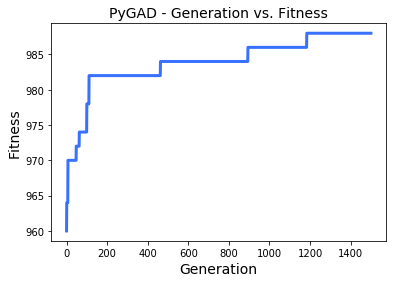

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 7 2 7 3 4 4 6 8 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [8 6 5 3 3 3 6 6 6 7 7 3]


 round:  233
elapsed time:  2229.3963961601257
best sol [0.78798463 0.06200311 0.71266582 0.80787407 0.12534804 0.41104251
 0.97973039 0.32742488 0.20999254 0.02609134 0.12386157 0.35259118
 0.06200311 0.31225976 0.19644561 0.49194391 0.07187659 0.6646686
 0.53960027 0.99915669 0.44418534 0.38542825 0.19644561 0.29378988
 0.9592837  0.43604473 0.41104251 0.9592837  0.21308726 0.93737575
 0.80787407 0.24894701 0.02753472 0.37254152 0.38542825]
fitness:  16.0


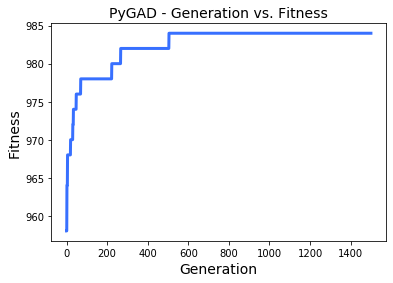

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 4 7 4 6 4 4 4 7 7 8 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [5 7 6 2 3 5 7 6 7 7 7 3]


 round:  234
elapsed time:  304.89909982681274
best sol [0.77016508 0.18737321 0.97126816 0.73215263 0.32671961 0.5462274
 0.24950761 0.39694669 0.11801965 0.39597762 0.15114291 0.03134657
 0.70756806 0.21075172 0.39597762 0.03134657 0.56560787 0.43051911
 0.66931276 0.38590425 0.32671961 0.97126816 0.05845182 0.03134657
 0.78773832 0.39597762 0.52208798 0.663394   0.39597762 0.56560787
 0.97126816 0.05357842 0.02622164 0.663394   0.57578775]
fitness:  12.0


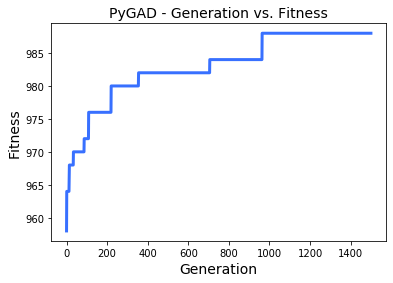

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 7 3 5 3 3 4 7 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 5 2 4 3 4 7 6 6 7 3]


 round:  235
elapsed time:  301.4535229206085
best sol [0.81331393 0.35414255 0.85522375 0.79168489 0.28435849 0.85487433
 0.4909418  0.48541998 0.12206312 0.12206312 0.06754397 0.12206312
 0.1583922  0.4823349  0.48541998 0.02298256 0.37992132 0.64647795
 0.85522375 0.85487433 0.48541998 0.58832377 0.38678266 0.31127568
 0.46319872 0.48541998 0.43127871 0.80061347 0.37992132 0.93798707
 0.95465503 0.34691919 0.52993625 0.14464572 0.12206312]
fitness:  16.0


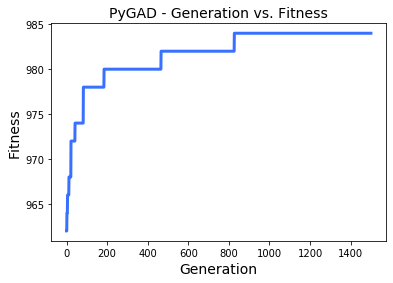

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 3 8 5 6 3 5 4 6 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 5 1 4 3 7 6 7 8 7 3]


 round:  236
elapsed time:  260.033704996109
best sol [0.83100633 0.20116539 0.83779283 0.98664666 0.1140698  0.25686715
 0.90138415 0.58488197 0.20143737 0.1154993  0.06300295 0.37437209
 0.33019409 0.49644868 0.37437209 0.05527035 0.90138415 0.84203407
 0.64316573 0.57797496 0.83779283 0.95108027 0.219209   0.28340313
 0.37437209 0.05527035 0.26427499 0.49644868 0.49644868 0.52658542
 0.83100633 0.28340313 0.54781438 0.77563925 0.20116539]
fitness:  16.0


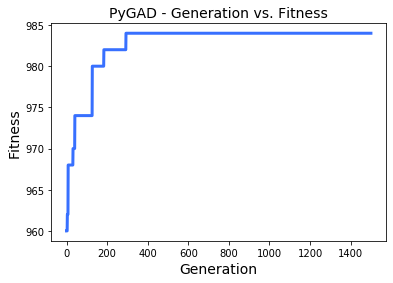

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 3 6 3 7 3 5 5 8 7 7 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 7 2 4 3 6 6 6 6 6 4]


 round:  237
elapsed time:  259.4081139564514
best sol [0.38885287 0.0893631  0.88275714 0.94285683 0.13161302 0.40698449
 0.87641813 0.47275328 0.11336281 0.06439474 0.13161302 0.0727474
 0.0973288  0.73021812 0.30259469 0.04543933 0.25401961 0.40143282
 0.55332063 0.90672201 0.88575021 0.87835161 0.11458374 0.08289063
 0.25401961 0.58830898 0.55332063 0.87641813 0.45025168 0.88279706
 0.87641813 0.25214271 0.55332063 0.39171521 0.11336281]
fitness:  16.0


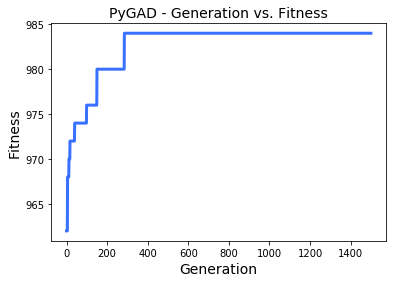

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 4 7 4 7 3 5 5 7 5 6 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 0 4 2 7 7 7 6 7 3]


 round:  238
elapsed time:  259.9369719028473
best sol [0.64721529 0.35300593 0.96408195 0.96958692 0.23925834 0.77764935
 0.11997051 0.37870906 0.08953251 0.04023105 0.49843441 0.11997051
 0.3366796  0.75952684 0.42967499 0.07844004 0.07844004 0.31985082
 0.96408195 0.75184337 0.37208553 0.1627294  0.11997051 0.31985082
 0.74908265 0.31985082 0.96408195 0.96958692 0.56321089 0.56321089
 0.77764935 0.14071337 0.14071337 0.6399209  0.48163949]
fitness:  14.0


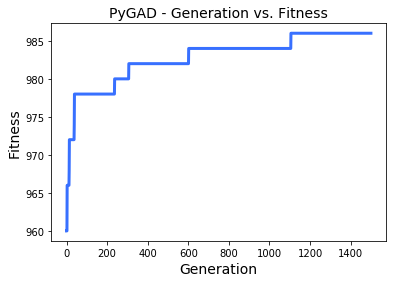

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 5 7 4 7 4 3 4 7 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 6 2 6 3 5 7 5 8 7 4]


 round:  239
elapsed time:  260.05741715431213
best sol [0.63629549 0.21263748 0.71283524 0.93750876 0.15767463 0.71283524
 0.21773303 0.35249861 0.21364424 0.30584815 0.1286681  0.15767463
 0.15767463 0.52589971 0.23217562 0.15767463 0.731682   0.67903371
 0.84901442 0.67903371 0.1286681  0.30584815 0.50762594 0.45313737
 0.15767463 0.78162146 0.99287448 0.52589971 0.1286681  0.93645416
 0.84901442 0.27931372 0.13730521 0.7373041  0.06371186]
fitness:  16.0


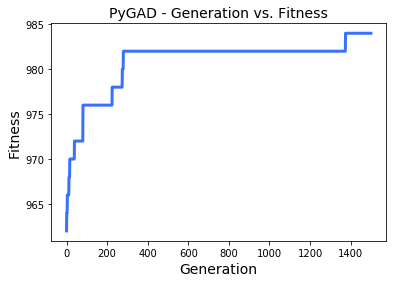

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 5 6 2 5 5 4 4 7 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 5 2 5 4 6 4 6 8 7 3]


 round:  240
elapsed time:  260.1167368888855
best sol [0.85758349 0.24786713 0.94243127 0.66825959 0.34601101 0.89425331
 0.46020023 0.30086535 0.14855782 0.09164253 0.03081371 0.20037059
 0.33121993 0.41488636 0.8773499  0.1481795  0.41488636 0.41488636
 0.47278218 0.76800358 0.20626666 0.65518554 0.01288333 0.26109467
 0.76800358 0.7083338  0.98664507 0.60463198 0.09164253 0.37754032
 0.99118178 0.13108822 0.80810184 0.11815099 0.33448364]
fitness:  16.0


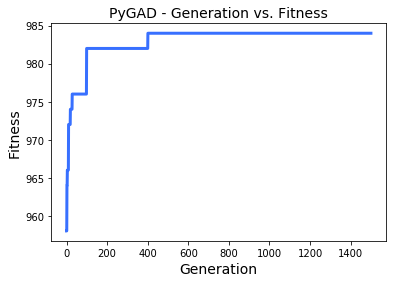

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 3 5 5 5 4 5 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 6 1 3 5 6 6 6 7 6 4]


 round:  241
elapsed time:  259.19269490242004
best sol [8.46423195e-01 2.13351610e-01 9.75943858e-01 8.20720117e-01
 3.37649242e-01 7.88642173e-01 1.80760352e-01 3.38004640e-01
 2.92884163e-01 3.64748045e-02 1.28681015e-01 1.27966104e-01
 2.13351610e-01 5.40698693e-01 2.13351610e-01 7.70774191e-02
 4.67417925e-01 2.61424427e-01 3.04124798e-01 8.58486404e-01
 4.17294354e-02 9.11392774e-01 7.15197074e-01 4.17294354e-02
 8.24058877e-01 6.77546224e-01 9.31819109e-01 7.08555648e-01
 6.55767690e-01 8.83106226e-01 8.22498479e-01 1.20051785e-01
 6.77546224e-01 8.29257969e-04 6.42363075e-01]
fitness:  14.0


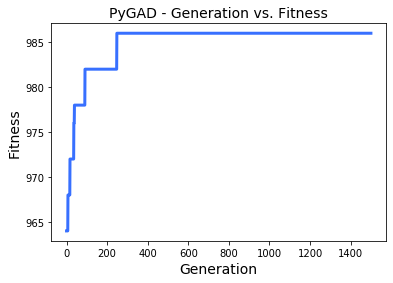

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 7 3 6 4 4 4 8 7 6 6]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 4 2 6 7 8 8 7 3]


 round:  242
elapsed time:  260.0271830558777
best sol [0.47271617 0.05173422 0.94252289 0.93826538 0.44857103 0.77355512
 0.72011281 0.42306359 0.0232459  0.13662527 0.09225883 0.08754451
 0.0232459  0.56834631 0.54579308 0.26702436 0.69041191 0.57368528
 0.4156183  0.62197593 0.20174292 0.97669326 0.52904566 0.20174292
 0.13662527 0.57368528 0.97669326 0.62197593 0.42306359 0.97366093
 0.97366093 0.23602822 0.33035024 0.01823029 0.54579308]
fitness:  16.0


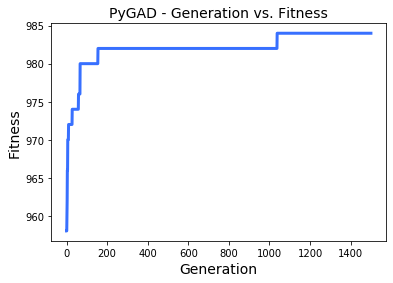

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 4 7 2 6 4 5 6 8 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 3 5 5 8 7 7 7 3]


 round:  243
elapsed time:  259.2773129940033
best sol [0.67248311 0.14086706 0.96439574 0.66582909 0.21826334 0.96439574
 0.17357375 0.4620249  0.00515544 0.13314719 0.07983069 0.01895193
 0.1458701  0.88555552 0.17357375 0.14086706 0.28632958 0.68742524
 0.62758169 0.17357375 0.09973069 0.90853037 0.13314719 0.09973069
 0.92277676 0.21826334 0.92277676 0.92277676 0.61336348 0.63895407
 0.38596814 0.29503429 0.11423033 0.22749235 0.79695942]
fitness:  14.0


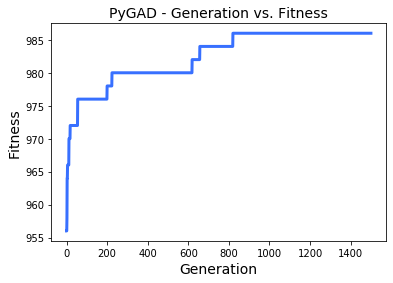

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 2 6 2 4 6 7 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 5 1 6 4 3 8 7 7 7 3]


 round:  244
elapsed time:  259.74231696128845
best sol [0.55373679 0.14363351 0.76525048 0.98402192 0.13843873 0.85529292
 0.61582723 0.40628218 0.15307095 0.63265257 0.01697662 0.02182924
 0.31236239 0.4644676  0.85529292 0.07092372 0.22380101 0.58159034
 0.18073244 0.99073234 0.06730278 0.81864403 0.31613022 0.27209224
 0.85529292 0.9550007  0.21513529 0.52303001 0.58159034 0.19640402
 0.59831139 0.19640402 0.19640402 0.72827587 0.22380101]
fitness:  14.0


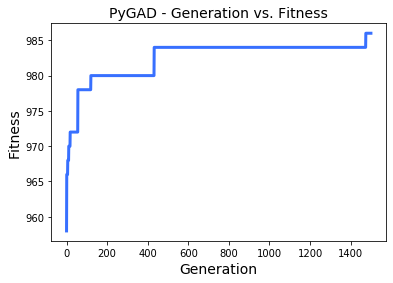

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 8 3 7 3 3 5 6 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 4 4 6 5 7 7 6 3]


 round:  245
elapsed time:  3181.610901117325
best sol [0.79055313 0.25407593 0.43500098 0.95444774 0.12676974 0.87279119
 0.23763031 0.57154487 0.11681907 0.05884502 0.1659924  0.13075217
 0.09936222 0.63623429 0.48917032 0.00750392 0.25407593 0.84947573
 0.55692839 0.67327751 0.89225586 0.87279119 0.60077034 0.13075217
 0.13075217 0.18691307 0.94742325 0.67327751 0.60077034 0.84947573
 0.89071327 0.13075217 0.63860531 0.13177258 0.47997448]
fitness:  14.0


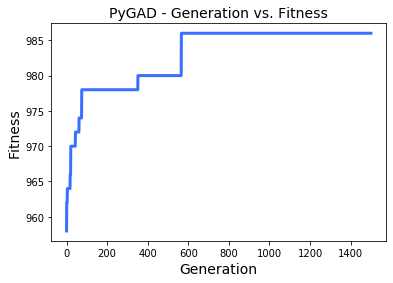

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 6 4 7 3 4 5 5 7 7 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 4 2 6 7 9 6 7 3]


 round:  246
elapsed time:  2297.8341789245605
best sol [0.78825264 0.19936671 0.99275813 0.89681523 0.31254106 0.90550202
 0.30595859 0.08280319 0.14493043 0.05812785 0.33733834 0.33733834
 0.79688865 0.1927336  0.31254106 0.05812785 0.41932022 0.51510199
 0.75133042 0.89523728 0.48392918 0.89523728 0.37417628 0.14012973
 0.41067977 0.19452915 0.89523728 0.69855885 0.51934962 0.66526408
 0.89681523 0.32111396 0.12055073 0.05812785 0.64650891]
fitness:  14.0


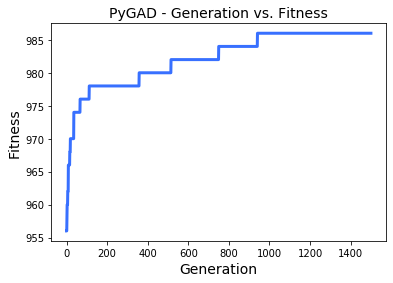

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 6 5 3 3 4 7 7 7 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 6 3 4 3 7 7 7 7 7 3]


 round:  247
elapsed time:  335.237092256546
best sol [0.83438625 0.13169017 0.94558322 0.94558322 0.37171391 0.77482701
 0.40006418 0.42322736 0.00778551 0.2896688  0.12748983 0.48668331
 0.28468542 0.58019467 0.09962521 0.09962521 0.89210657 0.77482701
 0.81904061 0.49607604 0.16487981 0.14864614 0.09962521 0.2787484
 0.28468542 0.39378566 0.62803387 0.96170879 0.40006418 0.57302892
 0.96170879 0.12748983 0.49607604 0.14864614 0.3983396 ]
fitness:  14.0


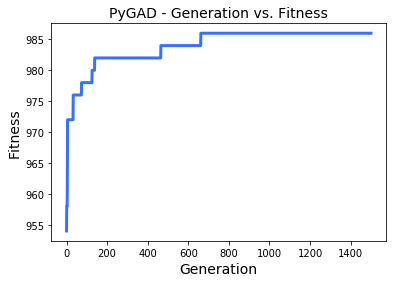

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 6 2 6 4 4 4 7 7 7 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 3 5 3 5 6 3 7 7 3]


 round:  248
elapsed time:  6118.013253927231
best sol [0.4858714  0.11477128 0.95784178 0.8419245  0.27485212 0.84827208
 0.80384268 0.46831527 0.07466418 0.96062    0.14181571 0.00938547
 0.10868718 0.4858714  0.11767502 0.1088359  0.86777869 0.95784178
 0.38642344 0.62472801 0.6496617  0.9329115  0.11767502 0.14181571
 0.45664171 0.97140123 0.14181571 0.78542274 0.62079822 0.45664171
 0.38263267 0.11767502 0.79923229 0.27820873 0.5068597 ]
fitness:  16.0


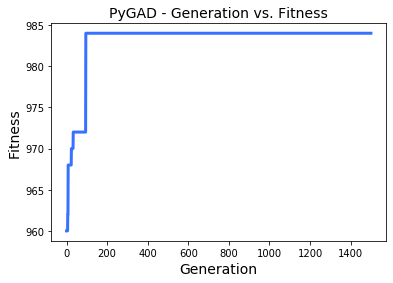

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 6 3 6 5 4 6 6 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 3 4 3 6 8 6 6 6 5]


 round:  249
elapsed time:  2125.5731320381165
best sol [0.77961756 0.09256973 0.6277343  0.693153   0.1249291  0.93298019
 0.66548106 0.79675222 0.11238893 0.00423074 0.00423074 0.05629122
 0.34236367 0.56367541 0.17086682 0.03882314 0.58661682 0.61598783
 0.98452213 0.65113268 0.47904887 0.98815306 0.0434788  0.59362011
 0.19547869 0.09412025 0.98815306 0.34236367 0.59362011 0.53841225
 0.9609121  0.59474736 0.03882314 0.58661682 0.01639248]
fitness:  18.0


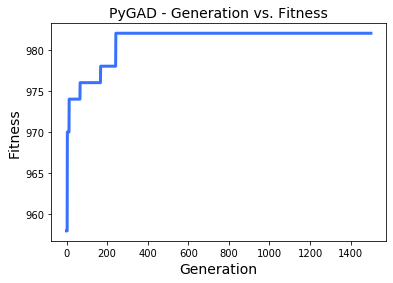

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 5 6 5 4 5 6 7 5 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 0 5 3 6 7 5 8 7 5]


 round:  250
elapsed time:  293.9538469314575
best sol [0.85904635 0.16858885 0.79260247 0.88652168 0.24593059 0.37858646
 0.9650624  0.47788184 0.03545719 0.03545719 0.15418919 0.26858654
 0.15572525 0.39271841 0.26858654 0.48521856 0.66569907 0.41604521
 0.3903718  0.60864317 0.1793846  0.26858654 0.3143004  0.19596312
 0.37858646 0.41604521 0.82682536 0.9846298  0.41604521 0.79260247
 0.35985988 0.24593059 0.14203519 0.82682536 0.14874952]
fitness:  14.0


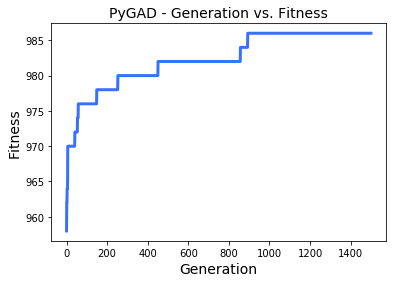

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 7 2 7 4 4 4 6 6 6 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 3 5 5 6 5 7 6 3]


 round:  251
elapsed time:  284.1766746044159
best sol [0.72543463 0.18521515 0.97751814 0.73244566 0.28626755 0.5590982
 0.81035502 0.43678576 0.13062733 0.81035502 0.14662252 0.24916053
 0.29515388 0.14654055 0.31826256 0.14654055 0.28626755 0.46469346
 0.76770424 0.57479022 0.14662252 0.98382051 0.45610442 0.2931337
 0.60404176 0.24916053 0.42957975 0.97751814 0.60404176 0.88071049
 0.93098055 0.17626907 0.24916053 0.20583217 0.24916053]
fitness:  14.0


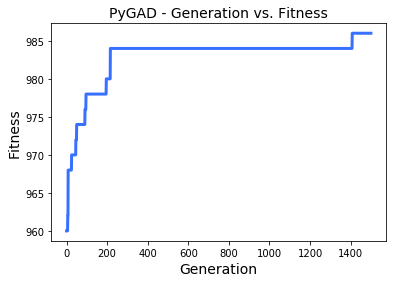

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 8 2 7 4 4 5 7 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 3 3 4 5 9 6 8 7 2]


 round:  252
elapsed time:  275.0460948944092
best sol [0.66775234 0.20540004 0.97848256 0.98854345 0.07206768 0.95956261
 0.14844347 0.6435975  0.5590662  0.10758461 0.14651418 0.16434064
 0.54285599 0.16724863 0.56400959 0.04352185 0.48020046 0.4342549
 0.27296761 0.84167122 0.00130845 0.67899653 0.16434064 0.10441518
 0.01643415 0.93632625 0.97592326 0.81300186 0.54009494 0.82852035
 0.95956261 0.16724863 0.16434064 0.97592326 0.00143203]
fitness:  14.0


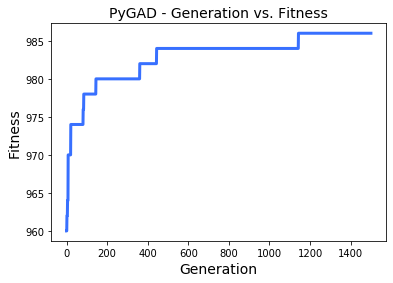

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 5 6 3 3 4 6 7 6 6]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 4 4 6 7 6 6 7 4]


 round:  253
elapsed time:  272.0406107902527
best sol [0.72153427 0.16255643 0.99827377 0.72054659 0.29391473 0.45862454
 0.67713918 0.45334956 0.17893466 0.01694161 0.10183774 0.23680475
 0.5692703  0.12720626 0.23680475 0.1324417  0.5692703  0.66895025
 0.45334956 0.56661518 0.5692703  0.96686161 0.66895025 0.25570875
 0.18681706 0.66895025 0.13791166 0.5692703  0.5692703  0.5692703
 0.76288077 0.12720626 0.23680475 0.53141229 0.22557772]
fitness:  12.0


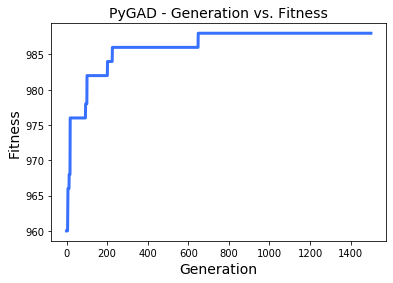

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 2 6 3 6 4 4 5 7 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 4 3 5 6 6 7 7 3]


 round:  254
elapsed time:  273.03067922592163
best sol [0.68196896 0.13529973 0.94539909 0.68171121 0.15030297 0.55642404
 0.50472802 0.44391143 0.04562592 0.34358298 0.16638351 0.24592036
 0.9208614  0.01922718 0.24871111 0.15974046 0.80750645 0.42712996
 0.61539915 0.61539915 0.01922718 0.78880325 0.94539909 0.15974046
 0.86949399 0.34358298 0.97171967 0.61539915 0.34358298 0.83732644
 0.80222647 0.16638351 0.24871111 0.48891538 0.34901314]
fitness:  16.0


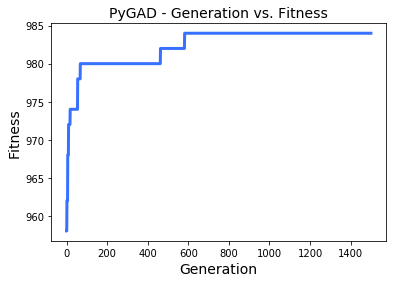

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 8 2 6 5 3 6 7 5 7 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 5 2 4 3 6 7 8 7 7 3]


 round:  255
elapsed time:  273.1245279312134
best sol [0.45048706 0.29383904 0.94416986 0.59443242 0.47673249 0.83228536
 0.32386336 0.47673249 0.14305864 0.18103518 0.40654514 0.1607353
 0.06019525 0.31640541 0.21915095 0.12680737 0.75961709 0.63244631
 0.49581362 0.63244631 0.18103518 0.49581362 0.7157475  0.14305864
 0.1607353  0.31640541 0.86948366 0.94416986 0.38413949 0.54158164
 0.83228536 0.15672028 0.4475531  0.79431319 0.11107101]
fitness:  20.0


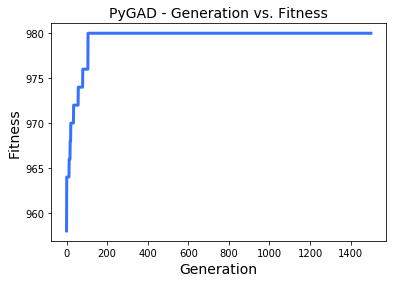

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [5 4 7 3 7 4 4 6 7 7 5 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [8 6 5 3 3 3 6 6 6 6 7 4]


 round:  256
elapsed time:  271.7883756160736
best sol [0.79546497 0.00330421 0.82271082 0.96088016 0.48290862 0.69328226
 0.97151803 0.40999716 0.02094138 0.27034272 0.1307117  0.01934673
 0.34157111 0.60231785 0.82271082 0.06891376 0.33775901 0.39182816
 0.40999716 0.60231785 0.82271082 0.96088016 0.18798603 0.48290862
 0.1307117  0.196488   0.90493292 0.39182816 0.84298163 0.48290862
 0.90493292 0.19782316 0.27034272 0.06891376 0.43794392]
fitness:  16.0


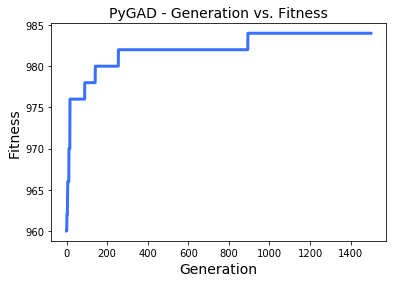

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 6 4 7 4 5 6 5 6 6 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 4 3 5 7 6 8 7 3]


 round:  257
elapsed time:  272.7942991256714
best sol [0.66483191 0.21162248 0.7184494  0.72062369 0.0650387  0.74922671
 0.94264826 0.63894226 0.21280548 0.21280548 0.05859187 0.12284438
 0.5854085  0.28861491 0.25434051 0.21162248 0.55261165 0.63894226
 0.63894226 0.57011835 0.21609175 0.97673746 0.02906145 0.21609175
 0.52602904 0.43419484 0.92743695 0.53080265 0.43419484 0.68468857
 0.92743695 0.25434051 0.0650387  0.57011835 0.0650387 ]
fitness:  12.0


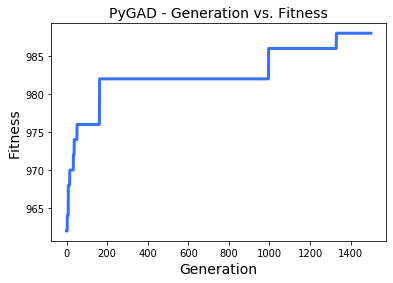

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 6 7 3 6 4 3 4 6 7 7 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 4 4 5 7 5 7 7 3]


 round:  258
elapsed time:  272.254212141037
best sol [0.78891183 0.10432548 0.96832176 0.93793963 0.21170092 0.46923171
 0.46923171 0.34803259 0.25592886 0.18814554 0.10432548 0.28653413
 0.17000027 0.61975398 0.25592886 0.29672245 0.61975398 0.46923171
 0.61975398 0.34803259 0.16075064 0.16075064 0.16077151 0.21116921
 0.81402076 0.18814554 0.96832176 0.93793963 0.46923171 0.93793963
 0.77633148 0.25592886 0.61975398 0.23618568 0.07279776]
fitness:  12.0


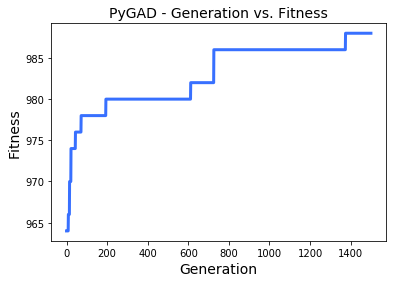

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 7 2 6 3 4 4 7 6 8 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 3 4 4 3 7 5 7 7 3]


 round:  259
elapsed time:  273.6967432498932
best sol [6.81699517e-01 2.42900059e-01 7.74638591e-01 9.26409392e-01
 2.41828737e-01 9.78512644e-01 3.51585327e-01 3.51585327e-01
 1.56243632e-01 1.07081029e-01 1.42875750e-01 3.39370235e-01
 1.42875750e-01 1.03148477e-01 2.41828737e-01 1.14034952e-01
 3.51585327e-01 1.03148477e-01 8.76810550e-01 6.02190813e-01
 2.41828737e-01 1.18251622e-01 4.94468460e-01 3.51585327e-01
 7.31690461e-01 2.41828737e-01 8.76810550e-01 9.26409392e-01
 4.94468460e-01 8.32872895e-01 9.78512644e-01 1.05638171e-01
 5.74681187e-01 7.14727883e-01 8.23446077e-04]
fitness:  14.0


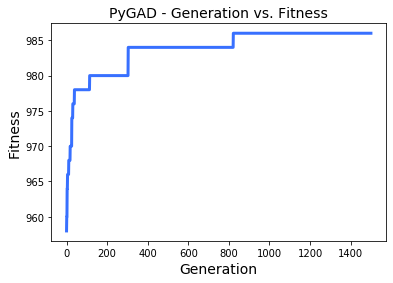

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 5 7 2 7 4 4 3 6 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 6 2 3 3 4 7 5 8 7 4]


 round:  260
elapsed time:  273.1512060165405
best sol [0.92164728 0.24992933 0.94400659 0.92164728 0.24111279 0.86732665
 0.07454663 0.3292717  0.07454663 0.03661958 0.03661958 0.07454663
 0.03661958 0.72477276 0.24992933 0.03661958 0.68643135 0.3292717
 0.4746545  0.92164728 0.68643135 0.4746545  0.33429013 0.14624011
 0.7020853  0.11937705 0.92164728 0.94632752 0.24111279 0.82988251
 0.77561487 0.18736016 0.22205152 0.82988251 0.16193512]
fitness:  14.0


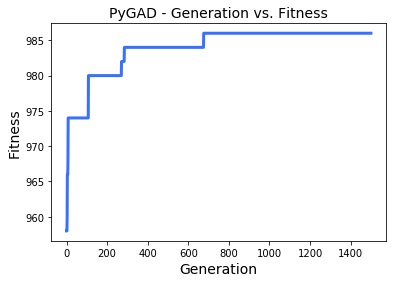

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 7 3 6 3 4 5 7 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 6 1 4 1 7 7 8 6 6 3]


 round:  261
elapsed time:  273.9404408931732
best sol [0.13972365 0.14279216 0.99459817 0.98016737 0.16743235 0.68934073
 0.58064871 0.63842891 0.19106526 0.04722164 0.13678205 0.40728475
 0.13307192 0.30874841 0.24739191 0.19106526 0.28790709 0.38908354
 0.87607016 0.7477114  0.13307192 0.93143494 0.30874841 0.13678205
 0.40728475 0.43735604 0.97847121 0.77394641 0.70464852 0.83196655
 0.97847121 0.45666598 0.63842891 0.13819253 0.58549529]
fitness:  16.0


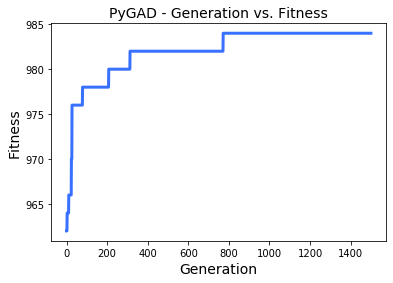

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 7 6 6 4 4 4 8 7 7 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 4 4 6 9 6 8 7 4]


 round:  262
elapsed time:  273.5520451068878
best sol [0.75296728 0.08699387 0.95234511 0.88411884 0.19625208 0.93223499
 0.15089842 0.32711962 0.15089842 0.13250698 0.02951591 0.03157271
 0.02951591 0.23199503 0.21531581 0.15089842 0.72117123 0.59189383
 0.14039097 0.87551423 0.15089842 0.36156042 0.03131367 0.59189383
 0.49031747 0.87551423 0.93223499 0.95363465 0.59189383 0.95363465
 0.66005552 0.15089842 0.03157271 0.79178887 0.36782919]
fitness:  14.0


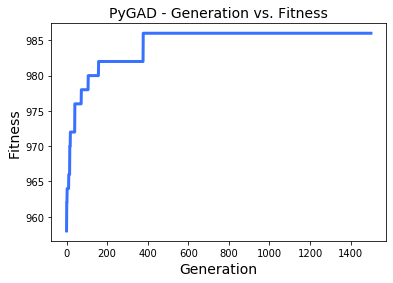

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 2 7 6 4 3 7 6 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [ 6  7  6  1  1  3  6  7  6 10  7  4]


 round:  263
elapsed time:  282.89678502082825
best sol [0.73513006 0.09647257 0.92544361 0.76999408 0.29929871 0.36853002
 0.10888443 0.318694   0.05180724 0.39277507 0.09257702 0.29929871
 0.0483946  0.76999408 0.29929871 0.29929871 0.9064099  0.39277507
 0.19769122 0.44575709 0.75633578 0.0483946  0.05180724 0.09918594
 0.76539235 0.95781856 0.66876153 0.96538602 0.61529741 0.68755198
 0.92544361 0.15336824 0.13113322 0.68117355 0.302518  ]
fitness:  16.0


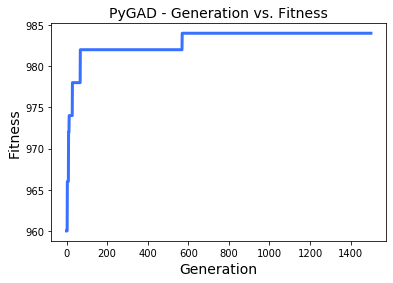

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 6 2 7 3 4 5 7 6 7 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 3 3 4 4 4 6 6 8 7 4]


 round:  264
elapsed time:  280.77695393562317
best sol [0.18193517 0.1367287  0.77489886 0.95897191 0.17234318 0.87360901
 0.77021126 0.8738622  0.07275847 0.10050761 0.14281383 0.277176
 0.33809933 0.3188119  0.53750641 0.00607018 0.56486659 0.5066522
 0.91185729 0.91185729 0.5066522  0.35759985 0.08407724 0.09663895
 0.49085016 0.23170981 0.95388366 0.95897191 0.5115161  0.95897191
 0.95897191 0.16247754 0.64820436 0.15764956 0.42772124]
fitness:  14.0


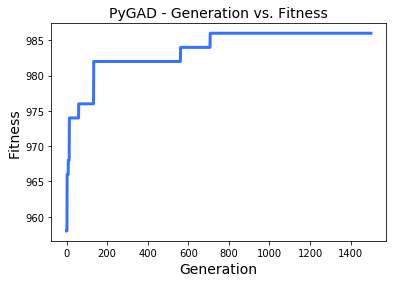

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 9 6 7 3 4 2 6 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 8 6 1 4 4 7 7 6 7 7 3]


 round:  265
elapsed time:  275.690242767334
best sol [0.23435021 0.14122844 0.93093774 0.62722927 0.08145603 0.86768015
 0.66960892 0.84412409 0.08255831 0.60412781 0.14122844 0.08145603
 0.08255831 0.61976025 0.08145603 0.08255831 0.79599471 0.86768015
 0.70285012 0.44780797 0.1273794  0.98561555 0.70285012 0.17912877
 0.61976025 0.98561555 0.41465088 0.26300732 0.19227483 0.92198627
 0.26300732 0.28019454 0.62125179 0.26300732 0.08145603]
fitness:  16.0


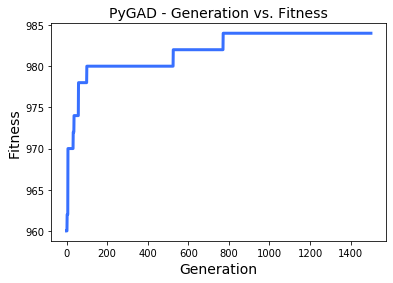

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 5 2 4 4 4 6 8 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 4 3 5 6 6 7 6 3]


 round:  266
elapsed time:  273.7913839817047
best sol [0.80981545 0.08873402 0.77818509 0.68442598 0.31602815 0.90144526
 0.9693679  0.48304188 0.04894738 0.09552489 0.02402941 0.29979813
 0.65383201 0.4400708  0.29979813 0.01314605 0.00530068 0.35346437
 0.68442598 0.71055764 0.90144526 0.9693679  0.04894738 0.2662774
 0.31602815 0.39797377 0.62673307 0.68442598 0.35346437 0.52711868
 0.94135235 0.14865777 0.35346437 0.00302848 0.69910609]
fitness:  14.0


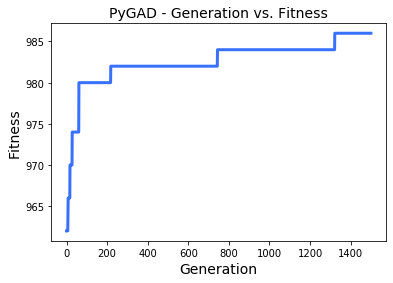

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 4 7 3 4 4 6 8 4 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 5 2 5 7 7 6 7 3]


 round:  267
elapsed time:  278.92365431785583
best sol [0.72168759 0.21124205 0.94119036 0.74725684 0.27128106 0.36048452
 0.89693537 0.49205429 0.02067699 0.00391491 0.14469607 0.17547524
 0.21124205 0.32349703 0.42914328 0.02067699 0.79119553 0.95767518
 0.79119553 0.61098741 0.30782927 0.7637059  0.14089115 0.15392487
 0.23637676 0.12727433 0.79119553 0.64821915 0.74725684 0.74725684
 0.7637059  0.23637676 0.21124205 0.42914328 0.72845698]
fitness:  12.0


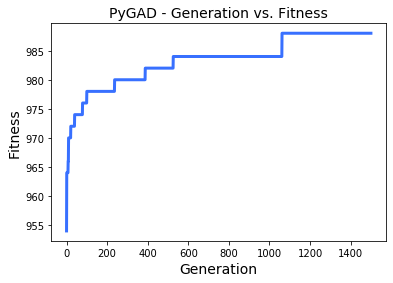

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 7 3 6 3 3 6 7 6 7 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 4 3 6 6 6 7 6 3]


 round:  268
elapsed time:  291.9611761569977
best sol [0.72700717 0.08668042 0.66435747 0.99532921 0.23821882 0.65419639
 0.68863388 0.63164379 0.16896321 0.03883347 0.01847733 0.37678597
 0.22684868 0.3278604  0.24221054 0.07667778 0.92640089 0.93172945
 0.41659148 0.57081502 0.32991602 0.98439571 0.24221054 0.16896321
 0.4160711  0.58306858 0.80757632 0.92640089 0.13232454 0.72865303
 0.65419639 0.23821882 0.22959193 0.44865723 0.58852635]
fitness:  16.0


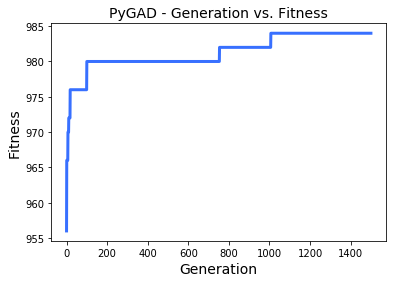

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 7 4 6 4 3 6 6 7 8 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 3 4 3 6 9 6 7 6 3]


 round:  269
elapsed time:  281.99813890457153
best sol [0.79896261 0.04859863 0.97448126 0.15138806 0.43931618 0.87449011
 0.49274166 0.75778165 0.15138806 0.60105721 0.32423828 0.43931618
 0.60718242 0.49674581 0.14298929 0.14298929 0.72245599 0.48197939
 0.39929347 0.76258075 0.00234759 0.75778165 0.00234759 0.01894705
 0.65481898 0.65481898 0.97448126 0.49274166 0.49217401 0.58815283
 0.77159354 0.28632869 0.32423828 0.00234759 0.53508508]
fitness:  16.0


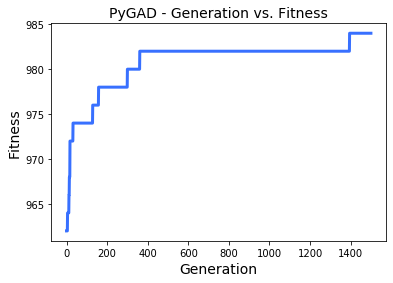

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 6 5 6 4 4 4 8 7 6 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 5 4 2 6 6 6 7 7 3]


 round:  270
elapsed time:  284.29061675071716
best sol [0.85742812 0.12443614 0.98736251 0.98027885 0.32389773 0.75623828
 0.15615886 0.48487922 0.45324881 0.23002478 0.04807963 0.24640178
 0.48487922 0.75623828 0.33342693 0.18104376 0.65697108 0.20541236
 0.82184912 0.57844387 0.12443614 0.56087953 0.18104376 0.15615886
 0.65490146 0.48487922 0.98027885 0.94076986 0.45324881 0.82184912
 0.92236929 0.15166012 0.45436369 0.49849587 0.09089609]
fitness:  12.0


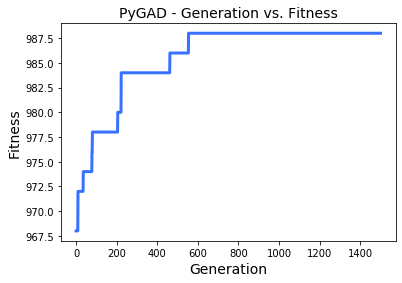

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 2 7 4 5 5 6 7 7 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 3 7 3 5 7 6 7 7 3]


 round:  271
elapsed time:  277.78095602989197
best sol [0.69547809 0.18310004 0.89529171 0.94394942 0.33503406 0.81389939
 0.11669896 0.42519931 0.20685805 0.02265727 0.06839825 0.20685805
 0.24404117 0.45919946 0.27395643 0.31678085 0.1261867  0.85581182
 0.25571338 0.54753606 0.1261867  0.19784591 0.25571338 0.19784591
 0.60016695 0.92744302 0.89529171 0.82394316 0.5114363  0.89529171
 0.76894348 0.45919946 0.5114363  0.45919946 0.09922863]
fitness:  16.0


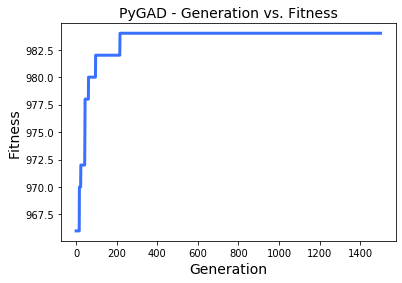

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 6 2 6 4 3 3 6 7 8 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 5 1 4 4 3 6 6 8 7 4]


 round:  272
elapsed time:  278.9622449874878
best sol [0.649827   0.04705407 0.83074735 0.76769764 0.22001737 0.24573687
 0.90525273 0.67725893 0.08852193 0.03571922 0.08852193 0.22001737
 0.36647996 0.4335362  0.45393099 0.1336368  0.48575013 0.08852193
 0.76129559 0.84425044 0.18647128 0.96410547 0.70399523 0.22964976
 0.93975937 0.26173392 0.58489932 0.40574898 0.41228318 0.80844357
 0.60323143 0.0715713  0.5262685  0.73752304 0.08852193]
fitness:  16.0


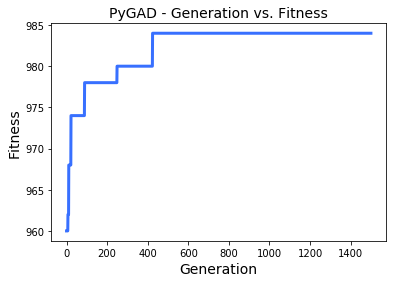

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 3 6 3 5 4 4 5 7 7 4 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [5 7 6 1 3 3 6 6 6 7 6 3]


 round:  273
elapsed time:  279.9265367984772
best sol [0.8544426  0.1309849  0.88426921 0.95918801 0.27003019 0.32664985
 0.93154161 0.32664985 0.00913876 0.09157572 0.1309849  0.25381859
 0.22395754 0.82341222 0.26169914 0.1309849  0.95918801 0.75294672
 0.64318624 0.24369565 0.49000698 0.13145854 0.27903946 0.24369565
 0.13145854 0.20091788 0.95918801 0.92376124 0.61336092 0.93154161
 0.78603482 0.25381859 0.61336092 0.00913876 0.65515657]
fitness:  12.0


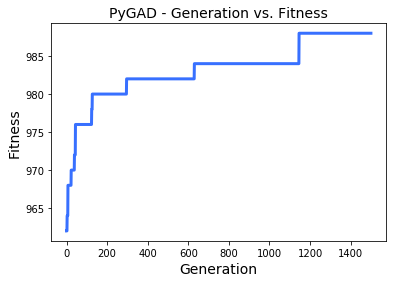

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 6 7 3 6 3 4 4 6 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 6 4 4 7 6 6 7 3]


 round:  274
elapsed time:  278.7843029499054
best sol [0.76823957 0.27287861 0.97484804 0.70050834 0.30706391 0.80235624
 0.21314504 0.24971627 0.10112744 0.14234647 0.16556268 0.22474886
 0.35738514 0.14234647 0.18622631 0.04408492 0.89216296 0.4598788
 0.22474886 0.53377662 0.10112744 0.35738514 0.10112744 0.14234647
 0.70050834 0.97484804 0.97484804 0.95069705 0.16556268 0.21314504
 0.96951602 0.11022818 0.27267151 0.11090826 0.43962878]
fitness:  16.0


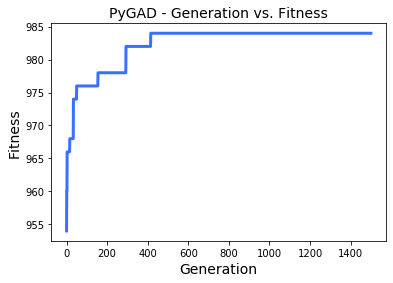

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 8 2 5 3 4 3 4 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 6 6 2 2 2 5 7 6 6 7 3]


 round:  275
elapsed time:  282.2140440940857
best sol [0.74420414 0.12252078 0.98627937 0.8729148  0.53705439 0.87719302
 0.41382099 0.41382099 0.41382099 0.14648787 0.14648787 0.14648787
 0.24938073 0.17696597 0.24938073 0.25457497 0.11272655 0.71324358
 0.41382099 0.70488183 0.05614595 0.39518721 0.11272655 0.41382099
 0.378393   0.41382099 0.86933791 0.98627937 0.41382099 0.86933791
 0.93407211 0.21748612 0.24938073 0.378393   0.3075248 ]
fitness:  16.0


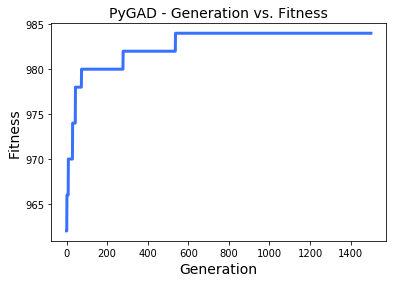

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 4 7 3 7 4 4 4 6 7 7 6]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 6 3 4 4 5 6 5 8 7 3]


 round:  276
elapsed time:  281.43788623809814
best sol [0.7522304  0.2320666  0.89576325 0.89783535 0.2234747  0.89576325
 0.16284163 0.48655455 0.20625598 0.18125926 0.16284163 0.2320666
 0.35336985 0.38237144 0.13743786 0.22587261 0.9726647  0.21107256
 0.6623429  0.46601376 0.2234747  0.13743786 0.33556758 0.48655455
 0.49568658 0.46601376 0.85037777 0.99812213 0.46601376 0.94270413
 0.99812213 0.25310341 0.22587261 0.67422321 0.22587261]
fitness:  14.0


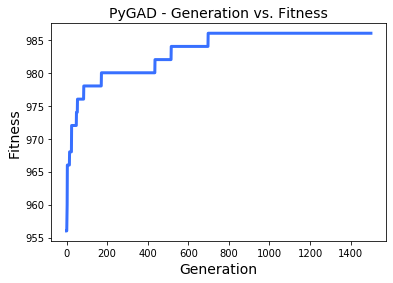

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 7 1 6 5 4 4 7 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 5 2 3 3 5 6 5 9 7 3]


 round:  277
elapsed time:  296.65495777130127
best sol [0.74964232 0.15433813 0.96963601 0.97622028 0.18159734 0.92152008
 0.16139395 0.328592   0.07997406 0.18159734 0.04655806 0.2088485
 0.36098729 0.86225312 0.32804984 0.1742121  0.04203751 0.75494549
 0.12381299 0.72535456 0.24230981 0.30078074 0.16139395 0.328592
 0.328592   0.97622028 0.92655372 0.93824361 0.47446675 0.328592
 0.75494549 0.18439371 0.2088485  0.27996893 0.2555679 ]
fitness:  12.0


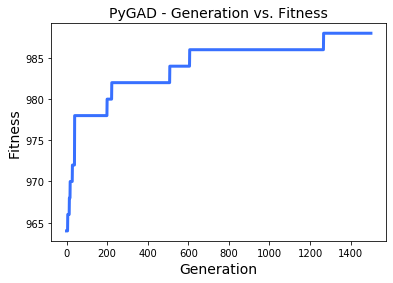

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 7 2 7 4 4 4 5 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 6 3 4 6 5 7 7 3]


 round:  278
elapsed time:  286.3269672393799
best sol [0.85582928 0.09788881 0.9701295  0.67523019 0.21114173 0.31355042
 0.83070208 0.43590957 0.17816857 0.02701652 0.11153715 0.43590957
 0.85507079 0.21114173 0.36576016 0.02701652 0.32485586 0.43729123
 0.43590957 0.50698138 0.42653708 0.85507079 0.41357762 0.17880484
 0.69757349 0.64206881 0.63879145 0.88557571 0.54390039 0.17880484
 0.85507079 0.42653708 0.0129031  0.85507079 0.21519394]
fitness:  14.0


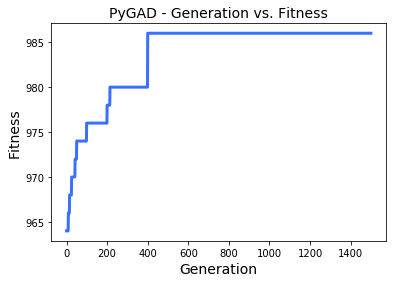

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 7 5 7 3 3 5 7 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 4 2 5 7 8 7 7 5]


 round:  279
elapsed time:  281.96459579467773
best sol [0.48490283 0.08853151 0.78413418 0.13980799 0.03175679 0.82345914
 0.82821047 0.9109123  0.13980799 0.13980799 0.106919   0.21154787
 0.01490654 0.22702979 0.01490654 0.17187219 0.82821047 0.77769887
 0.97028631 0.68982823 0.23512903 0.82345914 0.68982823 0.22702979
 0.79047217 0.13980799 0.86671183 0.39887365 0.40502551 0.21010207
 0.86671183 0.21010207 0.73636891 0.01272568 0.77769887]
fitness:  18.0


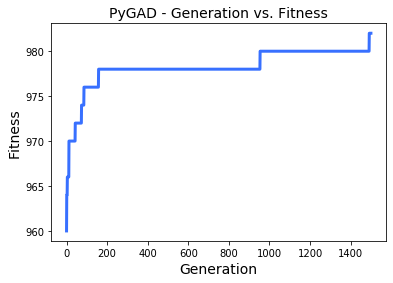

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 5 3 6 4 4 4 4 7 7 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 5 2 3 3 7 5 6 6 7 3]


 round:  280
elapsed time:  274.5536479949951
best sol [0.76713896 0.12735629 0.91246438 0.91246438 0.0368618  0.7862937
 0.12314959 0.51706365 0.14730782 0.04493792 0.06913619 0.26344864
 0.22047508 0.4807009  0.6235273  0.28115404 0.63571306 0.14730782
 0.80264906 0.28115404 0.00467059 0.63571306 0.12314959 0.12314959
 0.6235273  0.59813701 0.97803888 0.91246438 0.4807009  0.37565496
 0.98129765 0.22047508 0.15533737 0.81476675 0.20296654]
fitness:  16.0


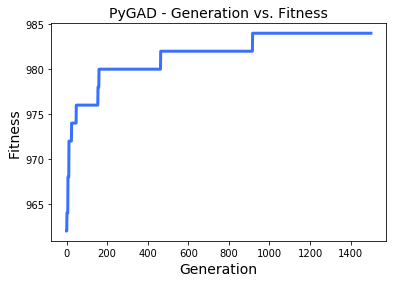

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 5 6 3 5 3 4 4 6 7 6 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 3 5 3 7 5 7 7 3]


 round:  281
elapsed time:  274.5813958644867
best sol [0.87295031 0.32392594 0.77359059 0.96495188 0.19244096 0.96495188
 0.30548651 0.33200827 0.1042251  0.49300949 0.06389966 0.01199406
 0.18360761 0.59346526 0.49300949 0.01199406 0.33200827 0.59346526
 0.49300949 0.5206523  0.96495188 0.93621701 0.06902785 0.01199406
 0.18360761 0.48580003 0.93714556 0.5206523  0.47831074 0.59346526
 0.95033227 0.29819045 0.74572995 0.65558268 0.20284152]
fitness:  14.0


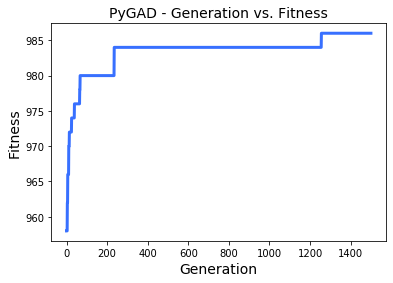

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 6 7 2 7 3 4 5 7 7 6 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 6 2 4 2 5 7 7 5 7 4]


 round:  282
elapsed time:  272.50740098953247
best sol [0.70941135 0.01986162 0.71924074 0.88623072 0.42704234 0.77592386
 0.28818445 0.43033961 0.1587874  0.39216363 0.08212625 0.24151865
 0.24700708 0.78743973 0.24151865 0.1764038  0.15639373 0.53122104
 0.33672855 0.6765684  0.21822457 0.2139249  0.6765684  0.24151865
 0.42704234 0.58002258 0.92658378 0.98886632 0.39216363 0.92658378
 0.81393096 0.04488526 0.58002258 0.58464949 0.1587874 ]
fitness:  14.0


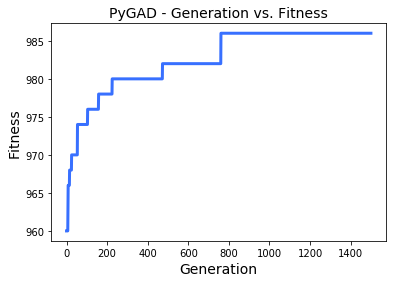

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 7 3 6 4 3 5 7 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 3 5 3 4 7 5 8 7 3]


 round:  283
elapsed time:  273.27300119400024
best sol [0.65117722 0.19027757 0.93441081 0.93441081 0.32358433 0.79120868
 0.02648155 0.47539437 0.21095736 0.73597742 0.01018786 0.18467695
 0.31830092 0.44611411 0.18667351 0.05893719 0.25317385 0.47731639
 0.64564029 0.6192214  0.47539437 0.64712791 0.47539437 0.12629831
 0.47731639 0.49374256 0.39525663 0.69103001 0.50843802 0.41369867
 0.91155328 0.06653324 0.02142016 0.82852765 0.64712791]
fitness:  12.0


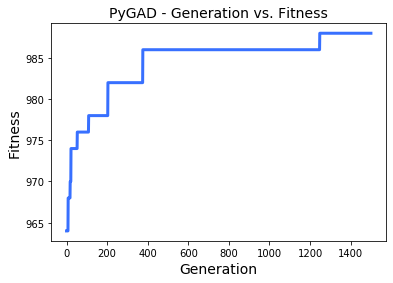

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 1 5 3 3 5 6 7 7 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 3 4 3 5 5 6 6 7 3]


 round:  284
elapsed time:  272.9839951992035
best sol [6.46178188e-01 1.67033721e-01 9.29549947e-01 4.26478315e-01
 3.02566817e-01 9.86207140e-01 5.98723092e-01 3.25269665e-01
 5.79369938e-04 8.44265317e-02 1.94716791e-01 4.59616330e-01
 2.61449599e-01 4.59616330e-01 4.43367436e-01 5.79369938e-04
 4.43367436e-01 7.07312193e-01 6.28393403e-01 9.33128607e-01
 2.62914701e-01 7.90555805e-01 2.61449599e-01 9.02974254e-02
 4.59616330e-01 2.47182175e-01 6.28393403e-01 9.57023876e-01
 5.73616816e-01 9.12404086e-01 9.97363159e-01 1.94716791e-01
 3.02566817e-01 8.86262328e-02 5.73616816e-01]
fitness:  16.0


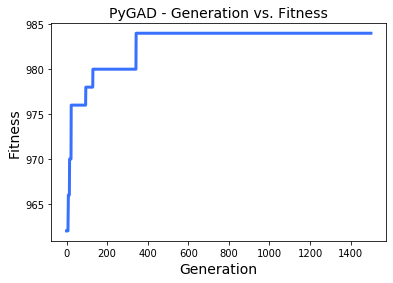

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 8 5 7 3 4 4 9 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 6 3 4 3 8 8 8 7 7 3]


 round:  285
elapsed time:  300.324205160141
best sol [0.89040987 0.20146396 0.9271093  0.68002091 0.04913225 0.87703876
 0.28655043 0.47331052 0.10778593 0.31515202 0.04913225 0.04913225
 0.33759041 0.84723476 0.21407302 0.04120382 0.59386805 0.87814458
 0.69882786 0.68002091 0.54288576 0.33227986 0.04913225 0.20534808
 0.42514167 0.32401112 0.90611622 0.9271093  0.59816629 0.91757483
 0.58634196 0.25337291 0.13892577 0.34818966 0.01166629]
fitness:  14.0


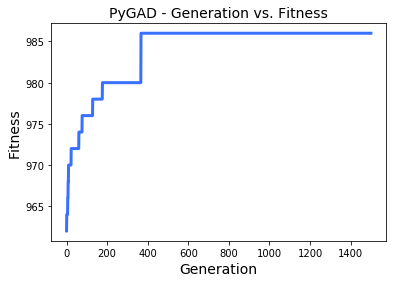

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 5 7 4 7 3 4 3 7 6 7 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 6 3 6 3 6 7 6 7 6 2]


 round:  286
elapsed time:  304.1677100658417
best sol [0.80414179 0.26794534 0.78424377 0.92818871 0.24693928 0.84871449
 0.06753225 0.27912606 0.14475066 0.22456232 0.13870872 0.47349723
 0.0510982  0.80414179 0.20865563 0.13408472 0.84871449 0.76876227
 0.40702108 0.64111434 0.45930722 0.24693928 0.06879534 0.06753225
 0.76008959 0.63583147 0.97134655 0.99821829 0.39451999 0.75234936
 0.97134655 0.14731772 0.06753225 0.32948364 0.33732   ]
fitness:  14.0


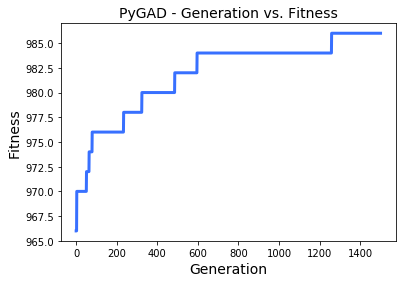

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 2 6 4 3 4 6 7 9 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 6 5 3 5 3 6 7 5 7 7 3]


 round:  287
elapsed time:  293.0974600315094
best sol [0.45343414 0.10113379 0.93080688 0.69260551 0.36644828 0.89748457
 0.95639831 0.32597767 0.20170844 0.5498267  0.02905475 0.06624783
 0.37724058 0.43269834 0.01827591 0.27971737 0.98064327 0.89989734
 0.69260551 0.50417991 0.16213414 0.5498267  0.5498267  0.24500026
 0.16213414 0.72091859 0.89748457 0.99136774 0.48406265 0.99136774
 0.3128475  0.10442574 0.15159202 0.39255409 0.89989734]
fitness:  16.0


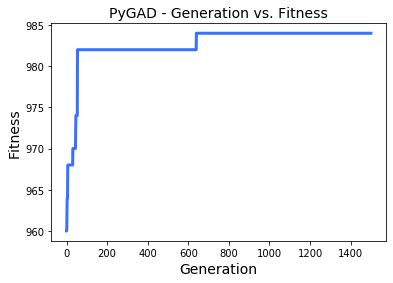

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 7 7 3 7 4 4 5 7 6 6 6]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 7 3 5 4 6 7 7 7 7 3]


 round:  288
elapsed time:  288.6211287975311
best sol [0.6889374  0.07663076 0.85913397 0.99423202 0.01009382 0.29270584
 0.81680369 0.59541593 0.12235433 0.09851031 0.00967308 0.31810383
 0.12533759 0.67090035 0.45704005 0.1313606  0.42484513 0.85914637
 0.59541593 0.69118522 0.79152282 0.99423202 0.85913397 0.09851031
 0.16381389 0.49922345 0.94377159 0.46787561 0.59541593 0.80421213
 0.46201278 0.23519764 0.63148788 0.1178649  0.12533759]
fitness:  14.0


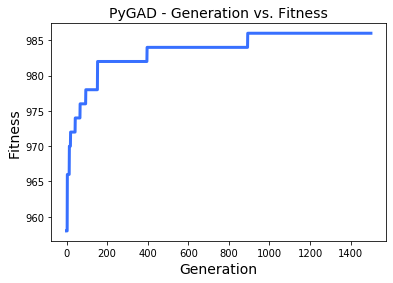

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 6 4 7 4 4 4 7 7 6 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 5 3 6 7 8 7 6 2]


 round:  289
elapsed time:  283.13770818710327
best sol [0.50591045 0.21688083 0.90604236 0.75643765 0.19144362 0.37790355
 0.96029488 0.42000849 0.12922184 0.00712326 0.14724047 0.20435394
 0.41010789 0.41010789 0.21688083 0.17769053 0.92237166 0.41010789
 0.96029488 0.62543124 0.20435394 0.47615271 0.19120723 0.29228739
 0.62543124 0.38659569 0.38659569 0.9205013  0.38659569 0.38659569
 0.97861123 0.25615903 0.58830456 0.09907138 0.61868012]
fitness:  14.0


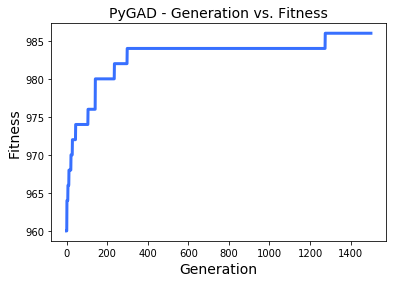

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 8 3 7 4 5 4 5 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 6 1 5 4 6 6 5 7 7 3]


 round:  290
elapsed time:  289.86278915405273
best sol [0.85492113 0.28146151 0.8812711  0.97251043 0.10784653 0.30189168
 0.82402358 0.49551427 0.29025474 0.10784653 0.04567318 0.00473272
 0.20364336 0.68246883 0.00473272 0.55063822 0.68288035 0.20364336
 0.8812711  0.68246883 0.04567318 0.13715475 0.37187196 0.20364336
 0.64842957 0.20364336 0.8812711  0.97251043 0.42930831 0.8812711
 0.82402358 0.14608034 0.19673761 0.68246883 0.00450082]
fitness:  14.0


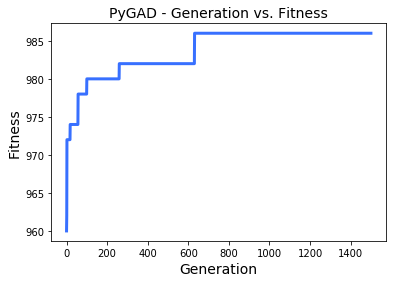

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 5 7 3 7 4 3 4 8 5 7 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 6 6 1 5 5 6 7 6 7 7 3]


 round:  291
elapsed time:  297.8762900829315
best sol [0.39916256 0.08675434 0.86949314 0.98101595 0.13582516 0.2661581
 0.98101595 0.33728049 0.15071401 0.10690774 0.12966659 0.13582516
 0.34860528 0.56053332 0.09629467 0.12966659 0.49544216 0.37637973
 0.4336546  0.22281076 0.53477548 0.3981715  0.53477548 0.13582516
 0.14167552 0.18965413 0.64803473 0.95289929 0.56053332 0.95289929
 0.83019236 0.25394672 0.36613416 0.3981715  0.36613416]
fitness:  18.0


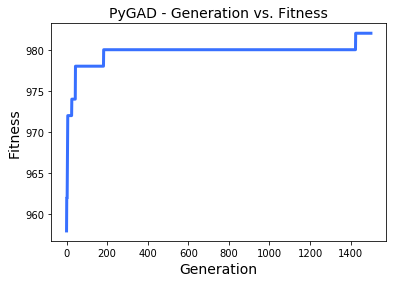

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [5 5 6 3 6 3 4 4 6 6 6 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 4 2 3 6 7 6 7 4]


 round:  292
elapsed time:  291.8419370651245
best sol [0.86819761 0.20290095 0.90813199 0.52074437 0.09361713 0.70454764
 0.70454764 0.5717108  0.35332423 0.01293108 0.12003337 0.13048941
 0.09361713 0.52074437 0.42813353 0.31368926 0.0538445  0.12003337
 0.37568428 0.90813199 0.13048941 0.95077774 0.60761525 0.31368926
 0.52074437 0.66804973 0.72851278 0.70454764 0.42813353 0.31368926
 0.90492217 0.17640329 0.20290095 0.55918511 0.13184433]
fitness:  16.0


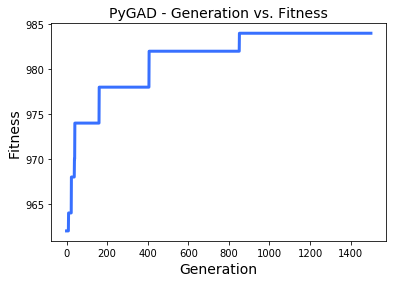

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 7 3 6 4 4 5 7 7 3 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 6 2 3 3 5 7 6 8 7 3]


 round:  293
elapsed time:  291.15748715400696
best sol [0.65647236 0.30428103 0.90833165 0.87935919 0.14089839 0.90833165
 0.06744864 0.36397469 0.10163911 0.05232116 0.14396961 0.26871026
 0.33604417 0.65647236 0.20197548 0.15122201 0.36397469 0.5080638
 0.58274886 0.83054623 0.74119022 0.30423842 0.36397469 0.21020529
 0.21020529 0.83054623 0.99746711 0.98193999 0.33604417 0.76291744
 0.98193999 0.63929627 0.58394178 0.47921971 0.05822204]
fitness:  14.0


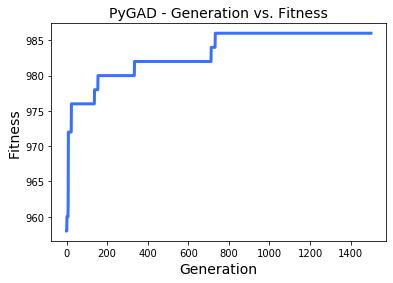

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 9 4 6 4 4 4 6 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 6 1 4 3 7 7 6 6 7 5]


 round:  294
elapsed time:  290.96087098121643
best sol [0.90593385 0.1821974  0.96026151 0.68494054 0.20572198 0.85019661
 0.20681875 0.31139221 0.18083094 0.18083094 0.14693608 0.20572198
 0.74282302 0.31139221 0.91182604 0.0616017  0.74282302 0.24134506
 0.74282302 0.67759672 0.2299123  0.85782278 0.74282302 0.30557325
 0.85019661 0.16231565 0.74152468 0.74152468 0.31139221 0.67759672
 0.85019661 0.20572198 0.48737389 0.2776134  0.06725264]
fitness:  14.0


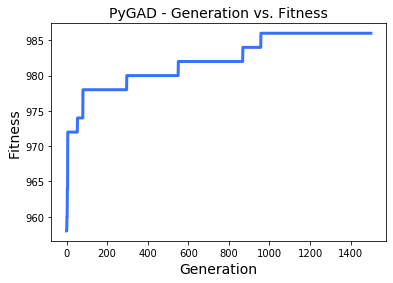

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 7 4 7 3 5 5 7 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 3 5 4 6 6 7 7 6 3]


 round:  295
elapsed time:  284.39521312713623
best sol [0.63723484 0.00753452 0.95142899 0.99575388 0.29382676 0.90131055
 0.68010644 0.35601311 0.03917413 0.25756569 0.12288287 0.12288287
 0.25756569 0.35601311 0.03917413 0.2826647  0.68010644 0.57480989
 0.41987757 0.37829202 0.12571416 0.79497155 0.41987757 0.1815608
 0.59412839 0.81571291 0.68010644 0.96506402 0.57019614 0.25219199
 0.68010644 0.1815608  0.1815608  0.36860208 0.50342559]
fitness:  16.0


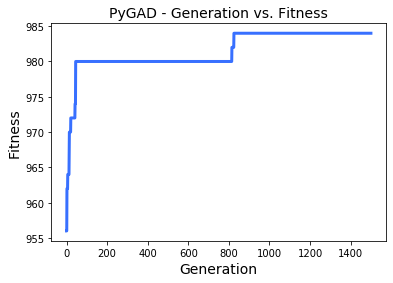

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 3 7 2 6 4 4 5 6 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [5 7 7 2 3 3 4 8 6 7 6 3]


 round:  296
elapsed time:  305.3025658130646
best sol [0.80679161 0.1565966  0.95689573 0.78114651 0.18065695 0.94227334
 0.47294694 0.44817229 0.1484201  0.11995395 0.04279183 0.22612373
 0.44725906 0.21089037 0.3763498  0.00671031 0.19030897 0.7322711
 0.6427441  0.80679161 0.22612373 0.81538211 0.35568664 0.6427441
 0.14760379 0.15615097 0.99537583 0.7322711  0.19030897 0.77984234
 0.95689573 0.18423112 0.19030897 0.71298199 0.12398841]
fitness:  10.0


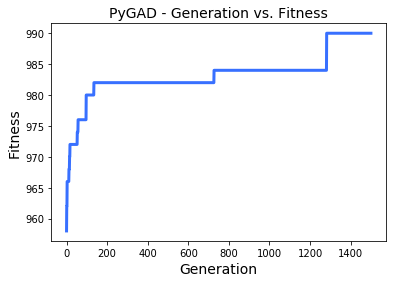

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 7 3 5 5 3 5 7 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 4 3 6 7 6 7 7 3]


 round:  297
elapsed time:  292.48362708091736
best sol [0.68622754 0.10759658 0.89477729 0.75027409 0.11350347 0.87868459
 0.10759658 0.48482219 0.27882842 0.34993743 0.11131926 0.21206448
 0.69212775 0.25560204 0.48482219 0.54758125 0.0555325  0.25704666
 0.25560204 0.54658698 0.10816426 0.75027409 0.21206448 0.0555325
 0.7552141  0.75027409 0.99821866 0.62343368 0.54658698 0.54658698
 0.93727991 0.21206448 0.34993743 0.28826988 0.4789466 ]
fitness:  16.0


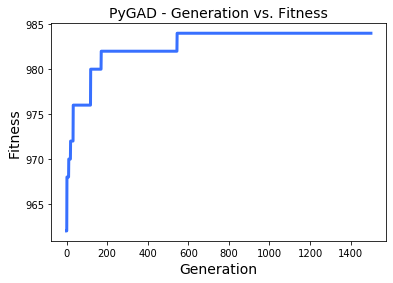

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 7 1 7 4 4 4 6 7 6 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 4 3 4 5 3 7 6 7 7 4]


 round:  298
elapsed time:  288.83176279067993
best sol [0.74026645 0.07181429 0.81843472 0.99795302 0.1072437  0.28402533
 0.69034964 0.69034964 0.12615847 0.13516159 0.00512902 0.03524449
 0.11424438 0.61991885 0.75019897 0.06506655 0.54944424 0.69034964
 0.55445375 0.27230708 0.07298452 0.99795302 0.26503344 0.00512902
 0.54944424 0.54944424 0.70226134 0.55445375 0.75019897 0.20122239
 0.30287944 0.26927055 0.80099321 0.75019897 0.12615847]
fitness:  16.0


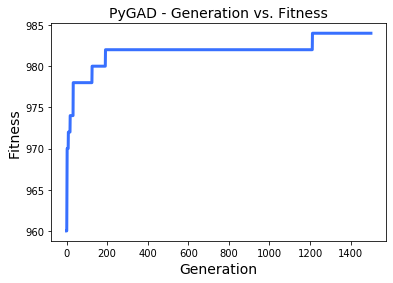

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 6 4 5 3 4 4 6 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 4 3 3 6 6 7 6 5]


 round:  299
elapsed time:  283.27261877059937
best sol [0.38593626 0.12385474 0.92599698 0.90120035 0.11010186 0.85822331
 0.82735705 0.53115825 0.04049904 0.23384451 0.08367493 0.01441633
 0.12385474 0.6962789  0.47743887 0.06660795 0.15794383 0.54536591
 0.97038518 0.89263678 0.15794383 0.92599698 0.91614684 0.47743887
 0.74592257 0.06660795 0.90205683 0.15794383 0.56937182 0.54536591
 0.89263678 0.24933521 0.16949188 0.56294682 0.22034363]
fitness:  14.0


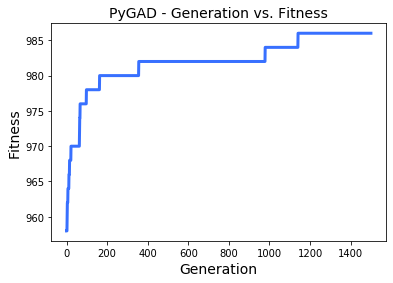

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 5 3 6 4 3 5 8 7 8 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 4 3 6 7 6 9 6 3]


 round:  300
elapsed time:  274.8249022960663
best sol [0.41682769 0.09645188 0.88035555 0.95327777 0.00436314 0.8618385
 0.5356254  0.72811069 0.1590943  0.03776797 0.1590943  0.41084828
 0.1590943  0.41084828 0.24732147 0.02955739 0.63707238 0.77112524
 0.77112524 0.77112524 0.1590943  0.63707238 0.62611453 0.04369752
 0.49378691 0.77054317 0.92753453 0.63707238 0.56828536 0.56828536
 0.73581444 0.02233103 0.1590943  0.71105055 0.58607625]
fitness:  12.0


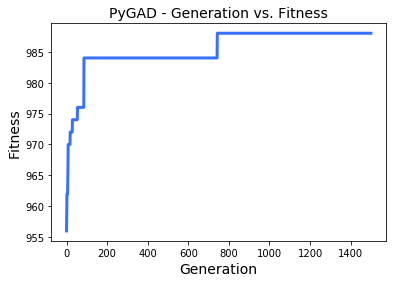

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 8 3 5 3 3 3 7 7 7 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 8 6 2 4 3 6 6 6 7 6 3]


 round:  301
elapsed time:  273.8464550971985
best sol [0.72305264 0.14172383 0.72458084 0.94044033 0.02552139 0.93639332
 0.01978765 0.72458084 0.04142325 0.58122543 0.04503785 0.04503785
 0.09289828 0.7305611  0.3775358  0.18032333 0.3775358  0.33130915
 0.42917986 0.7305611  0.04142325 0.66984237 0.5663773  0.18032333
 0.59279292 0.58122543 0.66984237 0.97962946 0.43759664 0.5663773
 0.75194229 0.04037885 0.74025706 0.87147592 0.1363609 ]
fitness:  16.0


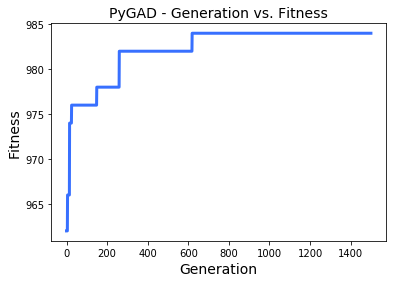

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 3 6 4 5 5 6 7 6 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 8 4 2 4 2 6 7 6 8 7 4]


 round:  302
elapsed time:  288.5412769317627
best sol [0.78287267 0.1239677  0.83798721 0.9951444  0.27239398 0.43625572
 0.38337671 0.30360286 0.07594812 0.18382499 0.43625572 0.27239398
 0.49441891 0.38881646 0.30360286 0.14590478 0.9327201  0.18382499
 0.63207408 0.62347001 0.37439989 0.26857712 0.38881646 0.15697229
 0.94930449 0.62319234 0.9327201  0.94930449 0.62319234 0.63910077
 0.84780222 0.05439407 0.33208815 0.63207408 0.07613321]
fitness:  14.0


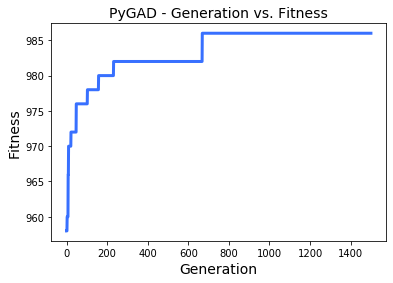

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 5 7 5 6 4 4 4 6 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 5 3 4 3 6 7 8 8 7 3]


 round:  303
elapsed time:  286.00973200798035
best sol [0.65370195 0.14961228 0.98752476 0.74831789 0.16757343 0.86127537
 0.2283118  0.59074163 0.17248792 0.44067254 0.02846835 0.36506713
 0.04170063 0.40949794 0.46328787 0.04170063 0.44067254 0.79180417
 0.8372977  0.83883564 0.16757343 0.60975165 0.40949794 0.17248792
 0.84481614 0.40949794 0.30006992 0.98752476 0.40949794 0.59074163
 0.84696684 0.39063484 0.80303938 0.25756571 0.0550061 ]
fitness:  18.0


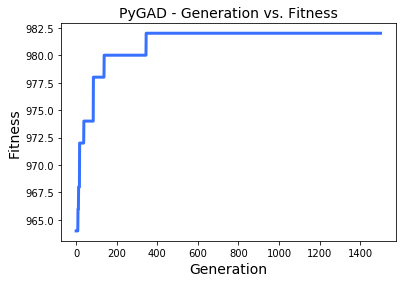

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 3 7 5 7 4 4 5 7 7 8 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 8 6 4 3 3 7 7 6 6 7 5]


 round:  304
elapsed time:  283.72160601615906
best sol [0.83058314 0.16706433 0.97006345 0.90184066 0.15834949 0.3023376
 0.18816134 0.46179942 0.15834949 0.18816134 0.15834949 0.1838747
 0.41047374 0.46179942 0.40103092 0.16706433 0.19849385 0.46179942
 0.62246823 0.63145932 0.15834949 0.47912327 0.46179942 0.40103092
 0.18816134 0.19849385 0.90184066 0.9622312  0.46179942 0.56332724
 0.9622312  0.19849385 0.46179942 0.23839242 0.23839242]
fitness:  10.0


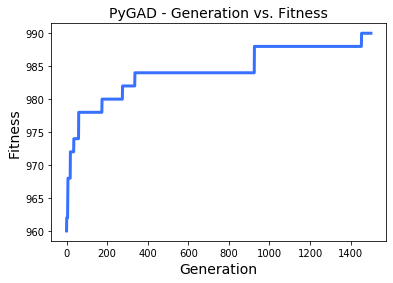

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 7 3 7 4 4 4 6 6 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 4 3 4 7 6 7 7 3]


 round:  305
elapsed time:  308.7610239982605
best sol [0.62603432 0.0832283  0.92688385 0.9950749  0.24420682 0.25811929
 0.0289093  0.41711999 0.12803141 0.0289093  0.04086173 0.2204695
 0.34699844 0.41201642 0.76449226 0.04086173 0.50374533 0.74273714
 0.74264757 0.83244165 0.93477877 0.9950749  0.74415667 0.41201642
 0.41201642 0.19724347 0.50374533 0.74273714 0.12529539 0.83244165
 0.44485795 0.12529539 0.19724347 0.42286858 0.55659458]
fitness:  12.0


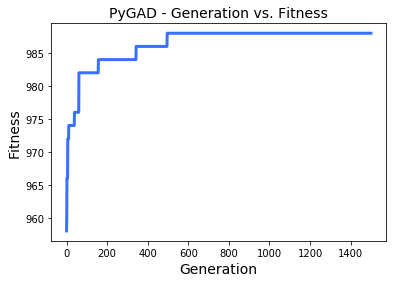

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 3 7 3 6 3 4 5 7 7 7 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 5 1 4 4 7 7 7 7 6 3]


 round:  306
elapsed time:  278.91833901405334
best sol [0.58259652 0.10903398 0.86167884 0.68938968 0.26668254 0.76543859
 0.85483174 0.65709519 0.03885283 0.25242322 0.15229946 0.12435627
 0.06663342 0.85483174 0.20504438 0.1717086  0.07929078 0.18488693
 0.72452157 0.60877071 0.44861947 0.88574814 0.66188989 0.03885283
 0.75033333 0.75033333 0.72452157 0.80087055 0.80087055 0.62855295
 0.80087055 0.18488693 0.25242322 0.14995213 0.27223942]
fitness:  16.0


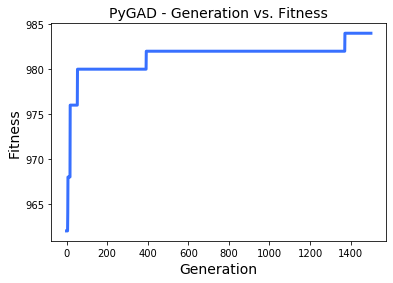

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 5 6 4 4 4 6 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 8 5 2 4 3 4 7 8 8 7 3]


 round:  307
elapsed time:  279.51804399490356
best sol [0.86454357 0.09221284 0.9700474  0.88389202 0.31364432 0.71383162
 0.68805028 0.41209415 0.03981035 0.03981035 0.12688686 0.23758525
 0.32622001 0.41251564 0.32353702 0.09221284 0.95591028 0.78558674
 0.12688686 0.68805028 0.41251564 0.78558674 0.41251564 0.41251564
 0.12688686 0.71383162 0.71383162 0.32353702 0.32353702 0.71383162
 0.95591028 0.1717655  0.24505699 0.05705316 0.99838193]
fitness:  16.0


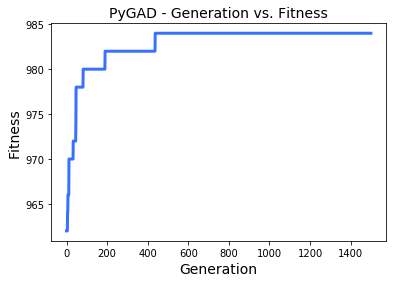

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 4 5 3 5 4 4 5 7 6 7 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 4 3 6 5 6 7 8 2]


 round:  308
elapsed time:  281.3534801006317
best sol [0.87081729 0.09425314 0.70176179 0.90639956 0.13642097 0.44498664
 0.20484142 0.35161355 0.1639249  0.1639249  0.01232981 0.17958915
 0.45348704 0.1639249  0.26292909 0.40805816 0.3217472  0.80924804
 0.44498664 0.44634428 0.90639956 0.04240544 0.33378143 0.26292909
 0.44634428 0.83173043 0.99276634 0.99276634 0.45348704 0.99276634
 0.8025741  0.22429042 0.23393152 0.57552385 0.23393152]
fitness:  14.0


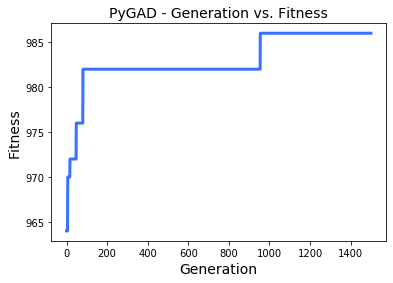

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 4 7 3 4 4 6 6 8 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 5 2 4 5 4 7 6 9 7 3]


 round:  309
elapsed time:  281.05248403549194
best sol [0.86869765 0.15259735 0.97178912 0.87635581 0.33867104 0.87635581
 0.15259735 0.42448576 0.12183493 0.67287936 0.06180248 0.05222594
 0.18536522 0.42448576 0.16333393 0.23712089 0.59051375 0.33867104
 0.42448576 0.7461574  0.42448576 0.97932058 0.64789296 0.33867104
 0.81872371 0.55897053 0.52963323 0.59051375 0.42448576 0.21329732
 0.52963323 0.06180248 0.21329732 0.53753348 0.05222594]
fitness:  14.0


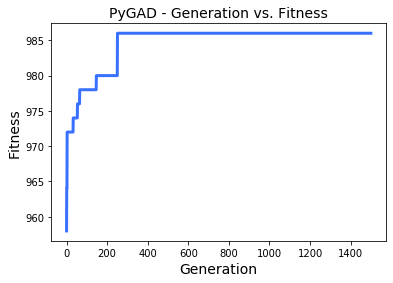

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 6 2 5 4 5 5 7 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 4 2 6 7 7 8 6 2]


 round:  310
elapsed time:  280.0262699127197
best sol [0.87930751 0.07699218 0.98120145 0.70638107 0.20278766 0.25078323
 0.41838208 0.33278033 0.20278766 0.39057252 0.02728087 0.61863575
 0.00700085 0.40797367 0.43674206 0.21034317 0.28155903 0.58218203
 0.41838208 0.87206778 0.97471946 0.07699218 0.00920656 0.10767391
 0.92604669 0.00920656 0.89572492 0.87206778 0.62251541 0.61863575
 0.844638   0.10767391 0.71144157 0.10412276 0.28155903]
fitness:  18.0


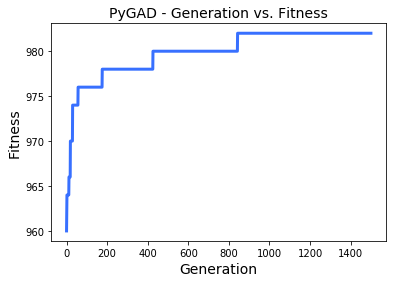

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 6 7 4 7 3 3 3 7 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 5 6 2 3 7 6 6 7 6 3]


 round:  311
elapsed time:  279.4744699001312
best sol [0.80792201 0.20269476 0.97085529 0.79261465 0.30702823 0.92731317
 0.02187652 0.30323985 0.11575284 0.05445527 0.11575284 0.30323985
 0.28673269 0.52862777 0.47155632 0.05445527 0.74379361 0.71528665
 0.68004963 0.61193084 0.11575284 0.75967535 0.2901897  0.05445527
 0.46629593 0.52865072 0.68004963 0.98570685 0.72589516 0.11575284
 0.75967535 0.11346098 0.46629593 0.10462494 0.91117473]
fitness:  12.0


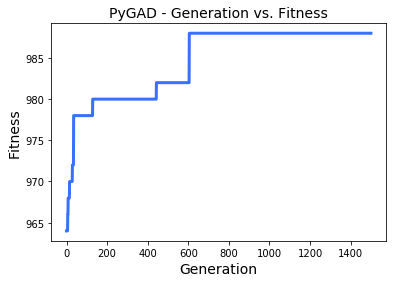

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 4 6 2 7 3 4 4 6 7 7 6]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 5 2 5 3 5 8 6 7 7 3]


 round:  312
elapsed time:  280.9204730987549
best sol [0.80030363 0.10562515 0.98460893 0.30416132 0.30416132 0.00741882
 0.65253719 0.98460893 0.27733699 0.10980794 0.22394013 0.26543603
 0.17170434 0.212393   0.48391593 0.08366138 0.264222   0.50421518
 0.46526215 0.89742569 0.46421207 0.98460893 0.16406445 0.26543603
 0.69248208 0.51087245 0.98620543 0.17170434 0.26543603 0.85021918
 0.93192976 0.27733699 0.17170434 0.12261638 0.08332186]
fitness:  20.0


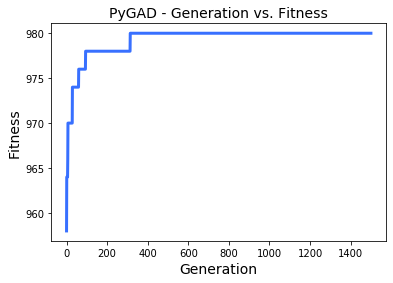

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 6 6 5 5 4 4 4 7 6 6 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 3 2 3 7 7 7 7 7 1]


 round:  313
elapsed time:  282.2332019805908
best sol [0.77327071 0.19174087 0.89230745 0.91340475 0.18672244 0.75048279
 0.91340475 0.45354517 0.03309854 0.02843992 0.12910669 0.1392778
 0.34447977 0.68465976 0.06027854 0.02843992 0.63430023 0.62170317
 0.55307938 0.63430023 0.40334927 0.75048279 0.34447977 0.08835673
 0.75048279 0.68214896 0.50899949 0.54434162 0.12910669 0.88649834
 0.31348708 0.20076147 0.29806514 0.15254313 0.75048279]
fitness:  16.0


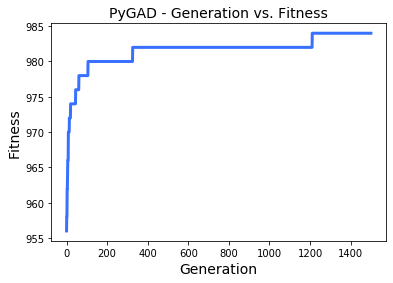

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 5 2 5 3 4 5 7 7 7 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 7 1 4 1 5 5 8 7 7 3]


 round:  314
elapsed time:  280.60770988464355
best sol [0.93025973 0.15076452 0.96222521 0.93025973 0.28547704 0.96222521
 0.0751053  0.74240117 0.11196538 0.60074413 0.14590417 0.1610757
 0.58941803 0.39549973 0.42274992 0.3110733  0.96222521 0.14590417
 0.42274992 0.36759472 0.83361957 0.04629404 0.51491481 0.15076452
 0.63512645 0.36029383 0.83361957 0.51491481 0.74240117 0.40321099
 0.83361957 0.0751053  0.55897573 0.52702488 0.08510073]
fitness:  16.0


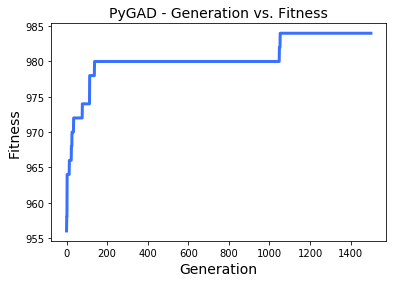

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 4 5 3 4 4 6 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 9 6 4 4 3 5 3 6 7 7 3]


 round:  315
elapsed time:  283.18143010139465
best sol [0.98424027 0.15698765 0.72394337 0.9039999  0.31139348 0.33171964
 0.56583367 0.41869831 0.1586705  0.06649895 0.56623367 0.22221318
 0.15698765 0.22221318 0.15698765 0.02220308 0.19011656 0.68095935
 0.84368285 0.41758805 0.1586705  0.96061141 0.01993232 0.31179518
 0.15698765 0.23598527 0.9480143  0.68095935 0.53195614 0.95182689
 0.83880065 0.02771669 0.54624589 0.23272319 0.2951128 ]
fitness:  16.0


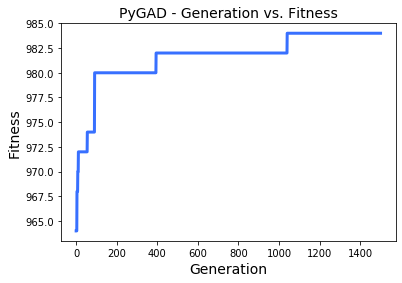

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 5 6 2 5 3 4 5 6 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 4 3 2 3 8 6 7 7 3]


 round:  316
elapsed time:  283.6874589920044
best sol [0.64075969 0.12521216 0.69278695 0.98783827 0.14268714 0.5206478
 0.7679019  0.35717777 0.07984148 0.12521216 0.08058858 0.1673426
 0.5206478  0.44310602 0.3790647  0.06157093 0.46860446 0.4472848
 0.7679019  0.64050187 0.21788177 0.94581885 0.44310602 0.57151511
 0.84346814 0.47402864 0.94581885 0.41880553 0.91236232 0.35717777
 0.47402864 0.44310602 0.03278654 0.12521216 0.16075476]
fitness:  16.0


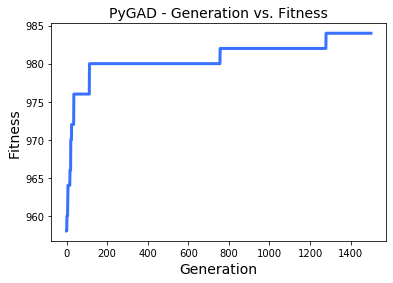

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 5 6 4 4 4 4 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 6 2 4 3 5 7 7 9 7 2]


 round:  317
elapsed time:  283.62669610977173
best sol [0.78167201 0.18030205 0.781886   0.97857872 0.23255281 0.5795442
 0.60122859 0.23783415 0.14404819 0.01628074 0.14404819 0.38899062
 0.1420592  0.60122859 0.30290738 0.23255281 0.38713843 0.20733034
 0.76513534 0.60122859 0.3260475  0.13922249 0.3260475  0.38287917
 0.97857872 0.38899062 0.9226051  0.96902947 0.39257799 0.21466893
 0.69279802 0.13922249 0.15275298 0.30290738 0.26154922]
fitness:  14.0


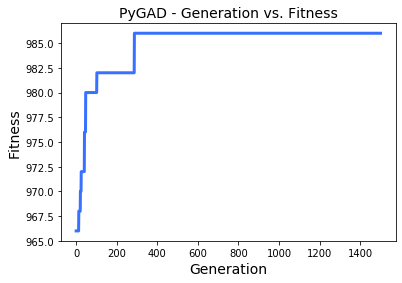

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 3 6 4 4 4 5 7 6 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 6 2 4 4 5 7 7 7 6 3]


 round:  318
elapsed time:  281.65289783477783
best sol [0.81636656 0.07713643 0.98916006 0.47802183 0.08289451 0.84469507
 0.13559375 0.72595348 0.08289451 0.35698658 0.13559375 0.15681467
 0.28640797 0.47750143 0.02022492 0.13559375 0.95962303 0.84341134
 0.95962303 0.47802183 0.46242928 0.26506954 0.08289451 0.24188959
 0.43402671 0.28640797 0.95962303 0.95962303 0.4329539  0.99191902
 0.88362639 0.28640797 0.16231855 0.19610587 0.38534773]
fitness:  12.0


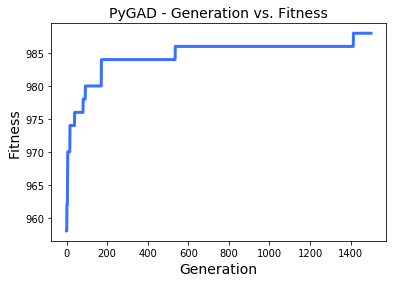

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 5 7 3 6 4 3 3 7 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 5 2 5 3 5 7 6 7 7 3]


 round:  319
elapsed time:  277.02031803131104
best sol [0.80371398 0.11310478 0.71727206 0.84725644 0.19953627 0.92745045
 0.99695185 0.31838067 0.06025714 0.04730808 0.06025714 0.01861569
 0.01861569 0.57755213 0.06025714 0.32480599 0.3826811  0.93937424
 0.06025714 0.93937424 0.32480599 0.92745045 0.12708401 0.03730771
 0.43866081 0.95267448 0.42052819 0.95267448 0.12708401 0.42356859
 0.43866081 0.18588195 0.57755213 0.0309605  0.80885343]
fitness:  14.0


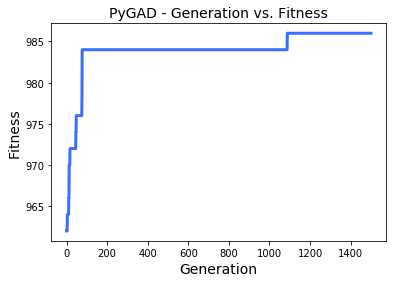

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 6 4 6 4 5 4 5 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 4 3 7 8 6 5 7 3]


 round:  320
elapsed time:  273.783438205719
best sol [0.63353254 0.11352737 0.84546688 0.88054709 0.24345827 0.9331177
 0.21019402 0.17955759 0.12586866 0.11356043 0.17955759 0.11356043
 0.29349974 0.43519836 0.1742023  0.58682337 0.24345827 0.12586866
 0.39180358 0.57128101 0.24345827 0.12586866 0.57128101 0.39180358
 0.86626615 0.24585338 0.9331177  0.9331177  0.54793874 0.86626615
 0.94139871 0.15095825 0.68834824 0.37514117 0.14109063]
fitness:  14.0


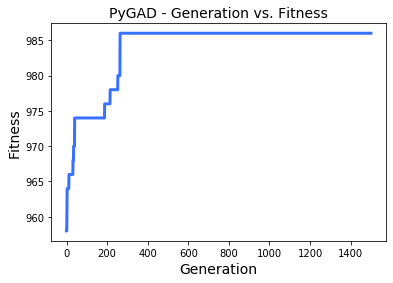

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 6 3 6 4 4 4 7 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 6 2 3 5 4 7 6 8 7 3]


 round:  321
elapsed time:  273.7249848842621
best sol [0.73400874 0.35690152 0.97095655 0.75379951 0.08811465 0.97771308
 0.0845355  0.44253564 0.11596838 0.78676514 0.02897832 0.19283755
 0.20656125 0.20656125 0.39422664 0.20656125 0.46213228 0.62955011
 0.19283755 0.81308816 0.02897832 0.78676514 0.33260797 0.20656125
 0.47475532 0.41277619 0.80845353 0.70198385 0.61547728 0.97771308
 0.97771308 0.20930179 0.65289682 0.47475532 0.08255489]
fitness:  14.0


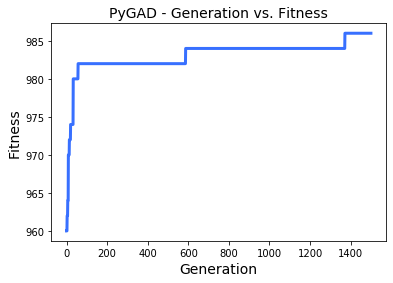

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [5 6 9 1 6 4 4 4 7 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 6 5 3 4 3 6 6 7 7 7 3]


 round:  322
elapsed time:  269.54873967170715
best sol [0.7074262  0.07226657 0.97289365 0.8814457  0.31138117 0.3362593
 0.08197396 0.4734226  0.08197396 0.25372945 0.08197396 0.19976809
 0.25372945 0.94688198 0.03799584 0.32984451 0.08197396 0.4734226
 0.16871021 0.99911947 0.50205068 0.21534923 0.47880291 0.32984451
 0.57180437 0.99243266 0.3661871  0.99243266 0.32984451 0.99911947
 0.94688198 0.25372945 0.07205522 0.40495649 0.02055662]
fitness:  14.0


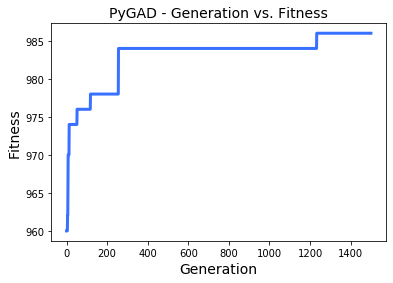

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 3 7 3 6 4 5 4 7 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 5 3 5 3 6 6 6 7 7 2]


 round:  323
elapsed time:  272.43044781684875
best sol [0.77506553 0.18705327 0.88096101 0.9409933  0.24826103 0.92485295
 0.50514811 0.49174415 0.02299518 0.23503478 0.02299518 0.00765769
 0.34638749 0.49174415 0.10902559 0.10726638 0.77506553 0.8078545
 0.49174415 0.59967399 0.19202354 0.19202354 0.77775935 0.00765769
 0.82389411 0.23503478 0.9409933  0.89701713 0.77775935 0.9409933
 0.92485295 0.24826103 0.11064548 0.8078545  0.15657746]
fitness:  14.0


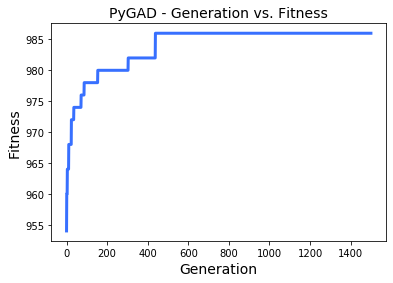

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 7 3 6 4 2 3 7 6 9 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 4 2 6 6 6 8 7 3]


 round:  324
elapsed time:  271.193510055542
best sol [0.83264707 0.12642591 0.71818821 0.99055375 0.27028398 0.77375075
 0.99782424 0.39122474 0.03561499 0.0106949  0.112535   0.2614178
 0.77375075 0.24994616 0.40410188 0.23462452 0.02120579 0.38227417
 0.46054265 0.91307587 0.21398789 0.29820447 0.38227417 0.12990614
 0.24994616 0.50953663 0.46054265 0.92743776 0.40410188 0.91307587
 0.99782424 0.14040525 0.1887368  0.56177868 0.14040525]
fitness:  16.0


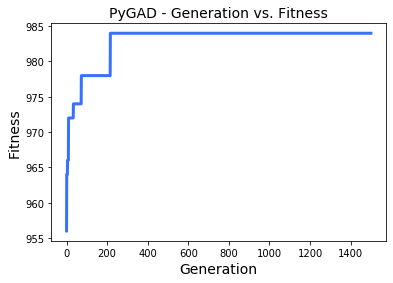

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 8 4 8 4 3 3 6 7 6 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 7 1 4 4 6 6 5 7 7 3]


 round:  325
elapsed time:  272.22082018852234
best sol [0.64278058 0.19672014 0.78029124 0.92474712 0.14392474 0.80501318
 0.40952355 0.32618896 0.12384503 0.16591555 0.01013565 0.35357844
 0.12769316 0.16598597 0.01013565 0.42137759 0.20100783 0.16591555
 0.41295069 0.87687603 0.16591555 0.14392474 0.41295069 0.01013565
 0.68482691 0.6467744  0.88659032 0.59761111 0.41295069 0.82107825
 0.80091096 0.16591555 0.6467744  0.49320431 0.12584295]
fitness:  14.0


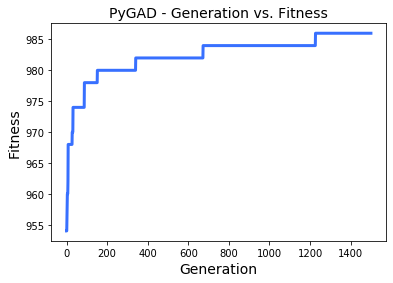

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 2 6 4 3 3 5 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 3 2 3 6 5 5 7 7 3]


 round:  326
elapsed time:  271.8221650123596
best sol [0.49818755 0.2985987  0.76445836 0.67689121 0.37109223 0.84150644
 0.9869045  0.49818755 0.10348639 0.02869907 0.13979596 0.2543558
 0.04887998 0.52827891 0.48015758 0.13979596 0.09360312 0.61992859
 0.52827891 0.6079524  0.08988122 0.66871865 0.5088313  0.2543558
 0.66871865 0.295004   0.69667968 0.98286874 0.21861772 0.94592627
 0.262265   0.14552169 0.6782263  0.52827891 0.15104394]
fitness:  16.0


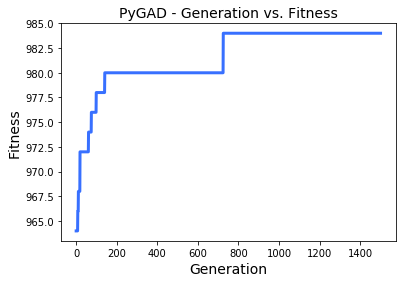

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [5 5 7 2 6 4 4 6 7 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 6 1 3 3 4 7 8 7 6 4]


 round:  327
elapsed time:  271.3815679550171
best sol [0.69790481 0.34745595 0.70253227 0.90062582 0.35338382 0.86822484
 0.41156466 0.40946812 0.1769986  0.10250507 0.06859415 0.36688336
 0.06859415 0.34568741 0.1769986  0.06859415 0.43546023 0.86207549
 0.86822484 0.7674114  0.54326765 0.79308138 0.60415419 0.09218409
 0.40946812 0.36688336 0.79292993 0.64102148 0.57054588 0.54326765
 0.71589987 0.09218409 0.64102148 0.59170017 0.04055978]
fitness:  14.0


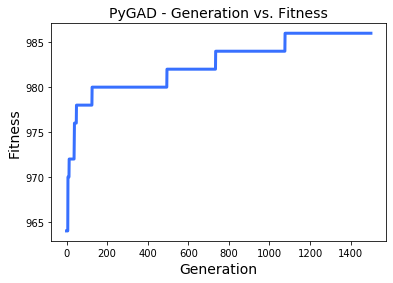

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 6 3 5 3 4 5 8 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 6 2 3 3 6 6 7 7 6 3]


 round:  328
elapsed time:  273.84249234199524
best sol [0.83969569 0.09881754 0.99370017 0.86355235 0.04385734 0.85957377
 0.04163005 0.63133725 0.1276301  0.22533255 0.09881754 0.04385734
 0.30171103 0.73334191 0.77011217 0.03743983 0.68513144 0.20178141
 0.85332335 0.14751023 0.03743983 0.95372747 0.24355221 0.09881754
 0.69847698 0.22533255 0.95372747 0.73334191 0.49470424 0.24020433
 0.77409551 0.28241037 0.22533255 0.14258407 0.09416123]
fitness:  16.0


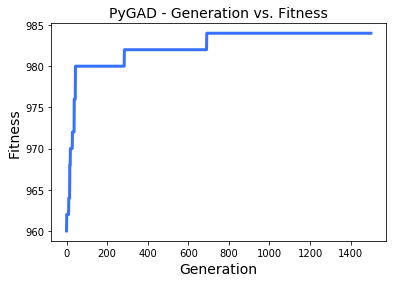

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 2 5 1 4 4 6 7 6 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 5 1 5 3 3 7 6 6 7 1]


 round:  329
elapsed time:  287.5624587535858
best sol [0.49031404 0.12445869 0.97565215 0.62859248 0.223215   0.67446193
 0.1568555  0.36768894 0.16867723 0.1568555  0.09308859 0.48469887
 0.01346375 0.65795536 0.42079037 0.12445869 0.34576639 0.75982068
 0.22687722 0.96872274 0.22687722 0.44927343 0.55890555 0.39250528
 0.48216582 0.22687722 0.91700051 0.98783566 0.60590777 0.34576639
 0.82259264 0.24174477 0.17695037 0.62086843 0.11921847]
fitness:  14.0


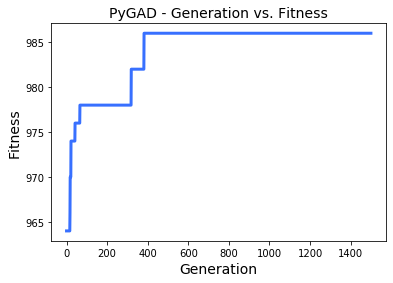

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [4 6 7 2 7 4 4 5 7 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 3 3 4 3 7 7 6 7 7 3]


 round:  330
elapsed time:  280.83217310905457
best sol [0.74090816 0.18535428 0.7588108  0.65137698 0.13960643 0.74835494
 0.90203978 0.378588   0.21278676 0.01483725 0.12600865 0.22392995
 0.378588   0.23783675 0.23783675 0.29981871 0.99895802 0.39093821
 0.378588   0.54725132 0.22392995 0.84164665 0.87131631 0.06532196
 0.46861568 0.39093821 0.7588108  0.97013005 0.43514226 0.22392995
 0.83921032 0.24243214 0.18588816 0.75926224 0.24243214]
fitness:  14.0


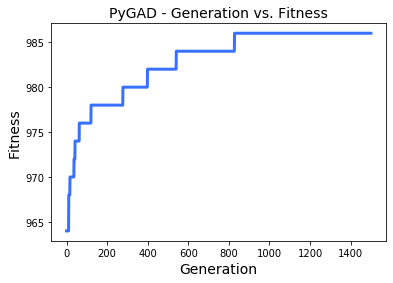

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 7 3 7 4 4 5 5 6 6 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 3 4 6 8 6 6 7 3]


 round:  331
elapsed time:  283.7899339199066
best sol [0.88233575 0.27612807 0.9489426  0.761406   0.12444356 0.91701736
 0.58490162 0.62572029 0.00119276 0.00436876 0.11918737 0.12867438
 0.26235891 0.52525617 0.00436876 0.04026207 0.52525617 0.4467832
 0.18190876 0.60492537 0.85765441 0.22188256 0.10147283 0.3717437
 0.79618685 0.45457886 0.41157358 0.99527029 0.12867438 0.99527029
 0.92276671 0.26235891 0.52525617 0.12867438 0.34986096]
fitness:  16.0


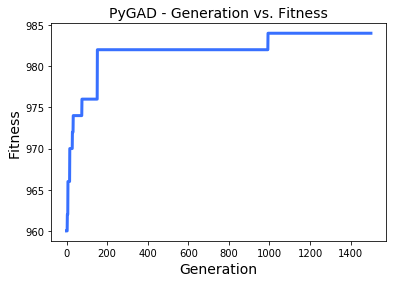

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 3 7 4 7 3 4 2 7 7 7 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 6 2 4 1 4 6 6 7 7 3]


 round:  332
elapsed time:  289.56086707115173
best sol [0.49737486 0.0185823  0.93851229 0.92989093 0.15930383 0.49949193
 0.59191268 0.35600205 0.14648951 0.15930383 0.14648951 0.00837138
 0.56005186 0.34553788 0.38936509 0.00837138 0.2596029  0.49949193
 0.97495722 0.59191268 0.15351927 0.49949193 0.56599218 0.21727891
 0.49949193 0.49949193 0.87739889 0.97495722 0.55470645 0.67003936
 0.88582531 0.27780925 0.49949193 0.53453449 0.38936509]
fitness:  12.0


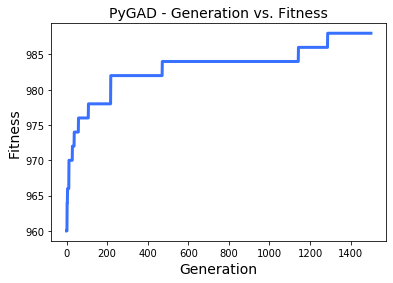

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 8 3 7 3 4 4 7 5 7 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [5 7 6 1 5 3 5 7 6 7 7 5]


 round:  333
elapsed time:  274.59881496429443
best sol [0.6865709  0.27380503 0.39415116 0.95115008 0.1967877  0.79655529
 0.17684473 0.4347232  0.15396793 0.15396793 0.15396793 0.32843976
 0.32597485 0.32597485 0.06093089 0.41673532 0.43547921 0.35386543
 0.17684473 0.6874188  0.06093089 0.18727186 0.43547921 0.15396793
 0.4347232  0.84612823 0.68257713 0.91713054 0.18727186 0.90620317
 0.95275796 0.18727186 0.06635664 0.65410141 0.18727186]
fitness:  14.0


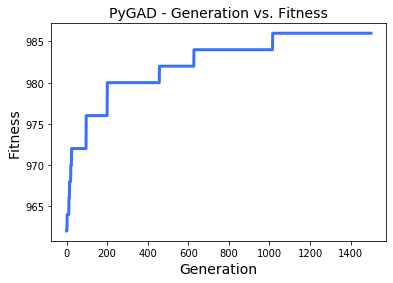

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 7 3 6 4 3 4 6 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 6 3 3 3 5 6 6 7 7 3]


 round:  334
elapsed time:  276.39485907554626
best sol [0.85153518 0.08972939 0.86949623 0.9370157  0.08972939 0.86949623
 0.43003667 0.42576799 0.08972939 0.47073741 0.06533074 0.14957178
 0.26766264 0.38615495 0.2854044  0.00987306 0.38535512 0.87438321
 0.42576799 0.87438321 0.06533074 0.87438321 0.68728576 0.68728576
 0.35856625 0.64082777 0.47073741 0.87438321 0.22694711 0.9370157
 0.84672562 0.39414079 0.14957178 0.20434313 0.02866011]
fitness:  16.0


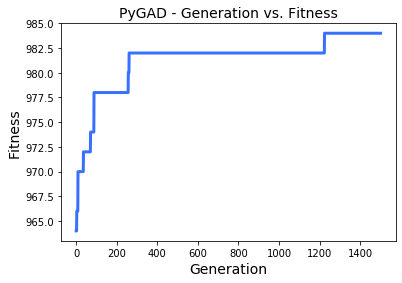

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 8 4 5 5 4 4 7 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 6 3 4 2 7 7 6 8 8 3]


 round:  335
elapsed time:  273.6480598449707
best sol [0.5003247  0.01556225 0.83725584 0.90003284 0.55356378 0.74242097
 0.8363311  0.37498343 0.18896666 0.1182276  0.1228469  0.29285402
 0.26393599 0.49899515 0.29285402 0.20534639 0.55356378 0.82563055
 0.50219388 0.83725584 0.24434078 0.99971787 0.50219388 0.42983927
 0.55356378 0.91753547 0.82563055 0.42983927 0.41947609 0.38607261
 0.48085197 0.48085197 0.24434078 0.08744865 0.51609304]
fitness:  16.0


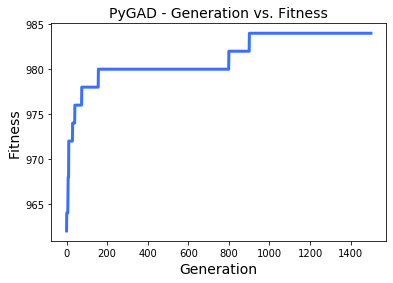

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 7 3 6 5 4 5 5 7 7 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 4 3 7 6 7 9 6 3]


 round:  336
elapsed time:  270.52464723587036
best sol [0.6377173  0.13223052 0.53094272 0.97855119 0.32663187 0.93568839
 0.54265365 0.53453141 0.15339728 0.28184222 0.05871338 0.05871338
 0.13223052 0.32493824 0.15339728 0.15339728 0.83337653 0.14617802
 0.97855436 0.24359971 0.53094272 0.17835408 0.0957795  0.54265365
 0.93568839 0.32124472 0.93568839 0.97855436 0.53094272 0.32124472
 0.83337653 0.12635101 0.05871338 0.61422779 0.01740182]
fitness:  16.0


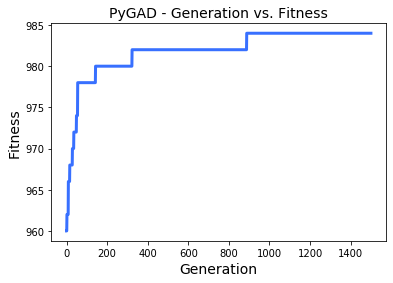

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 5 7 4 6 4 3 4 4 7 7 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 7 1 4 2 4 7 6 8 7 3]


 round:  337
elapsed time:  271.5351150035858
best sol [0.75828919 0.21116132 0.93157666 0.93030931 0.25940053 0.93073438
 0.06206857 0.37551993 0.0992241  0.1624783  0.25940053 0.12005104
 0.25940053 0.42834396 0.33703477 0.25940053 0.25940053 0.71653615
 0.73320749 0.76346825 0.12157083 0.60830916 0.77155552 0.0352145
 0.25940053 0.87761771 0.77155552 0.93157666 0.60830916 0.60830916
 0.93157666 0.23523138 0.21727537 0.71653615 0.12005104]
fitness:  12.0


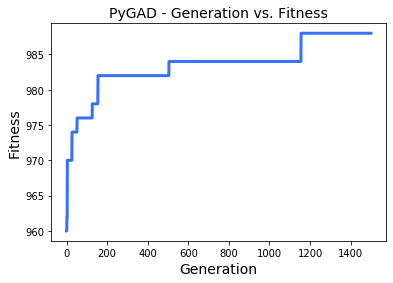

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [9 4 7 3 7 4 4 4 7 7 7 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 3 4 5 6 7 7 7 7 3]


 round:  338
elapsed time:  271.6912660598755
best sol [0.74815483 0.15856837 0.96439066 0.96439066 0.25545027 0.33492928
 0.0159512  0.48316786 0.10404586 0.11900165 0.11900165 0.07054754
 0.96439066 0.03243954 0.45024103 0.9485436  0.28181275 0.13229239
 0.17381089 0.45024103 0.18069716 0.30456271 0.25545027 0.10404586
 0.17548769 0.87102414 0.9485436  0.9485436  0.45024103 0.45024103
 0.93956153 0.18069716 0.14065116 0.62523996 0.18410158]
fitness:  14.0


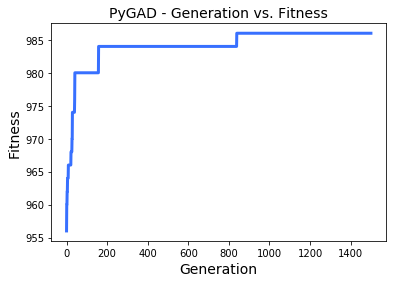

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 6 2 7 5 4 4 7 6 5 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 5 0 4 6 5 7 6 6 7 3]


 round:  339
elapsed time:  274.23117303848267
best sol [0.70831549 0.2095521  0.8277486  0.17374203 0.02317741 0.93457976
 0.69859439 0.93655717 0.15126354 0.12372059 0.03459072 0.00296191
 0.04318316 0.34545634 0.73849856 0.12372059 0.21265099 0.93655717
 0.51543714 0.28615231 0.17401935 0.93655717 0.75726193 0.0291485
 0.61158118 0.98025092 0.54009614 0.69859439 0.54009614 0.31617891
 0.83388199 0.29621078 0.19490074 0.61158118 0.14797263]
fitness:  16.0


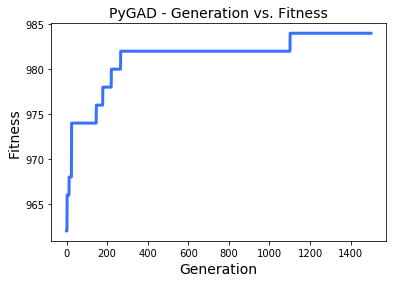

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 4 7 3 5 3 2 3 6 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 3 4 2 7 6 7 7 3]


 round:  340
elapsed time:  271.6767020225525
best sol [0.76958345 0.09687342 0.97409625 0.99496862 0.35583027 0.79561643
 0.10725366 0.36929206 0.10725366 0.01645785 0.31339031 0.28273854
 0.36929206 0.59932101 0.30585869 0.35583027 0.41631506 0.19993957
 0.41631506 0.53365416 0.22940756 0.40376256 0.42493378 0.24514837
 0.78778906 0.7084579  0.97409625 0.93156006 0.40376256 0.62836132
 0.75214197 0.48296575 0.20608972 0.34513815 0.24224913]
fitness:  8.0


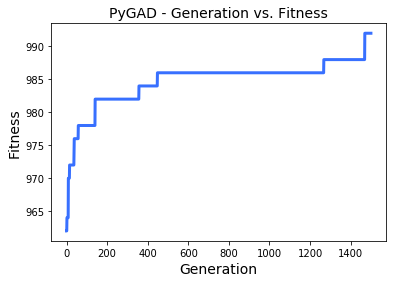

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 6 3 7 4 4 4 6 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 4 3 5 7 6 8 7 3]


 round:  341
elapsed time:  270.8608498573303
best sol [0.73592891 0.1377821  0.92988491 0.28123312 0.28123312 0.77438589
 0.33183326 0.51785055 0.15616035 0.00427465 0.04489952 0.18656554
 0.28123312 0.68093965 0.85079646 0.05042539 0.02588622 0.94129979
 0.49891072 0.94129979 0.65311725 0.85079646 0.94129979 0.18656554
 0.26830018 0.33018892 0.88616737 0.62137062 0.49891072 0.57685053
 0.92988491 0.13695538 0.62137062 0.00383483 0.41925886]
fitness:  16.0


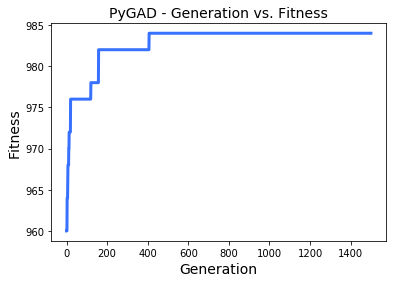

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 6 7 5 7 3 3 5 7 7 6 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 6 2 5 4 7 7 7 7 7 3]


 round:  342
elapsed time:  275.11336493492126
best sol [0.70169736 0.13938563 0.74055607 0.73858101 0.09926537 0.97264192
 0.82544143 0.66011908 0.08246293 0.01601969 0.08246293 0.16748498
 0.71781285 0.08246293 0.18280382 0.1003299  0.74072462 0.74055607
 0.17721009 0.50701019 0.18280382 0.97101801 0.17721009 0.19660552
 0.40851032 0.86496433 0.72792063 0.74072462 0.71235112 0.78839114
 0.73858101 0.1003299  0.17721009 0.81044961 0.17721009]
fitness:  14.0


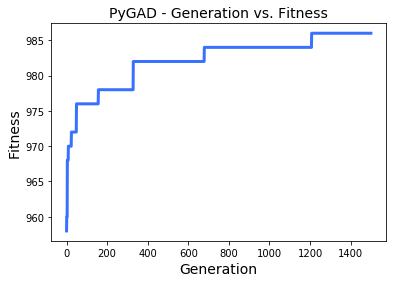

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 7 4 7 4 3 4 6 7 6 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 4 3 4 7 6 9 6 3]


 round:  343
elapsed time:  273.9155468940735
best sol [0.69534435 0.08829918 0.95763058 0.71553072 0.01112581 0.95085822
 0.01137027 0.38045255 0.0512189  0.25274184 0.15114644 0.13466273
 0.23759441 0.73834664 0.21472431 0.13050595 0.37045687 0.25274184
 0.63642747 0.58334443 0.13466273 0.13050595 0.95085822 0.36565458
 0.66440588 0.4195568  0.95085822 0.97871558 0.36565458 0.71957744
 0.82348026 0.25274184 0.13466273 0.83089353 0.20746417]
fitness:  12.0


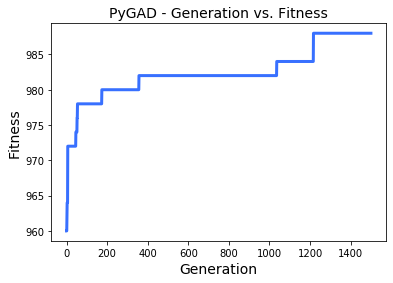

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 1 6 4 4 3 7 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 4 2 5 3 5 7 5 8 7 3]


 round:  344
elapsed time:  272.6421549320221
best sol [0.44150732 0.02321698 0.97581963 0.97009789 0.2733448  0.6531918
 0.29865765 0.44150732 0.15938495 0.50535324 0.0427903  0.16391375
 0.40221216 0.195263   0.15938495 0.2733448  0.0116893  0.50535324
 0.29865765 0.84807348 0.195263   0.97581963 0.93928811 0.0427903
 0.6014343  0.8823945  0.6531918  0.60522532 0.6014343  0.20783515
 0.8823945  0.18969963 0.55739786 0.195263   0.03752703]
fitness:  16.0


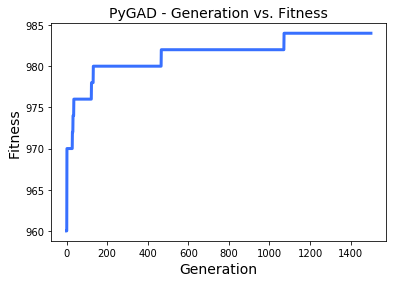

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 4 7 3 6 4 4 4 5 7 7 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [5 7 5 3 3 3 5 7 7 7 7 3]


 round:  345
elapsed time:  274.15210914611816
best sol [0.47853761 0.20393083 0.93619    0.76694879 0.0853112  0.83555955
 0.85219172 0.63446109 0.12081118 0.28495324 0.12081118 0.17377904
 0.01660743 0.83555955 0.93892617 0.17953631 0.17953631 0.13203683
 0.76691824 0.63446109 0.34634879 0.93892617 0.1628148  0.21425378
 0.68840598 0.32599929 0.85219172 0.63446109 0.67938514 0.78329356
 0.80418461 0.13203683 0.40221334 0.02350598 0.34634879]
fitness:  16.0


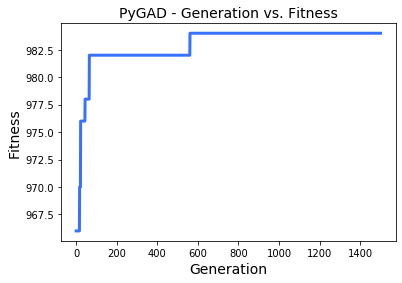

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 7 5 7 4 4 4 7 8 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 7 2 4 5 4 7 7 8 7 3]


 round:  346
elapsed time:  272.741024017334
best sol [0.51929002 0.20382328 0.92008494 0.93030377 0.24948794 0.88696048
 0.24948794 0.5858042  0.16419033 0.04940958 0.16419033 0.24948794
 0.83077153 0.56723001 0.33540457 0.1049097  0.34952868 0.34952868
 0.46821345 0.83077153 0.16419033 0.70618395 0.16419033 0.02172905
 0.56723001 0.67060505 0.88696048 0.67060505 0.47278591 0.97235176
 0.75450315 0.34841899 0.1049097  0.07341952 0.47278591]
fitness:  14.0


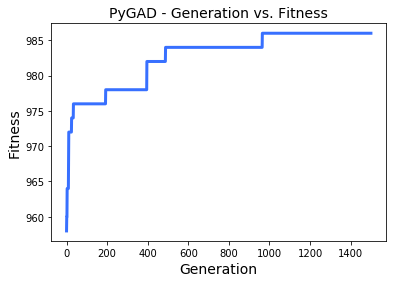

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 7 5 7 4 3 4 7 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 8 6 1 6 2 7 6 6 7 7 3]


 round:  347
elapsed time:  274.54226088523865
best sol [0.74028245 0.15170869 0.90485193 0.63934364 0.00944444 0.83735898
 0.15170869 0.55220665 0.0720878  0.15170869 0.03696774 0.4083693
 0.0720878  0.38943411 0.4083693  0.16480144 0.03696774 0.73428168
 0.6238261  0.83735898 0.23793827 0.60195422 0.59257549 0.0720878
 0.59257549 0.60195422 0.87909754 0.6238261  0.60195422 0.73428168
 0.87909754 0.26144644 0.09578405 0.81409975 0.00342591]
fitness:  12.0


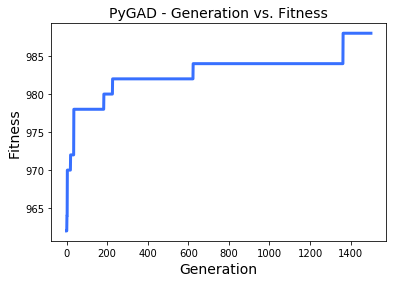

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 2 6 4 2 3 8 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 5 3 3 3 6 6 6 7 7 3]


 round:  348
elapsed time:  274.2341368198395
best sol [0.61081214 0.15068516 0.83745315 0.9276089  0.0088603  0.75413813
 0.72817846 0.40936856 0.16364206 0.12852287 0.15068516 0.4068377
 0.46793165 0.52443882 0.16519588 0.36242576 0.90866893 0.75413813
 0.40770043 0.36242576 0.58571058 0.06660019 0.36242576 0.0088603
 0.33897549 0.60905453 0.90866893 0.98236033 0.60905453 0.90866893
 0.84696097 0.25277776 0.40770043 0.2491966  0.20422615]
fitness:  14.0


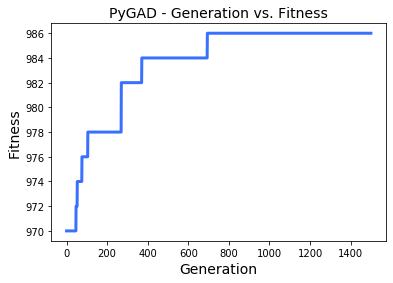

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 7 4 6 3 4 4 7 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 6 3 6 4 5 7 5 6 7 3]


 round:  349
elapsed time:  274.6259980201721
best sol [0.19216879 0.12361129 0.93095395 0.97022767 0.19216879 0.56208002
 0.80413663 0.47224923 0.12361129 0.11407542 0.12361129 0.11407542
 0.67047004 0.49153564 0.09035256 0.34061985 0.16923957 0.16923957
 0.77573155 0.99809452 0.80413663 0.99861996 0.05720725 0.18316618
 0.46966154 0.67047004 0.15125133 0.57677541 0.49153564 0.67047004
 0.97022767 0.05720725 0.46697286 0.11125265 0.20003533]
fitness:  16.0


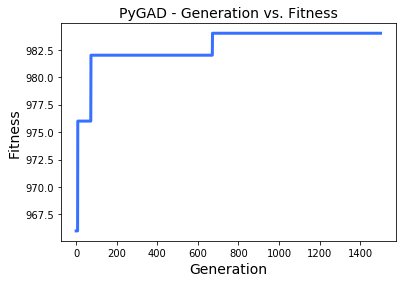

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 3 6 4 7 4 4 4 7 7 6 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 6 1 5 3 7 6 6 7 7 1]


 round:  350
elapsed time:  272.71407103538513
best sol [0.68064464 0.17121605 0.90322374 0.90499756 0.15743275 0.27457758
 0.18519293 0.15743275 0.11449973 0.19247483 0.13160948 0.11449973
 0.09356726 0.74470952 0.47835719 0.25272152 0.57188375 0.57188375
 0.57188375 0.41005667 0.09356726 0.27457758 0.74470952 0.13160948
 0.41005667 0.47835719 0.98571173 0.98571173 0.43232566 0.90322374
 0.78595417 0.13160948 0.74470952 0.21788452 0.20952417]
fitness:  14.0


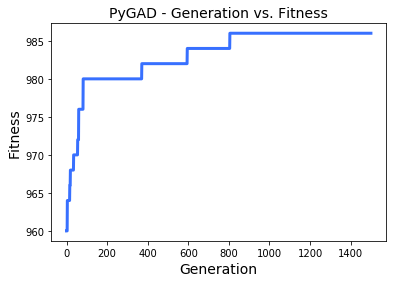

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 6 2 5 4 6 4 7 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 6 2 4 4 4 7 6 7 7 3]


 round:  351
elapsed time:  273.53596591949463
best sol [6.95616216e-01 2.76552996e-01 9.88192486e-01 9.24234612e-01
 2.07518479e-01 9.24234612e-01 4.26962811e-01 4.56060385e-01
 4.59584224e-02 4.59584224e-02 4.56060385e-01 2.74925070e-01
 4.30969528e-01 4.56060385e-01 6.93049568e-04 3.83901804e-01
 8.53270215e-01 5.46953734e-02 5.03821052e-01 4.56060385e-01
 4.59584224e-02 4.80845486e-01 4.59584224e-02 4.59584224e-02
 7.29196044e-01 6.08933219e-01 8.75599514e-01 9.46270832e-01
 4.62318411e-01 8.27542544e-01 8.75599514e-01 2.38077428e-01
 6.93963897e-01 1.21111203e-01 7.29196044e-01]
fitness:  14.0


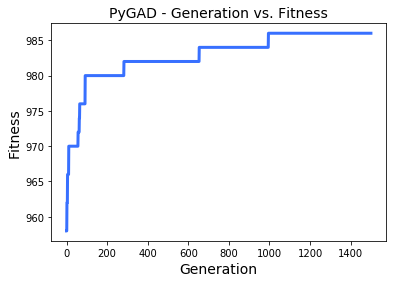

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 6 4 6 4 5 4 6 7 6 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 6 2 4 3 4 7 6 7 7 3]


 round:  352
elapsed time:  273.4123520851135
best sol [0.86209192 0.04215124 0.99519847 0.94554889 0.40653142 0.48834704
 0.29787047 0.40236739 0.08945738 0.48834704 0.24070863 0.02029201
 0.2368997  0.34573898 0.3440039  0.40236739 0.2368997  0.13853442
 0.72316609 0.88795123 0.08945738 0.34573898 0.08659107 0.3440039
 0.88795123 0.34573898 0.95350416 0.9168204  0.57163155 0.96339177
 0.29787047 0.43583486 0.00752084 0.15793571 0.25683064]
fitness:  16.0


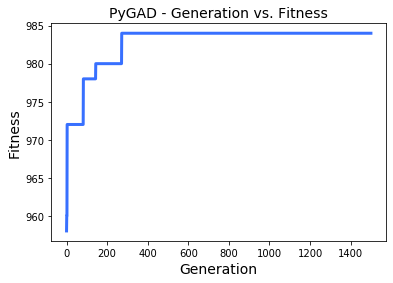

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 8 5 7 4 4 4 7 6 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 3 3 5 6 7 7 8 6 3]


 round:  353
elapsed time:  272.9581730365753
best sol [0.658371   0.10347065 0.96687893 0.78577715 0.15300075 0.27959321
 0.61010362 0.45325603 0.17325972 0.06632096 0.28179553 0.17325972
 0.15300075 0.48060625 0.15300075 0.29285258 0.45325603 0.77507973
 0.58981951 0.29285258 0.37701457 0.37189972 0.11914277 0.11914277
 0.91873728 0.58981951 0.90759017 0.99406036 0.58981951 0.77507973
 0.75973581 0.11914277 0.11742646 0.52075206 0.09966892]
fitness:  14.0


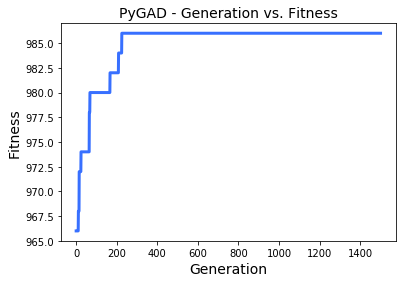

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 6 4 6 3 4 3 7 7 8 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 4 3 3 7 7 8 7 3]


 round:  354
elapsed time:  272.81291103363037
best sol [0.45444407 0.08865678 0.90168604 0.90168604 0.23039795 0.36253917
 0.66756894 0.40919282 0.242156   0.08865678 0.1112927  0.23039795
 0.82964484 0.36253917 0.21279987 0.23039795 0.6513692  0.1342813
 0.77510065 0.31124271 0.242156   0.83601974 0.22829495 0.00743126
 0.9829285  0.77510065 0.77283759 0.77510065 0.76931594 0.76931594
 0.83601974 0.1342813  0.25205343 0.21279987 0.22697381]
fitness:  14.0


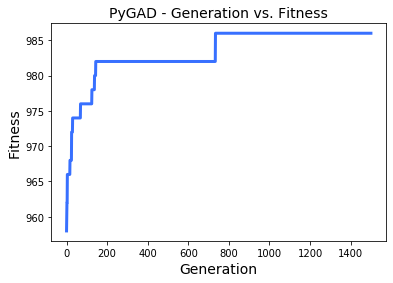

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 7 4 6 3 5 4 7 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 5 4 3 7 7 8 7 3]


 round:  355
elapsed time:  272.3690118789673
best sol [0.808368   0.16821384 0.96887108 0.90698074 0.23474409 0.86822815
 0.07533378 0.32022968 0.19967079 0.23474409 0.07533378 0.07507332
 0.84810921 0.13375625 0.23474409 0.19967079 0.86822815 0.56488045
 0.33053723 0.84810921 0.1203406  0.96324246 0.28449107 0.39692982
 0.808368   0.94522734 0.96324246 0.07507332 0.19967079 0.44810639
 0.94522734 0.17426204 0.23474409 0.54784063 0.23474409]
fitness:  14.0


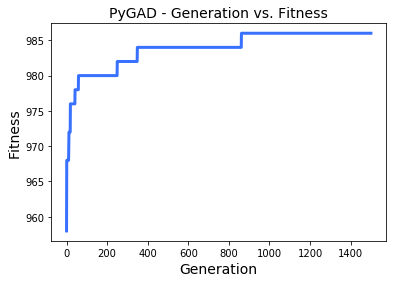

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 4 2 6 4 4 6 6 7 8 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 4 3 7 7 7 6 6 3]


 round:  356
elapsed time:  273.49858379364014
best sol [0.55549005 0.10930746 0.84241295 0.8546457  0.10949759 0.85838703
 0.97405254 0.66922511 0.07752148 0.10930746 0.07752148 0.35915121
 0.68426658 0.39608293 0.68426658 0.0259168  0.39608293 0.71301634
 0.40101411 0.66660863 0.56786902 0.68426658 0.12181475 0.31314509
 0.66660863 0.97405254 0.23661202 0.97260621 0.18918335 0.59244239
 0.97260621 0.15543116 0.19779982 0.74721788 0.18918335]
fitness:  14.0


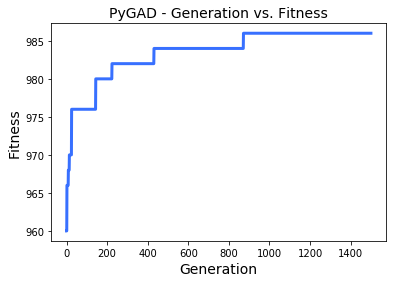

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 3 7 7 7 3 4 4 7 7 8 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 6 3 6 7 7 7 7 3]


 round:  357
elapsed time:  272.0273001194
best sol [0.69859315 0.20986569 0.69859315 0.80369803 0.20986569 0.93743406
 0.52046895 0.69859315 0.17867822 0.0315784  0.04451798 0.11093239
 0.15081575 0.69859315 0.17867822 0.17867822 0.80369803 0.40286296
 0.42639061 0.21459606 0.80369803 0.19180007 0.02518712 0.52046895
 0.20986569 0.19180007 0.95314924 0.92057398 0.42639061 0.80342576
 0.95314924 0.18253138 0.65984405 0.11480612 0.59993543]
fitness:  14.0


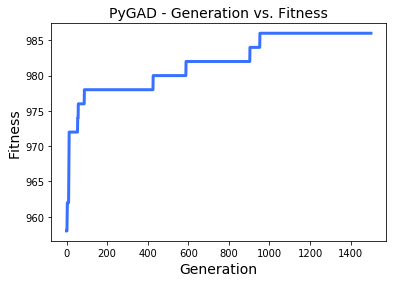

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 7 4 7 4 4 4 4 7 5 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 4 3 4 7 5 8 7 3]


 round:  358
elapsed time:  272.98987317085266
best sol [0.8379856  0.20290446 0.9438577  0.94737192 0.28458681 0.36077939
 0.20914587 0.41396357 0.17838727 0.00765138 0.08514285 0.14561582
 0.26687359 0.42768746 0.41315515 0.17838727 0.14561582 0.35038687
 0.91163332 0.7880205  0.94737192 0.80454593 0.66853931 0.28458681
 0.36077939 0.17838727 0.9438577  0.63825153 0.14408539 0.40970228
 0.80454593 0.17838727 0.0128069  0.20914587 0.67986587]
fitness:  16.0


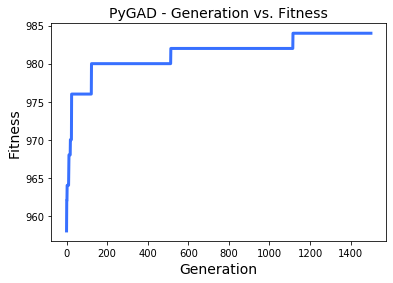

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 5 7 3 6 4 3 5 6 6 5 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 4 3 6 7 8 5 7 3]


 round:  359
elapsed time:  273.4102358818054
best sol [0.42132248 0.25769056 0.98250904 0.99212543 0.28738187 0.35527835
 0.84016159 0.37414535 0.35527835 0.0556316  0.11594668 0.16986896
 0.39667406 0.35527835 0.49869777 0.16986896 0.49869777 0.49869777
 0.49869777 0.69088802 0.37405372 0.94106101 0.03143299 0.16405143
 0.16986896 0.99607946 0.99607946 0.48083007 0.16986896 0.63621453
 0.80563836 0.18778347 0.31553362 0.21813967 0.05146339]
fitness:  14.0


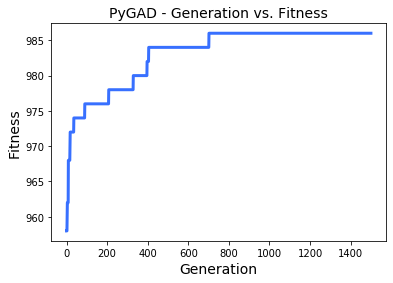

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 6 7 4 5 4 4 5 7 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 7 2 4 3 6 7 7 6 7 3]


 round:  360
elapsed time:  273.6864149570465
best sol [0.95127813 0.3084384  0.73921104 0.95127813 0.05908299 0.74152162
 0.31601073 0.31257472 0.1197291  0.45768056 0.05908299 0.31601073
 0.31257472 0.30664936 0.39594159 0.1197291  0.01044993 0.77991398
 0.1197291  0.45388392 0.13774441 0.91805286 0.28047826 0.31257472
 0.31601073 0.91805286 0.74152162 0.73921104 0.39594159 0.18124795
 0.79571096 0.29933647 0.14309194 0.79877018 0.05160158]
fitness:  18.0


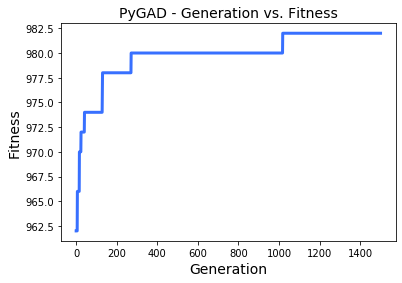

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 8 1 5 4 3 4 7 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 6 5 5 4 3 2 6 7 7 7 3]


 round:  361
elapsed time:  272.9743890762329
best sol [0.70420498 0.09811366 0.94617876 0.72994894 0.05703741 0.65154291
 0.94617876 0.72994894 0.16006458 0.05785332 0.09125895 0.20854636
 0.02451718 0.31503214 0.02451718 0.09125895 0.52636341 0.77977827
 0.77977827 0.52636341 0.12004189 0.97744466 0.81483737 0.18447009
 0.82272437 0.59383847 0.8546634  0.81483737 0.16345507 0.26473191
 0.65154291 0.06429647 0.67315658 0.51282017 0.16345507]
fitness:  16.0


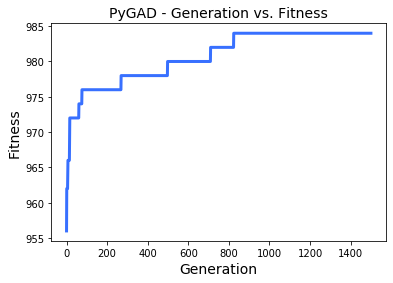

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 5 6 3 4 4 4 4 7 7 7 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 8 7 1 3 3 5 8 7 7 6 3]


 round:  362
elapsed time:  273.5267000198364
best sol [0.74260238 0.30291429 0.97691206 0.94570134 0.17069028 0.95144552
 0.08747563 0.32074032 0.12947346 0.03418649 0.10882056 0.10882056
 0.20489851 0.6003974  0.04046584 0.26356024 0.81276184 0.59057785
 0.30291429 0.90726451 0.17645906 0.32074032 0.7333854  0.23317332
 0.68943097 0.95389199 0.52841136 0.7333854  0.43375236 0.8048044
 0.70631048 0.20489851 0.32074032 0.7647208  0.59057785]
fitness:  16.0


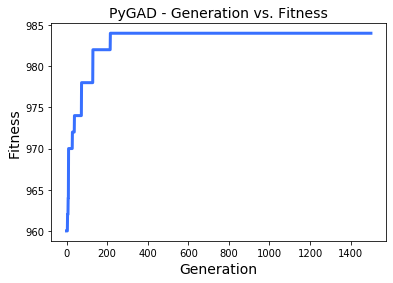

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 3 7 1 6 4 5 5 7 7 7 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 6 1 4 3 7 4 6 8 6 5]


 round:  363
elapsed time:  271.7553560733795
best sol [0.80234338 0.0755259  0.94026544 0.90403255 0.26075262 0.95121751
 0.15901378 0.49186919 0.15901378 0.26075262 0.09184071 0.18441062
 0.26075262 0.53680645 0.26075262 0.31764577 0.14552247 0.82540957
 0.31764577 0.95409817 0.31764577 0.93421111 0.08752871 0.34955859
 0.09184071 0.95409817 0.1602917  0.62879213 0.41138764 0.55971003
 0.82645369 0.26398108 0.06554979 0.26398108 0.60268892]
fitness:  12.0


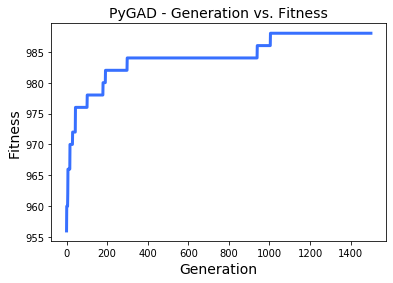

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 3 8 2 6 4 4 6 7 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 5 4 6 7 6 6 7 3]


 round:  364
elapsed time:  273.23086500167847
best sol [0.68381716 0.10164422 0.8077934  0.87773833 0.32077814 0.40256456
 0.99992507 0.58395382 0.05215664 0.26533742 0.00430274 0.00430274
 0.49779453 0.21247355 0.32077814 0.26533742 0.41241034 0.2661685
 0.16920528 0.8077934  0.10953687 0.97716221 0.41241034 0.05215664
 0.97716221 0.94738828 0.49779453 0.58096312 0.40256456 0.58096312
 0.8077934  0.24613337 0.20143003 0.58096312 0.11313734]
fitness:  14.0


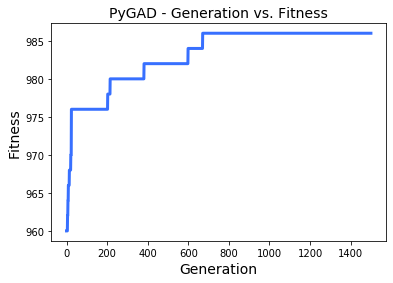

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 8 4 6 4 4 4 6 7 7 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 8 6 1 3 3 6 6 8 7 7 3]


 round:  365
elapsed time:  273.54526114463806
best sol [0.74228242 0.13847083 0.98964246 0.84591005 0.4664569  0.86240041
 0.64351364 0.33382383 0.01372271 0.33382383 0.16311938 0.18399427
 0.41584013 0.4664569  0.02902303 0.12345242 0.67922928 0.2451942
 0.18399427 0.91016261 0.12345242 0.08238723 0.84591005 0.34986369
 0.80210799 0.86240041 0.88163731 0.92852368 0.2209674  0.91267058
 0.91016261 0.16311938 0.35639802 0.41029594 0.2451942 ]
fitness:  12.0


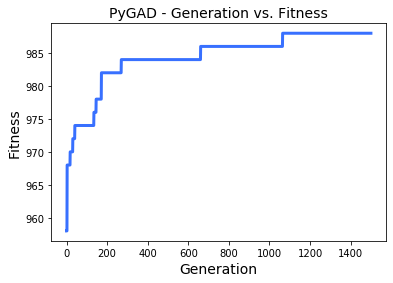

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 8 4 6 3 4 4 7 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 6 2 4 1 6 7 6 9 7 3]


 round:  366
elapsed time:  272.62424516677856
best sol [0.46413986 0.07637086 0.87387557 0.66986931 0.34462808 0.93692562
 0.93459867 0.48912868 0.16359168 0.00758202 0.87882639 0.18633245
 0.0712776  0.86510987 0.41670849 0.16359168 0.16359168 0.34166099
 0.86510987 0.07748225 0.15331516 0.7867947  0.20682661 0.15401007
 0.86510987 0.72102093 0.86510987 0.93459867 0.49377773 0.72102093
 0.86510987 0.25687665 0.38586977 0.15401007 0.34166099]
fitness:  14.0


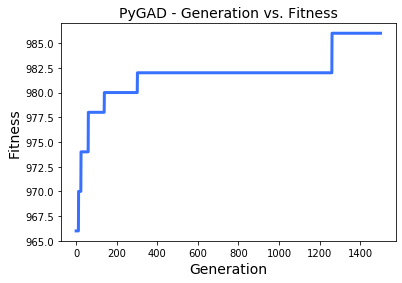

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 6 3 7 3 4 5 6 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 4 4 3 2 7 6 8 7 3]


 round:  367
elapsed time:  273.33507800102234
best sol [0.83225231 0.1268046  0.99796683 0.88903903 0.1749823  0.86994678
 0.13701451 0.3453375  0.14115252 0.69277557 0.05265146 0.04192143
 0.28046453 0.50936618 0.18572724 0.22017812 0.35311034 0.24731703
 0.62821967 0.61819402 0.38403787 0.47543238 0.37388957 0.19580607
 0.48669285 0.38556565 0.38403787 0.99883017 0.64011089 0.52054232
 0.81464279 0.52955245 0.16222098 0.08400054 0.14385956]
fitness:  14.0


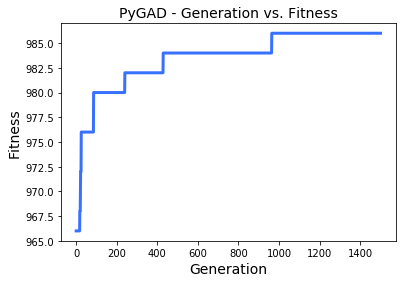

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 8 4 7 4 4 4 6 6 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 5 4 5 6 6 8 7 3]


 round:  368
elapsed time:  273.2032358646393
best sol [0.65845628 0.0831112  0.94020273 0.89374325 0.34898594 0.8211228
 0.15704221 0.47431002 0.15704221 0.20468364 0.24858624 0.17543922
 0.17543922 0.66261951 0.27298814 0.15704221 0.5273312  0.39238936
 0.17543922 0.8211228  0.40105605 0.24858624 0.46410662 0.27298814
 0.37542355 0.46410662 0.94020273 0.98331473 0.5273312  0.96054127
 0.89374325 0.11435223 0.34898594 0.30640633 0.01487011]
fitness:  10.0


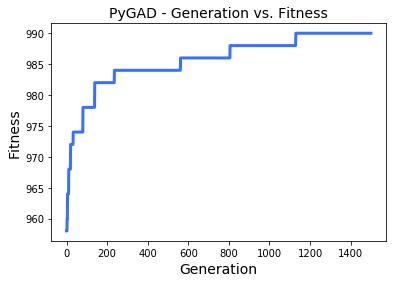

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [5 5 8 4 7 4 4 4 7 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 3 4 3 6 7 6 8 7 3]


 round:  369
elapsed time:  274.3799810409546
best sol [0.70136956 0.05368393 0.98259356 0.97911978 0.15866222 0.97579424
 0.11684805 0.32952686 0.15164428 0.66904301 0.15126198 0.2311945
 0.15164428 0.2311945  0.00452942 0.15866222 0.64911644 0.15126198
 0.98259356 0.70136956 0.15866222 0.64911644 0.11684805 0.01024031
 0.76862279 0.21831183 0.96273868 0.92479935 0.64911644 0.73625636
 0.98259356 0.21831183 0.32952686 0.38451392 0.21831183]
fitness:  14.0


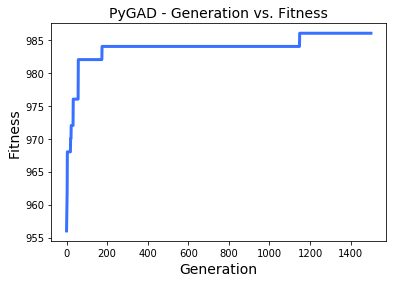

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 6 6 3 7 4 4 4 5 7 7 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [5 7 6 3 4 2 6 8 6 7 7 3]


 round:  370
elapsed time:  273.3959889411926
best sol [0.90372763 0.11294607 0.95493354 0.87764118 0.14605719 0.37951359
 0.14606519 0.45790525 0.45790525 0.10866707 0.14606519 0.14749569
 0.3246242  0.35885786 0.36121236 0.19526047 0.6246735  0.40750183
 0.24212851 0.79898706 0.37951359 0.38859517 0.14606519 0.14749569
 0.60475156 0.67896072 0.98530272 0.96181691 0.19526047 0.81406386
 0.754224   0.23228703 0.15190076 0.36121236 0.64079466]
fitness:  14.0


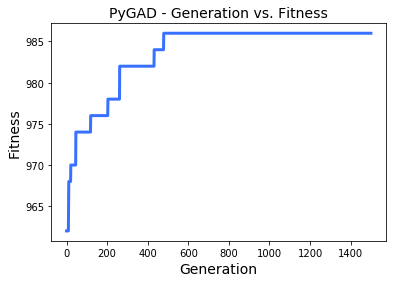

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 3 6 4 3 3 6 6 7 6]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 5 3 4 3 6 7 5 7 7 3]


 round:  371
elapsed time:  273.2126009464264
best sol [0.74363649 0.31139919 0.74721705 0.92071341 0.31139919 0.90193932
 0.8271367  0.40392919 0.02935409 0.24431316 0.12758791 0.08903493
 0.22711096 0.59012167 0.17053749 0.06388838 0.45687635 0.62927097
 0.49412123 0.59012167 0.13458115 0.91547917 0.62927097 0.15407849
 0.02935409 0.51568468 0.95188851 0.87564518 0.41013657 0.58617892
 0.85091688 0.00167755 0.62927097 0.63479897 0.15407849]
fitness:  16.0


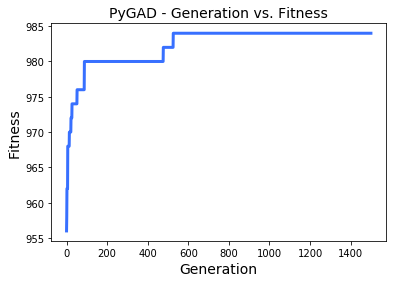

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 9 2 5 3 4 6 7 5 7 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 6 1 5 2 5 8 6 6 7 3]


 round:  372
elapsed time:  273.5552408695221
best sol [0.75137669 0.0940604  0.95050287 0.9689225  0.19376691 0.73519626
 0.18286356 0.36812908 0.18995669 0.27074981 0.11030305 0.10755838
 0.22719049 0.22354775 0.2556216  0.22706186 0.70909292 0.63427705
 0.61076039 0.73519626 0.07632387 0.13339462 0.62512385 0.13863499
 0.24225696 0.47507371 0.93192862 0.93192862 0.43242447 0.94776345
 0.76965659 0.19537395 0.70909292 0.30120745 0.00626131]
fitness:  12.0


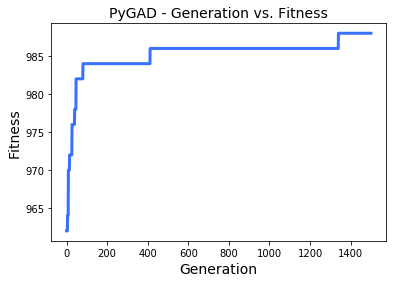

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 7 3 7 4 4 3 6 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 3 4 6 7 5 6 7 3]


 round:  373
elapsed time:  272.4778401851654
best sol [0.66681809 0.07364048 0.98231035 0.8937718  0.07364048 0.87518776
 0.20237791 0.66869342 0.05757816 0.51790194 0.02447297 0.22298794
 0.45312651 0.39969425 0.51790194 0.02447297 0.36042492 0.17174237
 0.72221958 0.61245484 0.20590842 0.77420571 0.35455719 0.20590842
 0.31495539 0.0041269  0.67432356 0.72565624 0.39969425 0.67432356
 0.80073352 0.16834039 0.61245484 0.17256369 0.39969425]
fitness:  14.0


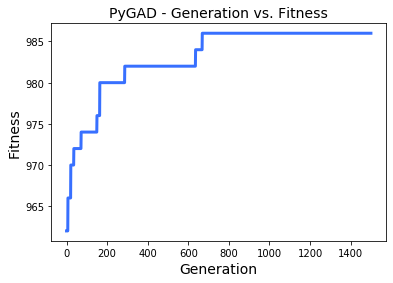

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 7 4 6 3 4 4 7 7 5 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 3 4 3 5 6 6 6 6 4]


 round:  374
elapsed time:  272.86564016342163
best sol [0.68519402 0.18333257 0.82152462 0.99199335 0.13493688 0.99199335
 0.01289715 0.13493688 0.10924319 0.16751089 0.01289715 0.13493688
 0.50069463 0.41330716 0.40977381 0.25851316 0.99199335 0.18333257
 0.41330716 0.71652545 0.96267964 0.13493688 0.13493688 0.38466013
 0.13493688 0.61598847 0.96267964 0.96526415 0.13493688 0.94547038
 0.81392004 0.12800514 0.39396674 0.41835873 0.05658716]
fitness:  14.0


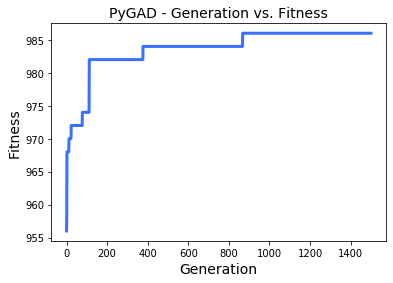

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 4 6 4 5 4 6 7 5 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 5 2 4 3 7 7 6 7 7 3]


 round:  375
elapsed time:  273.0441610813141
best sol [0.75182874 0.07592885 0.72844809 0.88718263 0.29491299 0.66302489
 0.64388477 0.42632728 0.1438893  0.36616572 0.1438893  0.01894936
 0.07326767 0.71370477 0.42632728 0.16351276 0.42632728 0.37013639
 0.66302489 0.61458418 0.72844809 0.42632728 0.67909789 0.1438893
 0.42632728 0.46354894 0.64388477 0.99517717 0.47789198 0.86968904
 0.18899021 0.18899021 0.07326767 0.54832627 0.23562442]
fitness:  16.0


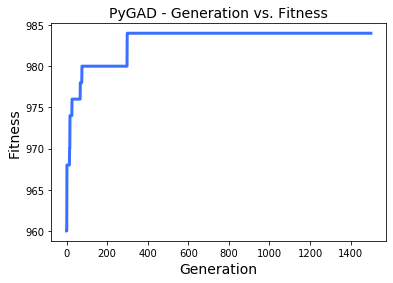

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 7 3 7 4 4 5 7 4 5 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 4 3 5 6 8 7 5 3]


 round:  376
elapsed time:  273.35117197036743
best sol [0.97996196 0.0872306  0.96255095 0.96255095 0.16185027 0.77658163
 0.08262884 0.31433384 0.16185027 0.20890117 0.20890117 0.25852976
 0.79753563 0.24019098 0.42561724 0.25852976 0.31433384 0.36030784
 0.16185027 0.7860721  0.16185027 0.77658163 0.63615575 0.24019098
 0.63615575 0.54044575 0.99818521 0.24019098 0.85871634 0.31433384
 0.42034249 0.29467897 0.21833331 0.58521582 0.05083427]
fitness:  14.0


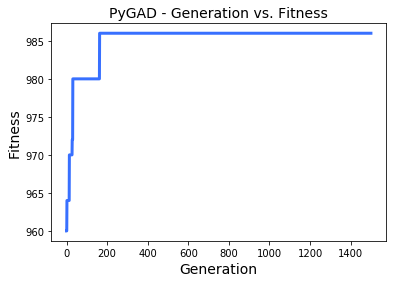

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 5 4 7 4 4 5 6 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 4 4 3 6 6 6 7 6 3]


 round:  377
elapsed time:  271.43530321121216
best sol [0.83926228 0.10980042 0.94126389 0.63856353 0.02517004 0.35451577
 0.83926228 0.15619047 0.05270722 0.08660501 0.1169138  0.2833337
 0.23185905 0.38682136 0.37194866 0.06361621 0.81410594 0.82700261
 0.63856353 0.73809572 0.96312876 0.84361134 0.5167263  0.02178233
 0.54333975 0.64112529 0.82700261 0.67546491 0.38682136 0.5167263
 0.88308324 0.19553329 0.23185905 0.7543743  0.0271546 ]
fitness:  14.0


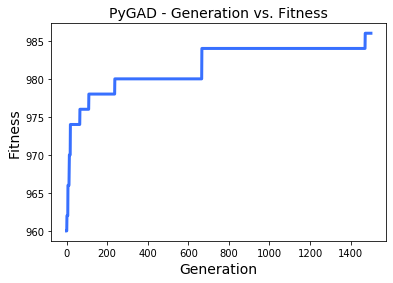

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 5 7 3 6 3 3 4 8 6 7 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 5 6 1 4 3 7 6 8 7 7 3]


 round:  378
elapsed time:  273.18046474456787
best sol [0.69464669 0.17645346 0.90368364 0.93147117 0.22377471 0.61174427
 0.13867412 0.36145042 0.17621909 0.04141046 0.08744516 0.17645346
 0.28366066 0.45770473 0.18004943 0.08744516 0.17621909 0.76511478
 0.46727585 0.90368364 0.46727585 0.96803813 0.04141046 0.13867412
 0.46727585 0.43421243 0.91012458 0.59496216 0.5721205  0.42970428
 0.39700646 0.2056112  0.28366066 0.58914622 0.20000304]
fitness:  12.0


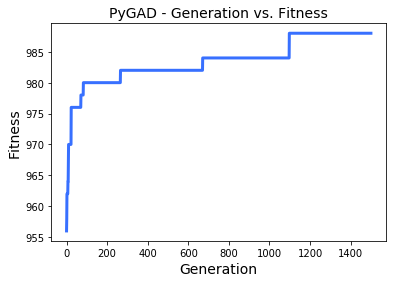

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 7 2 6 4 3 5 7 7 7 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 5 1 4 3 6 8 6 6 6 4]


 round:  379
elapsed time:  273.62707924842834
best sol [0.81253892 0.20141595 0.73590985 0.93101705 0.20141595 0.79429599
 0.00972935 0.61568173 0.31708782 0.29215448 0.07996115 0.29215448
 0.20141595 0.43623448 0.11196785 0.29215448 0.2991196  0.80359491
 0.2991196  0.8104634  0.07996115 0.73590985 0.29215448 0.31708782
 0.00972935 0.79429599 0.74956461 0.9819209  0.61025278 0.98360338
 0.87119619 0.16312093 0.03395298 0.91578586 0.10005758]
fitness:  14.0


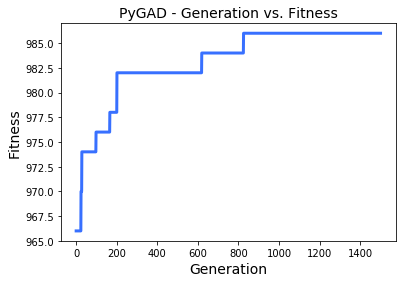

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 4 7 3 7 4 5 5 7 7 7 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 8 5 3 4 3 6 7 7 7 7 4]


 round:  380
elapsed time:  273.43882513046265
best sol [0.80916456 0.14924361 0.95958521 0.9946921  0.14973901 0.80916456
 0.14924361 0.64067333 0.14973901 0.20591237 0.03183778 0.09935418
 0.14973901 0.72550097 0.14973901 0.19104247 0.36679003 0.31585778
 0.31585778 0.75904882 0.5023567  0.03183778 0.14973901 0.09935418
 0.95958521 0.76219245 0.90234301 0.92131956 0.36679003 0.92131956
 0.92737984 0.14924361 0.92737984 0.16677422 0.00752416]
fitness:  14.0


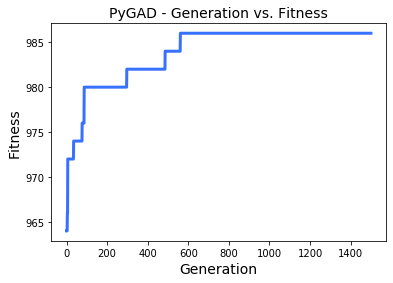

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 6 4 6 4 4 4 7 7 7 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 8 6 1 5 1 5 7 6 7 7 4]


 round:  381
elapsed time:  273.6514949798584
best sol [0.98720418 0.13110505 0.72688819 0.91906684 0.16565321 0.58445049
 0.51342913 0.40881918 0.16565321 0.6475263  0.13793018 0.13909112
 0.16565321 0.58445049 0.13909112 0.13793018 0.27335397 0.40881918
 0.77236286 0.51342913 0.01612977 0.93900288 0.40881918 0.19823404
 0.45382638 0.40881918 0.6475263  0.6475263  0.45382638 0.78841274
 0.93900288 0.08176016 0.05920271 0.74298339 0.40881918]
fitness:  14.0


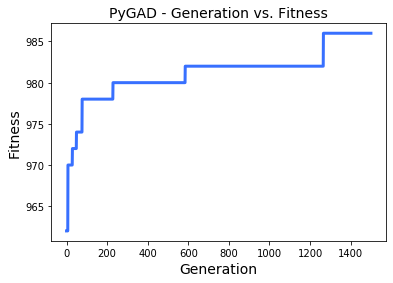

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 6 7 1 5 4 3 6 7 7 7 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 4 5 3 5 7 6 7 7 3]


 round:  382
elapsed time:  273.63684701919556
best sol [0.72623054 0.10842674 0.93889981 0.93889981 0.13778215 0.62875533
 0.28368737 0.37289535 0.04565872 0.16592761 0.0144235  0.28368737
 0.20887607 0.31136018 0.25743289 0.04565872 0.23159885 0.81984113
 0.67107807 0.51696077 0.67107807 0.17963455 0.35605309 0.28368737
 0.57174119 0.28368737 0.9840753  0.98814683 0.57174119 0.81984113
 0.88820088 0.17963455 0.0144235  0.20887607 0.40526978]
fitness:  14.0


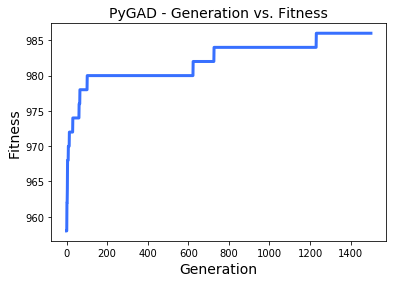

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 3 7 3 2 3 6 6 8 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 5 2 4 3 4 7 5 8 7 3]


 round:  383
elapsed time:  272.81496572494507
best sol [0.37580303 0.18034573 0.99483152 0.91929513 0.26710144 0.90481799
 0.81164237 0.39441655 0.05030623 0.31653067 0.05030623 0.31653067
 0.26935396 0.61029058 0.26710144 0.2010289  0.91929513 0.91929513
 0.39441655 0.58666582 0.13028367 0.10276311 0.75508811 0.24597382
 0.81164237 0.85266266 0.92660159 0.88101099 0.75508811 0.39441655
 0.81164237 0.13028367 0.46932238 0.46932238 0.20171729]
fitness:  18.0


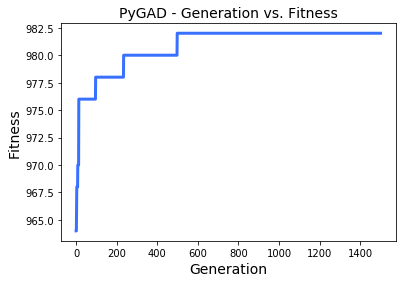

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [ 7  5  8  3  6  4  3  5  6  7 10  4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 4 5 3 6 6 6 9 7 3]


 round:  384
elapsed time:  272.4572250843048
best sol [0.81532716 0.09494337 0.90270817 0.94408962 0.02804717 0.72471975
 0.32771523 0.58477456 0.13533749 0.24975779 0.10864052 0.26632996
 0.26632996 0.58477456 0.71766612 0.01162671 0.40291251 0.3500639
 0.72471975 0.48865213 0.03258183 0.94845758 0.10864052 0.13533749
 0.48865213 0.7992504  0.69972798 0.62743652 0.69972798 0.55597189
 0.85870675 0.48545439 0.48007024 0.13533749 0.64971131]
fitness:  16.0


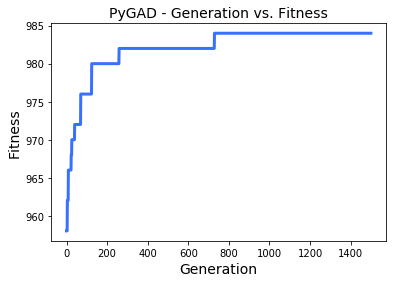

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 4 7 5 5 3 4 4 7 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 4 3 4 7 5 9 7 4]


 round:  385
elapsed time:  272.58925890922546
best sol [0.58342973 0.16268532 0.91375482 0.97493351 0.04421133 0.77178419
 0.60861735 0.52240188 0.138155   0.19779123 0.09639818 0.04421133
 0.35597988 0.7281911  0.09639818 0.0260702  0.70093738 0.93046639
 0.93046639 0.42585578 0.14171235 0.46815365 0.15959938 0.19779123
 0.26741639 0.75458682 0.93046639 0.99930275 0.52240188 0.99930275
 0.4058989  0.19470952 0.21577731 0.55217376 0.13111492]
fitness:  16.0


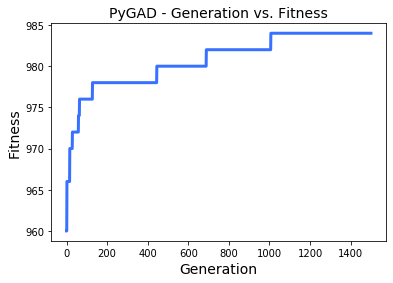

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 5 7 3 6 3 4 4 8 6 7 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 7 2 7 2 4 7 6 7 6 3]


 round:  386
elapsed time:  273.0757598876953
best sol [0.56270529 0.21306942 0.8569043  0.98800447 0.21306942 0.99134968
 0.72997116 0.31085374 0.09793344 0.05101952 0.16316857 0.19318191
 0.39859003 0.39022823 0.39859003 0.04871078 0.44003757 0.40325363
 0.19318191 0.91994444 0.99354987 0.81565754 0.44648559 0.39859003
 0.31085374 0.39859003 0.99354987 0.40576777 0.40246264 0.65420061
 0.98800447 0.22499109 0.62307769 0.62794504 0.09099622]
fitness:  14.0


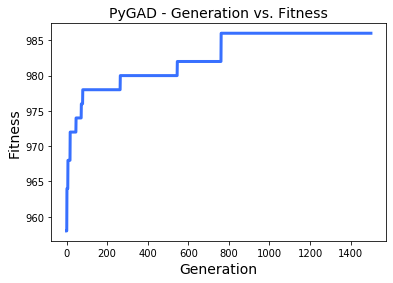

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [4 5 6 4 7 3 5 5 7 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 4 2 6 6 7 7 7 4]


 round:  387
elapsed time:  273.0623068809509
best sol [0.63475263 0.11932849 0.91712361 0.64996792 0.32424207 0.77356028
 0.08453547 0.35580046 0.32424207 0.08453547 0.08453547 0.14067136
 0.24597143 0.32424207 0.1706656  0.08453547 0.35580046 0.32424207
 0.59205143 0.77356028 0.14067136 0.77356028 0.08453547 0.14067136
 0.80991358 0.52542358 0.9828195  0.72528763 0.59635523 0.32424207
 0.80991358 0.28741078 0.22652012 0.07261445 0.36521844]
fitness:  12.0


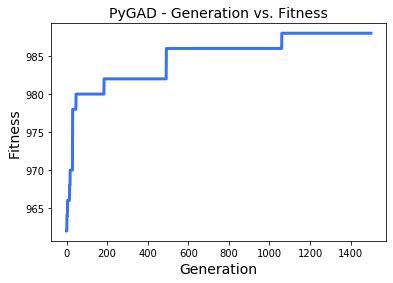

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 6 1 6 4 3 4 6 7 6 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 5 2 3 2 6 7 6 7 7 2]


 round:  388
elapsed time:  271.99044394493103
best sol [0.75138974 0.10541984 0.88851024 0.88851024 0.35401215 0.88851024
 0.24001988 0.24001988 0.20662299 0.35401215 0.51855245 0.00473726
 0.01569858 0.88851024 0.23444937 0.12812053 0.60544597 0.60544597
 0.16895783 0.60544597 0.09944779 0.32437654 0.20700193 0.24001988
 0.86429502 0.99352953 0.98855438 0.98855438 0.32437654 0.99352953
 0.86429502 0.25689008 0.23444937 0.6213674  0.23940644]
fitness:  14.0


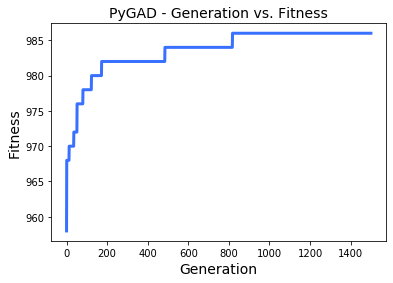

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 6 3 6 4 4 4 7 6 8 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 6 3 4 3 4 7 7 7 7 3]


 round:  389
elapsed time:  272.86931705474854
best sol [0.71293696 0.14832962 0.84419757 0.9104328  0.26465972 0.87548651
 0.16940025 0.59556866 0.24447304 0.00272004 0.1629679  0.43401367
 0.16940025 0.59556866 0.26465972 0.16940025 0.49985544 0.26465972
 0.43401367 0.59556866 0.16940025 0.39914233 0.16940025 0.1793049
 0.86927039 0.16940025 0.86927039 0.92446367 0.55496572 0.59556866
 0.92446367 0.16940025 0.26054049 0.17336483 0.16940025]
fitness:  14.0


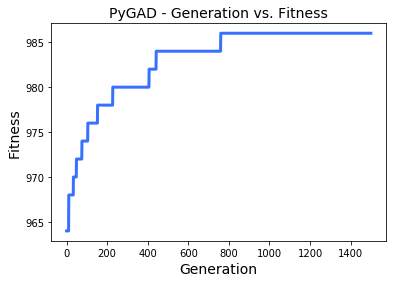

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 4 6 3 7 4 4 4 6 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 8 6 3 4 2 5 6 5 7 7 3]


 round:  390
elapsed time:  272.7666869163513
best sol [0.72719    0.1084822  0.9231853  0.97360088 0.33375083 0.99808971
 0.08417451 0.46878991 0.14474519 0.54565323 0.0923096  0.08417451
 0.33375083 0.34854363 0.47224493 0.07180424 0.54565323 0.53019567
 0.30081958 0.9231853  0.05071422 0.13281457 0.47224493 0.1805156
 0.47224493 0.9231853  0.86378245 0.47224493 0.5144328  0.86378245
 0.54565323 0.14474519 0.53019567 0.30081958 0.13281457]
fitness:  14.0


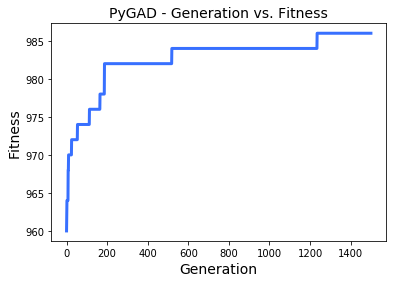

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 1 6 4 3 3 7 6 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 3 3 6 3 6 8 6 3]


 round:  391
elapsed time:  272.827180147171
best sol [0.79463237 0.08286142 0.98320142 0.89309407 0.0775255  0.38861439
 0.38861439 0.38000432 0.08762125 0.39437881 0.79870746 0.38861439
 0.0084241  0.22349754 0.34878033 0.00758878 0.12888418 0.38861439
 0.97610905 0.93455669 0.57076375 0.98320142 0.52472286 0.34292471
 0.49956306 0.0775255  0.49956306 0.68505608 0.21805294 0.21142355
 0.93455669 0.29403842 0.34292471 0.79870746 0.05169331]
fitness:  16.0


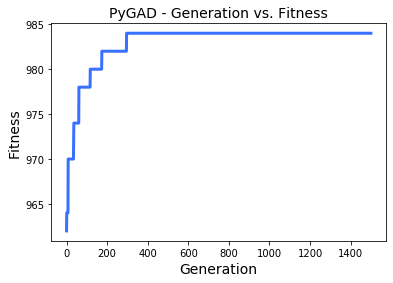

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 4 6 3 4 4 7 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 6 6 2 3 7 7 6 6 6 4]


 round:  392
elapsed time:  273.8621051311493
best sol [0.75127687 0.25825348 0.96258856 0.78234292 0.25705439 0.57033343
 0.56410762 0.37745436 0.03630826 0.25705439 0.16034318 0.04716962
 0.16034318 0.42989775 0.16034318 0.34519121 0.23961043 0.6279595
 0.56410762 0.75127687 0.04716962 0.96258856 0.89169456 0.03630826
 0.3550933  0.54864178 0.56410762 0.57955836 0.56410762 0.54864178
 0.94376643 0.15482542 0.57955836 0.9551741  0.02285252]
fitness:  14.0


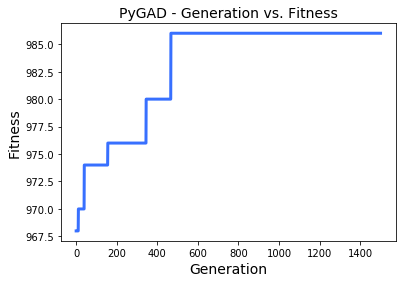

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 3 7 2 6 4 4 4 8 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 5 1 4 3 5 6 5 7 7 5]


 round:  393
elapsed time:  273.2697238922119
best sol [8.37202098e-01 1.26336120e-01 9.58381832e-01 8.96192299e-01
 3.29078047e-01 7.94006238e-01 3.29383056e-01 3.05852888e-01
 3.14038083e-01 3.41415433e-01 4.06270274e-04 1.87238010e-01
 4.43093716e-01 4.98051767e-01 4.09445128e-01 1.22377263e-01
 8.09707898e-01 4.41978583e-01 7.78753946e-01 6.19993291e-01
 5.86079185e-01 4.78045654e-01 2.06210233e-01 9.37122582e-02
 2.75514675e-01 6.76024013e-01 8.86433022e-01 9.37206952e-01
 4.98051767e-01 5.87787959e-01 8.98959174e-01 1.48857612e-01
 8.86433022e-01 5.04764760e-02 2.19816082e-01]
fitness:  12.0


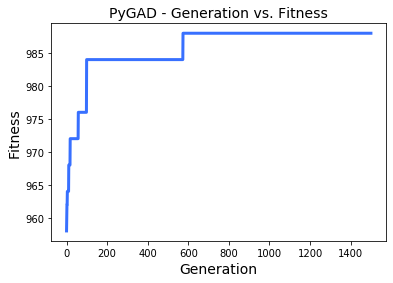

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 5 7 4 7 5 4 4 6 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 7 3 4 4 6 7 6 7 7 3]


 round:  394
elapsed time:  273.5305850505829
best sol [0.68560324 0.14815065 0.84433281 0.62519886 0.13835986 0.3634888
 0.85249152 0.13835986 0.15737369 0.38066373 0.34969519 0.09710414
 0.68560324 0.33817056 0.85249152 0.10966316 0.62519886 0.47794219
 0.13835986 0.85249152 0.15737369 0.96110534 0.10966316 0.13835986
 0.81881292 0.85628103 0.96110534 0.33817056 0.40289525 0.1914419
 0.78405439 0.18749599 0.32337106 0.07441627 0.55903418]
fitness:  16.0


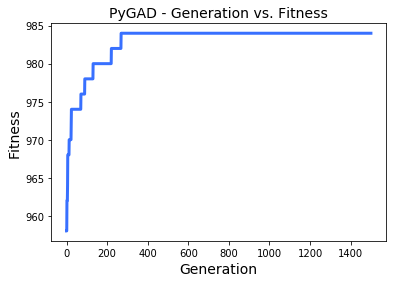

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 7 7 5 7 4 4 4 5 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 6 3 5 5 6 7 6 7 7 3]


 round:  395
elapsed time:  271.65215277671814
best sol [0.8118182  0.16780767 0.95980969 0.79220841 0.22000498 0.30643374
 0.40173218 0.36964617 0.29432801 0.10871829 0.04750565 0.08450042
 0.40622792 0.50041616 0.40622792 0.22000498 0.40622792 0.40622792
 0.22000498 0.81023457 0.59206183 0.30643374 0.19317557 0.08450042
 0.79220841 0.92335185 0.92200813 0.95980969 0.40173218 0.79220841
 0.95980969 0.08450042 0.40622792 0.92335185 0.10931616]
fitness:  14.0


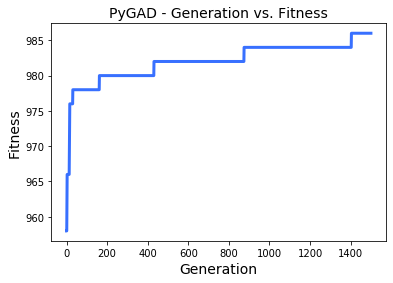

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 5 6 4 5 4 7 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 5 1 5 4 6 7 7 8 7 4]


 round:  396
elapsed time:  273.22195386886597
best sol [0.83075058 0.13957775 0.97622806 0.96067676 0.19693395 0.60511564
 0.40941546 0.44765451 0.21297336 0.06559801 0.1441419  0.41182568
 0.19816988 0.5163286  0.43303749 0.06966345 0.97622806 0.16120398
 0.62896179 0.60511564 0.16093947 0.97622806 0.43303749 0.16093947
 0.31867557 0.5163286  0.69914566 0.74690354 0.46748466 0.74690354
 0.26992642 0.2798424  0.55734254 0.0320222  0.251012  ]
fitness:  14.0


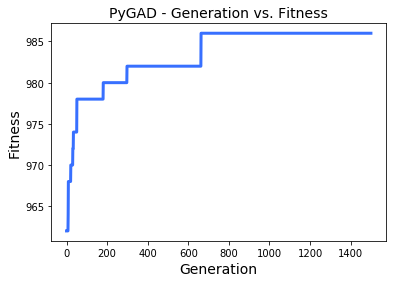

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 4 6 1 6 3 4 6 8 7 4 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 4 2 6 7 6 7 6 3]


 round:  397
elapsed time:  271.93112993240356
best sol [0.7162062  0.23416471 0.97719184 0.91789045 0.23238761 0.95542209
 0.09749474 0.27495099 0.57966848 0.28045743 0.1018347  0.1018347
 0.40800878 0.30267509 0.42542825 0.05058716 0.28045743 0.42038449
 0.57966848 0.57966848 0.09749474 0.48205196 0.08327677 0.09749474
 0.19183973 0.87451549 0.96814743 0.94293595 0.53266323 0.64781055
 0.76145314 0.20008632 0.36592328 0.19183973 0.19183973]
fitness:  14.0


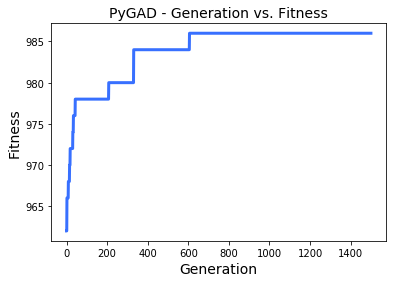

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 5 8 2 6 3 4 4 6 7 6 6]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 6 6 3 5 3 5 7 6 7 7 3]


 round:  398
elapsed time:  272.910178899765
best sol [0.57355805 0.07533121 0.74037279 0.92257569 0.08601494 0.77575362
 0.88781223 0.58212537 0.08960011 0.11894397 0.17373849 0.45227641
 0.3238341  0.69279155 0.01060393 0.06506168 0.4960758  0.34196231
 0.83080148 0.5389699  0.79043513 0.88781223 0.01682824 0.12830443
 0.83453533 0.54684612 0.4148349  0.73895511 0.12830443 0.79043513
 0.95797938 0.34196231 0.15647049 0.07258934 0.50545802]
fitness:  16.0


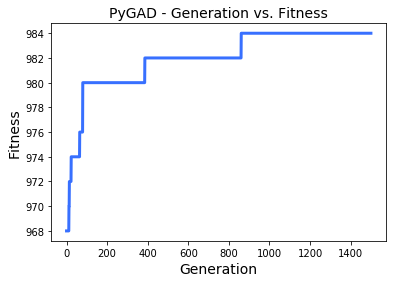

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 6 5 6 3 3 4 7 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 7 3 4 1 5 6 7 7 7 3]


 round:  399
elapsed time:  271.6675968170166
best sol [0.84789445 0.08429054 0.88522238 0.96785194 0.22732933 0.56431546
 0.68570665 0.36915047 0.1801766  0.47724619 0.13802585 0.1801766
 0.10878974 0.41400339 0.08123314 0.25526586 0.19424929 0.97206022
 0.32704074 0.97206022 0.08240385 0.70710518 0.68570665 0.05897866
 0.58862059 0.95649584 0.57414398 0.68570665 0.73014113 0.82931367
 0.55927202 0.17589438 0.70549596 0.30513343 0.01336186]
fitness:  16.0


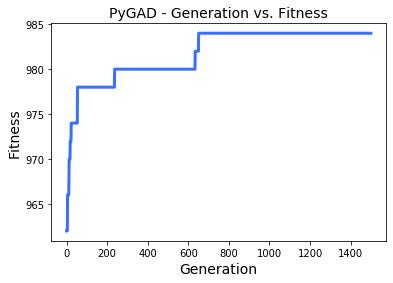

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 3 6 4 4 4 5 6 8 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 4 3 3 6 5 6 8 6 3]


 round:  400
elapsed time:  273.15844917297363
best sol [0.5384087  0.20972012 0.82451036 0.84335105 0.15919847 0.80849893
 0.93010409 0.32154753 0.17021712 0.0848995  0.04547286 0.11418236
 0.26011731 0.48258679 0.15919847 0.3262487  0.44804271 0.84335105
 0.37175602 0.5384087  0.26502186 0.84335105 0.3262487  0.17101224
 0.46675138 0.61268908 0.32154753 0.46675138 0.48258679 0.67513876
 0.88046053 0.10278216 0.04547286 0.5384087  0.12533568]
fitness:  14.0


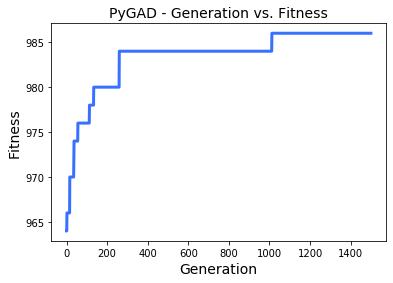

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [5 3 5 2 6 4 4 5 7 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 4 3 4 5 6 7 7 3]


 round:  401
elapsed time:  273.5038311481476
best sol [0.33874675 0.18958239 0.79801294 0.60731111 0.01187223 0.93014288
 0.94106731 0.67419993 0.15912797 0.661922   0.01187223 0.23645856
 0.12328219 0.11042325 0.15912797 0.09051151 0.98404296 0.84134253
 0.91093984 0.60731111 0.53128243 0.79595041 0.45471036 0.56583557
 0.71893962 0.5671244  0.27922599 0.58902299 0.27922599 0.88774562
 0.75657529 0.24227186 0.62379502 0.08410435 0.30542663]
fitness:  18.0


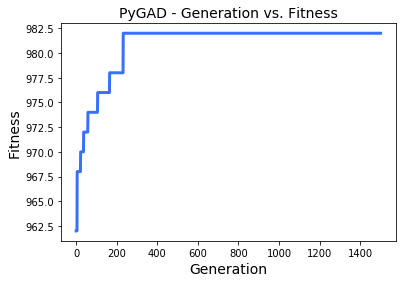

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 6 3 5 5 5 4 6 7 7 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 5 6 3 4 3 6 6 8 8 7 3]


 round:  402
elapsed time:  272.7949788570404
best sol [0.66389476 0.20506753 0.89771799 0.89771799 0.09615076 0.87286004
 0.96300142 0.64108072 0.00505023 0.0732213  0.0502797  0.26505759
 0.11433082 0.89771799 0.64108072 0.0502797  0.1143565  0.64108072
 0.26505759 0.96300142 0.23285976 0.96188073 0.68215129 0.20506753
 0.1143565  0.0294347  0.58127938 0.64108072 0.69658812 0.52420267
 0.91743652 0.19920077 0.13642086 0.00505023 0.68215129]
fitness:  16.0


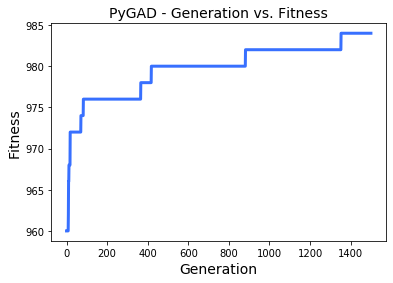

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [4 5 7 5 6 3 3 4 6 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 7 1 5 3 6 7 5 6 6 2]


 round:  403
elapsed time:  273.79613304138184
best sol [0.82606798 0.13986067 0.89486334 0.95770988 0.28205486 0.91989704
 0.09658009 0.31109924 0.1767944  0.15745246 0.1767944  0.19829215
 0.1767944  0.48360939 0.28285356 0.36908306 0.31109924 0.15745246
 0.49500229 0.91989704 0.16215004 0.28285356 0.03114466 0.1767944
 0.76900775 0.19829215 0.88026834 0.94038014 0.50496157 0.89486334
 0.97555182 0.29961787 0.17655487 0.58506298 0.07246515]
fitness:  12.0


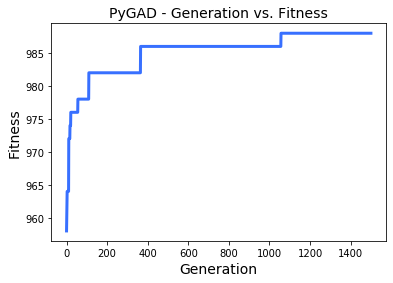

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 8 3 7 4 4 4 7 7 7 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 5 3 3 4 7 7 6 7 7 3]


 round:  404
elapsed time:  274.5569579601288
best sol [0.97823393 0.11684596 0.8005621  0.98145877 0.21334075 0.74652657
 0.89207488 0.49349371 0.01698998 0.09027062 0.01698998 0.01698998
 0.18004791 0.32293224 0.01239807 0.31146228 0.80774279 0.13647242
 0.74652657 0.62866423 0.01239807 0.41644626 0.74652657 0.01164294
 0.62931687 0.80774279 0.76988664 0.80774279 0.49757195 0.76509961
 0.6488027  0.13647242 0.13647242 0.62931687 0.39527127]
fitness:  16.0


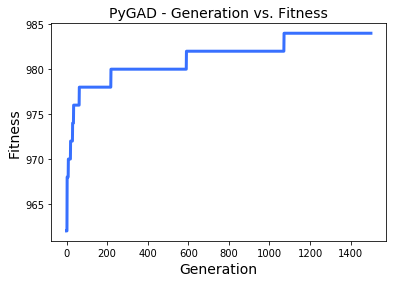

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [9 5 6 2 6 4 4 3 6 5 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 3 3 6 5 6 7 6 4]


 round:  405
elapsed time:  273.1110861301422
best sol [0.59627175 0.11920621 0.97108383 0.73638172 0.03763681 0.80393122
 0.86634876 0.36183598 0.04094171 0.49509463 0.12631042 0.2116148
 0.03130006 0.53121447 0.2116148  0.0391536  0.38272356 0.65169047
 0.75232203 0.80393122 0.805319   0.75232203 0.06466827 0.04094171
 0.65169047 0.34750941 0.53121447 0.65169047 0.45120201 0.65940519
 0.805319   0.26021382 0.34750941 0.06069792 0.31076676]
fitness:  14.0


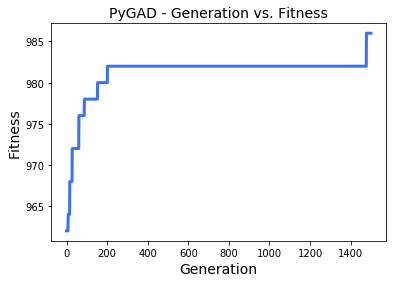

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 8 3 7 3 4 3 7 7 8 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 6 3 4 3 7 6 7 6 7 3]


 round:  406
elapsed time:  272.60541915893555
best sol [0.38261681 0.15080266 0.99454038 0.97186274 0.30839984 0.20839414
 0.54247034 0.45262378 0.16079314 0.03985136 0.16079314 0.16435396
 0.20839414 0.54247034 0.20839414 0.1423606  0.20839414 0.54247034
 0.85762906 0.54247034 0.13951473 0.54247034 0.13618041 0.13618041
 0.16435396 0.56673256 0.85762906 0.9227289  0.54247034 0.97186274
 0.9227289  0.16435396 0.57619345 0.15080266 0.43859658]
fitness:  12.0


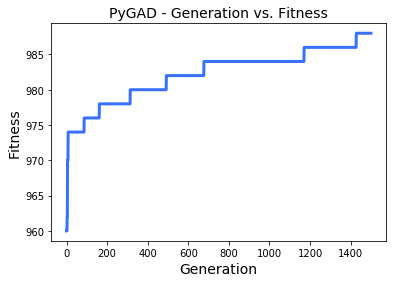

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 7 2 7 4 3 4 7 5 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 6 1 4 4 4 6 6 7 7 3]


 round:  407
elapsed time:  272.9986491203308
best sol [0.46398946 0.23979422 0.89521737 0.65066849 0.20697489 0.64417289
 0.93499918 0.40917138 0.20880289 0.20697489 0.14838612 0.01724785
 0.04386337 0.89669846 0.04340521 0.14838612 0.53060864 0.66703624
 0.45205808 0.17841946 0.09880766 0.97366892 0.15869006 0.19334906
 0.19334906 0.91805558 0.70213607 0.91805558 0.26255525 0.55002293
 0.86383396 0.22935059 0.09023873 0.98129256 0.13307915]
fitness:  18.0


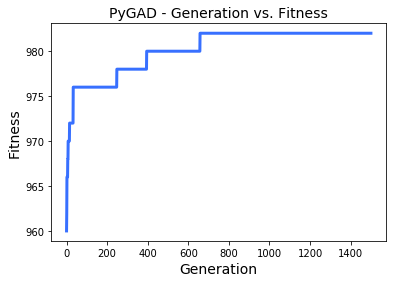

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 2 5 2 4 6 7 7 6 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 5 1 5 2 3 8 6 6 7 4]


 round:  408
elapsed time:  273.0382070541382
best sol [0.70185062 0.20596579 0.61662911 0.88037511 0.2770561  0.88934637
 0.34158006 0.37936134 0.18716331 0.29896469 0.11020469 0.20144683
 0.61662911 0.34158006 0.44072382 0.24496796 0.46513827 0.37936134
 0.44072382 0.37936134 0.29896469 0.29896469 0.54951051 0.18716331
 0.46513827 0.37936134 0.88934637 0.97481961 0.53183562 0.61662911
 0.78746372 0.24496796 0.20976445 0.5379908  0.1378299 ]
fitness:  14.0


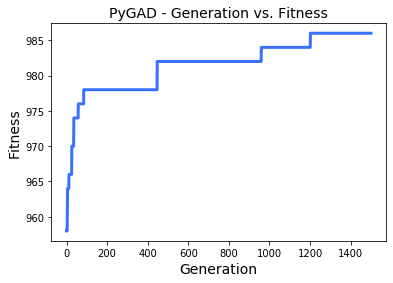

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 7 4 6 4 4 3 5 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 6 2 4 4 4 7 6 7 7 3]


 round:  409
elapsed time:  272.7920718193054
best sol [0.78506085 0.09738756 0.52268865 0.68097454 0.24193086 0.72519573
 0.06278785 0.68097454 0.13408274 0.13408274 0.14838523 0.05072692
 0.75668911 0.44926255 0.14968997 0.26612442 0.42588634 0.69250631
 0.21837277 0.79064258 0.22966056 0.75668911 0.30476976 0.09738756
 0.59368482 0.58985849 0.88368051 0.42663049 0.50476479 0.28368237
 0.83027595 0.27063639 0.17856101 0.9906589  0.16227412]
fitness:  16.0


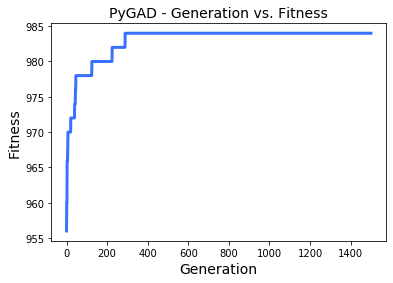

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 6 3 7 4 4 5 5 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 3 1 6 3 6 6 6 7 7 4]


 round:  410
elapsed time:  271.68348693847656
best sol [0.48536712 0.12069223 0.97231017 0.66237441 0.04699564 0.75357175
 0.66237441 0.48499016 0.17734591 0.00872421 0.40392673 0.05431605
 0.97025816 0.24330187 0.33885762 0.17734591 0.75357175 0.76641605
 0.61246074 0.17734591 0.05431605 0.97231017 0.17734591 0.04699564
 0.82499481 0.52180717 0.7698658  0.75357175 0.40392673 0.75161354
 0.36414816 0.10461088 0.07012473 0.2502934  0.37737083]
fitness:  14.0


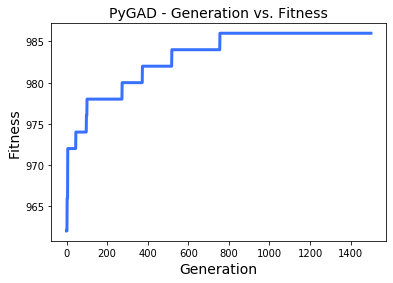

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 4 7 4 6 3 3 4 6 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 6 1 6 3 4 7 6 7 6 3]


 round:  411
elapsed time:  273.2525601387024
best sol [0.9053555  0.13355682 0.83041734 0.9234055  0.33256784 0.9053555
 0.68973623 0.3576697  0.06555831 0.68618405 0.13355682 0.12447123
 0.13355682 0.30218158 0.10476375 0.13355682 0.78121858 0.47619108
 0.81869106 0.53692298 0.23051625 0.87069263 0.5817567  0.13355682
 0.48153359 0.48153359 0.48153359 0.81869106 0.53742794 0.75988689
 0.48153359 0.2061368  0.48153359 0.53742794 0.2020238 ]
fitness:  14.0


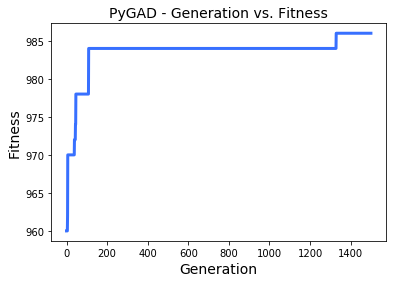

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 5 7 2 6 4 4 6 7 7 6 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 4 4 3 6 7 5 7 6 4]


 round:  412
elapsed time:  273.0806074142456
best sol [0.72352602 0.05717699 0.99195977 0.70040446 0.39226891 0.73852722
 0.62435764 0.49025737 0.20392355 0.17686716 0.08402772 0.15405227
 0.03213355 0.83490248 0.34298843 0.08402772 0.51247676 0.41406271
 0.41406271 0.91762817 0.22736504 0.200891   0.49025737 0.00804248
 0.95812957 0.41406271 0.95933174 0.62437268 0.83490248 0.51247676
 0.84996393 0.14117561 0.41406271 0.14826613 0.18994357]
fitness:  14.0


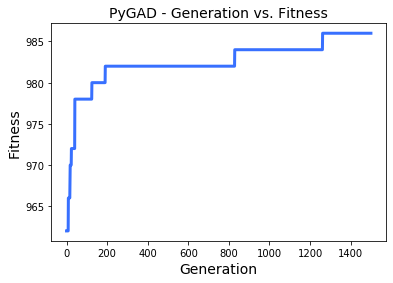

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 4 8 3 6 4 4 3 6 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 4 3 7 5 6 7 7 2]


 round:  413
elapsed time:  272.492666721344
best sol [0.7352742  0.20425734 0.94053386 0.98707992 0.1571783  0.25549615
 0.06002952 0.45160753 0.42038714 0.24964615 0.17471772 0.00646545
 0.20824726 0.42038714 0.17471772 0.17471772 0.08038896 0.1642185
 0.64787678 0.84166655 0.17471772 0.43999632 0.21554891 0.32439682
 0.41068939 0.2411012  0.94799102 0.94799102 0.38109311 0.84166655
 0.90998267 0.2411012  0.51403064 0.32439682 0.07698921]
fitness:  12.0


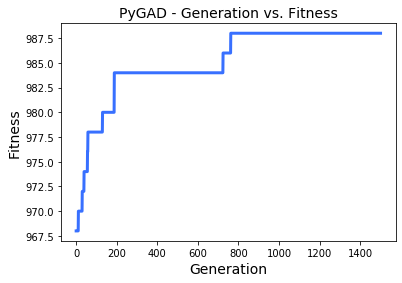

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 8 3 7 4 4 4 7 5 6 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 5 3 4 3 6 7 6 8 7 3]


 round:  414
elapsed time:  273.5468189716339
best sol [0.53254642 0.20286091 0.99409148 0.6511416  0.20102    0.88641007
 0.5898106  0.30282972 0.00754357 0.19227063 0.07092359 0.07092359
 0.30456862 0.38512421 0.19227063 0.07092359 0.84268026 0.38193619
 0.93695523 0.53254642 0.23845498 0.69233685 0.68315094 0.2617795
 0.5481672  0.69600788 0.78929206 0.67742236 0.76687919 0.67742236
 0.88735784 0.21849568 0.07092359 0.4972904  0.58228783]
fitness:  16.0


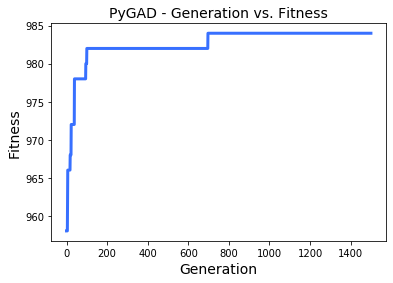

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 4 8 2 6 3 4 6 6 6 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [ 6  7  5  1  4  3  6  5  6 10  7  3]


 round:  415
elapsed time:  271.9127209186554
best sol [0.7660012  0.28922872 0.87422413 0.92546365 0.32295472 0.9443336
 0.48243873 0.30872872 0.1107812  0.63840278 0.05566005 0.48379058
 0.01527264 0.45366132 0.63840278 0.06692242 0.45812724 0.63266353
 0.52980868 0.69840762 0.28922872 0.46758167 0.11378604 0.37537492
 0.09121686 0.52980868 0.38618295 0.93595017 0.52980868 0.52630173
 0.46843188 0.01262793 0.09121686 0.58777781 0.63266353]
fitness:  14.0


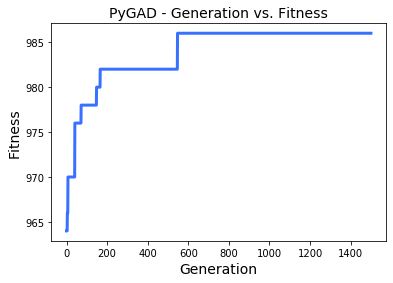

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 5 6 3 4 4 7 6 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 6 4 4 3 6 6 5 7 6 3]


 round:  416
elapsed time:  273.62305879592896
best sol [0.79455124 0.18434844 0.88257187 0.97830794 0.17069016 0.69716049
 0.52794215 0.31073787 0.17069016 0.17069016 0.35187777 0.13124593
 0.31073787 0.61178412 0.40279647 0.02415927 0.40227803 0.61178412
 0.8579804  0.53841095 0.40227803 0.2935305  0.63956913 0.40227803
 0.17069016 0.33981147 0.9448502  0.97830794 0.269184   0.69779335
 0.9448502  0.26260586 0.17069016 0.66585091 0.1349717 ]
fitness:  12.0


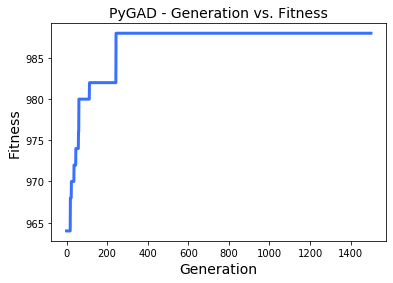

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 8 4 6 3 4 4 6 6 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 3 4 3 5 7 6 6 7 3]


 round:  417
elapsed time:  273.23443484306335
best sol [0.29805821 0.12285957 0.93457971 0.87592775 0.07638991 0.72295548
 0.47006179 0.3041583  0.08017384 0.00645753 0.08017384 0.7975117
 0.55466991 0.38155453 0.09330226 0.3041583  0.50701269 0.3041583
 0.69875489 0.57561322 0.18410046 0.12285957 0.57257352 0.12460808
 0.57257352 0.89501963 0.90654633 0.945587   0.22496722 0.96591817
 0.90654633 0.10580675 0.3041583  0.36536379 0.15606954]
fitness:  14.0


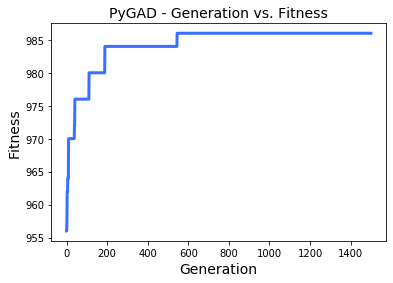

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 5 3 6 4 4 4 8 6 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 5 6 3 4 3 5 7 6 7 7 3]


 round:  418
elapsed time:  272.69344997406006
best sol [0.69906871 0.10686295 0.9065362  0.81511892 0.19451075 0.81511892
 0.15318206 0.39391673 0.1522821  0.25431137 0.15998803 0.11364843
 0.57190108 0.57190108 0.20522947 0.06303446 0.0082089  0.49136335
 0.57190108 0.64541583 0.1336097  0.74822924 0.57190108 0.31589054
 0.72186113 0.75122692 0.18777364 0.92082572 0.39948108 0.40556129
 0.79074985 0.1336097  0.57190108 0.12620209 0.0082089 ]
fitness:  14.0


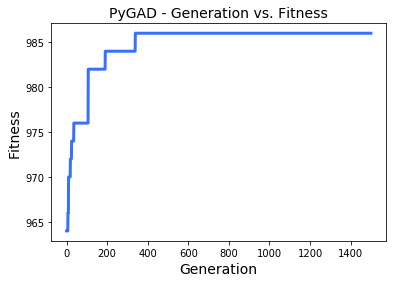

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 2 7 3 7 3 4 5 5 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 5 2 5 2 5 7 6 7 7 2]


 round:  419
elapsed time:  273.3999390602112
best sol [0.04658357 0.13533179 0.91647156 0.68242971 0.45452912 0.97546792
 0.63371486 0.56106887 0.1913631  0.2571137  0.12428751 0.06353719
 0.61193717 0.26856019 0.15378863 0.19640066 0.88709457 0.72209861
 0.45452912 0.57121949 0.23045289 0.5803334  0.40976693 0.21212569
 0.45452912 0.19640066 0.91647156 0.97546792 0.39094212 0.79031611
 0.84654943 0.1913631  0.72209861 0.15114439 0.8217665 ]
fitness:  16.0


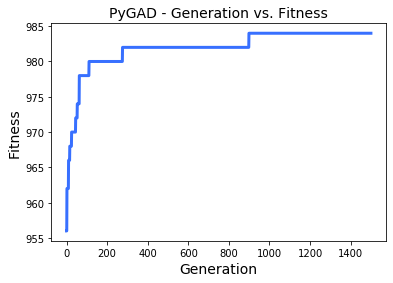

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [3 5 7 4 7 4 4 5 5 6 7 6]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 4 2 6 7 6 7 8 3]


 round:  420
elapsed time:  272.6789450645447
best sol [0.68119399 0.10485907 0.99416701 0.74243078 0.19731059 0.90669751
 0.03311182 0.39456072 0.09196116 0.22150114 0.14142213 0.46259385
 0.87072065 0.10485907 0.9939116  0.21459073 0.9939116  0.43993064
 0.46259385 0.62425201 0.03311182 0.09196116 0.22150114 0.09196116
 0.65553194 0.21459073 0.95312608 0.9939116  0.51896088 0.8715979
 0.87072065 0.16229613 0.43993064 0.01408366 0.65553194]
fitness:  14.0


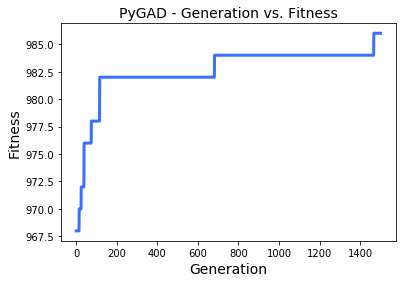

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 7 3 9 4 4 3 7 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 5 3 4 6 6 7 5 7 7 3]


 round:  421
elapsed time:  271.56833577156067
best sol [0.91950121 0.09976578 0.70504025 0.89604924 0.26364451 0.96388558
 0.1091344  0.26364451 0.14904918 0.16827734 0.09965748 0.08685382
 0.1339278  0.42003574 0.38438326 0.26364451 0.436294   0.16711906
 0.4476613  0.69268708 0.02706786 0.26364451 0.69268708 0.1091344
 0.60677501 0.203109   0.89604924 0.93400565 0.38438326 0.60191665
 0.93400565 0.16827734 0.05783638 0.64143614 0.46515097]
fitness:  14.0


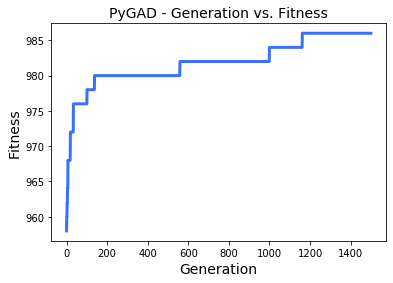

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 2 6 4 4 3 6 6 6 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 5 2 3 3 6 7 5 7 7 4]


 round:  422
elapsed time:  272.8201928138733
best sol [0.85676081 0.09960192 0.98930284 0.86649816 0.20574686 0.43241222
 0.97644681 0.37810996 0.10636121 0.03266672 0.12371301 0.54316572
 0.25010227 0.44366854 0.29024174 0.15568455 0.0097757  0.73173807
 0.83898306 0.7390453  0.0097757  0.57061004 0.16271063 0.12371301
 0.47098745 0.35652309 0.86649816 0.9326407  0.47098745 0.83898306
 0.57061004 0.12371301 0.15568455 0.33252186 0.39007888]
fitness:  16.0


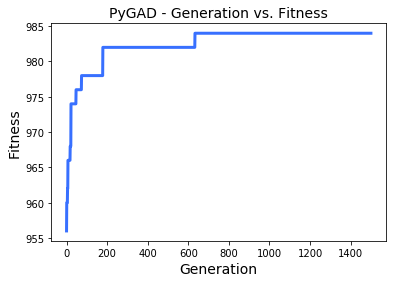

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 3 7 4 2 5 8 6 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 7 3 4 4 5 6 6 7 6 3]


 round:  423
elapsed time:  272.38716316223145
best sol [0.71533826 0.15619142 0.94328942 0.9343325  0.01142836 0.95044379
 0.15916987 0.67088747 0.33445471 0.37624222 0.13631062 0.02599266
 0.75165414 0.17053355 0.2397419  0.02599266 0.75165414 0.29051554
 0.93760606 0.67088747 0.94536967 0.95044379 0.11730869 0.37624222
 0.37624222 0.25607173 0.75528707 0.5910974  0.3429927  0.78092905
 0.75165414 0.27689141 0.13631062 0.78092905 0.20492849]
fitness:  12.0


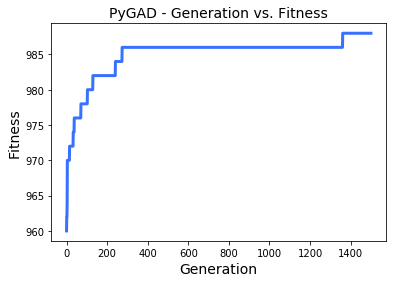

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 5 7 4 7 3 4 5 7 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 3 5 2 7 7 7 7 7 3]


 round:  424
elapsed time:  271.84703397750854
best sol [0.83267756 0.20830374 0.92046743 0.71441475 0.24196561 0.58722455
 0.6371109  0.46732394 0.19808375 0.24196561 0.03961491 0.19808375
 0.31637702 0.47614842 0.46711026 0.14139705 0.77511872 0.79021865
 0.47614842 0.63642143 0.85819781 0.95856714 0.03961491 0.02378626
 0.31637702 0.77511872 0.75630108 0.59069392 0.03961491 0.30085944
 0.92046743 0.14769543 0.08881921 0.12589448 0.63712231]
fitness:  16.0


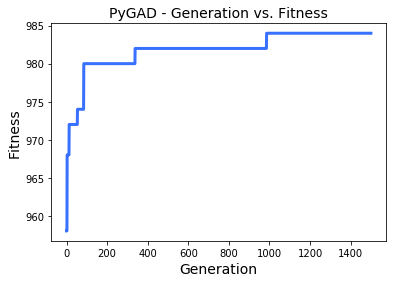

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 8 2 5 4 3 4 6 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 4 3 6 7 7 4 6 2]


 round:  425
elapsed time:  272.8666639328003
best sol [0.80080865 0.30578347 0.98780007 0.74861248 0.30576383 0.62208406
 0.82373409 0.34225942 0.17162623 0.7555272  0.0944791  0.01600658
 0.01357203 0.61501072 0.35256042 0.35256042 0.45663962 0.77947332
 0.60791348 0.60117935 0.7555272  0.34225942 0.35256042 0.34122531
 0.24957426 0.81912057 0.86537035 0.92121906 0.24957426 0.58257826
 0.7555272  0.24957426 0.11436669 0.51242859 0.0093098 ]
fitness:  16.0


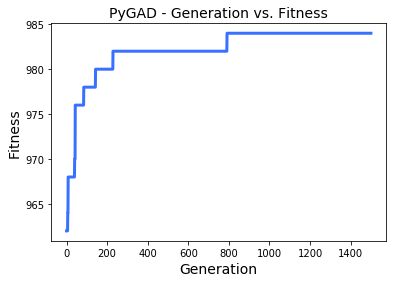

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 6 8 3 7 4 5 4 7 5 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 6 2 5 4 5 6 7 7 7 3]


 round:  426
elapsed time:  273.0106317996979
best sol [0.62533696 0.14967567 0.95448953 0.99469616 0.1529769  0.99469616
 0.01027071 0.35481879 0.08432187 0.8460151  0.16294858 0.12616187
 0.28577908 0.16294858 0.16294858 0.32581502 0.2620466  0.37611028
 0.16294858 0.8460151  0.01027071 0.28577908 0.16294858 0.12616187
 0.19601761 0.95448953 0.95448953 0.95757233 0.58337132 0.95448953
 0.8460151  0.29633182 0.19601761 0.29633182 0.25361219]
fitness:  10.0


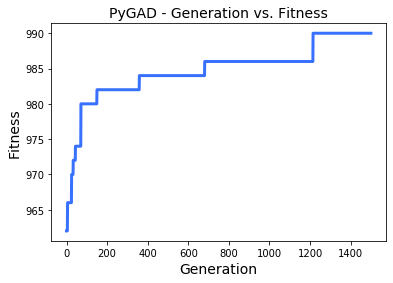

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 7 7 2 7 4 4 3 6 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 3 3 3 6 7 6 7 7 3]


 round:  427
elapsed time:  272.91571402549744
best sol [7.89894199e-01 1.14802539e-01 9.44003464e-01 9.94270155e-01
 3.62227169e-01 5.79644246e-01 4.89334385e-02 3.31646455e-01
 1.07081419e-01 2.59325642e-01 8.81918981e-02 1.33890476e-01
 5.41437850e-01 5.41437850e-01 4.21142745e-01 2.18519072e-01
 1.13990550e-01 4.20925529e-01 6.73025678e-01 3.50413092e-01
 5.13978605e-04 7.37900036e-01 1.98220084e-01 4.89334385e-02
 3.98338979e-01 5.90187566e-01 6.73025678e-01 9.19289601e-01
 3.98338979e-01 9.94270155e-01 9.52151979e-01 8.48070495e-02
 6.67027210e-01 4.82333250e-01 6.38718361e-01]
fitness:  16.0


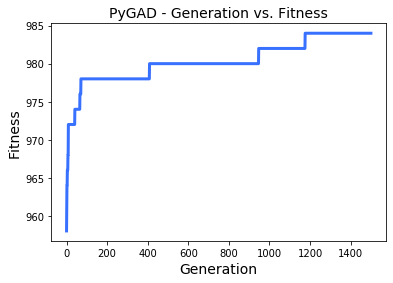

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 4 7 2 5 3 4 5 7 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 5 2 5 5 2 7 6 7 7 3]


 round:  428
elapsed time:  274.46510076522827
best sol [0.4601126  0.27308465 0.94735432 0.40928775 0.35357344 0.91658496
 0.35357344 0.41009539 0.18516282 0.05913141 0.00390436 0.40928775
 0.61400134 0.36671997 0.77222944 0.04091021 0.77222944 0.63654201
 0.18516282 0.91658496 0.00390436 0.43466421 0.43466421 0.04091021
 0.75777571 0.72057994 0.91658496 0.43466421 0.48544149 0.53030538
 0.77222944 0.43466421 0.05467594 0.47023764 0.2354659 ]
fitness:  18.0


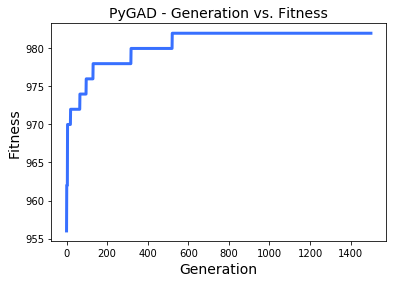

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [5 5 7 5 6 3 3 4 7 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 6 5 2 5 3 7 4 7 7 7 3]


 round:  429
elapsed time:  272.6442461013794
best sol [0.77650076 0.19033943 0.79560597 0.84189727 0.01064739 0.758413
 0.66704067 0.43672247 0.1021452  0.43672247 0.14024641 0.01405304
 0.30128793 0.43672247 0.10030808 0.14092519 0.40177164 0.66347618
 0.43672247 0.66704067 0.86807962 0.66704067 0.14836443 0.10030808
 0.66704067 0.43672247 0.758413   0.758413   0.46567109 0.64067475
 0.64067475 0.12585428 0.66821769 0.01064739 0.64067475]
fitness:  16.0


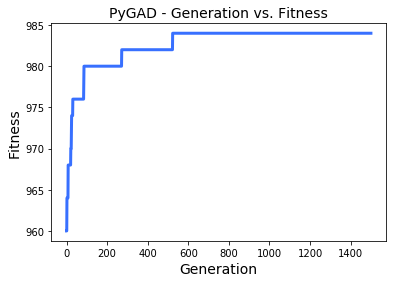

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 7 4 7 4 4 3 5 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 6 2 4 2 6 6 8 7 6 3]


 round:  430
elapsed time:  273.1798539161682
best sol [6.65547955e-01 1.05386517e-01 6.68233244e-01 9.50923591e-01
 1.04933821e-01 8.72858152e-01 7.77376894e-01 5.10178875e-01
 1.64562831e-01 2.60168664e-01 1.17654557e-01 4.91154544e-02
 1.80389479e-04 5.67246099e-01 6.47890287e-01 8.32829478e-02
 5.00390898e-02 7.26510397e-01 7.79800070e-01 5.96157077e-01
 2.31460305e-01 7.77866120e-01 4.00639306e-01 3.31356621e-01
 3.17462568e-01 4.00639306e-01 9.23546720e-01 5.96157077e-01
 5.10178875e-01 7.79800070e-01 9.76564491e-01 4.95020610e-01
 5.24591304e-01 4.93188392e-02 1.17654557e-01]
fitness:  14.0


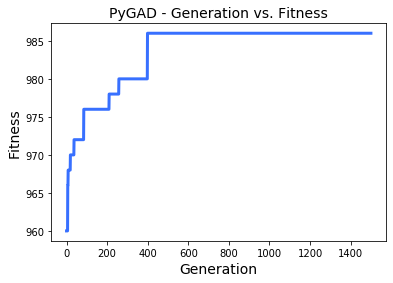

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 4 6 4 4 4 5 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 7 1 4 5 4 7 6 7 7 3]


 round:  431
elapsed time:  272.54396963119507
best sol [0.76062901 0.12942391 0.74582261 0.86788296 0.28181111 0.93888176
 0.51633412 0.30336063 0.21286433 0.77282744 0.03391361 0.4118427
 0.12942391 0.30336063 0.12942391 0.00842047 0.70650753 0.86788296
 0.76062901 0.74582261 0.76062901 0.76062901 0.48263488 0.38644355
 0.48263488 0.56349928 0.4118427  0.37743423 0.56809818 0.28181111
 0.86788296 0.21286433 0.30336063 0.70650753 0.1807875 ]
fitness:  16.0


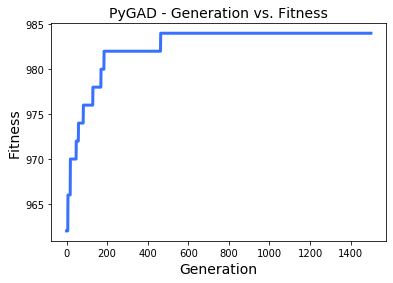

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 5 5 3 7 3 5 5 7 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 4 5 2 6 5 6 8 7 4]


 round:  432
elapsed time:  272.6728780269623
best sol [0.84287883 0.20952562 0.92962673 0.46255443 0.11159401 0.75611403
 0.75813169 0.8314194  0.04499225 0.11386502 0.20952562 0.20133747
 0.34413305 0.57211314 0.38521181 0.11386502 0.57211314 0.53239493
 0.45300048 0.21679254 0.03401761 0.38279505 0.2646002  0.04499225
 0.86564372 0.75908766 0.94636172 0.94501907 0.38279505 0.68135854
 0.94501907 0.16874226 0.40757281 0.00339868 0.40217079]
fitness:  14.0


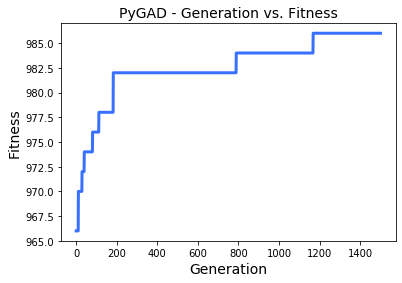

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 8 4 6 3 4 1 6 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 4 3 3 7 6 7 7 3]


 round:  433
elapsed time:  272.2710018157959
best sol [0.6790819  0.28686595 0.84211479 0.99971966 0.10273732 0.75739969
 0.72371314 0.4198316  0.05334665 0.28876849 0.05334665 0.02121956
 0.16674281 0.56148153 0.28876849 0.50373636 0.50373636 0.14285149
 0.96527948 0.63279374 0.10273732 0.96527948 0.37159823 0.24427905
 0.50373636 0.28876849 0.98775771 0.34515306 0.50373636 0.8485016
 0.44749405 0.30547056 0.24427905 0.04960118 0.34515306]
fitness:  16.0


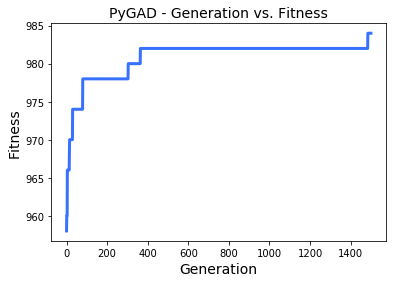

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 5 7 2 6 4 4 5 8 7 5 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 6 6 1 5 6 5 7 6 7 6 3]


 round:  434
elapsed time:  271.441703081131
best sol [0.77646955 0.10467417 0.93667667 0.63428831 0.19339824 0.67453138
 0.86721568 0.6233907  0.03241238 0.01567639 0.15140081 0.14574497
 0.14574497 0.34542869 0.46183852 0.15140081 0.96483349 0.84527579
 0.53011753 0.53011753 0.77517237 0.83414644 0.62634895 0.0631407
 0.20407033 0.59597016 0.53011753 0.8858072  0.8858072  0.6908571
 0.96483349 0.15140081 0.59597016 0.20407033 0.0631407 ]
fitness:  14.0


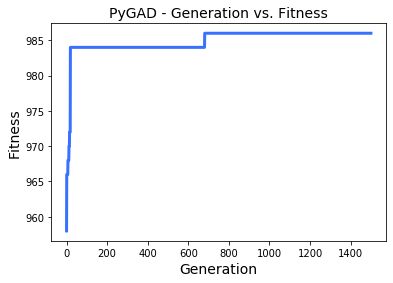

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 7 6 7 4 4 5 7 6 6 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 8 6 1 4 3 6 7 7 7 8 3]


 round:  435
elapsed time:  272.0754280090332
best sol [0.4607891  0.18206456 0.91266024 0.92015501 0.21292556 0.5033139
 0.88968321 0.30075752 0.00393073 0.00393073 0.0626181  0.25572229
 0.3164257  0.17727882 0.42823683 0.09677392 0.63828658 0.55398435
 0.47587139 0.69880455 0.17727882 0.25572229 0.67073625 0.29549032
 0.43472451 0.83638627 0.24876066 0.92498835 0.3164257  0.92498835
 0.9843627  0.0979824  0.00393073 0.66987689 0.55398435]
fitness:  12.0


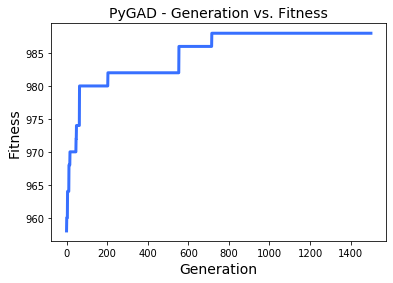

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 3 7 3 5 4 4 3 7 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 2 3 6 6 6 7 7 3]


 round:  436
elapsed time:  272.4784917831421
best sol [0.75179591 0.04818699 0.91710257 0.49243661 0.46051319 0.81637205
 0.4840951  0.93230945 0.15549215 0.11618247 0.11618247 0.16617186
 0.84446032 0.19889555 0.15549215 0.49243661 0.5643496  0.16617186
 0.50169486 0.81637205 0.11618247 0.33207869 0.46757978 0.03029453
 0.39978439 0.75133962 0.88141854 0.75133962 0.50169486 0.65931746
 0.96498806 0.13349702 0.01844979 0.51795254 0.03545011]
fitness:  14.0


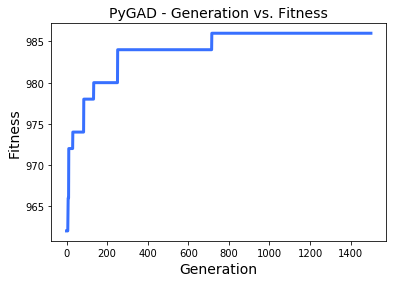

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 5 7 4 4 4 6 7 4 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 9 6 1 4 3 7 6 5 7 7 3]


 round:  437
elapsed time:  273.7950928211212
best sol [0.78067969 0.28091785 0.96137982 0.88951398 0.49931673 0.88976381
 0.07691225 0.40632685 0.07263602 0.07691225 0.07691225 0.22129686
 0.14147487 0.30855949 0.14147487 0.26751806 0.24857716 0.4384016
 0.6569165  0.26751806 0.94049834 0.11714727 0.97503728 0.29512395
 0.57523902 0.42490361 0.93436021 0.96137982 0.41651554 0.779606
 0.84218387 0.07691225 0.49931673 0.24614336 0.05693126]
fitness:  16.0


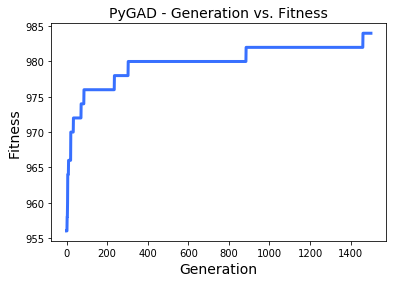

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 6 2 6 3 4 4 6 7 7 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [8 7 6 1 3 4 2 7 6 9 7 2]


 round:  438
elapsed time:  273.1214909553528
best sol [0.75256629 0.20186016 0.99404143 0.78836036 0.20245822 0.99644451
 0.09087814 0.38764908 0.16382141 0.27764791 0.09087814 0.07730642
 0.07730642 0.19796214 0.19796214 0.01316116 0.25659219 0.78836036
 0.53733127 0.71491148 0.20417916 0.78836036 0.63082406 0.25659219
 0.38764908 0.65274125 0.63082406 0.91585828 0.38764908 0.86543071
 0.80149221 0.53733127 0.14921959 0.19796214 0.16590442]
fitness:  14.0


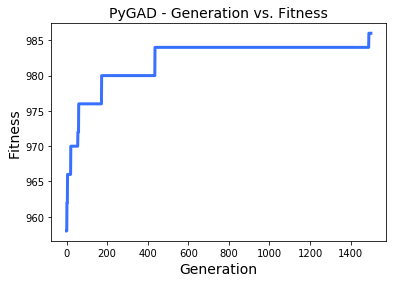

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 7 3 6 3 4 5 7 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 5 1 2 2 6 7 7 9 7 4]


 round:  439
elapsed time:  272.5251672267914
best sol [0.72576987 0.14506214 0.90970521 0.93626689 0.32579254 0.39121767
 0.3735198  0.12937783 0.14513177 0.14506214 0.12937783 0.14513177
 0.12937783 0.52246782 0.12937783 0.32873585 0.32579254 0.32579254
 0.12937783 0.90970521 0.31006779 0.04561194 0.56266363 0.36235745
 0.72981425 0.9977258  0.93626689 0.95019721 0.56266363 0.68740891
 0.90385427 0.06173398 0.23770198 0.54580844 0.14513177]
fitness:  12.0


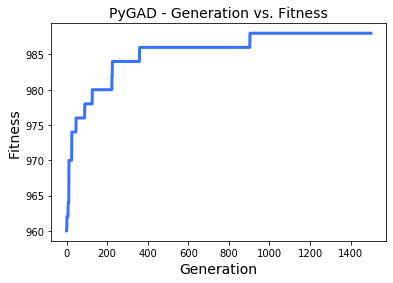

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 4 5 3 4 4 7 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 6 2 4 2 6 7 6 9 7 2]


 round:  440
elapsed time:  272.15768909454346
best sol [0.68796794 0.14537502 0.96449965 0.92841629 0.24774019 0.2800492
 0.18895518 0.45572169 0.11149172 0.45572169 0.16294017 0.2800492
 0.18895518 0.77088958 0.57340041 0.20233211 0.12064856 0.29387788
 0.47491897 0.50755443 0.18895518 0.57340041 0.29387788 0.29387788
 0.44976551 0.77088958 0.67101846 0.91673091 0.44976551 0.77088958
 0.82307105 0.27675841 0.09807699 0.77088958 0.22191095]
fitness:  14.0


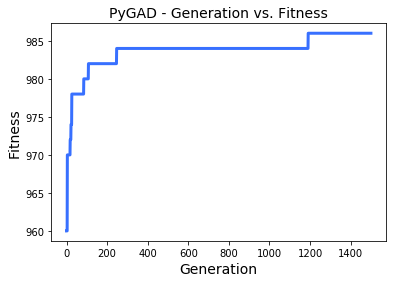

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 3 7 4 4 5 7 6 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 3 5 3 4 6 6 9 7 3]


 round:  441
elapsed time:  272.5537037849426
best sol [0.73559472 0.13585657 0.9420092  0.77301711 0.20508462 0.54167397
 0.49833269 0.31732296 0.13585657 0.11849657 0.0216458  0.67404264
 0.172389   0.13302885 0.31732296 0.06739825 0.29488116 0.9420092
 0.95213474 0.37207659 0.11849657 0.64097448 0.40804018 0.29488116
 0.172389   0.0216458  0.98300752 0.77196592 0.41027595 0.58162105
 0.91614841 0.21060968 0.1475329  0.54167397 0.11659045]
fitness:  14.0


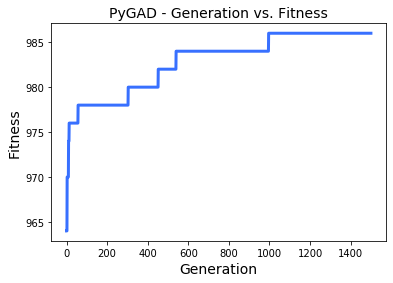

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 6 2 5 3 4 6 7 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 5 4 4 3 4 7 6 7 6 3]


 round:  442
elapsed time:  273.25172305107117
best sol [0.52578659 0.20879736 0.53205999 0.89486325 0.0481982  0.4883639
 0.6894992  0.8202831  0.13308893 0.60520777 0.06923184 0.12694573
 0.13308893 0.4883639  0.1441799  0.20879736 0.97585171 0.53205999
 0.63880332 0.73100889 0.12694573 0.92705197 0.30392423 0.0764617
 0.63567485 0.63880332 0.62464556 0.65491255 0.57881959 0.47997518
 0.4883639  0.0481982  0.56662519 0.60520777 0.13249109]
fitness:  16.0


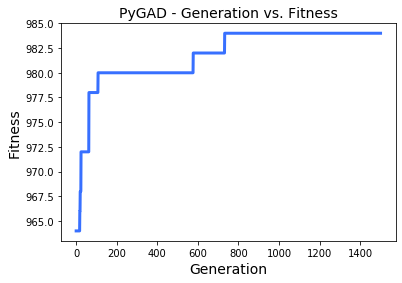

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 8 3 5 4 4 4 5 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 5 3 3 3 7 7 6 6 6 3]


 round:  443
elapsed time:  271.58796787261963
best sol [0.71458128 0.1466639  0.80926088 0.70430439 0.21273133 0.53108478
 0.94068747 0.38412579 0.13375666 0.06760303 0.12854849 0.46167409
 0.18274336 0.50540581 0.18274336 0.02982459 0.26370216 0.86740719
 0.63525606 0.68758792 0.80926088 0.23913604 0.18274336 0.19084076
 0.13375666 0.19084076 0.86740719 0.94068747 0.18274336 0.57929548
 0.94068747 0.12854849 0.61165181 0.50540581 0.29445018]
fitness:  14.0


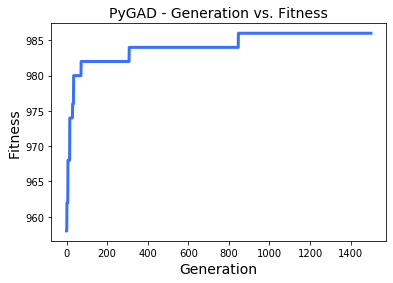

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 4 7 3 3 4 7 6 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 5 3 6 6 5 5 7 5]


 round:  444
elapsed time:  272.80358719825745
best sol [0.89548971 0.18187075 0.98212356 0.91567768 0.14016226 0.90546165
 0.06308804 0.49774852 0.13343067 0.49329422 0.07596008 0.03613732
 0.16704281 0.47285795 0.14644549 0.16704281 0.67269399 0.87066483
 0.37756642 0.67269399 0.1844872  0.47158775 0.35213461 0.14644549
 0.47285795 0.25315226 0.89463258 0.69327417 0.47604341 0.98844654
 0.49329422 0.03613732 0.74856401 0.82840384 0.11586021]
fitness:  14.0


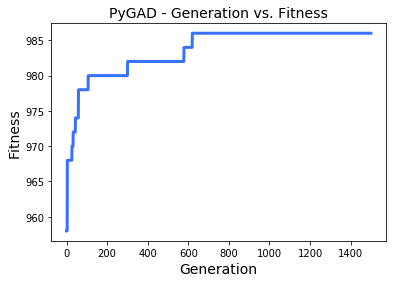

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 6 6 1 5 4 4 4 8 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 3 4 2 6 5 7 7 6 3]


 round:  445
elapsed time:  273.99430298805237
best sol [0.80855822 0.07393845 0.87081196 0.94042134 0.1909593  0.45554432
 0.58835528 0.36385274 0.1918093  0.11140056 0.07393845 0.13020499
 0.16905856 0.42287847 0.23213777 0.1709713  0.51859732 0.69803278
 0.55288795 0.65961603 0.99750573 0.94042134 0.42287847 0.2566695
 0.13020499 0.11140056 0.48658921 0.58835528 0.65961603 0.20552015
 0.94042134 0.1918093  0.1709713  0.58835528 0.1909593 ]
fitness:  12.0


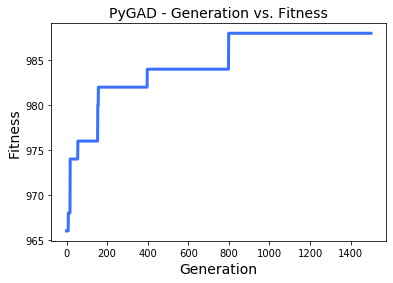

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [5 3 7 4 7 4 4 5 6 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 4 3 6 7 7 7 6 3]


 round:  446
elapsed time:  272.9289309978485
best sol [0.72656101 0.09903036 0.86935285 0.67506994 0.23011827 0.94355751
 0.01625705 0.43067975 0.13145679 0.43342016 0.13145679 0.61721459
 0.21864286 0.35880512 0.66050143 0.00139056 0.27742343 0.83156287
 0.42741207 0.66050143 0.21864286 0.77833909 0.00139056 0.16309857
 0.7766599  0.61721459 0.77833909 0.7766599  0.21864286 0.83156287
 0.8299177  0.13145679 0.83156287 0.13145679 0.16309857]
fitness:  14.0


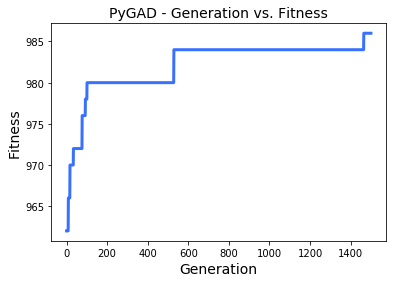

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 3 5 4 4 5 7 7 8 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 4 5 4 3 6 7 6 7 7 3]


 round:  447
elapsed time:  274.3159348964691
best sol [0.74686394 0.11295471 0.80946519 0.71546286 0.02634018 0.99668175
 0.60356495 0.68999667 0.1750924  0.16005334 0.08136333 0.19960396
 0.31944644 0.31239636 0.15433854 0.08136333 0.65266867 0.40991383
 0.24878796 0.87577336 0.30110326 0.87519324 0.12756469 0.29661335
 0.60356495 0.31239636 0.67655161 0.46463789 0.6065693  0.67655161
 0.94170027 0.15544227 0.12053701 0.28091478 0.44195947]
fitness:  16.0


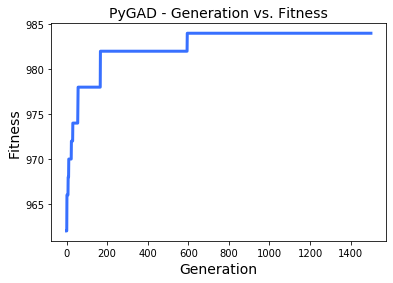

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [5 4 7 4 6 4 4 4 6 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 3 2 6 5 6 8 7 3]


 round:  448
elapsed time:  274.40628027915955
best sol [0.79607484 0.28323552 0.99036146 0.92745096 0.13091812 0.52527045
 0.03403909 0.48419372 0.20285349 0.01273597 0.1564691  0.19585412
 0.15495628 0.26614468 0.19386882 0.20457311 0.6643435  0.66977443
 0.48419372 0.73569918 0.20886001 0.51138205 0.46271894 0.1564691
 0.40133345 0.13091812 0.99036146 0.95948907 0.94764328 0.88328069
 0.92745096 0.1796675  0.12572601 0.92745096 0.21981407]
fitness:  14.0


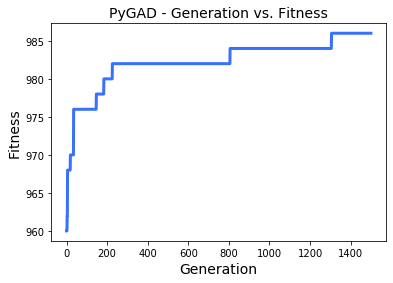

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [5 5 7 4 7 4 3 4 7 7 8 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 5 1 3 3 6 7 7 8 7 4]


 round:  449
elapsed time:  272.07866287231445
best sol [0.93560107 0.18442203 0.99951605 0.28285884 0.10629428 0.84260347
 0.18291014 0.98401539 0.37538506 0.20147077 0.44547347 0.03696936
 0.07452425 0.37538506 0.19269509 0.18291014 0.55209085 0.7671551
 0.26413358 0.86737596 0.14569839 0.86737596 0.21789104 0.33777395
 0.71730146 0.46654016 0.44547347 0.86737596 0.37538506 0.29853537
 0.7671551  0.20147077 0.12601796 0.81320139 0.17207711]
fitness:  14.0


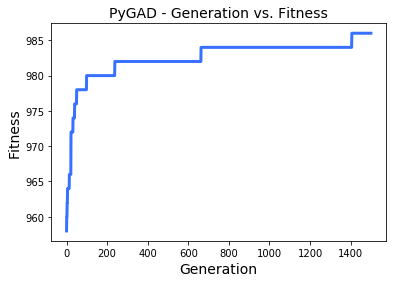

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 4 8 5 6 4 4 4 7 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 4 4 3 6 7 5 7 7 3]


 round:  450
elapsed time:  271.7417643070221
best sol [0.81308649 0.1363984  0.92053081 0.71495539 0.30290402 0.83350889
 0.12270394 0.30640515 0.12270394 0.12270394 0.16304469 0.1691118
 0.16304469 0.49064349 0.42721149 0.16304469 0.65645247 0.71495539
 0.42721149 0.35700838 0.33937101 0.65645247 0.30640515 0.35700838
 0.16304469 0.65690635 0.91493657 0.33937101 0.54510559 0.54510559
 0.98763954 0.88200039 0.23997385 0.05065743 0.14333762]
fitness:  16.0


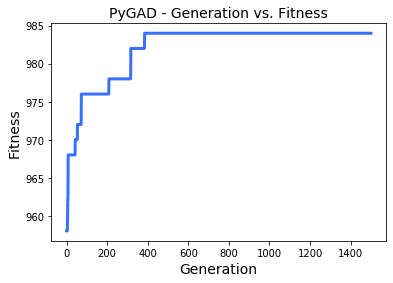

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 6 5 2 5 3 4 4 6 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 5 1 4 3 3 5 6 8 7 4]


 round:  451
elapsed time:  272.2742989063263
best sol [0.84549149 0.32223132 0.98605207 0.91823485 0.26160227 0.39691331
 0.87142356 0.32776106 0.02513289 0.02513289 0.16024819 0.2073229
 0.35535742 0.16024819 0.35535742 0.17918752 0.37030734 0.26924131
 0.998069   0.72743136 0.20695067 0.998069   0.6610536  0.20853787
 0.86615982 0.2073229  0.44129483 0.44129483 0.61895611 0.72743136
 0.54926946 0.16024819 0.20695067 0.5442237  0.20695067]
fitness:  14.0


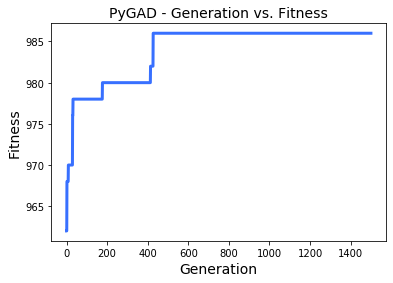

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 4 7 2 6 4 3 5 7 7 6 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 7 1 3 3 6 6 6 7 6 3]


 round:  452
elapsed time:  272.96043610572815
best sol [0.72207756 0.01544819 0.91725095 0.98383792 0.41409787 0.90071943
 0.2333578  0.44218994 0.14688194 0.64952718 0.08643351 0.23488226
 0.29179087 0.14688194 0.7248693  0.14688194 0.3850739  0.23488226
 0.90071943 0.67822819 0.2333578  0.72167917 0.09445062 0.02394501
 0.44218994 0.60241226 0.73325495 0.60241226 0.45507412 0.98383792
 0.81844406 0.2333578  0.70535518 0.08830754 0.64292272]
fitness:  14.0


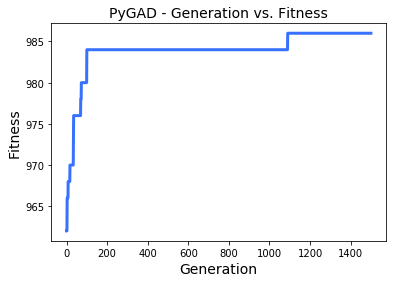

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [9 5 7 3 6 4 4 4 6 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 7 3 4 4 6 5 6 7 7 3]


 round:  453
elapsed time:  271.96764492988586
best sol [0.83814191 0.17241973 0.74265079 0.94648289 0.15149379 0.25670453
 0.51035288 0.01973919 0.21068422 0.28006635 0.16408927 0.15149379
 0.13099792 0.85908519 0.16408927 0.25228844 0.16943706 0.64926128
 0.49732514 0.65758285 0.85908519 0.01973919 0.71915672 0.16408927
 0.72944903 0.75114876 0.97432273 0.96079821 0.51035288 0.27042869
 0.92079926 0.04730227 0.08161456 0.96534777 0.22400549]
fitness:  16.0


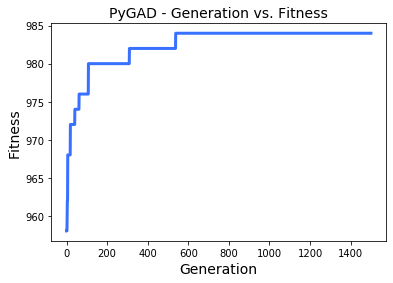

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 4 5 3 3 4 5 7 9 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 5 2 6 3 5 7 6 7 7 3]


 round:  454
elapsed time:  272.3316857814789
best sol [0.76598883 0.12547618 0.90494819 0.77929274 0.14488655 0.31590473
 0.12547618 0.30722199 0.18130634 0.1268739  0.14624472 0.18130634
 0.13670843 0.45238642 0.42242933 0.5203433  0.5203433  0.70218618
 0.28434294 0.90501205 0.04606079 0.49684502 0.31590473 0.09251363
 0.48047654 0.61721511 0.90501205 0.99732613 0.2174634  0.70218618
 0.90501205 0.10276662 0.13670843 0.88352563 0.23331309]
fitness:  14.0


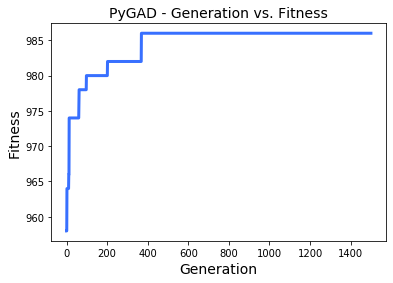

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 8 2 6 4 4 5 8 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 4 2 4 6 6 7 6 7 7 4]


 round:  455
elapsed time:  270.6099512577057
best sol [0.64332473 0.28817806 0.9518808  0.83934515 0.04601458 0.83672535
 0.39156193 0.71288969 0.22068777 0.12277218 0.04348495 0.22977288
 0.83934515 0.08164182 0.38180328 0.05287128 0.08164182 0.96464274
 0.66381545 0.62023363 0.04601458 0.9518808  0.47706653 0.42234464
 0.21784221 0.19763932 0.39156193 0.43089302 0.5771864  0.91372129
 0.88487817 0.12277218 0.15981455 0.69799147 0.05051117]
fitness:  16.0


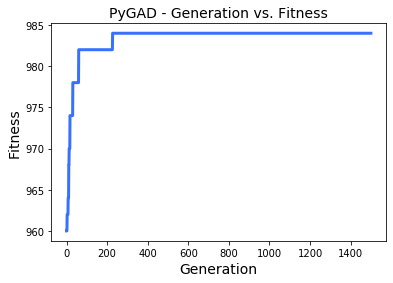

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 3 7 3 7 4 3 4 8 7 7 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 8 6 3 4 3 4 6 6 8 7 3]


 round:  456
elapsed time:  272.6782510280609
best sol [0.9255197  0.34047725 0.90518783 0.90590197 0.30539536 0.37815494
 0.40752202 0.34047725 0.18302835 0.07271373 0.1590355  0.46416811
 0.36541189 0.4078728  0.37097818 0.18302835 0.93431447 0.44426687
 0.40752202 0.4078728  0.30435503 0.34047725 0.67482159 0.34047725
 0.36541189 0.40752202 0.92514537 0.92514537 0.41256912 0.4078728
 0.93431447 0.19925935 0.27563296 0.78141572 0.23741231]
fitness:  14.0


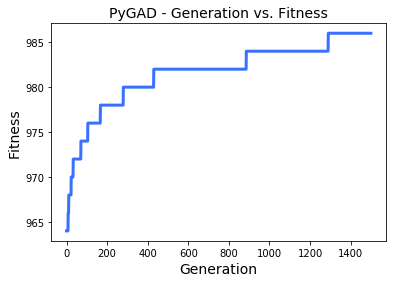

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 3 6 4 5 4 7 6 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 6 3 3 3 5 7 6 6 7 4]


 round:  457
elapsed time:  273.64758682250977
best sol [0.73474083 0.09407431 0.77987724 0.97419529 0.03197387 0.82995462
 0.46377752 0.48417968 0.11924664 0.03771678 0.04897103 0.27223097
 0.59502989 0.44346248 0.14643552 0.47612501 0.26641763 0.1745553
 0.26641763 0.98182    0.3772234  0.82995462 0.47612501 0.03771678
 0.3772234  0.7014108  0.3772234  0.66295639 0.45028604 0.71627301
 0.82995462 0.1745553  0.7014108  0.82995462 0.11924664]
fitness:  14.0


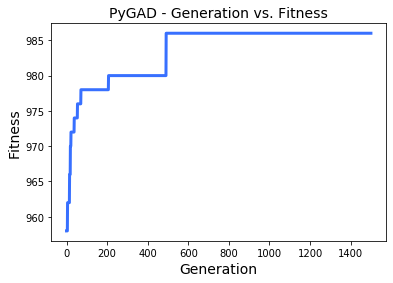

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 4 6 4 6 4 5 4 7 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 6 1 4 3 7 6 6 7 7 4]


 round:  458
elapsed time:  274.1188642978668
best sol [0.79215784 0.20133693 0.94781957 0.98451863 0.2539651  0.86457107
 0.41277585 0.31335056 0.006813   0.20686477 0.03020644 0.39177055
 0.16009452 0.03020644 0.3222477  0.16009452 0.62286726 0.66042266
 0.39177055 0.66042266 0.2539651  0.92715685 0.2539651  0.39177055
 0.24883744 0.62286726 0.44071069 0.62286726 0.62286726 0.7693027
 0.65114241 0.23819504 0.65384099 0.03694079 0.41915953]
fitness:  14.0


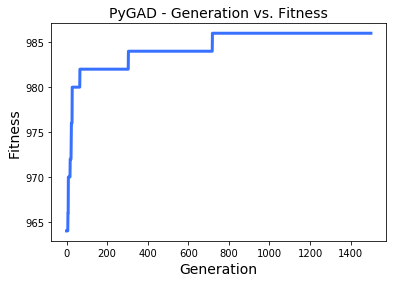

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 3 7 3 6 4 5 4 7 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 3 2 3 6 7 6 8 6 3]


 round:  459
elapsed time:  274.5259039402008
best sol [0.80942233 0.11403761 0.9344819  0.7770799  0.07886182 0.46132396
 0.83107925 0.40551849 0.11700868 0.18092203 0.14270092 0.07886182
 0.51076296 0.2346572  0.10002306 0.14270092 0.99150993 0.762588
 0.49442365 0.21766131 0.9344819  0.7770799  0.6416864  0.14270092
 0.53753303 0.762588   0.83107925 0.76769374 0.51076296 0.46041698
 0.8320352  0.03558    0.21766131 0.86063281 0.05313882]
fitness:  16.0


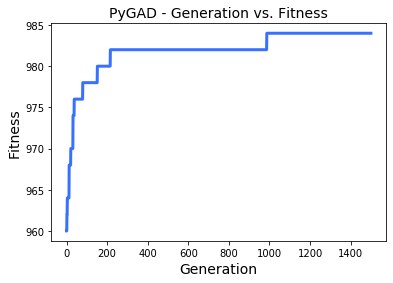

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 7 4 5 3 3 5 6 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 6 1 4 2 4 7 8 7 7 3]


 round:  460
elapsed time:  272.67127299308777
best sol [8.00341034e-01 2.08492461e-01 5.97666734e-01 8.95044039e-01
 3.07173205e-01 6.23333917e-01 7.53159744e-01 5.68384046e-01
 1.43411529e-01 3.00731971e-01 9.73310839e-02 1.79054971e-04
 3.41743813e-02 6.03855766e-01 2.41441872e-02 2.63679738e-02
 6.94364522e-01 7.54487545e-01 3.14307703e-01 8.37032121e-01
 1.79054971e-04 9.64514036e-01 6.43556430e-01 2.91816098e-01
 1.35719440e-01 9.71039751e-01 8.37032121e-01 6.78784356e-01
 1.40137574e-01 6.94364522e-01 9.14828050e-01 1.03963070e-01
 6.43556430e-01 2.43702857e-01 3.27194921e-02]
fitness:  14.0


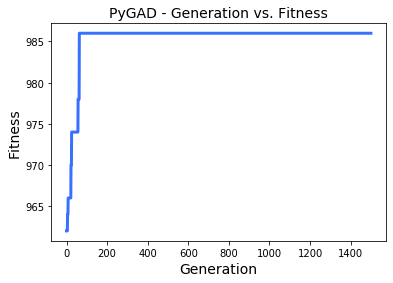

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 7 3 5 3 5 6 5 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 4 1 6 7 7 7 7 3]


 round:  461
elapsed time:  272.36382699012756
best sol [0.79814129 0.12468742 0.9849824  0.97835356 0.54126431 0.48668296
 0.70672779 0.65408499 0.1121544  0.11256717 0.16015953 0.26808245
 0.11256717 0.86913967 0.27079849 0.10169299 0.16015953 0.37940828
 0.71187717 0.86913967 0.29255856 0.3543932  0.53091465 0.18456612
 0.60530406 0.40899099 0.97835356 0.97488633 0.70073548 0.79594453
 0.81743065 0.20603294 0.40899099 0.57539367 0.02371866]
fitness:  14.0


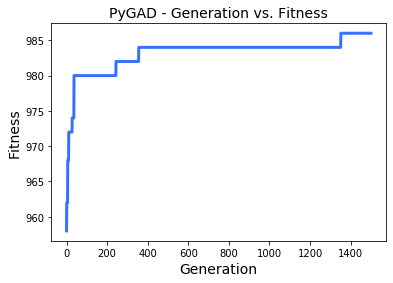

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 6 7 4 4 5 7 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 8 7 1 4 4 6 7 6 8 7 4]


 round:  462
elapsed time:  271.7516760826111
best sol [0.51563186 0.11939782 0.95278176 0.89807449 0.21295808 0.86933847
 0.21295808 0.30893514 0.2091482  0.2091482  0.26188648 0.02445841
 0.24083702 0.51563186 0.30893514 0.02852599 0.61971449 0.38617848
 0.40911036 0.45572361 0.19045596 0.2091482  0.21295808 0.2091482
 0.95278176 0.95278176 0.92964942 0.95278176 0.51029234 0.77810938
 0.90111857 0.18859466 0.66941367 0.148866   0.74512658]
fitness:  12.0


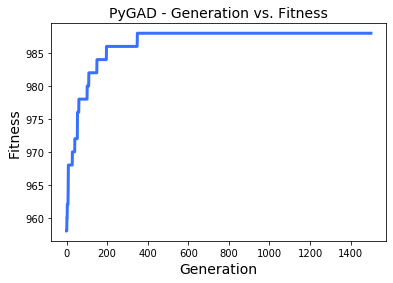

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 3 6 3 3 3 6 7 8 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 4 2 4 7 6 8 7 3]


 round:  463
elapsed time:  271.0958158969879
best sol [0.9159799  0.08116161 0.94145733 0.92519827 0.25512027 0.83896727
 0.13359359 0.38251685 0.30218947 0.34551652 0.30860275 0.04356135
 0.19096188 0.83896727 0.09138585 0.41360993 0.23869431 0.30860275
 0.15960142 0.97643181 0.09340832 0.04356135 0.47204594 0.15960142
 0.92057504 0.52202089 0.97643181 0.93423976 0.62231308 0.39045386
 0.92057504 0.23522813 0.15296205 0.58872858 0.15662681]
fitness:  12.0


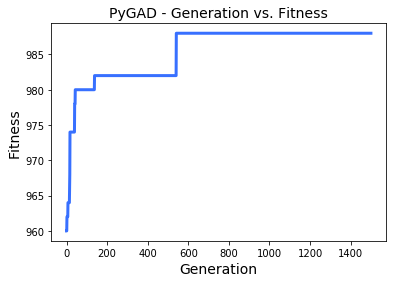

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 6 7 3 7 3 3 5 6 7 7 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 4 5 3 6 7 5 7 7 3]


 round:  464
elapsed time:  271.47657084465027
best sol [0.53477175 0.31001726 0.93652646 0.05871052 0.1891087  0.8550518
 0.00362607 0.8203987  0.17991303 0.06282479 0.05871052 0.17991303
 0.17991303 0.00362607 0.17991303 0.05871052 0.8203987  0.65769704
 0.99124299 0.57466074 0.57466074 0.17991303 0.95699044 0.22901689
 0.80469756 0.1891087  0.76640597 0.95699044 0.8550518  0.28415041
 0.92810719 0.07493061 0.4236963  0.57466074 0.5415139 ]
fitness:  16.0


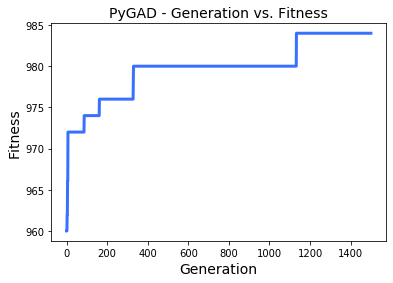

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 8 4 6 3 3 4 5 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 4 1 3 3 6 6 6 8 7 4]


 round:  465
elapsed time:  269.5511631965637
best sol [0.84132534 0.17170716 0.81958339 0.99919821 0.34541496 0.99919821
 0.20838958 0.40907196 0.13019003 0.05278839 0.12310344 0.17170716
 0.77263485 0.20359091 0.28523943 0.05278839 0.89470408 0.56385874
 0.15207444 0.60678512 0.04223868 0.99875296 0.15207444 0.41615273
 0.27947752 0.05278839 0.80000215 0.6415871  0.56523762 0.86152345
 0.80000215 0.2978444  0.41615273 0.15207444 0.2978444 ]
fitness:  14.0


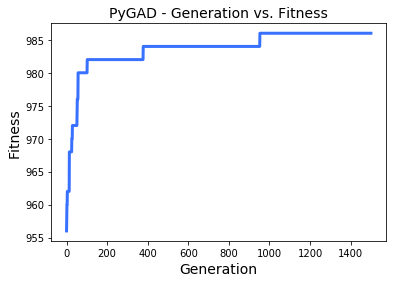

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [4 4 6 2 7 3 5 5 6 8 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 4 2 5 7 6 7 6 3]


 round:  466
elapsed time:  270.96955704689026
best sol [0.66031454 0.14471481 0.98924841 0.87107978 0.25587485 0.81348654
 0.19517679 0.30015775 0.19517679 0.05895319 0.10135434 0.39764566
 0.30015775 0.34889076 0.25587485 0.05895319 0.98159649 0.81685818
 0.87107978 0.63402546 0.78383015 0.33917182 0.34512393 0.2384612
 0.86923616 0.17216885 0.41928718 0.98159649 0.17216885 0.94714265
 0.97741971 0.25842785 0.65374435 0.25587485 0.24152435]
fitness:  12.0


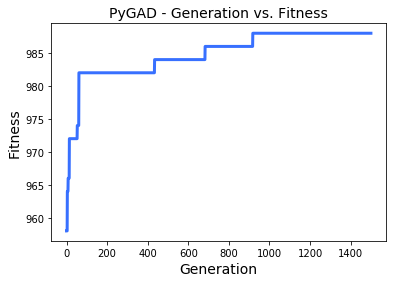

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 3 6 3 7 3 4 4 8 7 8 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 4 3 6 6 8 6 7 3]


 round:  467
elapsed time:  271.8134226799011
best sol [0.99528336 0.1617201  0.99483001 0.3263253  0.28917146 0.68696774
 0.56314338 0.77718753 0.10204772 0.07470721 0.16568427 0.11196269
 0.25524914 0.58724919 0.07470721 0.10204772 0.28917146 0.89926416
 0.40914008 0.68696774 0.61022362 0.02455043 0.46486327 0.32127796
 0.73949519 0.47794491 0.98219535 0.92031649 0.34253461 0.34590163
 0.73949519 0.16486636 0.73949519 0.81735495 0.14853654]
fitness:  16.0


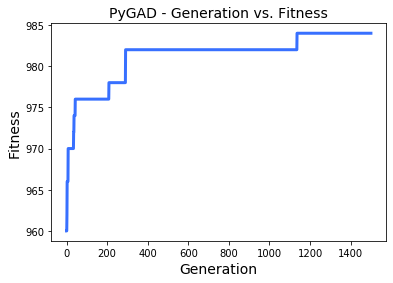

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 5 6 3 4 4 6 6 7 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 3 5 2 6 7 5 6 6 4]


 round:  468
elapsed time:  271.4387810230255
best sol [0.79933746 0.09019027 0.94289972 0.64879228 0.32987388 0.38014263
 0.99738401 0.33709463 0.00200948 0.20093994 0.15601816 0.15601816
 0.01707544 0.38014263 0.52728906 0.00200948 0.57634737 0.08010934
 0.66651289 0.59313575 0.05687315 0.98171324 0.6917657  0.20093994
 0.68947027 0.28472658 0.99738401 0.33709463 0.28472658 0.6917657
 0.77123771 0.18353349 0.57634737 0.08010934 0.57634737]
fitness:  14.0


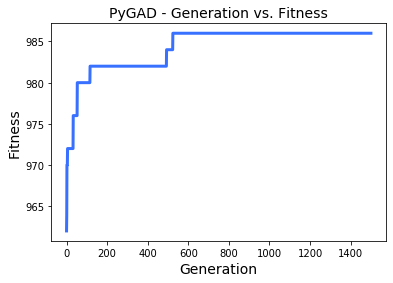

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 6 5 2 5 3 4 4 7 7 5 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 2 3 4 7 6 6 7 3]


 round:  469
elapsed time:  271.0185980796814
best sol [0.71552734 0.01770718 0.92974996 0.96560238 0.61386668 0.30194368
 0.02369648 0.48283378 0.26201937 0.24329862 0.01770718 0.47192039
 0.02369648 0.80140317 0.18731445 0.3458177  0.14522636 0.3530371
 0.61386668 0.75632457 0.18731445 0.48283378 0.1688055  0.18997957
 0.69333737 0.53894018 0.91947888 0.91947888 0.80140317 0.18731445
 0.80140317 0.19011816 0.11587133 0.52776871 0.18731445]
fitness:  14.0


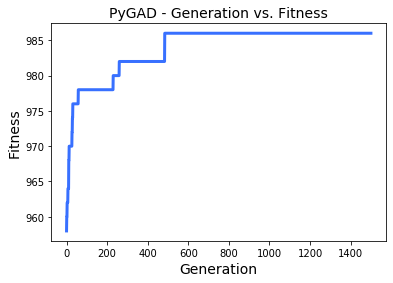

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 6 3 7 4 4 6 7 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 5 4 4 3 5 7 6 8 7 3]


 round:  470
elapsed time:  272.28314995765686
best sol [0.75562425 0.13165918 0.76861791 0.9549923  0.25540086 0.46088182
 0.91776862 0.46507065 0.03573599 0.26984609 0.11362944 0.0914685
 0.77703499 0.44439948 0.28036414 0.1932229  0.46088182 0.46088182
 0.38161331 0.67397321 0.01481614 0.91776862 0.28036414 0.01481614
 0.51523718 0.77703499 0.76861791 0.827241   0.51523718 0.51523718
 0.91776862 0.18529577 0.04567418 0.122494   0.38161331]
fitness:  12.0


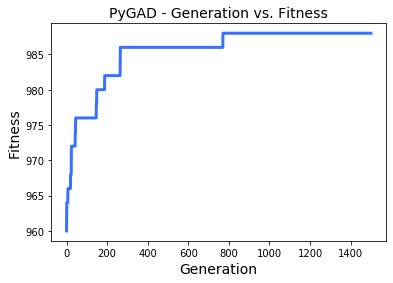

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 8 4 7 4 3 3 6 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 5 3 6 8 6 7 7 2]


 round:  471
elapsed time:  271.62718200683594
best sol [0.54941373 0.15285473 0.72861685 0.93613553 0.3663871  0.77822691
 0.76747727 0.3237921  0.09531821 0.28419606 0.15285473 0.14751401
 0.72861685 0.14751401 0.37533086 0.51136118 0.51136118 0.20014594
 0.76747727 0.64506169 0.02922325 0.95669587 0.14751401 0.09350687
 0.64506169 0.54568136 0.77822691 0.74886859 0.39254276 0.70458873
 0.83120889 0.14751401 0.05097811 0.64775688 0.2001348 ]
fitness:  14.0


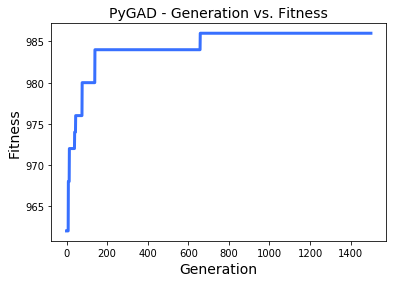

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 8 3 7 4 4 6 7 8 7 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 4 6 6 7 6 8 7 3]


 round:  472
elapsed time:  270.66230177879333
best sol [0.70984845 0.17800454 0.62331113 0.96478721 0.14420122 0.29332395
 0.50629928 0.75260233 0.17782853 0.10250045 0.15883696 0.14420122
 0.29332395 0.50629928 0.39685008 0.05553656 0.61928665 0.14420122
 0.7888282  0.52037435 0.93481769 0.10250045 0.52037435 0.29332395
 0.98075438 0.38899959 0.47397722 0.40349786 0.40862805 0.9363913
 0.9363913  0.25761409 0.51125178 0.55615928 0.1700535 ]
fitness:  16.0


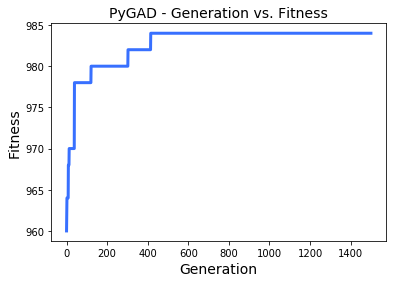

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 3 6 3 7 3 4 4 6 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 8 6 1 4 2 5 3 7 8 7 4]


 round:  473
elapsed time:  271.47706508636475
best sol [0.80140057 0.3146413  0.32264575 0.94648917 0.35215053 0.92416827
 0.14162575 0.3565065  0.17003339 0.3565065  0.02055182 0.04391896
 0.41151053 0.3790811  0.3592205  0.3565065  0.3565065  0.3565065
 0.3592205  0.91541212 0.65691682 0.92038261 0.04792809 0.20607065
 0.25414472 0.94648917 0.98413512 0.3790811  0.3790811  0.22134765
 0.90224064 0.22134765 0.01603181 0.67427355 0.70266258]
fitness:  14.0


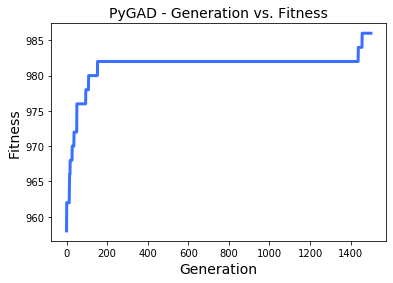

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 3 6 4 4 5 4 7 5 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 5 1 4 3 6 7 6 6 7 4]


 round:  474
elapsed time:  274.77493500709534
best sol [0.82180692 0.0538929  0.9351027  0.95880417 0.41826787 0.95880417
 0.03491018 0.47514671 0.03491018 0.41826787 0.15818338 0.47940643
 0.32978733 0.56151409 0.27289797 0.17224667 0.17224667 0.82180692
 0.46403452 0.76787335 0.12038719 0.13871316 0.46403452 0.12038719
 0.36669693 0.59917199 0.90802129 0.98221679 0.48178645 0.94224187
 0.08986484 0.10259349 0.31243973 0.12456512 0.83704237]
fitness:  16.0


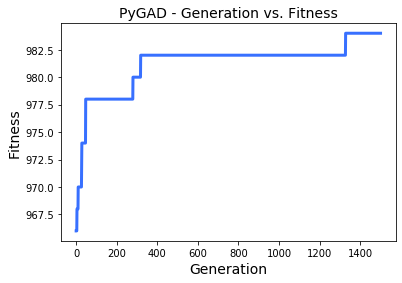

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 2 7 4 2 4 8 6 6 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 5 4 5 3 5 7 5 7 6 3]


 round:  475
elapsed time:  286.70473885536194
best sol [0.76362486 0.10937252 0.70181907 0.97488785 0.29142364 0.92157783
 0.97488785 0.30791093 0.01524382 0.1170764  0.08708024 0.30422916
 0.29142364 0.48494623 0.6728188  0.03623059 0.17163147 0.45663598
 0.61178108 0.7500298  0.0962366  0.72057514 0.43354069 0.72057514
 0.61178108 0.46600674 0.6728188  0.97488785 0.27373741 0.29142364
 0.61178108 0.1170764  0.45663598 0.11035714 0.46901034]
fitness:  14.0


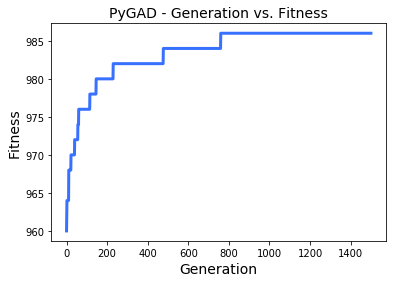

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 7 4 6 5 4 4 5 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 7 2 3 3 5 7 6 7 7 3]


 round:  476
elapsed time:  289.96262979507446
best sol [6.86771925e-01 8.47196191e-02 8.80624423e-01 8.57046464e-01
 8.94586409e-02 9.13521212e-01 8.56155392e-01 6.53462218e-01
 4.27140791e-02 1.66065145e-01 1.00172875e-01 6.19730848e-01
 1.60980475e-01 3.04917433e-01 6.56022758e-02 2.22827852e-01
 8.22979763e-01 6.68765544e-01 3.04917433e-01 6.86771925e-01
 2.05392410e-01 6.19730848e-01 9.60669981e-01 4.27140791e-02
 2.61846637e-01 8.95818838e-01 9.50509226e-01 7.18845049e-01
 4.41914870e-01 7.82796678e-01 4.26166347e-01 1.60980475e-01
 2.42220376e-01 1.67384238e-04 2.45854894e-01]
fitness:  16.0


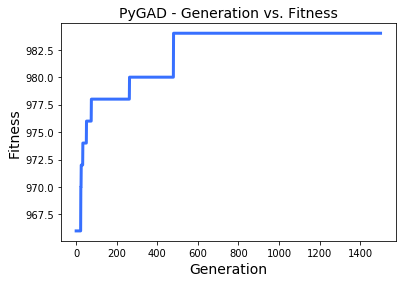

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 6 7 3 6 4 4 4 6 7 5 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 4 4 3 6 6 7 7 6 1]


 round:  477
elapsed time:  286.43632197380066
best sol [0.69287448 0.1133845  0.87634027 0.87634027 0.0682735  0.46478205
 0.69075699 0.46478205 0.21424741 0.10983596 0.12016437 0.17337871
 0.37450653 0.46478205 0.45960655 0.23987076 0.74756279 0.23987076
 0.87634027 0.41271265 0.12016437 0.68848456 0.46478205 0.21424741
 0.46478205 0.47403257 0.97072057 0.87634027 0.54200606 0.68848456
 0.97072057 0.29017415 0.14160938 0.68848456 0.18068251]
fitness:  12.0


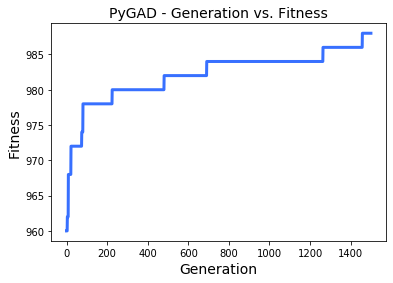

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 5 7 2 5 4 4 4 6 6 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 6 1 4 4 4 7 6 7 7 3]


 round:  478
elapsed time:  288.25185084342957
best sol [0.86467548 0.18912227 0.97765663 0.83816141 0.18597138 0.83816141
 0.42841534 0.63364254 0.00583188 0.15757465 0.04846041 0.04846041
 0.30841342 0.46343677 0.20834948 0.18597138 0.828501   0.63364254
 0.46343677 0.63552396 0.27317324 0.828501   0.86270043 0.06087663
 0.25696769 0.75265639 0.8751019  0.25696769 0.47153871 0.96877053
 0.86270043 0.47153871 0.30841342 0.47153871 0.18597138]
fitness:  16.0


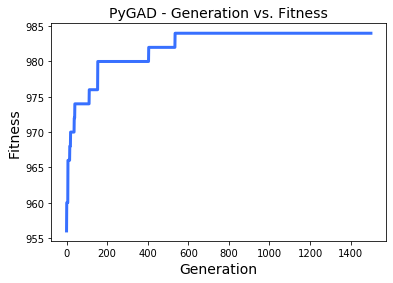

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 5 4 6 4 4 5 8 6 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 8 5 1 4 3 6 6 7 7 7 4]


 round:  479
elapsed time:  302.34987688064575
best sol [0.63548588 0.08243227 0.86250161 0.88131322 0.21313251 0.76303386
 0.32100921 0.47516377 0.20259113 0.05607742 0.09346678 0.20259113
 0.20259113 0.87220057 0.11081819 0.17008128 0.24065226 0.20259113
 0.56366588 0.86210796 0.11081819 0.26493401 0.18806775 0.11333208
 0.722127   0.722127   0.53334162 0.98237371 0.56366588 0.87220057
 0.97089954 0.18806775 0.86210796 0.11013837 0.22227249]
fitness:  16.0


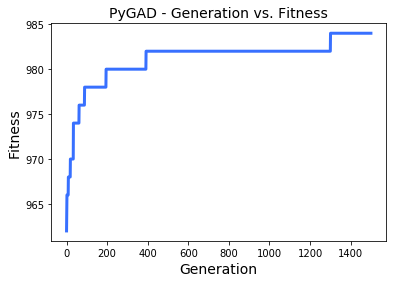

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 3 6 3 7 5 4 3 6 7 7 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 5 1 6 6 5 8 7 3]


 round:  480
elapsed time:  289.4025709629059
best sol [0.85620903 0.13122959 0.90739652 0.94300513 0.13586917 0.81528029
 0.61840353 0.4089942  0.05861923 0.07397942 0.05449658 0.13586917
 0.18579449 0.4089942  0.66314054 0.05449658 0.07397942 0.17601245
 0.95279237 0.51449672 0.28949854 0.48263488 0.08236835 0.343097
 0.71553833 0.18579449 0.95279237 0.93787551 0.08236835 0.73372532
 0.99805596 0.16950693 0.0382854  0.29487102 0.60392712]
fitness:  14.0


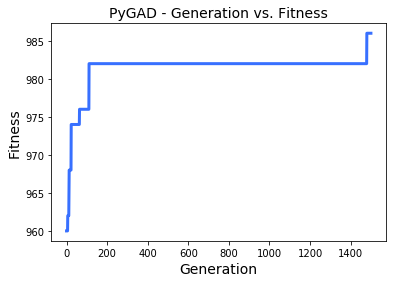

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 5 7 4 5 3 3 4 6 7 7 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 7 1 4 3 4 7 7 7 6 3]


 round:  481
elapsed time:  306.2458038330078
best sol [0.38215421 0.08052408 0.9125541  0.74303617 0.31520165 0.97799943
 0.81588741 0.37323324 0.18298314 0.14244076 0.18298314 0.08052408
 0.09427362 0.64654068 0.21529715 0.12234611 0.42855767 0.74303617
 0.97799943 0.50008087 0.07358874 0.86801166 0.37323324 0.08218284
 0.39614054 0.16882913 0.8242456  0.74546389 0.44955259 0.39614054
 0.94379916 0.18298314 0.01470547 0.88155523 0.44501907]
fitness:  16.0


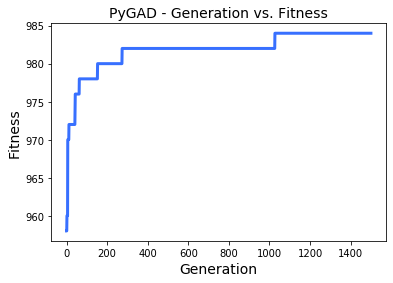

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 7 2 6 4 3 5 7 7 7 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 5 4 5 6 6 5 7 5]


 round:  482
elapsed time:  299.2396218776703
best sol [0.78615194 0.13206207 0.99434761 0.91054134 0.20690898 0.89604445
 0.13206207 0.39828464 0.17207184 0.09054438 0.16326063 0.27096447
 0.14530124 0.64117459 0.17207184 0.11300308 0.29117294 0.46744926
 0.27096447 0.61588079 0.27096447 0.09054438 0.13206207 0.16702607
 0.27096447 0.96419747 0.96419747 0.63272567 0.61588079 0.63272567
 0.96451195 0.16326063 0.43374967 0.38109584 0.16702607]
fitness:  12.0


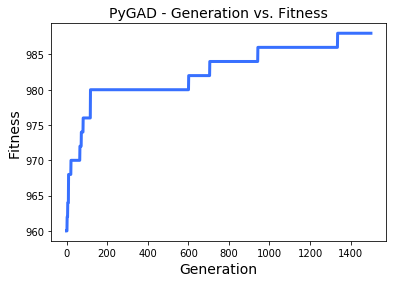

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 6 1 6 4 3 4 6 7 6 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 1 4 3 4 5 5 7 7 3]


 round:  483
elapsed time:  288.09778118133545
best sol [0.91343547 0.14596856 0.76401854 0.88204947 0.14596856 0.89944315
 0.50119464 0.40879671 0.04619063 0.0595276  0.13917465 0.12035154
 0.58890005 0.33878061 0.4271954  0.13917465 0.7834401  0.76401854
 0.4935651  0.62472934 0.2042214  0.58890005 0.38774317 0.08501367
 0.2788577  0.73245355 0.4935651  0.62472934 0.46942828 0.89944315
 0.8716588  0.2042214  0.58890005 0.08501367 0.33878061]
fitness:  12.0


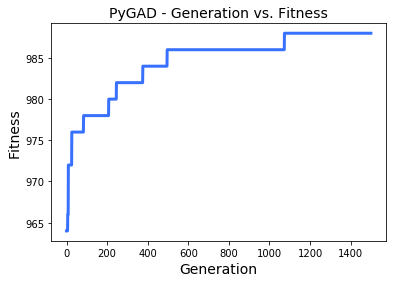

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 3 7 2 6 4 4 5 6 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 5 3 6 5 6 7 7 3]


 round:  484
elapsed time:  271.3777370452881
best sol [0.95885242 0.14906517 0.6024289  0.89064847 0.29242302 0.86126431
 0.5085822  0.72781803 0.09357706 0.09829567 0.14906517 0.12774719
 0.09357706 0.58347796 0.31491684 0.09357706 0.70937115 0.38570581
 0.45206125 0.58347796 0.20228893 0.20228893 0.31491684 0.28857434
 0.31491684 0.46867539 0.75459436 0.94670279 0.45206125 0.99459719
 0.89526626 0.13105127 0.72400436 0.08134941 0.12774719]
fitness:  16.0


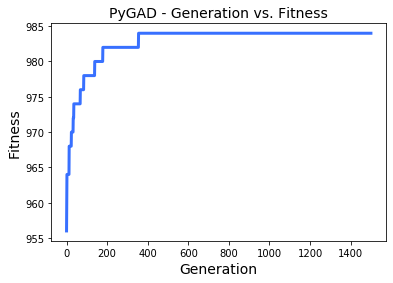

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 7 3 7 4 4 3 5 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 8 7 2 3 3 5 6 5 7 7 2]


 round:  485
elapsed time:  269.7266857624054
best sol [0.44143318 0.3177288  0.89229628 0.94557221 0.06856937 0.93925929
 0.76423688 0.59480574 0.2848975  0.09687269 0.06945024 0.31768772
 0.02517398 0.6530318  0.16346075 0.2848975  0.91453771 0.16346075
 0.94013779 0.28297245 0.06856937 0.87177203 0.20449187 0.07107982
 0.20449187 0.89229628 0.91453771 0.59480574 0.51809594 0.38613345
 0.78205563 0.11876868 0.01832135 0.67862128 0.08309042]
fitness:  16.0


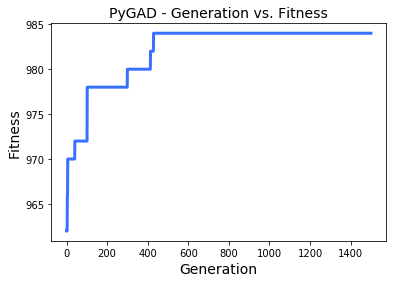

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [9 5 6 2 5 3 4 5 7 7 5 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 6 3 4 3 4 7 6 5 7 3]


 round:  486
elapsed time:  270.3513662815094
best sol [0.64761476 0.08845134 0.98836134 0.94111114 0.10165867 0.98836134
 0.13719195 0.6152476  0.17606987 0.3845766  0.05916924 0.25243633
 0.17606987 0.53222179 0.25243633 0.08845134 0.53792911 0.98836134
 0.25243633 0.83728896 0.17351764 0.98836134 0.39942964 0.13719195
 0.35395366 0.64855408 0.74483854 0.64855408 0.85980779 0.25243633
 0.06802399 0.16692006 0.17606987 0.18917693 0.50517544]
fitness:  16.0


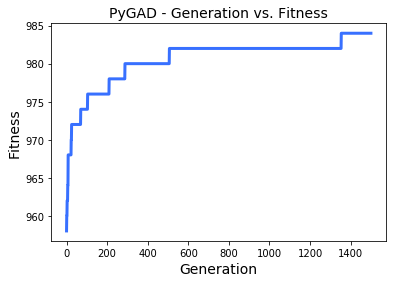

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 8 3 6 4 3 5 6 7 7 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 4 5 3 6 7 6 7 5 3]


 round:  487
elapsed time:  275.986065864563
best sol [0.85970735 0.18388016 0.87348939 0.90529429 0.15526736 0.78460948
 0.15526736 0.34686182 0.09567931 0.13062216 0.14196296 0.14196296
 0.15474809 0.78592285 0.44717774 0.15526736 0.7069068  0.62128821
 0.7069068  0.70467505 0.15526736 0.15474809 0.66680189 0.16541853
 0.77159152 0.42821297 0.98183986 0.98183986 0.56740942 0.95047162
 0.34686182 0.13062216 0.14196296 0.34381986 0.18688456]
fitness:  10.0


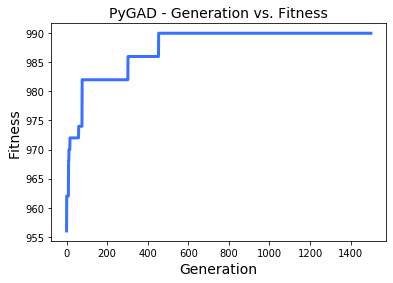

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 2 7 4 3 4 6 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 5 2 5 4 6 7 6 7 6 2]


 round:  488
elapsed time:  279.4704201221466
best sol [0.8839557  0.09553508 0.62555486 0.86308478 0.12008744 0.3983041
 0.93274207 0.8101967  0.1886305  0.31944782 0.14226667 0.4433094
 0.22631306 0.48638153 0.266714   0.03338904 0.43286478 0.22460431
 0.58469765 0.7284091  0.50953245 0.93477093 0.25332322 0.17997
 0.7284091  0.53658872 0.8101967  0.266714   0.54137324 0.17997
 0.97936731 0.22460431 0.3983041  0.8101967  0.10700006]
fitness:  16.0


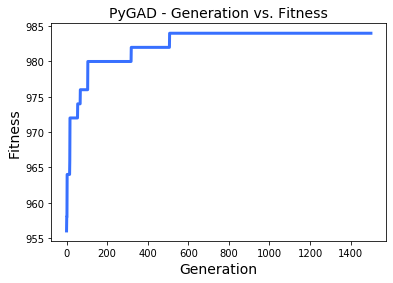

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [8 5 7 4 6 3 4 4 6 7 6 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 4 3 1 6 6 7 7 7 4]


 round:  489
elapsed time:  279.7192032337189
best sol [0.58381278 0.15044786 0.7876682  0.26661217 0.09878806 0.87693697
 0.11779382 0.97204174 0.15044786 0.11779382 0.4272515  0.7876682
 0.02200058 0.78680671 0.81258792 0.13762486 0.05674997 0.13947699
 0.44258054 0.81258792 0.11757663 0.2831895  0.55080944 0.02200058
 0.78680671 0.39485518 0.97204174 0.98331062 0.48475634 0.81258792
 0.85397961 0.10763946 0.34368922 0.78680671 0.52189646]
fitness:  18.0


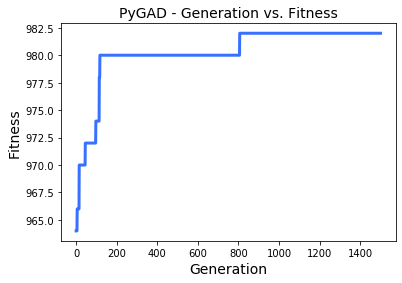

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [5 6 7 5 7 4 4 4 7 7 5 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 4 4 4 3 6 7 6 6 7 5]


 round:  490
elapsed time:  280.4716839790344
best sol [0.76169883 0.17329802 0.9134574  0.77449012 0.36675402 0.9134574
 0.84030321 0.35664965 0.04967225 0.08394718 0.14783879 0.12773866
 0.71029016 0.24170408 0.01342977 0.44769977 0.24170408 0.83596364
 0.38335198 0.91191229 0.01437508 0.76563985 0.6295492  0.04379792
 0.38335198 0.75074117 0.91191229 0.60789113 0.83596364 0.38335198
 0.32762493 0.19975905 0.36268746 0.57161229 0.07091662]
fitness:  14.0


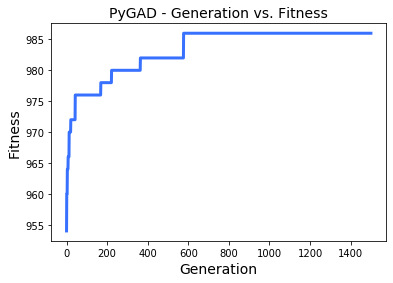

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 6 7 4 7 4 4 5 6 7 6 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 7 1 5 4 6 7 6 7 6 4]


 round:  491
elapsed time:  286.28916025161743
best sol [0.71759563 0.12005168 0.92604867 0.96795918 0.16699764 0.76497672
 0.05447682 0.39061999 0.02851875 0.68566085 0.18490061 0.02829127
 0.7128915  0.42333539 0.38347237 0.3357485  0.39061999 0.77989095
 0.39061999 0.64470236 0.01934894 0.97751364 0.38582109 0.11146395
 0.35991812 0.65283036 0.42333539 0.63969752 0.51668509 0.77989095
 0.80800773 0.24131642 0.50601799 0.30686734 0.4710316 ]
fitness:  14.0


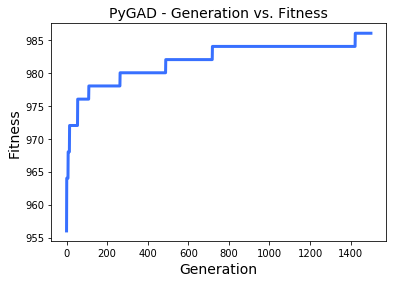

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 3 7 4 5 5 7 7 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 5 3 7 4 6 7 5 7 7 4]


 round:  492
elapsed time:  288.0701289176941
best sol [0.53304879 0.09582534 0.92159779 0.75024133 0.22547514 0.78937768
 0.72627393 0.41165533 0.30496422 0.09738987 0.09738987 0.0309301
 0.29353446 0.31553215 0.24160938 0.0361485  0.0846956  0.96642276
 0.67891073 0.82514947 0.30496422 0.61899048 0.24284108 0.53524551
 0.46384089 0.46384089 0.94273748 0.61899048 0.41173476 0.39980727
 0.70786861 0.20093491 0.2830988  0.0309301  0.47926744]
fitness:  14.0


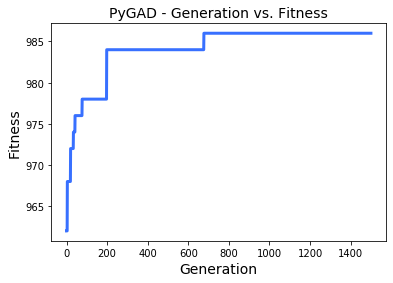

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [6 5 8 3 6 4 4 4 5 6 7 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 4 3 6 6 6 8 6 3]


 round:  493
elapsed time:  287.6404159069061
best sol [0.65448032 0.18957414 0.9862354  0.9862354  0.02573196 0.89470524
 0.80666094 0.58104743 0.06922555 0.02573196 0.00375916 0.02573196
 0.36933495 0.33703994 0.78229675 0.19886597 0.19007044 0.65448032
 0.82104002 0.89470524 0.00375916 0.69487716 0.75752356 0.36933495
 0.26136195 0.17989217 0.81937042 0.99621545 0.19886597 0.78229675
 0.81937042 0.23719693 0.65448032 0.33703994 0.1371842 ]
fitness:  14.0


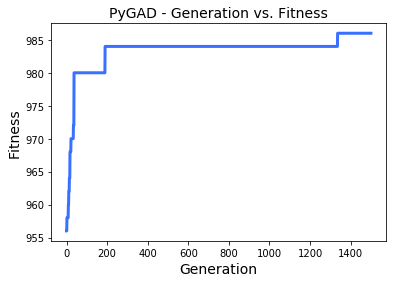

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 8 5 6 4 4 4 6 6 7 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 7 0 4 5 6 7 6 7 7 3]


 round:  494
elapsed time:  281.25535798072815
best sol [0.62992056 0.28340643 0.79704292 0.91631637 0.14733817 0.94359205
 0.11631848 0.35556027 0.07982163 0.33772168 0.72131258 0.35356827
 0.35413613 0.50797802 0.02873687 0.33772168 0.89902629 0.33772168
 0.33772168 0.57807371 0.08661719 0.20792843 0.08661719 0.11631848
 0.90288774 0.84925106 0.89452516 0.96640379 0.33772168 0.50797802
 0.83384086 0.1141576  0.72131258 0.33772168 0.22247941]
fitness:  14.0


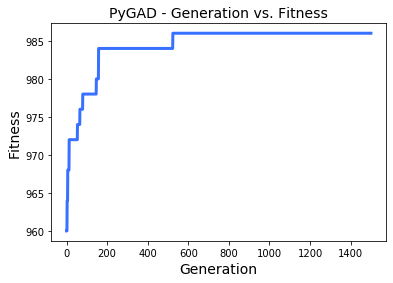

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 2 7 4 4 5 6 8 7 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 7 5 5 4 2 5 7 6 7 7 3]


 round:  495
elapsed time:  292.3573350906372
best sol [0.64438365 0.28447398 0.96119113 0.96119113 0.25364325 0.51911489
 0.25534312 0.60781835 0.10021789 0.24498156 0.3662332  0.13787694
 0.24498156 0.51051076 0.38275632 0.13164752 0.3662332  0.72847596
 0.35796541 0.96119113 0.83234695 0.97094091 0.24876006 0.07590073
 0.51051076 0.9372097  0.64438365 0.34277838 0.51911489 0.51580644
 0.83234695 0.12325722 0.00260362 0.03974785 0.3822709 ]
fitness:  16.0


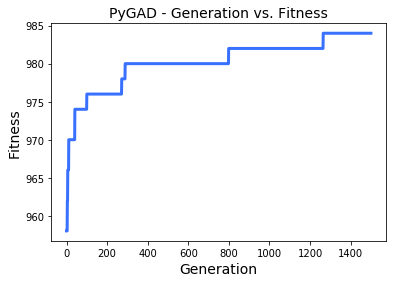

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 5 7 4 3 4 7 7 8 4]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [7 8 6 3 5 3 7 6 7 7 7 2]


 round:  496
elapsed time:  280.86986112594604
best sol [0.77604111 0.20550688 0.79470892 0.55786872 0.35688678 0.8465872
 0.76207372 0.30449203 0.09236424 0.1713174  0.59715931 0.20459126
 0.25490739 0.25490739 0.06095135 0.13014828 0.54018944 0.99883395
 0.80945605 0.86485849 0.30406112 0.86214457 0.12947931 0.15528425
 0.77604111 0.39478414 0.94093547 0.59146832 0.45173117 0.93114557
 0.50297059 0.13014828 0.65567081 0.08206781 0.84405097]
fitness:  16.0


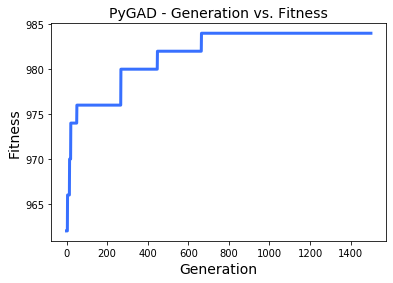

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 8 4 7 4 4 4 6 7 7 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 6 6 5 3 3 7 7 8 7 7 3]


 round:  497
elapsed time:  276.82718205451965
best sol [0.66904231 0.19234675 0.99825628 0.64220395 0.04565901 0.30065879
 0.60728052 0.59321775 0.02579421 0.37607697 0.07626153 0.0183753
 0.55274724 0.83833936 0.11578648 0.04565901 0.80728204 0.41279042
 0.80728204 0.56557952 0.02579421 0.71733141 0.24583116 0.0183753
 0.65097098 0.38218472 0.49605919 0.99825628 0.52270169 0.83833936
 0.99825628 0.22211266 0.34675375 0.07626153 0.5431111 ]
fitness:  14.0


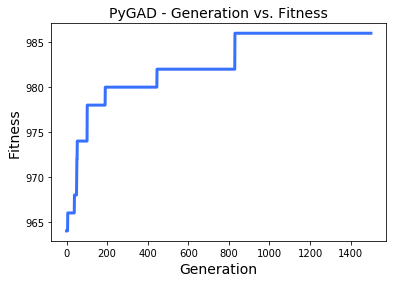

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 4 7 4 7 3 5 4 7 5 7 3]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 5 2 6 2 6 7 6 6 7 3]


 round:  498
elapsed time:  280.9256761074066
best sol [0.5588972  0.16533132 0.9130903  0.70820657 0.24966017 0.44733994
 0.8334634  0.37341116 0.08900296 0.04973739 0.03912434 0.1031126
 0.1031126  0.98818728 0.47666923 0.04973739 0.56608961 0.5643473
 0.63851967 0.84800995 0.7243599  0.67457786 0.92330015 0.03912434
 0.1911976  0.80071875 0.80071875 0.92330015 0.45683298 0.60432382
 0.56608961 0.26950151 0.03912434 0.63851967 0.03912434]
fitness:  14.0


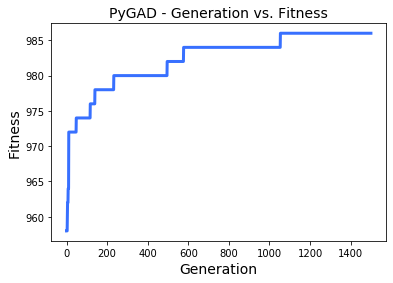

col: [7 5 7 1 7 3 4 4 7 7 7 4]
try: [7 5 7 4 7 3 5 5 7 6 4 5]
fil: [6 7 6 1 4 3 6 7 6 7 7 3]
try: [6 7 6 2 4 3 7 7 7 7 6 3]


KeyboardInterrupt: 

In [362]:
#fitness_func = fitness_func_tab_ejes_termometros
#initial_population = init_population_tab(40)
fitness = 333
count = 0
while fitness !=0:
    count +=1
    ga_instance = pygad.GA(num_generations =1500,

                           fitness_func = fitness_func_ter,
                           initial_population = init_population_ter(60),
                           gene_type = float,
                           gene_space = [0.0,1.0],

                           num_parents_mating =40,
                           keep_parents=25,                       
                           parent_selection_type="random",

                           crossover_type = "two_points",           
                           crossover_probability = 0.3,

                           mutation_type = "scramble",
                           #mutation_by_replacement=True,
                           mutation_probability = 0.1,#eran 0.010, estoy intentando bajar la m
                           mutation_percent_genes = 10,
                           #mutation_type = "adaptive",
                           #mutation_probability = [0.01,0.005],
                           #mutation_percent_genes=[10,5],
                           #nuevas opciones
                           stop_criteria =['reach_1000'],#,'saturate_60'],
                           parallel_processing = 5
                           

    )
    t = time.time()
    ga_instance.run()
    elapsed = time.time() - t
    print('\n\n round: ', count)
    print('elapsed time: ', elapsed)
    best_sol, best_fit, best_index = ga_instance.best_solution()
    fitness = ((1000-fitness_func_ter(best_sol,best_index)))
    print('best sol', best_sol)
    print ('fitness: ', fitness)
    ga_instance.plot_fitness()
#tab = lin_to_tab(best_sol)
    tab= ocupacion_tablero(best_sol)
    print ('col:',target_col)
    print ('try:',np.sum(tab, dtype = int, axis= 0))
    print ('fil:',target_fil)
    print ('try:',np.sum(tab, dtype = int, axis = 1))
tab

## fitness_func_ter(best_sol,1)

In [292]:
tab= ocupacion_tablero(best_sol)
tab

array([[1., 1., 0., 1.],
       [0., 1., 1., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

## conclusiones
Lo mas cerca que nos hemos quedado es 5. la convergencia se  estanca a partir de las 40-60 generaciones

Paso a usar **diferential evolution** esta en scipy.
Bueno, he seguido probando y mejorado algo con la inclusión del crossover scatterd parece que converge mas lentamente, vemos una curva en 100 generaciones.
parent selection= random hace que suba en escalon, practicamente lineal, quedandose alrededor de 20 en 100 generaciones.


#Diferential evolution lo descarto, es para espacios continuos, y esto no se como mostrarlo como espacio continuo. Quiza convirtiendo los temometros en continuos, la longitud entre unidades, y hacemos una transformación. El llenado va desde cero hasta uno con n particiones. No, lo que es continuo es el llenado de cada celda, ahi podemos poner un umbral 0.5 de activación, y eso es lo que consideramos lleno o no. nuestra transición al uno.
con una distribucion gausiana centrada en el o.5 podemos inicializarlo.
